In [1]:
from pandas import *
set_option('display.max_rows', 1000)
set_option('display.width', 1000)
%matplotlib inline  

In [9]:
df_D_ICD_DIAGNOSES = read_csv("D_ICD_DIAGNOSES.csv")
df_DIAGNOSES_ICD = read_csv("DIAGNOSES_ICD.csv")

In [10]:
df_CD9_CODE_count = df_DIAGNOSES_ICD.groupby(['ICD9_CODE']).count().reset_index()
merge_count_df = df_CD9_CODE_count.merge(df_D_ICD_DIAGNOSES, on='ICD9_CODE')
merge_count_df = merge_count_df[['ICD9_CODE', 'ROW_ID_x', 'LONG_TITLE']]
merge_count_df.columns = ['ICD9_CODE', 'COUNT', 'LONG_TITLE']
merge_count_df_n100 = merge_count_df.sort_values(by='COUNT', ascending=False).head(100)

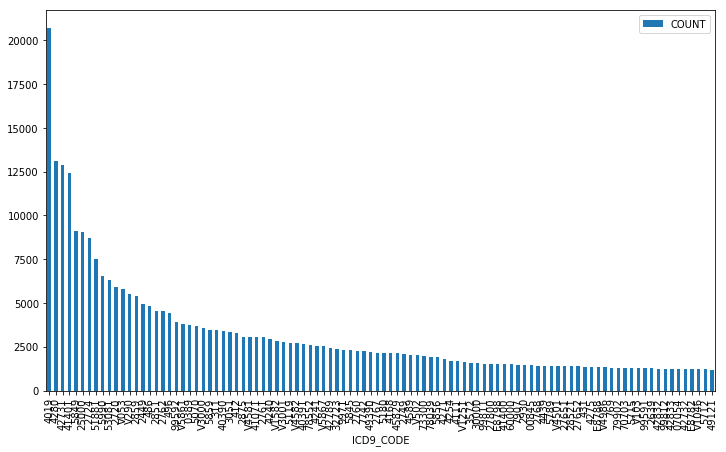

In [11]:
merge_count_df_n100.plot.bar(x='ICD9_CODE', y='COUNT', figsize=(12, 7))

In [12]:
top100_ICD9_CODE = merge_count_df_n100['ICD9_CODE'].tolist()

Cleaned the original raw data (text format to datafram format), example below:

OLD RAW format:
174,22532,167853,2151-08-04,,,"Discharge summary","Report",,,"Admission Date:  [**2151-7-16**]       Discharge Date:  [**2151-8-4**]
Service:
ADDENDUM:
RADIOLOGIC STUDIES:  Radiologic studies also included a chest
CT, which confirmed cavitary lesions in the left lung apex
consistent with infectious process/tuberculosis.  This also
moderate-sized left pleural effusion.
HEAD CT:  Head CT showed no intracranial hemorrhage or mass
effect, but old infarction consistent with past medical
history.
ABDOMINAL CT:  Abdominal CT showed lesions of
T10 and sacrum most likely secondary to osteoporosis. These can
be followed by repeat imaging as an outpatient.
                            [**First Name8 (NamePattern2) **] [**First Name4 (NamePattern1) 1775**] [**Last Name (NamePattern1) **], M.D.  [**MD Number(1) 1776**]
Dictated By:[**Hospital 1807**]
MEDQUIST36
D:  [**2151-8-5**]  12:11
T:  [**2151-8-5**]  12:21
JOB#:  [**Job Number 1808**]
"

Data Frame format compresses the above into one line per entr, where the text is Onle long string (easier to feed inot word2vec and machine learning algorithms


Notes
    - Had to break the csvs up into 100000 line breaks for memory issues, this will be remedied 
    with final machine build for final model creation 

In [ ]:
cleaned_df_list = ['NOTEEVENTS_CLEANED_vaa.csv', 'NOTEEVENTS_CLEANED_vab.csv', 
                   'NOTEEVENTS_CLEANED_vac.csv', 'NOTEEVENTS_CLEANED_vad.csv',
                   'NOTEEVENTS_CLEANED_vae.csv', 'NOTEEVENTS_CLEANED_vaf.csv', 
                   'NOTEEVENTS_CLEANED_vag.csv', 'NOTEEVENTS_CLEANED_vah.csv', 
                   'NOTEEVENTS_CLEANED_vai.csv', 'NOTEEVENTS_CLEANED_vaj.csv', 
                   'NOTEEVENTS_CLEANED_vak.csv', 'NOTEEVENTS_CLEANED_val.csv', 
                   'NOTEEVENTS_CLEANED_vam.csv', 'NOTEEVENTS_CLEANED_van.csv', 
                   'NOTEEVENTS_CLEANED_vao.csv', 'NOTEEVENTS_CLEANED_vap.csv', 
                   'NOTEEVENTS_CLEANED_vaq.csv', 'NOTEEVENTS_CLEANED_var.csv', 
                   'NOTEEVENTS_CLEANED_vas.csv', 'NOTEEVENTS_CLEANED_vat.csv', 
                   'NOTEEVENTS_CLEANED_vau.csv']

Notes
    - added dummy variable (1 or 0) for each HADM_ID line for the top 50  ICD9 codes to see if we could predict ICD( code from text

In [16]:
for file in cleaned_df_list:
    print(file)
    ICD9_n50_df = read_csv(file, header=None)
    ICD9_n50_df.columns = ["row_id","subject_id","hadm_id","chartdate",
                           "category","description","cgid","iserror","text"]
    ICD9_n50_df = ICD9_n50_df[['subject_id', 'hadm_id', 'text']]    
    print("DUMMY vector creation")
    for ICD9_CODE in top100_ICD9_CODE[:51]:
        ICD9_n50_df[str(ICD9_CODE)] = 0

    print("START vector creation")
    
    length_df = len(ICD9_n50_df)
    itr = 1
    for index in ICD9_n50_df.index:
        try:
            print(itr, length_df)
            itr += 1
            temp_hadm_id = int(ICD9_n50_df.loc[index, 'hadm_id'])
            unique_ICD9_CODE = df_DIAGNOSES_ICD[df_DIAGNOSES_ICD['HADM_ID'] == temp_hadm_id]['ICD9_CODE'].unique()    
            for unique_id in unique_ICD9_CODE:
                if unique_id in top100_ICD9_CODE[:51]:
                    ICD9_n50_df.loc[index, str(unique_id)] = 1
        except:
            print(itr, length_df)
            itr += 1
        
        

    temp_save_name = file.split("_")[-1]
    ICD9_n50_df.to_csv("NOTEEVENTS_CLEANED_n50_" + temp_save_name)

NOTEEVENTS_CLEANED_vaa.csv


/home/jrkenneyjr/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,1,2,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


DUMMY vector creation
START vector creation
1 100000
2 100000
3 100000
4 100000
5 100000
6 100000
7 100000
8 100000
9 100000
10 100000
11 100000
12 100000
13 100000
14 100000
15 100000
16 100000
17 100000
18 100000
19 100000
20 100000
21 100000
22 100000
23 100000
24 100000
25 100000
26 100000
27 100000
28 100000
29 100000
30 100000
31 100000
32 100000
33 100000
34 100000
35 100000
36 100000
37 100000
38 100000
39 100000
40 100000
41 100000
42 100000
43 100000
44 100000
45 100000
46 100000
47 100000
48 100000
49 100000
50 100000
51 100000
52 100000
53 100000
54 100000
55 100000
56 100000
57 100000
58 100000
59 100000
60 100000
61 100000
62 100000
63 100000
64 100000
65 100000
66 100000
67 100000
68 100000
69 100000
70 100000
71 100000
72 100000
73 100000
74 100000
75 100000
76 100000
77 100000
78 100000
79 100000
80 100000
81 100000
82 100000
83 100000
84 100000
85 100000
86 100000
87 100000
88 100000
89 100000
90 100000
91 100000
92 100000
93 100000
94 100000
95 100000
96 100000
97 10

788 100000
789 100000
790 100000
791 100000
792 100000
793 100000
794 100000
795 100000
796 100000
797 100000
798 100000
799 100000
800 100000
801 100000
802 100000
803 100000
804 100000
805 100000
806 100000
807 100000
808 100000
809 100000
810 100000
811 100000
812 100000
813 100000
814 100000
815 100000
816 100000
817 100000
818 100000
819 100000
820 100000
821 100000
822 100000
823 100000
824 100000
825 100000
826 100000
827 100000
828 100000
829 100000
830 100000
831 100000
832 100000
833 100000
834 100000
835 100000
836 100000
837 100000
838 100000
839 100000
840 100000
841 100000
842 100000
843 100000
844 100000
845 100000
846 100000
847 100000
848 100000
849 100000
850 100000
851 100000
852 100000
853 100000
854 100000
855 100000
856 100000
857 100000
858 100000
859 100000
860 100000
861 100000
862 100000
863 100000
864 100000
865 100000
866 100000
867 100000
868 100000
869 100000
870 100000
871 100000
872 100000
873 100000
874 100000
875 100000
876 100000
877 100000
878 100000

1508 100000
1509 100000
1510 100000
1511 100000
1512 100000
1513 100000
1514 100000
1515 100000
1516 100000
1517 100000
1518 100000
1519 100000
1520 100000
1521 100000
1522 100000
1523 100000
1524 100000
1525 100000
1526 100000
1527 100000
1528 100000
1529 100000
1530 100000
1531 100000
1532 100000
1533 100000
1534 100000
1535 100000
1536 100000
1537 100000
1538 100000
1539 100000
1540 100000
1541 100000
1542 100000
1543 100000
1544 100000
1545 100000
1546 100000
1547 100000
1548 100000
1549 100000
1550 100000
1551 100000
1552 100000
1553 100000
1554 100000
1555 100000
1556 100000
1557 100000
1558 100000
1559 100000
1560 100000
1561 100000
1562 100000
1563 100000
1564 100000
1565 100000
1566 100000
1567 100000
1568 100000
1569 100000
1570 100000
1571 100000
1572 100000
1573 100000
1574 100000
1575 100000
1576 100000
1577 100000
1578 100000
1579 100000
1580 100000
1581 100000
1582 100000
1583 100000
1584 100000
1585 100000
1586 100000
1587 100000
1588 100000
1589 100000
1590 100000
1591

2191 100000
2192 100000
2193 100000
2194 100000
2195 100000
2196 100000
2197 100000
2198 100000
2199 100000
2200 100000
2201 100000
2202 100000
2203 100000
2204 100000
2205 100000
2206 100000
2207 100000
2208 100000
2209 100000
2210 100000
2211 100000
2212 100000
2213 100000
2214 100000
2215 100000
2216 100000
2217 100000
2218 100000
2219 100000
2220 100000
2221 100000
2222 100000
2223 100000
2224 100000
2225 100000
2226 100000
2227 100000
2228 100000
2229 100000
2230 100000
2231 100000
2232 100000
2233 100000
2234 100000
2235 100000
2236 100000
2237 100000
2238 100000
2239 100000
2240 100000
2241 100000
2242 100000
2243 100000
2244 100000
2245 100000
2246 100000
2247 100000
2248 100000
2249 100000
2250 100000
2251 100000
2252 100000
2253 100000
2254 100000
2255 100000
2256 100000
2257 100000
2258 100000
2259 100000
2260 100000
2261 100000
2262 100000
2263 100000
2264 100000
2265 100000
2266 100000
2267 100000
2268 100000
2269 100000
2270 100000
2271 100000
2272 100000
2273 100000
2274

2905 100000
2906 100000
2907 100000
2908 100000
2909 100000
2910 100000
2911 100000
2912 100000
2913 100000
2914 100000
2915 100000
2916 100000
2917 100000
2918 100000
2919 100000
2920 100000
2921 100000
2922 100000
2923 100000
2924 100000
2925 100000
2926 100000
2927 100000
2928 100000
2929 100000
2930 100000
2931 100000
2932 100000
2933 100000
2934 100000
2935 100000
2936 100000
2937 100000
2938 100000
2939 100000
2940 100000
2941 100000
2942 100000
2943 100000
2944 100000
2945 100000
2946 100000
2947 100000
2948 100000
2949 100000
2950 100000
2951 100000
2952 100000
2953 100000
2954 100000
2955 100000
2956 100000
2957 100000
2958 100000
2959 100000
2960 100000
2961 100000
2962 100000
2963 100000
2964 100000
2965 100000
2966 100000
2967 100000
2968 100000
2969 100000
2970 100000
2971 100000
2972 100000
2973 100000
2974 100000
2975 100000
2976 100000
2977 100000
2978 100000
2979 100000
2980 100000
2981 100000
2982 100000
2983 100000
2984 100000
2985 100000
2986 100000
2987 100000
2988

3612 100000
3613 100000
3614 100000
3615 100000
3616 100000
3617 100000
3618 100000
3619 100000
3620 100000
3621 100000
3622 100000
3623 100000
3624 100000
3625 100000
3626 100000
3627 100000
3628 100000
3629 100000
3630 100000
3631 100000
3632 100000
3633 100000
3634 100000
3635 100000
3636 100000
3637 100000
3638 100000
3639 100000
3640 100000
3641 100000
3642 100000
3643 100000
3644 100000
3645 100000
3646 100000
3647 100000
3648 100000
3649 100000
3650 100000
3651 100000
3652 100000
3653 100000
3654 100000
3655 100000
3656 100000
3657 100000
3658 100000
3659 100000
3660 100000
3661 100000
3662 100000
3663 100000
3664 100000
3665 100000
3666 100000
3667 100000
3668 100000
3669 100000
3670 100000
3671 100000
3672 100000
3673 100000
3674 100000
3675 100000
3676 100000
3677 100000
3678 100000
3679 100000
3680 100000
3681 100000
3682 100000
3683 100000
3684 100000
3685 100000
3686 100000
3687 100000
3688 100000
3689 100000
3690 100000
3691 100000
3692 100000
3693 100000
3694 100000
3695

4298 100000
4299 100000
4300 100000
4301 100000
4302 100000
4303 100000
4304 100000
4305 100000
4306 100000
4307 100000
4308 100000
4309 100000
4310 100000
4311 100000
4312 100000
4313 100000
4314 100000
4315 100000
4316 100000
4317 100000
4318 100000
4319 100000
4320 100000
4321 100000
4322 100000
4323 100000
4324 100000
4325 100000
4326 100000
4327 100000
4328 100000
4329 100000
4330 100000
4331 100000
4332 100000
4333 100000
4334 100000
4335 100000
4336 100000
4337 100000
4338 100000
4339 100000
4340 100000
4341 100000
4342 100000
4343 100000
4344 100000
4345 100000
4346 100000
4347 100000
4348 100000
4349 100000
4350 100000
4351 100000
4352 100000
4353 100000
4354 100000
4355 100000
4356 100000
4357 100000
4358 100000
4359 100000
4360 100000
4361 100000
4362 100000
4363 100000
4364 100000
4365 100000
4366 100000
4367 100000
4368 100000
4369 100000
4370 100000
4371 100000
4372 100000
4373 100000
4374 100000
4375 100000
4376 100000
4377 100000
4378 100000
4379 100000
4380 100000
4381

5001 100000
5002 100000
5003 100000
5004 100000
5005 100000
5006 100000
5007 100000
5008 100000
5009 100000
5010 100000
5011 100000
5012 100000
5013 100000
5014 100000
5015 100000
5016 100000
5017 100000
5018 100000
5019 100000
5020 100000
5021 100000
5022 100000
5023 100000
5024 100000
5025 100000
5026 100000
5027 100000
5028 100000
5029 100000
5030 100000
5031 100000
5032 100000
5033 100000
5034 100000
5035 100000
5036 100000
5037 100000
5038 100000
5039 100000
5040 100000
5041 100000
5042 100000
5043 100000
5044 100000
5045 100000
5046 100000
5047 100000
5048 100000
5049 100000
5050 100000
5051 100000
5052 100000
5053 100000
5054 100000
5055 100000
5056 100000
5057 100000
5058 100000
5059 100000
5060 100000
5061 100000
5062 100000
5063 100000
5064 100000
5065 100000
5066 100000
5067 100000
5068 100000
5069 100000
5070 100000
5071 100000
5072 100000
5073 100000
5074 100000
5075 100000
5076 100000
5077 100000
5078 100000
5079 100000
5080 100000
5081 100000
5082 100000
5083 100000
5084

5703 100000
5704 100000
5705 100000
5706 100000
5707 100000
5708 100000
5709 100000
5710 100000
5711 100000
5712 100000
5713 100000
5714 100000
5715 100000
5716 100000
5717 100000
5718 100000
5719 100000
5720 100000
5721 100000
5722 100000
5723 100000
5724 100000
5725 100000
5726 100000
5727 100000
5728 100000
5729 100000
5730 100000
5731 100000
5732 100000
5733 100000
5734 100000
5735 100000
5736 100000
5737 100000
5738 100000
5739 100000
5740 100000
5741 100000
5742 100000
5743 100000
5744 100000
5745 100000
5746 100000
5747 100000
5748 100000
5749 100000
5750 100000
5751 100000
5752 100000
5753 100000
5754 100000
5755 100000
5756 100000
5757 100000
5758 100000
5759 100000
5760 100000
5761 100000
5762 100000
5763 100000
5764 100000
5765 100000
5766 100000
5767 100000
5768 100000
5769 100000
5770 100000
5771 100000
5772 100000
5773 100000
5774 100000
5775 100000
5776 100000
5777 100000
5778 100000
5779 100000
5780 100000
5781 100000
5782 100000
5783 100000
5784 100000
5785 100000
5786

6421 100000
6422 100000
6423 100000
6424 100000
6425 100000
6426 100000
6427 100000
6428 100000
6429 100000
6430 100000
6431 100000
6432 100000
6433 100000
6434 100000
6435 100000
6436 100000
6437 100000
6438 100000
6439 100000
6440 100000
6441 100000
6442 100000
6443 100000
6444 100000
6445 100000
6446 100000
6447 100000
6448 100000
6449 100000
6450 100000
6451 100000
6452 100000
6453 100000
6454 100000
6455 100000
6456 100000
6457 100000
6458 100000
6459 100000
6460 100000
6461 100000
6462 100000
6463 100000
6464 100000
6465 100000
6466 100000
6467 100000
6468 100000
6469 100000
6470 100000
6471 100000
6472 100000
6473 100000
6474 100000
6475 100000
6476 100000
6477 100000
6478 100000
6479 100000
6480 100000
6481 100000
6482 100000
6483 100000
6484 100000
6485 100000
6486 100000
6487 100000
6488 100000
6489 100000
6490 100000
6491 100000
6492 100000
6493 100000
6494 100000
6495 100000
6496 100000
6497 100000
6498 100000
6499 100000
6500 100000
6501 100000
6502 100000
6503 100000
6504

7146 100000
7147 100000
7148 100000
7149 100000
7150 100000
7151 100000
7152 100000
7153 100000
7154 100000
7155 100000
7156 100000
7157 100000
7158 100000
7159 100000
7160 100000
7161 100000
7162 100000
7163 100000
7164 100000
7165 100000
7166 100000
7167 100000
7168 100000
7169 100000
7170 100000
7171 100000
7172 100000
7173 100000
7174 100000
7175 100000
7176 100000
7177 100000
7178 100000
7179 100000
7180 100000
7181 100000
7182 100000
7183 100000
7184 100000
7185 100000
7186 100000
7187 100000
7188 100000
7189 100000
7190 100000
7191 100000
7192 100000
7193 100000
7194 100000
7195 100000
7196 100000
7197 100000
7198 100000
7199 100000
7200 100000
7201 100000
7202 100000
7203 100000
7204 100000
7205 100000
7206 100000
7207 100000
7208 100000
7209 100000
7210 100000
7211 100000
7212 100000
7213 100000
7214 100000
7215 100000
7216 100000
7217 100000
7218 100000
7219 100000
7220 100000
7221 100000
7222 100000
7223 100000
7224 100000
7225 100000
7226 100000
7227 100000
7228 100000
7229

7834 100000
7835 100000
7836 100000
7837 100000
7838 100000
7839 100000
7840 100000
7841 100000
7842 100000
7843 100000
7844 100000
7845 100000
7846 100000
7847 100000
7848 100000
7849 100000
7850 100000
7851 100000
7852 100000
7853 100000
7854 100000
7855 100000
7856 100000
7857 100000
7858 100000
7859 100000
7860 100000
7861 100000
7862 100000
7863 100000
7864 100000
7865 100000
7866 100000
7867 100000
7868 100000
7869 100000
7870 100000
7871 100000
7872 100000
7873 100000
7874 100000
7875 100000
7876 100000
7877 100000
7878 100000
7879 100000
7880 100000
7881 100000
7882 100000
7883 100000
7884 100000
7885 100000
7886 100000
7887 100000
7888 100000
7889 100000
7890 100000
7891 100000
7892 100000
7893 100000
7894 100000
7895 100000
7896 100000
7897 100000
7898 100000
7899 100000
7900 100000
7901 100000
7902 100000
7903 100000
7904 100000
7905 100000
7906 100000
7907 100000
7908 100000
7909 100000
7910 100000
7911 100000
7912 100000
7913 100000
7914 100000
7915 100000
7916 100000
7917

8518 100000
8519 100000
8520 100000
8521 100000
8522 100000
8523 100000
8524 100000
8525 100000
8526 100000
8527 100000
8528 100000
8529 100000
8530 100000
8531 100000
8532 100000
8533 100000
8534 100000
8535 100000
8536 100000
8537 100000
8538 100000
8539 100000
8540 100000
8541 100000
8542 100000
8543 100000
8544 100000
8545 100000
8546 100000
8547 100000
8548 100000
8549 100000
8550 100000
8551 100000
8552 100000
8553 100000
8554 100000
8555 100000
8556 100000
8557 100000
8558 100000
8559 100000
8560 100000
8561 100000
8562 100000
8563 100000
8564 100000
8565 100000
8566 100000
8567 100000
8568 100000
8569 100000
8570 100000
8571 100000
8572 100000
8573 100000
8574 100000
8575 100000
8576 100000
8577 100000
8578 100000
8579 100000
8580 100000
8581 100000
8582 100000
8583 100000
8584 100000
8585 100000
8586 100000
8587 100000
8588 100000
8589 100000
8590 100000
8591 100000
8592 100000
8593 100000
8594 100000
8595 100000
8596 100000
8597 100000
8598 100000
8599 100000
8600 100000
8601

9212 100000
9213 100000
9214 100000
9215 100000
9216 100000
9217 100000
9218 100000
9219 100000
9220 100000
9221 100000
9222 100000
9223 100000
9224 100000
9225 100000
9226 100000
9227 100000
9228 100000
9229 100000
9230 100000
9231 100000
9232 100000
9233 100000
9234 100000
9235 100000
9236 100000
9237 100000
9238 100000
9239 100000
9240 100000
9241 100000
9242 100000
9243 100000
9244 100000
9245 100000
9246 100000
9247 100000
9248 100000
9249 100000
9250 100000
9251 100000
9252 100000
9253 100000
9254 100000
9255 100000
9256 100000
9257 100000
9258 100000
9259 100000
9260 100000
9261 100000
9262 100000
9263 100000
9264 100000
9265 100000
9266 100000
9267 100000
9268 100000
9269 100000
9270 100000
9271 100000
9272 100000
9273 100000
9274 100000
9275 100000
9276 100000
9277 100000
9278 100000
9279 100000
9280 100000
9281 100000
9282 100000
9283 100000
9284 100000
9285 100000
9286 100000
9287 100000
9288 100000
9289 100000
9290 100000
9291 100000
9292 100000
9293 100000
9294 100000
9295

9936 100000
9937 100000
9938 100000
9939 100000
9940 100000
9941 100000
9942 100000
9943 100000
9944 100000
9945 100000
9946 100000
9947 100000
9948 100000
9949 100000
9950 100000
9951 100000
9952 100000
9953 100000
9954 100000
9955 100000
9956 100000
9957 100000
9958 100000
9959 100000
9960 100000
9961 100000
9962 100000
9963 100000
9964 100000
9965 100000
9966 100000
9967 100000
9968 100000
9969 100000
9970 100000
9971 100000
9972 100000
9973 100000
9974 100000
9975 100000
9976 100000
9977 100000
9978 100000
9979 100000
9980 100000
9981 100000
9982 100000
9983 100000
9984 100000
9985 100000
9986 100000
9987 100000
9988 100000
9989 100000
9990 100000
9991 100000
9992 100000
9993 100000
9994 100000
9995 100000
9996 100000
9997 100000
9998 100000
9999 100000
10000 100000
10001 100000
10002 100000
10003 100000
10004 100000
10005 100000
10006 100000
10007 100000
10008 100000
10009 100000
10010 100000
10011 100000
10012 100000
10013 100000
10014 100000
10015 100000
10016 100000
10017 10000

10597 100000
10598 100000
10599 100000
10600 100000
10601 100000
10602 100000
10603 100000
10604 100000
10605 100000
10606 100000
10607 100000
10608 100000
10609 100000
10610 100000
10611 100000
10612 100000
10613 100000
10614 100000
10615 100000
10616 100000
10617 100000
10618 100000
10619 100000
10620 100000
10621 100000
10622 100000
10623 100000
10624 100000
10625 100000
10626 100000
10627 100000
10628 100000
10629 100000
10630 100000
10631 100000
10632 100000
10633 100000
10634 100000
10635 100000
10636 100000
10637 100000
10638 100000
10639 100000
10640 100000
10641 100000
10642 100000
10643 100000
10644 100000
10645 100000
10646 100000
10647 100000
10648 100000
10649 100000
10650 100000
10651 100000
10652 100000
10653 100000
10654 100000
10655 100000
10656 100000
10657 100000
10658 100000
10659 100000
10660 100000
10661 100000
10662 100000
10663 100000
10664 100000
10665 100000
10666 100000
10667 100000
10668 100000
10669 100000
10670 100000
10671 100000
10672 100000
10673 100000

11240 100000
11241 100000
11242 100000
11243 100000
11244 100000
11245 100000
11246 100000
11247 100000
11248 100000
11249 100000
11250 100000
11251 100000
11252 100000
11253 100000
11254 100000
11255 100000
11256 100000
11257 100000
11258 100000
11259 100000
11260 100000
11261 100000
11262 100000
11263 100000
11264 100000
11265 100000
11266 100000
11267 100000
11268 100000
11269 100000
11270 100000
11271 100000
11272 100000
11273 100000
11274 100000
11275 100000
11276 100000
11277 100000
11278 100000
11279 100000
11280 100000
11281 100000
11282 100000
11283 100000
11284 100000
11285 100000
11286 100000
11287 100000
11288 100000
11289 100000
11290 100000
11291 100000
11292 100000
11293 100000
11294 100000
11295 100000
11296 100000
11297 100000
11298 100000
11299 100000
11300 100000
11301 100000
11302 100000
11303 100000
11304 100000
11305 100000
11306 100000
11307 100000
11308 100000
11309 100000
11310 100000
11311 100000
11312 100000
11313 100000
11314 100000
11315 100000
11316 100000

11881 100000
11882 100000
11883 100000
11884 100000
11885 100000
11886 100000
11887 100000
11888 100000
11889 100000
11890 100000
11891 100000
11892 100000
11893 100000
11894 100000
11895 100000
11896 100000
11897 100000
11898 100000
11899 100000
11900 100000
11901 100000
11902 100000
11903 100000
11904 100000
11905 100000
11906 100000
11907 100000
11908 100000
11909 100000
11910 100000
11911 100000
11912 100000
11913 100000
11914 100000
11915 100000
11916 100000
11917 100000
11918 100000
11919 100000
11920 100000
11921 100000
11922 100000
11923 100000
11924 100000
11925 100000
11926 100000
11927 100000
11928 100000
11929 100000
11930 100000
11931 100000
11932 100000
11933 100000
11934 100000
11935 100000
11936 100000
11937 100000
11938 100000
11939 100000
11940 100000
11941 100000
11942 100000
11943 100000
11944 100000
11945 100000
11946 100000
11947 100000
11948 100000
11949 100000
11950 100000
11951 100000
11952 100000
11953 100000
11954 100000
11955 100000
11956 100000
11957 100000

12517 100000
12518 100000
12519 100000
12520 100000
12521 100000
12522 100000
12523 100000
12524 100000
12525 100000
12526 100000
12527 100000
12528 100000
12529 100000
12530 100000
12531 100000
12532 100000
12533 100000
12534 100000
12535 100000
12536 100000
12537 100000
12538 100000
12539 100000
12540 100000
12541 100000
12542 100000
12543 100000
12544 100000
12545 100000
12546 100000
12547 100000
12548 100000
12549 100000
12550 100000
12551 100000
12552 100000
12553 100000
12554 100000
12555 100000
12556 100000
12557 100000
12558 100000
12559 100000
12560 100000
12561 100000
12562 100000
12563 100000
12564 100000
12565 100000
12566 100000
12567 100000
12568 100000
12569 100000
12570 100000
12571 100000
12572 100000
12573 100000
12574 100000
12575 100000
12576 100000
12577 100000
12578 100000
12579 100000
12580 100000
12581 100000
12582 100000
12583 100000
12584 100000
12585 100000
12586 100000
12587 100000
12588 100000
12589 100000
12590 100000
12591 100000
12592 100000
12593 100000

13157 100000
13158 100000
13159 100000
13160 100000
13161 100000
13162 100000
13163 100000
13164 100000
13165 100000
13166 100000
13167 100000
13168 100000
13169 100000
13170 100000
13171 100000
13172 100000
13173 100000
13174 100000
13175 100000
13176 100000
13177 100000
13178 100000
13179 100000
13180 100000
13181 100000
13182 100000
13183 100000
13184 100000
13185 100000
13186 100000
13187 100000
13188 100000
13189 100000
13190 100000
13191 100000
13192 100000
13193 100000
13194 100000
13195 100000
13196 100000
13197 100000
13198 100000
13199 100000
13200 100000
13201 100000
13202 100000
13203 100000
13204 100000
13205 100000
13206 100000
13207 100000
13208 100000
13209 100000
13210 100000
13211 100000
13212 100000
13213 100000
13214 100000
13215 100000
13216 100000
13217 100000
13218 100000
13219 100000
13220 100000
13221 100000
13222 100000
13223 100000
13224 100000
13225 100000
13226 100000
13227 100000
13228 100000
13229 100000
13230 100000
13231 100000
13232 100000
13233 100000

13803 100000
13804 100000
13805 100000
13806 100000
13807 100000
13808 100000
13809 100000
13810 100000
13811 100000
13812 100000
13813 100000
13814 100000
13815 100000
13816 100000
13817 100000
13818 100000
13819 100000
13820 100000
13821 100000
13822 100000
13823 100000
13824 100000
13825 100000
13826 100000
13827 100000
13828 100000
13829 100000
13830 100000
13831 100000
13832 100000
13833 100000
13834 100000
13835 100000
13836 100000
13837 100000
13838 100000
13839 100000
13840 100000
13841 100000
13842 100000
13843 100000
13844 100000
13845 100000
13846 100000
13847 100000
13848 100000
13849 100000
13850 100000
13851 100000
13852 100000
13853 100000
13854 100000
13855 100000
13856 100000
13857 100000
13858 100000
13859 100000
13860 100000
13861 100000
13862 100000
13863 100000
13864 100000
13865 100000
13866 100000
13867 100000
13868 100000
13869 100000
13870 100000
13871 100000
13872 100000
13873 100000
13874 100000
13875 100000
13876 100000
13877 100000
13878 100000
13879 100000

14477 100000
14478 100000
14479 100000
14480 100000
14481 100000
14482 100000
14483 100000
14484 100000
14485 100000
14486 100000
14487 100000
14488 100000
14489 100000
14490 100000
14491 100000
14492 100000
14493 100000
14494 100000
14495 100000
14496 100000
14497 100000
14498 100000
14499 100000
14500 100000
14501 100000
14502 100000
14503 100000
14504 100000
14505 100000
14506 100000
14507 100000
14508 100000
14509 100000
14510 100000
14511 100000
14512 100000
14513 100000
14514 100000
14515 100000
14516 100000
14517 100000
14518 100000
14519 100000
14520 100000
14521 100000
14522 100000
14523 100000
14524 100000
14525 100000
14526 100000
14527 100000
14528 100000
14529 100000
14530 100000
14531 100000
14532 100000
14533 100000
14534 100000
14535 100000
14536 100000
14537 100000
14538 100000
14539 100000
14540 100000
14541 100000
14542 100000
14543 100000
14544 100000
14545 100000
14546 100000
14547 100000
14548 100000
14549 100000
14550 100000
14551 100000
14552 100000
14553 100000

15143 100000
15144 100000
15145 100000
15146 100000
15147 100000
15148 100000
15149 100000
15150 100000
15151 100000
15152 100000
15153 100000
15154 100000
15155 100000
15156 100000
15157 100000
15158 100000
15159 100000
15160 100000
15161 100000
15162 100000
15163 100000
15164 100000
15165 100000
15166 100000
15167 100000
15168 100000
15169 100000
15170 100000
15171 100000
15172 100000
15173 100000
15174 100000
15175 100000
15176 100000
15177 100000
15178 100000
15179 100000
15180 100000
15181 100000
15182 100000
15183 100000
15184 100000
15185 100000
15186 100000
15187 100000
15188 100000
15189 100000
15190 100000
15191 100000
15192 100000
15193 100000
15194 100000
15195 100000
15196 100000
15197 100000
15198 100000
15199 100000
15200 100000
15201 100000
15202 100000
15203 100000
15204 100000
15205 100000
15206 100000
15207 100000
15208 100000
15209 100000
15210 100000
15211 100000
15212 100000
15213 100000
15214 100000
15215 100000
15216 100000
15217 100000
15218 100000
15219 100000

15795 100000
15796 100000
15797 100000
15798 100000
15799 100000
15800 100000
15801 100000
15802 100000
15803 100000
15804 100000
15805 100000
15806 100000
15807 100000
15808 100000
15809 100000
15810 100000
15811 100000
15812 100000
15813 100000
15814 100000
15815 100000
15816 100000
15817 100000
15818 100000
15819 100000
15820 100000
15821 100000
15822 100000
15823 100000
15824 100000
15825 100000
15826 100000
15827 100000
15828 100000
15829 100000
15830 100000
15831 100000
15832 100000
15833 100000
15834 100000
15835 100000
15836 100000
15837 100000
15838 100000
15839 100000
15840 100000
15841 100000
15842 100000
15843 100000
15844 100000
15845 100000
15846 100000
15847 100000
15848 100000
15849 100000
15850 100000
15851 100000
15852 100000
15853 100000
15854 100000
15855 100000
15856 100000
15857 100000
15858 100000
15859 100000
15860 100000
15861 100000
15862 100000
15863 100000
15864 100000
15865 100000
15866 100000
15867 100000
15868 100000
15869 100000
15870 100000
15871 100000

16460 100000
16461 100000
16462 100000
16463 100000
16464 100000
16465 100000
16466 100000
16467 100000
16468 100000
16469 100000
16470 100000
16471 100000
16472 100000
16473 100000
16474 100000
16475 100000
16476 100000
16477 100000
16478 100000
16479 100000
16480 100000
16481 100000
16482 100000
16483 100000
16484 100000
16485 100000
16486 100000
16487 100000
16488 100000
16489 100000
16490 100000
16491 100000
16492 100000
16493 100000
16494 100000
16495 100000
16496 100000
16497 100000
16498 100000
16499 100000
16500 100000
16501 100000
16502 100000
16503 100000
16504 100000
16505 100000
16506 100000
16507 100000
16508 100000
16509 100000
16510 100000
16511 100000
16512 100000
16513 100000
16514 100000
16515 100000
16516 100000
16517 100000
16518 100000
16519 100000
16520 100000
16521 100000
16522 100000
16523 100000
16524 100000
16525 100000
16526 100000
16527 100000
16528 100000
16529 100000
16530 100000
16531 100000
16532 100000
16533 100000
16534 100000
16535 100000
16536 100000

17127 100000
17128 100000
17129 100000
17130 100000
17131 100000
17132 100000
17133 100000
17134 100000
17135 100000
17136 100000
17137 100000
17138 100000
17139 100000
17140 100000
17141 100000
17142 100000
17143 100000
17144 100000
17145 100000
17146 100000
17147 100000
17148 100000
17149 100000
17150 100000
17151 100000
17152 100000
17153 100000
17154 100000
17155 100000
17156 100000
17157 100000
17158 100000
17159 100000
17160 100000
17161 100000
17162 100000
17163 100000
17164 100000
17165 100000
17166 100000
17167 100000
17168 100000
17169 100000
17170 100000
17171 100000
17172 100000
17173 100000
17174 100000
17175 100000
17176 100000
17177 100000
17178 100000
17179 100000
17180 100000
17181 100000
17182 100000
17183 100000
17184 100000
17185 100000
17186 100000
17187 100000
17188 100000
17189 100000
17190 100000
17191 100000
17192 100000
17193 100000
17194 100000
17195 100000
17196 100000
17197 100000
17198 100000
17199 100000
17200 100000
17201 100000
17202 100000
17203 100000

17788 100000
17789 100000
17790 100000
17791 100000
17792 100000
17793 100000
17794 100000
17795 100000
17796 100000
17797 100000
17798 100000
17799 100000
17800 100000
17801 100000
17802 100000
17803 100000
17804 100000
17805 100000
17806 100000
17807 100000
17808 100000
17809 100000
17810 100000
17811 100000
17812 100000
17813 100000
17814 100000
17815 100000
17816 100000
17817 100000
17818 100000
17819 100000
17820 100000
17821 100000
17822 100000
17823 100000
17824 100000
17825 100000
17826 100000
17827 100000
17828 100000
17829 100000
17830 100000
17831 100000
17832 100000
17833 100000
17834 100000
17835 100000
17836 100000
17837 100000
17838 100000
17839 100000
17840 100000
17841 100000
17842 100000
17843 100000
17844 100000
17845 100000
17846 100000
17847 100000
17848 100000
17849 100000
17850 100000
17851 100000
17852 100000
17853 100000
17854 100000
17855 100000
17856 100000
17857 100000
17858 100000
17859 100000
17860 100000
17861 100000
17862 100000
17863 100000
17864 100000

18458 100000
18459 100000
18460 100000
18461 100000
18462 100000
18463 100000
18464 100000
18465 100000
18466 100000
18467 100000
18468 100000
18469 100000
18470 100000
18471 100000
18472 100000
18473 100000
18474 100000
18475 100000
18476 100000
18477 100000
18478 100000
18479 100000
18480 100000
18481 100000
18482 100000
18483 100000
18484 100000
18485 100000
18486 100000
18487 100000
18488 100000
18489 100000
18490 100000
18491 100000
18492 100000
18493 100000
18494 100000
18495 100000
18496 100000
18497 100000
18498 100000
18499 100000
18500 100000
18501 100000
18502 100000
18503 100000
18504 100000
18505 100000
18506 100000
18507 100000
18508 100000
18509 100000
18510 100000
18511 100000
18512 100000
18513 100000
18514 100000
18515 100000
18516 100000
18517 100000
18518 100000
18519 100000
18520 100000
18521 100000
18522 100000
18523 100000
18524 100000
18525 100000
18526 100000
18527 100000
18528 100000
18529 100000
18530 100000
18531 100000
18532 100000
18533 100000
18534 100000

19093 100000
19094 100000
19095 100000
19096 100000
19097 100000
19098 100000
19099 100000
19100 100000
19101 100000
19102 100000
19103 100000
19104 100000
19105 100000
19106 100000
19107 100000
19108 100000
19109 100000
19110 100000
19111 100000
19112 100000
19113 100000
19114 100000
19115 100000
19116 100000
19117 100000
19118 100000
19119 100000
19120 100000
19121 100000
19122 100000
19123 100000
19124 100000
19125 100000
19126 100000
19127 100000
19128 100000
19129 100000
19130 100000
19131 100000
19132 100000
19133 100000
19134 100000
19135 100000
19136 100000
19137 100000
19138 100000
19139 100000
19140 100000
19141 100000
19142 100000
19143 100000
19144 100000
19145 100000
19146 100000
19147 100000
19148 100000
19149 100000
19150 100000
19151 100000
19152 100000
19153 100000
19154 100000
19155 100000
19156 100000
19157 100000
19158 100000
19159 100000
19160 100000
19161 100000
19162 100000
19163 100000
19164 100000
19165 100000
19166 100000
19167 100000
19168 100000
19169 100000

19743 100000
19744 100000
19745 100000
19746 100000
19747 100000
19748 100000
19749 100000
19750 100000
19751 100000
19752 100000
19753 100000
19754 100000
19755 100000
19756 100000
19757 100000
19758 100000
19759 100000
19760 100000
19761 100000
19762 100000
19763 100000
19764 100000
19765 100000
19766 100000
19767 100000
19768 100000
19769 100000
19770 100000
19771 100000
19772 100000
19773 100000
19774 100000
19775 100000
19776 100000
19777 100000
19778 100000
19779 100000
19780 100000
19781 100000
19782 100000
19783 100000
19784 100000
19785 100000
19786 100000
19787 100000
19788 100000
19789 100000
19790 100000
19791 100000
19792 100000
19793 100000
19794 100000
19795 100000
19796 100000
19797 100000
19798 100000
19799 100000
19800 100000
19801 100000
19802 100000
19803 100000
19804 100000
19805 100000
19806 100000
19807 100000
19808 100000
19809 100000
19810 100000
19811 100000
19812 100000
19813 100000
19814 100000
19815 100000
19816 100000
19817 100000
19818 100000
19819 100000

20401 100000
20402 100000
20403 100000
20404 100000
20405 100000
20406 100000
20407 100000
20408 100000
20409 100000
20410 100000
20411 100000
20412 100000
20413 100000
20414 100000
20415 100000
20416 100000
20417 100000
20418 100000
20419 100000
20420 100000
20421 100000
20422 100000
20423 100000
20424 100000
20425 100000
20426 100000
20427 100000
20428 100000
20429 100000
20430 100000
20431 100000
20432 100000
20433 100000
20434 100000
20435 100000
20436 100000
20437 100000
20438 100000
20439 100000
20440 100000
20441 100000
20442 100000
20443 100000
20444 100000
20445 100000
20446 100000
20447 100000
20448 100000
20449 100000
20450 100000
20451 100000
20452 100000
20453 100000
20454 100000
20455 100000
20456 100000
20457 100000
20458 100000
20459 100000
20460 100000
20461 100000
20462 100000
20463 100000
20464 100000
20465 100000
20466 100000
20467 100000
20468 100000
20469 100000
20470 100000
20471 100000
20472 100000
20473 100000
20474 100000
20475 100000
20476 100000
20477 100000

21073 100000
21074 100000
21075 100000
21076 100000
21077 100000
21078 100000
21079 100000
21080 100000
21081 100000
21082 100000
21083 100000
21084 100000
21085 100000
21086 100000
21087 100000
21088 100000
21089 100000
21090 100000
21091 100000
21092 100000
21093 100000
21094 100000
21095 100000
21096 100000
21097 100000
21098 100000
21099 100000
21100 100000
21101 100000
21102 100000
21103 100000
21104 100000
21105 100000
21106 100000
21107 100000
21108 100000
21109 100000
21110 100000
21111 100000
21112 100000
21113 100000
21114 100000
21115 100000
21116 100000
21117 100000
21118 100000
21119 100000
21120 100000
21121 100000
21122 100000
21123 100000
21124 100000
21125 100000
21126 100000
21127 100000
21128 100000
21129 100000
21130 100000
21131 100000
21132 100000
21133 100000
21134 100000
21135 100000
21136 100000
21137 100000
21138 100000
21139 100000
21140 100000
21141 100000
21142 100000
21143 100000
21144 100000
21145 100000
21146 100000
21147 100000
21148 100000
21149 100000

21714 100000
21715 100000
21716 100000
21717 100000
21718 100000
21719 100000
21720 100000
21721 100000
21722 100000
21723 100000
21724 100000
21725 100000
21726 100000
21727 100000
21728 100000
21729 100000
21730 100000
21731 100000
21732 100000
21733 100000
21734 100000
21735 100000
21736 100000
21737 100000
21738 100000
21739 100000
21740 100000
21741 100000
21742 100000
21743 100000
21744 100000
21745 100000
21746 100000
21747 100000
21748 100000
21749 100000
21750 100000
21751 100000
21752 100000
21753 100000
21754 100000
21755 100000
21756 100000
21757 100000
21758 100000
21759 100000
21760 100000
21761 100000
21762 100000
21763 100000
21764 100000
21765 100000
21766 100000
21767 100000
21768 100000
21769 100000
21770 100000
21771 100000
21772 100000
21773 100000
21774 100000
21775 100000
21776 100000
21777 100000
21778 100000
21779 100000
21780 100000
21781 100000
21782 100000
21783 100000
21784 100000
21785 100000
21786 100000
21787 100000
21788 100000
21789 100000
21790 100000

22380 100000
22381 100000
22382 100000
22383 100000
22384 100000
22385 100000
22386 100000
22387 100000
22388 100000
22389 100000
22390 100000
22391 100000
22392 100000
22393 100000
22394 100000
22395 100000
22396 100000
22397 100000
22398 100000
22399 100000
22400 100000
22401 100000
22402 100000
22403 100000
22404 100000
22405 100000
22406 100000
22407 100000
22408 100000
22409 100000
22410 100000
22411 100000
22412 100000
22413 100000
22414 100000
22415 100000
22416 100000
22417 100000
22418 100000
22419 100000
22420 100000
22421 100000
22422 100000
22423 100000
22424 100000
22425 100000
22426 100000
22427 100000
22428 100000
22429 100000
22430 100000
22431 100000
22432 100000
22433 100000
22434 100000
22435 100000
22436 100000
22437 100000
22438 100000
22439 100000
22440 100000
22441 100000
22442 100000
22443 100000
22444 100000
22445 100000
22446 100000
22447 100000
22448 100000
22449 100000
22450 100000
22451 100000
22452 100000
22453 100000
22454 100000
22455 100000
22456 100000

23061 100000
23062 100000
23063 100000
23064 100000
23065 100000
23066 100000
23067 100000
23068 100000
23069 100000
23070 100000
23071 100000
23072 100000
23073 100000
23074 100000
23075 100000
23076 100000
23077 100000
23078 100000
23079 100000
23080 100000
23081 100000
23082 100000
23083 100000
23084 100000
23085 100000
23086 100000
23087 100000
23088 100000
23089 100000
23090 100000
23091 100000
23092 100000
23093 100000
23094 100000
23095 100000
23096 100000
23097 100000
23098 100000
23099 100000
23100 100000
23101 100000
23102 100000
23103 100000
23104 100000
23105 100000
23106 100000
23107 100000
23108 100000
23109 100000
23110 100000
23111 100000
23112 100000
23113 100000
23114 100000
23115 100000
23116 100000
23117 100000
23118 100000
23119 100000
23120 100000
23121 100000
23122 100000
23123 100000
23124 100000
23125 100000
23126 100000
23127 100000
23128 100000
23129 100000
23130 100000
23131 100000
23132 100000
23133 100000
23134 100000
23135 100000
23136 100000
23137 100000

23711 100000
23712 100000
23713 100000
23714 100000
23715 100000
23716 100000
23717 100000
23718 100000
23719 100000
23720 100000
23721 100000
23722 100000
23723 100000
23724 100000
23725 100000
23726 100000
23727 100000
23728 100000
23729 100000
23730 100000
23731 100000
23732 100000
23733 100000
23734 100000
23735 100000
23736 100000
23737 100000
23738 100000
23739 100000
23740 100000
23741 100000
23742 100000
23743 100000
23744 100000
23745 100000
23746 100000
23747 100000
23748 100000
23749 100000
23750 100000
23751 100000
23752 100000
23753 100000
23754 100000
23755 100000
23756 100000
23757 100000
23758 100000
23759 100000
23760 100000
23761 100000
23762 100000
23763 100000
23764 100000
23765 100000
23766 100000
23767 100000
23768 100000
23769 100000
23770 100000
23771 100000
23772 100000
23773 100000
23774 100000
23775 100000
23776 100000
23777 100000
23778 100000
23779 100000
23780 100000
23781 100000
23782 100000
23783 100000
23784 100000
23785 100000
23786 100000
23787 100000

24373 100000
24374 100000
24375 100000
24376 100000
24377 100000
24378 100000
24379 100000
24380 100000
24381 100000
24382 100000
24383 100000
24384 100000
24385 100000
24386 100000
24387 100000
24388 100000
24389 100000
24390 100000
24391 100000
24392 100000
24393 100000
24394 100000
24395 100000
24396 100000
24397 100000
24398 100000
24399 100000
24400 100000
24401 100000
24402 100000
24403 100000
24404 100000
24405 100000
24406 100000
24407 100000
24408 100000
24409 100000
24410 100000
24411 100000
24412 100000
24413 100000
24414 100000
24415 100000
24416 100000
24417 100000
24418 100000
24419 100000
24420 100000
24421 100000
24422 100000
24423 100000
24424 100000
24425 100000
24426 100000
24427 100000
24428 100000
24429 100000
24430 100000
24431 100000
24432 100000
24433 100000
24434 100000
24435 100000
24436 100000
24437 100000
24438 100000
24439 100000
24440 100000
24441 100000
24442 100000
24443 100000
24444 100000
24445 100000
24446 100000
24447 100000
24448 100000
24449 100000

25047 100000
25048 100000
25049 100000
25050 100000
25051 100000
25052 100000
25053 100000
25054 100000
25055 100000
25056 100000
25057 100000
25058 100000
25059 100000
25060 100000
25061 100000
25062 100000
25063 100000
25064 100000
25065 100000
25066 100000
25067 100000
25068 100000
25069 100000
25070 100000
25071 100000
25072 100000
25073 100000
25074 100000
25075 100000
25076 100000
25077 100000
25078 100000
25079 100000
25080 100000
25081 100000
25082 100000
25083 100000
25084 100000
25085 100000
25086 100000
25087 100000
25088 100000
25089 100000
25090 100000
25091 100000
25092 100000
25093 100000
25094 100000
25095 100000
25096 100000
25097 100000
25098 100000
25099 100000
25100 100000
25101 100000
25102 100000
25103 100000
25104 100000
25105 100000
25106 100000
25107 100000
25108 100000
25109 100000
25110 100000
25111 100000
25112 100000
25113 100000
25114 100000
25115 100000
25116 100000
25117 100000
25118 100000
25119 100000
25120 100000
25121 100000
25122 100000
25123 100000

25709 100000
25710 100000
25711 100000
25712 100000
25713 100000
25714 100000
25715 100000
25716 100000
25717 100000
25718 100000
25719 100000
25720 100000
25721 100000
25722 100000
25723 100000
25724 100000
25725 100000
25726 100000
25727 100000
25728 100000
25729 100000
25730 100000
25731 100000
25732 100000
25733 100000
25734 100000
25735 100000
25736 100000
25737 100000
25738 100000
25739 100000
25740 100000
25741 100000
25742 100000
25743 100000
25744 100000
25745 100000
25746 100000
25747 100000
25748 100000
25749 100000
25750 100000
25751 100000
25752 100000
25753 100000
25754 100000
25755 100000
25756 100000
25757 100000
25758 100000
25759 100000
25760 100000
25761 100000
25762 100000
25763 100000
25764 100000
25765 100000
25766 100000
25767 100000
25768 100000
25769 100000
25770 100000
25771 100000
25772 100000
25773 100000
25774 100000
25775 100000
25776 100000
25777 100000
25778 100000
25779 100000
25780 100000
25781 100000
25782 100000
25783 100000
25784 100000
25785 100000

26379 100000
26380 100000
26381 100000
26382 100000
26383 100000
26384 100000
26385 100000
26386 100000
26387 100000
26388 100000
26389 100000
26390 100000
26391 100000
26392 100000
26393 100000
26394 100000
26395 100000
26396 100000
26397 100000
26398 100000
26399 100000
26400 100000
26401 100000
26402 100000
26403 100000
26404 100000
26405 100000
26406 100000
26407 100000
26408 100000
26409 100000
26410 100000
26411 100000
26412 100000
26413 100000
26414 100000
26415 100000
26416 100000
26417 100000
26418 100000
26419 100000
26420 100000
26421 100000
26422 100000
26423 100000
26424 100000
26425 100000
26426 100000
26427 100000
26428 100000
26429 100000
26430 100000
26431 100000
26432 100000
26433 100000
26434 100000
26435 100000
26436 100000
26437 100000
26438 100000
26439 100000
26440 100000
26441 100000
26442 100000
26443 100000
26444 100000
26445 100000
26446 100000
26447 100000
26448 100000
26449 100000
26450 100000
26451 100000
26452 100000
26453 100000
26454 100000
26455 100000

27047 100000
27048 100000
27049 100000
27050 100000
27051 100000
27052 100000
27053 100000
27054 100000
27055 100000
27056 100000
27057 100000
27058 100000
27059 100000
27060 100000
27061 100000
27062 100000
27063 100000
27064 100000
27065 100000
27066 100000
27067 100000
27068 100000
27069 100000
27070 100000
27071 100000
27072 100000
27073 100000
27074 100000
27075 100000
27076 100000
27077 100000
27078 100000
27079 100000
27080 100000
27081 100000
27082 100000
27083 100000
27084 100000
27085 100000
27086 100000
27087 100000
27088 100000
27089 100000
27090 100000
27091 100000
27092 100000
27093 100000
27094 100000
27095 100000
27096 100000
27097 100000
27098 100000
27099 100000
27100 100000
27101 100000
27102 100000
27103 100000
27104 100000
27105 100000
27106 100000
27107 100000
27108 100000
27109 100000
27110 100000
27111 100000
27112 100000
27113 100000
27114 100000
27115 100000
27116 100000
27117 100000
27118 100000
27119 100000
27120 100000
27121 100000
27122 100000
27123 100000

27691 100000
27692 100000
27693 100000
27694 100000
27695 100000
27696 100000
27697 100000
27698 100000
27699 100000
27700 100000
27701 100000
27702 100000
27703 100000
27704 100000
27705 100000
27706 100000
27707 100000
27708 100000
27709 100000
27710 100000
27711 100000
27712 100000
27713 100000
27714 100000
27715 100000
27716 100000
27717 100000
27718 100000
27719 100000
27720 100000
27721 100000
27722 100000
27723 100000
27724 100000
27725 100000
27726 100000
27727 100000
27728 100000
27729 100000
27730 100000
27731 100000
27732 100000
27733 100000
27734 100000
27735 100000
27736 100000
27737 100000
27738 100000
27739 100000
27740 100000
27741 100000
27742 100000
27743 100000
27744 100000
27745 100000
27746 100000
27747 100000
27748 100000
27749 100000
27750 100000
27751 100000
27752 100000
27753 100000
27754 100000
27755 100000
27756 100000
27757 100000
27758 100000
27759 100000
27760 100000
27761 100000
27762 100000
27763 100000
27764 100000
27765 100000
27766 100000
27767 100000

28359 100000
28360 100000
28361 100000
28362 100000
28363 100000
28364 100000
28365 100000
28366 100000
28367 100000
28368 100000
28369 100000
28370 100000
28371 100000
28372 100000
28373 100000
28374 100000
28375 100000
28376 100000
28377 100000
28378 100000
28379 100000
28380 100000
28381 100000
28382 100000
28383 100000
28384 100000
28385 100000
28386 100000
28387 100000
28388 100000
28389 100000
28390 100000
28391 100000
28392 100000
28393 100000
28394 100000
28395 100000
28396 100000
28397 100000
28398 100000
28399 100000
28400 100000
28401 100000
28402 100000
28403 100000
28404 100000
28405 100000
28406 100000
28407 100000
28408 100000
28409 100000
28410 100000
28411 100000
28412 100000
28413 100000
28414 100000
28415 100000
28416 100000
28417 100000
28418 100000
28419 100000
28420 100000
28421 100000
28422 100000
28423 100000
28424 100000
28425 100000
28426 100000
28427 100000
28428 100000
28429 100000
28430 100000
28431 100000
28432 100000
28433 100000
28434 100000
28435 100000

29005 100000
29006 100000
29007 100000
29008 100000
29009 100000
29010 100000
29011 100000
29012 100000
29013 100000
29014 100000
29015 100000
29016 100000
29017 100000
29018 100000
29019 100000
29020 100000
29021 100000
29022 100000
29023 100000
29024 100000
29025 100000
29026 100000
29027 100000
29028 100000
29029 100000
29030 100000
29031 100000
29032 100000
29033 100000
29034 100000
29035 100000
29036 100000
29037 100000
29038 100000
29039 100000
29040 100000
29041 100000
29042 100000
29043 100000
29044 100000
29045 100000
29046 100000
29047 100000
29048 100000
29049 100000
29050 100000
29051 100000
29052 100000
29053 100000
29054 100000
29055 100000
29056 100000
29057 100000
29058 100000
29059 100000
29060 100000
29061 100000
29062 100000
29063 100000
29064 100000
29065 100000
29066 100000
29067 100000
29068 100000
29069 100000
29070 100000
29071 100000
29072 100000
29073 100000
29074 100000
29075 100000
29076 100000
29077 100000
29078 100000
29079 100000
29080 100000
29081 100000

29648 100000
29649 100000
29650 100000
29651 100000
29652 100000
29653 100000
29654 100000
29655 100000
29656 100000
29657 100000
29658 100000
29659 100000
29660 100000
29661 100000
29662 100000
29663 100000
29664 100000
29665 100000
29666 100000
29667 100000
29668 100000
29669 100000
29670 100000
29671 100000
29672 100000
29673 100000
29674 100000
29675 100000
29676 100000
29677 100000
29678 100000
29679 100000
29680 100000
29681 100000
29682 100000
29683 100000
29684 100000
29685 100000
29686 100000
29687 100000
29688 100000
29689 100000
29690 100000
29691 100000
29692 100000
29693 100000
29694 100000
29695 100000
29696 100000
29697 100000
29698 100000
29699 100000
29700 100000
29701 100000
29702 100000
29703 100000
29704 100000
29705 100000
29706 100000
29707 100000
29708 100000
29709 100000
29710 100000
29711 100000
29712 100000
29713 100000
29714 100000
29715 100000
29716 100000
29717 100000
29718 100000
29719 100000
29720 100000
29721 100000
29722 100000
29723 100000
29724 100000

30308 100000
30309 100000
30310 100000
30311 100000
30312 100000
30313 100000
30314 100000
30315 100000
30316 100000
30317 100000
30318 100000
30319 100000
30320 100000
30321 100000
30322 100000
30323 100000
30324 100000
30325 100000
30326 100000
30327 100000
30328 100000
30329 100000
30330 100000
30331 100000
30332 100000
30333 100000
30334 100000
30335 100000
30336 100000
30337 100000
30338 100000
30339 100000
30340 100000
30341 100000
30342 100000
30343 100000
30344 100000
30345 100000
30346 100000
30347 100000
30348 100000
30349 100000
30350 100000
30351 100000
30352 100000
30353 100000
30354 100000
30355 100000
30356 100000
30357 100000
30358 100000
30359 100000
30360 100000
30361 100000
30362 100000
30363 100000
30364 100000
30365 100000
30366 100000
30367 100000
30368 100000
30369 100000
30370 100000
30371 100000
30372 100000
30373 100000
30374 100000
30375 100000
30376 100000
30377 100000
30378 100000
30379 100000
30380 100000
30381 100000
30382 100000
30383 100000
30384 100000

30959 100000
30960 100000
30961 100000
30962 100000
30963 100000
30964 100000
30965 100000
30966 100000
30967 100000
30968 100000
30969 100000
30970 100000
30971 100000
30972 100000
30973 100000
30974 100000
30975 100000
30976 100000
30977 100000
30978 100000
30979 100000
30980 100000
30981 100000
30982 100000
30983 100000
30984 100000
30985 100000
30986 100000
30987 100000
30988 100000
30989 100000
30990 100000
30991 100000
30992 100000
30993 100000
30994 100000
30995 100000
30996 100000
30997 100000
30998 100000
30999 100000
31000 100000
31001 100000
31002 100000
31003 100000
31004 100000
31005 100000
31006 100000
31007 100000
31008 100000
31009 100000
31010 100000
31011 100000
31012 100000
31013 100000
31014 100000
31015 100000
31016 100000
31017 100000
31018 100000
31019 100000
31020 100000
31021 100000
31022 100000
31023 100000
31024 100000
31025 100000
31026 100000
31027 100000
31028 100000
31029 100000
31030 100000
31031 100000
31032 100000
31033 100000
31034 100000
31035 100000

31610 100000
31611 100000
31612 100000
31613 100000
31614 100000
31615 100000
31616 100000
31617 100000
31618 100000
31619 100000
31620 100000
31621 100000
31622 100000
31623 100000
31624 100000
31625 100000
31626 100000
31627 100000
31628 100000
31629 100000
31630 100000
31631 100000
31632 100000
31633 100000
31634 100000
31635 100000
31636 100000
31637 100000
31638 100000
31639 100000
31640 100000
31641 100000
31642 100000
31643 100000
31644 100000
31645 100000
31646 100000
31647 100000
31648 100000
31649 100000
31650 100000
31651 100000
31652 100000
31653 100000
31654 100000
31655 100000
31656 100000
31657 100000
31658 100000
31659 100000
31660 100000
31661 100000
31662 100000
31663 100000
31664 100000
31665 100000
31666 100000
31667 100000
31668 100000
31669 100000
31670 100000
31671 100000
31672 100000
31673 100000
31674 100000
31675 100000
31676 100000
31677 100000
31678 100000
31679 100000
31680 100000
31681 100000
31682 100000
31683 100000
31684 100000
31685 100000
31686 100000

32247 100000
32248 100000
32249 100000
32250 100000
32251 100000
32252 100000
32253 100000
32254 100000
32255 100000
32256 100000
32257 100000
32258 100000
32259 100000
32260 100000
32261 100000
32262 100000
32263 100000
32264 100000
32265 100000
32266 100000
32267 100000
32268 100000
32269 100000
32270 100000
32271 100000
32272 100000
32273 100000
32274 100000
32275 100000
32276 100000
32277 100000
32278 100000
32279 100000
32280 100000
32281 100000
32282 100000
32283 100000
32284 100000
32285 100000
32286 100000
32287 100000
32288 100000
32289 100000
32290 100000
32291 100000
32292 100000
32293 100000
32294 100000
32295 100000
32296 100000
32297 100000
32298 100000
32299 100000
32300 100000
32301 100000
32302 100000
32303 100000
32304 100000
32305 100000
32306 100000
32307 100000
32308 100000
32309 100000
32310 100000
32311 100000
32312 100000
32313 100000
32314 100000
32315 100000
32316 100000
32317 100000
32318 100000
32319 100000
32320 100000
32321 100000
32322 100000
32323 100000

32904 100000
32905 100000
32906 100000
32907 100000
32908 100000
32909 100000
32910 100000
32911 100000
32912 100000
32913 100000
32914 100000
32915 100000
32916 100000
32917 100000
32918 100000
32919 100000
32920 100000
32921 100000
32922 100000
32923 100000
32924 100000
32925 100000
32926 100000
32927 100000
32928 100000
32929 100000
32930 100000
32931 100000
32932 100000
32933 100000
32934 100000
32935 100000
32936 100000
32937 100000
32938 100000
32939 100000
32940 100000
32941 100000
32942 100000
32943 100000
32944 100000
32945 100000
32946 100000
32947 100000
32948 100000
32949 100000
32950 100000
32951 100000
32952 100000
32953 100000
32954 100000
32955 100000
32956 100000
32957 100000
32958 100000
32959 100000
32960 100000
32961 100000
32962 100000
32963 100000
32964 100000
32965 100000
32966 100000
32967 100000
32968 100000
32969 100000
32970 100000
32971 100000
32972 100000
32973 100000
32974 100000
32975 100000
32976 100000
32977 100000
32978 100000
32979 100000
32980 100000

33552 100000
33553 100000
33554 100000
33555 100000
33556 100000
33557 100000
33558 100000
33559 100000
33560 100000
33561 100000
33562 100000
33563 100000
33564 100000
33565 100000
33566 100000
33567 100000
33568 100000
33569 100000
33570 100000
33571 100000
33572 100000
33573 100000
33574 100000
33575 100000
33576 100000
33577 100000
33578 100000
33579 100000
33580 100000
33581 100000
33582 100000
33583 100000
33584 100000
33585 100000
33586 100000
33587 100000
33588 100000
33589 100000
33590 100000
33591 100000
33592 100000
33593 100000
33594 100000
33595 100000
33596 100000
33597 100000
33598 100000
33599 100000
33600 100000
33601 100000
33602 100000
33603 100000
33604 100000
33605 100000
33606 100000
33607 100000
33608 100000
33609 100000
33610 100000
33611 100000
33612 100000
33613 100000
33614 100000
33615 100000
33616 100000
33617 100000
33618 100000
33619 100000
33620 100000
33621 100000
33622 100000
33623 100000
33624 100000
33625 100000
33626 100000
33627 100000
33628 100000

34206 100000
34207 100000
34208 100000
34209 100000
34210 100000
34211 100000
34212 100000
34213 100000
34214 100000
34215 100000
34216 100000
34217 100000
34218 100000
34219 100000
34220 100000
34221 100000
34222 100000
34223 100000
34224 100000
34225 100000
34226 100000
34227 100000
34228 100000
34229 100000
34230 100000
34231 100000
34232 100000
34233 100000
34234 100000
34235 100000
34236 100000
34237 100000
34238 100000
34239 100000
34240 100000
34241 100000
34242 100000
34243 100000
34244 100000
34245 100000
34246 100000
34247 100000
34248 100000
34249 100000
34250 100000
34251 100000
34252 100000
34253 100000
34254 100000
34255 100000
34256 100000
34257 100000
34258 100000
34259 100000
34260 100000
34261 100000
34262 100000
34263 100000
34264 100000
34265 100000
34266 100000
34267 100000
34268 100000
34269 100000
34270 100000
34271 100000
34272 100000
34273 100000
34274 100000
34275 100000
34276 100000
34277 100000
34278 100000
34279 100000
34280 100000
34281 100000
34282 100000

34849 100000
34850 100000
34851 100000
34852 100000
34853 100000
34854 100000
34855 100000
34856 100000
34857 100000
34858 100000
34859 100000
34860 100000
34861 100000
34862 100000
34863 100000
34864 100000
34865 100000
34866 100000
34867 100000
34868 100000
34869 100000
34870 100000
34871 100000
34872 100000
34873 100000
34874 100000
34875 100000
34876 100000
34877 100000
34878 100000
34879 100000
34880 100000
34881 100000
34882 100000
34883 100000
34884 100000
34885 100000
34886 100000
34887 100000
34888 100000
34889 100000
34890 100000
34891 100000
34892 100000
34893 100000
34894 100000
34895 100000
34896 100000
34897 100000
34898 100000
34899 100000
34900 100000
34901 100000
34902 100000
34903 100000
34904 100000
34905 100000
34906 100000
34907 100000
34908 100000
34909 100000
34910 100000
34911 100000
34912 100000
34913 100000
34914 100000
34915 100000
34916 100000
34917 100000
34918 100000
34919 100000
34920 100000
34921 100000
34922 100000
34923 100000
34924 100000
34925 100000

35504 100000
35505 100000
35506 100000
35507 100000
35508 100000
35509 100000
35510 100000
35511 100000
35512 100000
35513 100000
35514 100000
35515 100000
35516 100000
35517 100000
35518 100000
35519 100000
35520 100000
35521 100000
35522 100000
35523 100000
35524 100000
35525 100000
35526 100000
35527 100000
35528 100000
35529 100000
35530 100000
35531 100000
35532 100000
35533 100000
35534 100000
35535 100000
35536 100000
35537 100000
35538 100000
35539 100000
35540 100000
35541 100000
35542 100000
35543 100000
35544 100000
35545 100000
35546 100000
35547 100000
35548 100000
35549 100000
35550 100000
35551 100000
35552 100000
35553 100000
35554 100000
35555 100000
35556 100000
35557 100000
35558 100000
35559 100000
35560 100000
35561 100000
35562 100000
35563 100000
35564 100000
35565 100000
35566 100000
35567 100000
35568 100000
35569 100000
35570 100000
35571 100000
35572 100000
35573 100000
35574 100000
35575 100000
35576 100000
35577 100000
35578 100000
35579 100000
35580 100000

36148 100000
36149 100000
36150 100000
36151 100000
36152 100000
36153 100000
36154 100000
36155 100000
36156 100000
36157 100000
36158 100000
36159 100000
36160 100000
36161 100000
36162 100000
36163 100000
36164 100000
36165 100000
36166 100000
36167 100000
36168 100000
36169 100000
36170 100000
36171 100000
36172 100000
36173 100000
36174 100000
36175 100000
36176 100000
36177 100000
36178 100000
36179 100000
36180 100000
36181 100000
36182 100000
36183 100000
36184 100000
36185 100000
36186 100000
36187 100000
36188 100000
36189 100000
36190 100000
36191 100000
36192 100000
36193 100000
36194 100000
36195 100000
36196 100000
36197 100000
36198 100000
36199 100000
36200 100000
36201 100000
36202 100000
36203 100000
36204 100000
36205 100000
36206 100000
36207 100000
36208 100000
36209 100000
36210 100000
36211 100000
36212 100000
36213 100000
36214 100000
36215 100000
36216 100000
36217 100000
36218 100000
36219 100000
36220 100000
36221 100000
36222 100000
36223 100000
36224 100000

36786 100000
36787 100000
36788 100000
36789 100000
36790 100000
36791 100000
36792 100000
36793 100000
36794 100000
36795 100000
36796 100000
36797 100000
36798 100000
36799 100000
36800 100000
36801 100000
36802 100000
36803 100000
36804 100000
36805 100000
36806 100000
36807 100000
36808 100000
36809 100000
36810 100000
36811 100000
36812 100000
36813 100000
36814 100000
36815 100000
36816 100000
36817 100000
36818 100000
36819 100000
36820 100000
36821 100000
36822 100000
36823 100000
36824 100000
36825 100000
36826 100000
36827 100000
36828 100000
36829 100000
36830 100000
36831 100000
36832 100000
36833 100000
36834 100000
36835 100000
36836 100000
36837 100000
36838 100000
36839 100000
36840 100000
36841 100000
36842 100000
36843 100000
36844 100000
36845 100000
36846 100000
36847 100000
36848 100000
36849 100000
36850 100000
36851 100000
36852 100000
36853 100000
36854 100000
36855 100000
36856 100000
36857 100000
36858 100000
36859 100000
36860 100000
36861 100000
36862 100000

37448 100000
37449 100000
37450 100000
37451 100000
37452 100000
37453 100000
37454 100000
37455 100000
37456 100000
37457 100000
37458 100000
37459 100000
37460 100000
37461 100000
37462 100000
37463 100000
37464 100000
37465 100000
37466 100000
37467 100000
37468 100000
37469 100000
37470 100000
37471 100000
37472 100000
37473 100000
37474 100000
37475 100000
37476 100000
37477 100000
37478 100000
37479 100000
37480 100000
37481 100000
37482 100000
37483 100000
37484 100000
37485 100000
37486 100000
37487 100000
37488 100000
37489 100000
37490 100000
37491 100000
37492 100000
37493 100000
37494 100000
37495 100000
37496 100000
37497 100000
37498 100000
37499 100000
37500 100000
37501 100000
37502 100000
37503 100000
37504 100000
37505 100000
37506 100000
37507 100000
37508 100000
37509 100000
37510 100000
37511 100000
37512 100000
37513 100000
37514 100000
37515 100000
37516 100000
37517 100000
37518 100000
37519 100000
37520 100000
37521 100000
37522 100000
37523 100000
37524 100000

38099 100000
38100 100000
38101 100000
38102 100000
38103 100000
38104 100000
38105 100000
38106 100000
38107 100000
38108 100000
38109 100000
38110 100000
38111 100000
38112 100000
38113 100000
38114 100000
38115 100000
38116 100000
38117 100000
38118 100000
38119 100000
38120 100000
38121 100000
38122 100000
38123 100000
38124 100000
38125 100000
38126 100000
38127 100000
38128 100000
38129 100000
38130 100000
38131 100000
38132 100000
38133 100000
38134 100000
38135 100000
38136 100000
38137 100000
38138 100000
38139 100000
38140 100000
38141 100000
38142 100000
38143 100000
38144 100000
38145 100000
38146 100000
38147 100000
38148 100000
38149 100000
38150 100000
38151 100000
38152 100000
38153 100000
38154 100000
38155 100000
38156 100000
38157 100000
38158 100000
38159 100000
38160 100000
38161 100000
38162 100000
38163 100000
38164 100000
38165 100000
38166 100000
38167 100000
38168 100000
38169 100000
38170 100000
38171 100000
38172 100000
38173 100000
38174 100000
38175 100000

38751 100000
38752 100000
38753 100000
38754 100000
38755 100000
38756 100000
38757 100000
38758 100000
38759 100000
38760 100000
38761 100000
38762 100000
38763 100000
38764 100000
38765 100000
38766 100000
38767 100000
38768 100000
38769 100000
38770 100000
38771 100000
38772 100000
38773 100000
38774 100000
38775 100000
38776 100000
38777 100000
38778 100000
38779 100000
38780 100000
38781 100000
38782 100000
38783 100000
38784 100000
38785 100000
38786 100000
38787 100000
38788 100000
38789 100000
38790 100000
38791 100000
38792 100000
38793 100000
38794 100000
38795 100000
38796 100000
38797 100000
38798 100000
38799 100000
38800 100000
38801 100000
38802 100000
38803 100000
38804 100000
38805 100000
38806 100000
38807 100000
38808 100000
38809 100000
38810 100000
38811 100000
38812 100000
38813 100000
38814 100000
38815 100000
38816 100000
38817 100000
38818 100000
38819 100000
38820 100000
38821 100000
38822 100000
38823 100000
38824 100000
38825 100000
38826 100000
38827 100000

39386 100000
39387 100000
39388 100000
39389 100000
39390 100000
39391 100000
39392 100000
39393 100000
39394 100000
39395 100000
39396 100000
39397 100000
39398 100000
39399 100000
39400 100000
39401 100000
39402 100000
39403 100000
39404 100000
39405 100000
39406 100000
39407 100000
39408 100000
39409 100000
39410 100000
39411 100000
39412 100000
39413 100000
39414 100000
39415 100000
39416 100000
39417 100000
39418 100000
39419 100000
39420 100000
39421 100000
39422 100000
39423 100000
39424 100000
39425 100000
39426 100000
39427 100000
39428 100000
39429 100000
39430 100000
39431 100000
39432 100000
39433 100000
39434 100000
39435 100000
39436 100000
39437 100000
39438 100000
39439 100000
39440 100000
39441 100000
39442 100000
39443 100000
39444 100000
39445 100000
39446 100000
39447 100000
39448 100000
39449 100000
39450 100000
39451 100000
39452 100000
39453 100000
39454 100000
39455 100000
39456 100000
39457 100000
39458 100000
39459 100000
39460 100000
39461 100000
39462 100000

40024 100000
40025 100000
40026 100000
40027 100000
40028 100000
40029 100000
40030 100000
40031 100000
40032 100000
40033 100000
40034 100000
40035 100000
40036 100000
40037 100000
40038 100000
40039 100000
40040 100000
40041 100000
40042 100000
40043 100000
40044 100000
40045 100000
40046 100000
40047 100000
40048 100000
40049 100000
40050 100000
40051 100000
40052 100000
40053 100000
40054 100000
40055 100000
40056 100000
40057 100000
40058 100000
40059 100000
40060 100000
40061 100000
40062 100000
40063 100000
40064 100000
40065 100000
40066 100000
40067 100000
40068 100000
40069 100000
40070 100000
40071 100000
40072 100000
40073 100000
40074 100000
40075 100000
40076 100000
40077 100000
40078 100000
40079 100000
40080 100000
40081 100000
40082 100000
40083 100000
40084 100000
40085 100000
40086 100000
40087 100000
40088 100000
40089 100000
40090 100000
40091 100000
40092 100000
40093 100000
40094 100000
40095 100000
40096 100000
40097 100000
40098 100000
40099 100000
40100 100000

40685 100000
40686 100000
40687 100000
40688 100000
40689 100000
40690 100000
40691 100000
40692 100000
40693 100000
40694 100000
40695 100000
40696 100000
40697 100000
40698 100000
40699 100000
40700 100000
40701 100000
40702 100000
40703 100000
40704 100000
40705 100000
40706 100000
40707 100000
40708 100000
40709 100000
40710 100000
40711 100000
40712 100000
40713 100000
40714 100000
40715 100000
40716 100000
40717 100000
40718 100000
40719 100000
40720 100000
40721 100000
40722 100000
40723 100000
40724 100000
40725 100000
40726 100000
40727 100000
40728 100000
40729 100000
40730 100000
40731 100000
40732 100000
40733 100000
40734 100000
40735 100000
40736 100000
40737 100000
40738 100000
40739 100000
40740 100000
40741 100000
40742 100000
40743 100000
40744 100000
40745 100000
40746 100000
40747 100000
40748 100000
40749 100000
40750 100000
40751 100000
40752 100000
40753 100000
40754 100000
40755 100000
40756 100000
40757 100000
40758 100000
40759 100000
40760 100000
40761 100000

41338 100000
41339 100000
41340 100000
41341 100000
41342 100000
41343 100000
41344 100000
41345 100000
41346 100000
41347 100000
41348 100000
41349 100000
41350 100000
41351 100000
41352 100000
41353 100000
41354 100000
41355 100000
41356 100000
41357 100000
41358 100000
41359 100000
41360 100000
41361 100000
41362 100000
41363 100000
41364 100000
41365 100000
41366 100000
41367 100000
41368 100000
41369 100000
41370 100000
41371 100000
41372 100000
41373 100000
41374 100000
41375 100000
41376 100000
41377 100000
41378 100000
41379 100000
41380 100000
41381 100000
41382 100000
41383 100000
41384 100000
41385 100000
41386 100000
41387 100000
41388 100000
41389 100000
41390 100000
41391 100000
41392 100000
41393 100000
41394 100000
41395 100000
41396 100000
41397 100000
41398 100000
41399 100000
41400 100000
41401 100000
41402 100000
41403 100000
41404 100000
41405 100000
41406 100000
41407 100000
41408 100000
41409 100000
41410 100000
41411 100000
41412 100000
41413 100000
41414 100000

41985 100000
41986 100000
41987 100000
41988 100000
41989 100000
41990 100000
41991 100000
41992 100000
41993 100000
41994 100000
41995 100000
41996 100000
41997 100000
41998 100000
41999 100000
42000 100000
42001 100000
42002 100000
42003 100000
42004 100000
42005 100000
42006 100000
42007 100000
42008 100000
42009 100000
42010 100000
42011 100000
42012 100000
42013 100000
42014 100000
42015 100000
42016 100000
42017 100000
42018 100000
42019 100000
42020 100000
42021 100000
42022 100000
42023 100000
42024 100000
42025 100000
42026 100000
42027 100000
42028 100000
42029 100000
42030 100000
42031 100000
42032 100000
42033 100000
42034 100000
42035 100000
42036 100000
42037 100000
42038 100000
42039 100000
42040 100000
42041 100000
42042 100000
42043 100000
42044 100000
42045 100000
42046 100000
42047 100000
42048 100000
42049 100000
42050 100000
42051 100000
42052 100000
42053 100000
42054 100000
42055 100000
42056 100000
42057 100000
42058 100000
42059 100000
42060 100000
42061 100000

42645 100000
42646 100000
42647 100000
42648 100000
42649 100000
42650 100000
42651 100000
42652 100000
42653 100000
42654 100000
42655 100000
42656 100000
42657 100000
42658 100000
42659 100000
42660 100000
42661 100000
42662 100000
42663 100000
42664 100000
42665 100000
42666 100000
42667 100000
42668 100000
42669 100000
42670 100000
42671 100000
42672 100000
42673 100000
42674 100000
42675 100000
42676 100000
42677 100000
42678 100000
42679 100000
42680 100000
42681 100000
42682 100000
42683 100000
42684 100000
42685 100000
42686 100000
42687 100000
42688 100000
42689 100000
42690 100000
42691 100000
42692 100000
42693 100000
42694 100000
42695 100000
42696 100000
42697 100000
42698 100000
42699 100000
42700 100000
42701 100000
42702 100000
42703 100000
42704 100000
42705 100000
42706 100000
42707 100000
42708 100000
42709 100000
42710 100000
42711 100000
42712 100000
42713 100000
42714 100000
42715 100000
42716 100000
42717 100000
42718 100000
42719 100000
42720 100000
42721 100000

43307 100000
43308 100000
43309 100000
43310 100000
43311 100000
43312 100000
43313 100000
43314 100000
43315 100000
43316 100000
43317 100000
43318 100000
43319 100000
43320 100000
43321 100000
43322 100000
43323 100000
43324 100000
43325 100000
43326 100000
43327 100000
43328 100000
43329 100000
43330 100000
43331 100000
43332 100000
43333 100000
43334 100000
43335 100000
43336 100000
43337 100000
43338 100000
43339 100000
43340 100000
43341 100000
43342 100000
43343 100000
43344 100000
43345 100000
43346 100000
43347 100000
43348 100000
43349 100000
43350 100000
43351 100000
43352 100000
43353 100000
43354 100000
43355 100000
43356 100000
43357 100000
43358 100000
43359 100000
43360 100000
43361 100000
43362 100000
43363 100000
43364 100000
43365 100000
43366 100000
43367 100000
43368 100000
43369 100000
43370 100000
43371 100000
43372 100000
43373 100000
43374 100000
43375 100000
43376 100000
43377 100000
43378 100000
43379 100000
43380 100000
43381 100000
43382 100000
43383 100000

43970 100000
43971 100000
43972 100000
43973 100000
43974 100000
43975 100000
43976 100000
43977 100000
43978 100000
43979 100000
43980 100000
43981 100000
43982 100000
43983 100000
43984 100000
43985 100000
43986 100000
43987 100000
43988 100000
43989 100000
43990 100000
43991 100000
43992 100000
43993 100000
43994 100000
43995 100000
43996 100000
43997 100000
43998 100000
43999 100000
44000 100000
44001 100000
44002 100000
44003 100000
44004 100000
44005 100000
44006 100000
44007 100000
44008 100000
44009 100000
44010 100000
44011 100000
44012 100000
44013 100000
44014 100000
44015 100000
44016 100000
44017 100000
44018 100000
44019 100000
44020 100000
44021 100000
44022 100000
44023 100000
44024 100000
44025 100000
44026 100000
44027 100000
44028 100000
44029 100000
44030 100000
44031 100000
44032 100000
44033 100000
44034 100000
44035 100000
44036 100000
44037 100000
44038 100000
44039 100000
44040 100000
44041 100000
44042 100000
44043 100000
44044 100000
44045 100000
44046 100000

44621 100000
44622 100000
44623 100000
44624 100000
44625 100000
44626 100000
44627 100000
44628 100000
44629 100000
44630 100000
44631 100000
44632 100000
44633 100000
44634 100000
44635 100000
44636 100000
44637 100000
44638 100000
44639 100000
44640 100000
44641 100000
44642 100000
44643 100000
44644 100000
44645 100000
44646 100000
44647 100000
44648 100000
44649 100000
44650 100000
44651 100000
44652 100000
44653 100000
44654 100000
44655 100000
44656 100000
44657 100000
44658 100000
44659 100000
44660 100000
44661 100000
44662 100000
44663 100000
44664 100000
44665 100000
44666 100000
44667 100000
44668 100000
44669 100000
44670 100000
44671 100000
44672 100000
44673 100000
44674 100000
44675 100000
44676 100000
44677 100000
44678 100000
44679 100000
44680 100000
44681 100000
44682 100000
44683 100000
44684 100000
44685 100000
44686 100000
44687 100000
44688 100000
44689 100000
44690 100000
44691 100000
44692 100000
44693 100000
44694 100000
44695 100000
44696 100000
44697 100000

45277 100000
45278 100000
45279 100000
45280 100000
45281 100000
45282 100000
45283 100000
45284 100000
45285 100000
45286 100000
45287 100000
45288 100000
45289 100000
45290 100000
45291 100000
45292 100000
45293 100000
45294 100000
45295 100000
45296 100000
45297 100000
45298 100000
45299 100000
45300 100000
45301 100000
45302 100000
45303 100000
45304 100000
45305 100000
45306 100000
45307 100000
45308 100000
45309 100000
45310 100000
45311 100000
45312 100000
45313 100000
45314 100000
45315 100000
45316 100000
45317 100000
45318 100000
45319 100000
45320 100000
45321 100000
45322 100000
45323 100000
45324 100000
45325 100000
45326 100000
45327 100000
45328 100000
45329 100000
45330 100000
45331 100000
45332 100000
45333 100000
45334 100000
45335 100000
45336 100000
45337 100000
45338 100000
45339 100000
45340 100000
45341 100000
45342 100000
45343 100000
45344 100000
45345 100000
45346 100000
45347 100000
45348 100000
45349 100000
45350 100000
45351 100000
45352 100000
45353 100000

45913 100000
45914 100000
45915 100000
45916 100000
45917 100000
45918 100000
45919 100000
45920 100000
45921 100000
45922 100000
45923 100000
45924 100000
45925 100000
45926 100000
45927 100000
45928 100000
45929 100000
45930 100000
45931 100000
45932 100000
45933 100000
45934 100000
45935 100000
45936 100000
45937 100000
45938 100000
45939 100000
45940 100000
45941 100000
45942 100000
45943 100000
45944 100000
45945 100000
45946 100000
45947 100000
45948 100000
45949 100000
45950 100000
45951 100000
45952 100000
45953 100000
45954 100000
45955 100000
45956 100000
45957 100000
45958 100000
45959 100000
45960 100000
45961 100000
45962 100000
45963 100000
45964 100000
45965 100000
45966 100000
45967 100000
45968 100000
45969 100000
45970 100000
45971 100000
45972 100000
45973 100000
45974 100000
45975 100000
45976 100000
45977 100000
45978 100000
45979 100000
45980 100000
45981 100000
45982 100000
45983 100000
45984 100000
45985 100000
45986 100000
45987 100000
45988 100000
45989 100000

46568 100000
46569 100000
46570 100000
46571 100000
46572 100000
46573 100000
46574 100000
46575 100000
46576 100000
46577 100000
46578 100000
46579 100000
46580 100000
46581 100000
46582 100000
46583 100000
46584 100000
46585 100000
46586 100000
46587 100000
46588 100000
46589 100000
46590 100000
46591 100000
46592 100000
46593 100000
46594 100000
46595 100000
46596 100000
46597 100000
46598 100000
46599 100000
46600 100000
46601 100000
46602 100000
46603 100000
46604 100000
46605 100000
46606 100000
46607 100000
46608 100000
46609 100000
46610 100000
46611 100000
46612 100000
46613 100000
46614 100000
46615 100000
46616 100000
46617 100000
46618 100000
46619 100000
46620 100000
46621 100000
46622 100000
46623 100000
46624 100000
46625 100000
46626 100000
46627 100000
46628 100000
46629 100000
46630 100000
46631 100000
46632 100000
46633 100000
46634 100000
46635 100000
46636 100000
46637 100000
46638 100000
46639 100000
46640 100000
46641 100000
46642 100000
46643 100000
46644 100000

47206 100000
47207 100000
47208 100000
47209 100000
47210 100000
47211 100000
47212 100000
47213 100000
47214 100000
47215 100000
47216 100000
47217 100000
47218 100000
47219 100000
47220 100000
47221 100000
47222 100000
47223 100000
47224 100000
47225 100000
47226 100000
47227 100000
47228 100000
47229 100000
47230 100000
47231 100000
47232 100000
47233 100000
47234 100000
47235 100000
47236 100000
47237 100000
47238 100000
47239 100000
47240 100000
47241 100000
47242 100000
47243 100000
47244 100000
47245 100000
47246 100000
47247 100000
47248 100000
47249 100000
47250 100000
47251 100000
47252 100000
47253 100000
47254 100000
47255 100000
47256 100000
47257 100000
47258 100000
47259 100000
47260 100000
47261 100000
47262 100000
47263 100000
47264 100000
47265 100000
47266 100000
47267 100000
47268 100000
47269 100000
47270 100000
47271 100000
47272 100000
47273 100000
47274 100000
47275 100000
47276 100000
47277 100000
47278 100000
47279 100000
47280 100000
47281 100000
47282 100000

47867 100000
47868 100000
47869 100000
47870 100000
47871 100000
47872 100000
47873 100000
47874 100000
47875 100000
47876 100000
47877 100000
47878 100000
47879 100000
47880 100000
47881 100000
47882 100000
47883 100000
47884 100000
47885 100000
47886 100000
47887 100000
47888 100000
47889 100000
47890 100000
47891 100000
47892 100000
47893 100000
47894 100000
47895 100000
47896 100000
47897 100000
47898 100000
47899 100000
47900 100000
47901 100000
47902 100000
47903 100000
47904 100000
47905 100000
47906 100000
47907 100000
47908 100000
47909 100000
47910 100000
47911 100000
47912 100000
47913 100000
47914 100000
47915 100000
47916 100000
47917 100000
47918 100000
47919 100000
47920 100000
47921 100000
47922 100000
47923 100000
47924 100000
47925 100000
47926 100000
47927 100000
47928 100000
47929 100000
47930 100000
47931 100000
47932 100000
47933 100000
47934 100000
47935 100000
47936 100000
47937 100000
47938 100000
47939 100000
47940 100000
47941 100000
47942 100000
47943 100000

48498 100000
48499 100000
48500 100000
48501 100000
48502 100000
48503 100000
48504 100000
48505 100000
48506 100000
48507 100000
48508 100000
48509 100000
48510 100000
48511 100000
48512 100000
48513 100000
48514 100000
48515 100000
48516 100000
48517 100000
48518 100000
48519 100000
48520 100000
48521 100000
48522 100000
48523 100000
48524 100000
48525 100000
48526 100000
48527 100000
48528 100000
48529 100000
48530 100000
48531 100000
48532 100000
48533 100000
48534 100000
48535 100000
48536 100000
48537 100000
48538 100000
48539 100000
48540 100000
48541 100000
48542 100000
48543 100000
48544 100000
48545 100000
48546 100000
48547 100000
48548 100000
48549 100000
48550 100000
48551 100000
48552 100000
48553 100000
48554 100000
48555 100000
48556 100000
48557 100000
48558 100000
48559 100000
48560 100000
48561 100000
48562 100000
48563 100000
48564 100000
48565 100000
48566 100000
48567 100000
48568 100000
48569 100000
48570 100000
48571 100000
48572 100000
48573 100000
48574 100000

49146 100000
49147 100000
49148 100000
49149 100000
49150 100000
49151 100000
49152 100000
49153 100000
49154 100000
49155 100000
49156 100000
49157 100000
49158 100000
49159 100000
49160 100000
49161 100000
49162 100000
49163 100000
49164 100000
49165 100000
49166 100000
49167 100000
49168 100000
49169 100000
49170 100000
49171 100000
49172 100000
49173 100000
49174 100000
49175 100000
49176 100000
49177 100000
49178 100000
49179 100000
49180 100000
49181 100000
49182 100000
49183 100000
49184 100000
49185 100000
49186 100000
49187 100000
49188 100000
49189 100000
49190 100000
49191 100000
49192 100000
49193 100000
49194 100000
49195 100000
49196 100000
49197 100000
49198 100000
49199 100000
49200 100000
49201 100000
49202 100000
49203 100000
49204 100000
49205 100000
49206 100000
49207 100000
49208 100000
49209 100000
49210 100000
49211 100000
49212 100000
49213 100000
49214 100000
49215 100000
49216 100000
49217 100000
49218 100000
49219 100000
49220 100000
49221 100000
49222 100000

49789 100000
49790 100000
49791 100000
49792 100000
49793 100000
49794 100000
49795 100000
49796 100000
49797 100000
49798 100000
49799 100000
49800 100000
49801 100000
49802 100000
49803 100000
49804 100000
49805 100000
49806 100000
49807 100000
49808 100000
49809 100000
49810 100000
49811 100000
49812 100000
49813 100000
49814 100000
49815 100000
49816 100000
49817 100000
49818 100000
49819 100000
49820 100000
49821 100000
49822 100000
49823 100000
49824 100000
49825 100000
49826 100000
49827 100000
49828 100000
49829 100000
49830 100000
49831 100000
49832 100000
49833 100000
49834 100000
49835 100000
49836 100000
49837 100000
49838 100000
49839 100000
49840 100000
49841 100000
49842 100000
49843 100000
49844 100000
49845 100000
49846 100000
49847 100000
49848 100000
49849 100000
49850 100000
49851 100000
49852 100000
49853 100000
49854 100000
49855 100000
49856 100000
49857 100000
49858 100000
49859 100000
49860 100000
49861 100000
49862 100000
49863 100000
49864 100000
49865 100000

50450 100000
50451 100000
50452 100000
50453 100000
50454 100000
50455 100000
50456 100000
50457 100000
50458 100000
50459 100000
50460 100000
50461 100000
50462 100000
50463 100000
50464 100000
50465 100000
50466 100000
50467 100000
50468 100000
50469 100000
50470 100000
50471 100000
50472 100000
50473 100000
50474 100000
50475 100000
50476 100000
50477 100000
50478 100000
50479 100000
50480 100000
50481 100000
50482 100000
50483 100000
50484 100000
50485 100000
50486 100000
50487 100000
50488 100000
50489 100000
50490 100000
50491 100000
50492 100000
50493 100000
50494 100000
50495 100000
50496 100000
50497 100000
50498 100000
50499 100000
50500 100000
50501 100000
50502 100000
50503 100000
50504 100000
50505 100000
50506 100000
50507 100000
50508 100000
50509 100000
50510 100000
50511 100000
50512 100000
50513 100000
50514 100000
50515 100000
50516 100000
50517 100000
50518 100000
50519 100000
50520 100000
50521 100000
50522 100000
50523 100000
50524 100000
50525 100000
50526 100000

51111 100000
51112 100000
51113 100000
51114 100000
51115 100000
51116 100000
51117 100000
51118 100000
51119 100000
51120 100000
51121 100000
51122 100000
51123 100000
51124 100000
51125 100000
51126 100000
51127 100000
51128 100000
51129 100000
51130 100000
51131 100000
51132 100000
51133 100000
51134 100000
51135 100000
51136 100000
51137 100000
51138 100000
51139 100000
51140 100000
51141 100000
51142 100000
51143 100000
51144 100000
51145 100000
51146 100000
51147 100000
51148 100000
51149 100000
51150 100000
51151 100000
51152 100000
51153 100000
51154 100000
51155 100000
51156 100000
51157 100000
51158 100000
51159 100000
51160 100000
51161 100000
51162 100000
51163 100000
51164 100000
51165 100000
51166 100000
51167 100000
51168 100000
51169 100000
51170 100000
51171 100000
51172 100000
51173 100000
51174 100000
51175 100000
51176 100000
51177 100000
51178 100000
51179 100000
51180 100000
51181 100000
51182 100000
51183 100000
51184 100000
51185 100000
51186 100000
51187 100000

51760 100000
51761 100000
51762 100000
51763 100000
51764 100000
51765 100000
51766 100000
51767 100000
51768 100000
51769 100000
51770 100000
51771 100000
51772 100000
51773 100000
51774 100000
51775 100000
51776 100000
51777 100000
51778 100000
51779 100000
51780 100000
51781 100000
51782 100000
51783 100000
51784 100000
51785 100000
51786 100000
51787 100000
51788 100000
51789 100000
51790 100000
51791 100000
51792 100000
51793 100000
51794 100000
51795 100000
51796 100000
51797 100000
51798 100000
51799 100000
51800 100000
51801 100000
51802 100000
51803 100000
51804 100000
51805 100000
51806 100000
51807 100000
51808 100000
51809 100000
51810 100000
51811 100000
51812 100000
51813 100000
51814 100000
51815 100000
51816 100000
51817 100000
51818 100000
51819 100000
51820 100000
51821 100000
51822 100000
51823 100000
51824 100000
51825 100000
51826 100000
51827 100000
51828 100000
51829 100000
51830 100000
51831 100000
51832 100000
51833 100000
51834 100000
51835 100000
51836 100000

52411 100000
52412 100000
52413 100000
52414 100000
52415 100000
52416 100000
52417 100000
52418 100000
52419 100000
52420 100000
52421 100000
52422 100000
52423 100000
52424 100000
52425 100000
52426 100000
52427 100000
52428 100000
52429 100000
52430 100000
52431 100000
52432 100000
52433 100000
52434 100000
52435 100000
52436 100000
52437 100000
52438 100000
52439 100000
52440 100000
52441 100000
52442 100000
52443 100000
52444 100000
52445 100000
52446 100000
52447 100000
52448 100000
52449 100000
52450 100000
52451 100000
52452 100000
52453 100000
52454 100000
52455 100000
52456 100000
52457 100000
52458 100000
52459 100000
52460 100000
52461 100000
52462 100000
52463 100000
52464 100000
52465 100000
52466 100000
52467 100000
52468 100000
52469 100000
52470 100000
52471 100000
52472 100000
52473 100000
52474 100000
52475 100000
52476 100000
52477 100000
52478 100000
52479 100000
52480 100000
52481 100000
52482 100000
52483 100000
52484 100000
52485 100000
52486 100000
52487 100000

53054 100000
53055 100000
53056 100000
53057 100000
53058 100000
53059 100000
53060 100000
53061 100000
53062 100000
53063 100000
53064 100000
53065 100000
53066 100000
53067 100000
53068 100000
53069 100000
53070 100000
53071 100000
53072 100000
53073 100000
53074 100000
53075 100000
53076 100000
53077 100000
53078 100000
53079 100000
53080 100000
53081 100000
53082 100000
53083 100000
53084 100000
53085 100000
53086 100000
53087 100000
53088 100000
53089 100000
53090 100000
53091 100000
53092 100000
53093 100000
53094 100000
53095 100000
53096 100000
53097 100000
53098 100000
53099 100000
53100 100000
53101 100000
53102 100000
53103 100000
53104 100000
53105 100000
53106 100000
53107 100000
53108 100000
53109 100000
53110 100000
53111 100000
53112 100000
53113 100000
53114 100000
53115 100000
53116 100000
53117 100000
53118 100000
53119 100000
53120 100000
53121 100000
53122 100000
53123 100000
53124 100000
53125 100000
53126 100000
53127 100000
53128 100000
53129 100000
53130 100000

53706 100000
53707 100000
53708 100000
53709 100000
53710 100000
53711 100000
53712 100000
53713 100000
53714 100000
53715 100000
53716 100000
53717 100000
53718 100000
53719 100000
53720 100000
53721 100000
53722 100000
53723 100000
53724 100000
53725 100000
53726 100000
53727 100000
53728 100000
53729 100000
53730 100000
53731 100000
53732 100000
53733 100000
53734 100000
53735 100000
53736 100000
53737 100000
53738 100000
53739 100000
53740 100000
53741 100000
53742 100000
53743 100000
53744 100000
53745 100000
53746 100000
53747 100000
53748 100000
53749 100000
53750 100000
53751 100000
53752 100000
53753 100000
53754 100000
53755 100000
53756 100000
53757 100000
53758 100000
53759 100000
53760 100000
53761 100000
53762 100000
53763 100000
53764 100000
53765 100000
53766 100000
53767 100000
53768 100000
53769 100000
53770 100000
53771 100000
53772 100000
53773 100000
53774 100000
53775 100000
53776 100000
53777 100000
53778 100000
53779 100000
53780 100000
53781 100000
53782 100000

54361 100000
54362 100000
54363 100000
54364 100000
54365 100000
54366 100000
54367 100000
54368 100000
54369 100000
54370 100000
54371 100000
54372 100000
54373 100000
54374 100000
54375 100000
54376 100000
54377 100000
54378 100000
54379 100000
54380 100000
54381 100000
54382 100000
54383 100000
54384 100000
54385 100000
54386 100000
54387 100000
54388 100000
54389 100000
54390 100000
54391 100000
54392 100000
54393 100000
54394 100000
54395 100000
54396 100000
54397 100000
54398 100000
54399 100000
54400 100000
54401 100000
54402 100000
54403 100000
54404 100000
54405 100000
54406 100000
54407 100000
54408 100000
54409 100000
54410 100000
54411 100000
54412 100000
54413 100000
54414 100000
54415 100000
54416 100000
54417 100000
54418 100000
54419 100000
54420 100000
54421 100000
54422 100000
54423 100000
54424 100000
54425 100000
54426 100000
54427 100000
54428 100000
54429 100000
54430 100000
54431 100000
54432 100000
54433 100000
54434 100000
54435 100000
54436 100000
54437 100000

55026 100000
55027 100000
55028 100000
55029 100000
55030 100000
55031 100000
55032 100000
55033 100000
55034 100000
55035 100000
55036 100000
55037 100000
55038 100000
55039 100000
55040 100000
55041 100000
55042 100000
55043 100000
55044 100000
55045 100000
55046 100000
55047 100000
55048 100000
55049 100000
55050 100000
55051 100000
55052 100000
55053 100000
55054 100000
55055 100000
55056 100000
55057 100000
55058 100000
55059 100000
55060 100000
55061 100000
55062 100000
55063 100000
55064 100000
55065 100000
55066 100000
55067 100000
55068 100000
55069 100000
55070 100000
55071 100000
55072 100000
55073 100000
55074 100000
55075 100000
55076 100000
55077 100000
55078 100000
55079 100000
55080 100000
55081 100000
55082 100000
55083 100000
55084 100000
55085 100000
55086 100000
55087 100000
55088 100000
55089 100000
55090 100000
55091 100000
55092 100000
55093 100000
55094 100000
55095 100000
55096 100000
55097 100000
55098 100000
55099 100000
55100 100000
55101 100000
55102 100000

55694 100000
55695 100000
55696 100000
55697 100000
55698 100000
55699 100000
55700 100000
55701 100000
55702 100000
55703 100000
55704 100000
55705 100000
55706 100000
55707 100000
55708 100000
55709 100000
55710 100000
55711 100000
55712 100000
55713 100000
55714 100000
55715 100000
55716 100000
55717 100000
55718 100000
55719 100000
55720 100000
55721 100000
55722 100000
55723 100000
55724 100000
55725 100000
55726 100000
55727 100000
55728 100000
55729 100000
55730 100000
55731 100000
55732 100000
55733 100000
55734 100000
55735 100000
55736 100000
55737 100000
55738 100000
55739 100000
55740 100000
55741 100000
55742 100000
55743 100000
55744 100000
55745 100000
55746 100000
55747 100000
55748 100000
55749 100000
55750 100000
55751 100000
55752 100000
55753 100000
55754 100000
55755 100000
55756 100000
55757 100000
55758 100000
55759 100000
55760 100000
55761 100000
55762 100000
55763 100000
55764 100000
55765 100000
55766 100000
55767 100000
55768 100000
55769 100000
55770 100000

56339 100000
56340 100000
56341 100000
56342 100000
56343 100000
56344 100000
56345 100000
56346 100000
56347 100000
56348 100000
56349 100000
56350 100000
56351 100000
56352 100000
56353 100000
56354 100000
56355 100000
56356 100000
56357 100000
56358 100000
56359 100000
56360 100000
56361 100000
56362 100000
56363 100000
56364 100000
56365 100000
56366 100000
56367 100000
56368 100000
56369 100000
56370 100000
56371 100000
56372 100000
56373 100000
56374 100000
56375 100000
56376 100000
56377 100000
56378 100000
56379 100000
56380 100000
56381 100000
56382 100000
56383 100000
56384 100000
56385 100000
56386 100000
56387 100000
56388 100000
56389 100000
56390 100000
56391 100000
56392 100000
56393 100000
56394 100000
56395 100000
56396 100000
56397 100000
56398 100000
56399 100000
56400 100000
56401 100000
56402 100000
56403 100000
56404 100000
56405 100000
56406 100000
56407 100000
56408 100000
56409 100000
56410 100000
56411 100000
56412 100000
56413 100000
56414 100000
56415 100000

56999 100000
57000 100000
57001 100000
57002 100000
57003 100000
57004 100000
57005 100000
57006 100000
57007 100000
57008 100000
57009 100000
57010 100000
57011 100000
57012 100000
57013 100000
57014 100000
57015 100000
57016 100000
57017 100000
57018 100000
57019 100000
57020 100000
57021 100000
57022 100000
57023 100000
57024 100000
57025 100000
57026 100000
57027 100000
57028 100000
57029 100000
57030 100000
57031 100000
57032 100000
57033 100000
57034 100000
57035 100000
57036 100000
57037 100000
57038 100000
57039 100000
57040 100000
57041 100000
57042 100000
57043 100000
57044 100000
57045 100000
57046 100000
57047 100000
57048 100000
57049 100000
57050 100000
57051 100000
57052 100000
57053 100000
57054 100000
57055 100000
57056 100000
57057 100000
57058 100000
57059 100000
57060 100000
57061 100000
57062 100000
57063 100000
57064 100000
57065 100000
57066 100000
57067 100000
57068 100000
57069 100000
57070 100000
57071 100000
57072 100000
57073 100000
57074 100000
57075 100000

57652 100000
57653 100000
57654 100000
57655 100000
57656 100000
57657 100000
57658 100000
57659 100000
57660 100000
57661 100000
57662 100000
57663 100000
57664 100000
57665 100000
57666 100000
57667 100000
57668 100000
57669 100000
57670 100000
57671 100000
57672 100000
57673 100000
57674 100000
57675 100000
57676 100000
57677 100000
57678 100000
57679 100000
57680 100000
57681 100000
57682 100000
57683 100000
57684 100000
57685 100000
57686 100000
57687 100000
57688 100000
57689 100000
57690 100000
57691 100000
57692 100000
57693 100000
57694 100000
57695 100000
57696 100000
57697 100000
57698 100000
57699 100000
57700 100000
57701 100000
57702 100000
57703 100000
57704 100000
57705 100000
57706 100000
57707 100000
57708 100000
57709 100000
57710 100000
57711 100000
57712 100000
57713 100000
57714 100000
57715 100000
57716 100000
57717 100000
57718 100000
57719 100000
57720 100000
57721 100000
57722 100000
57723 100000
57724 100000
57725 100000
57726 100000
57727 100000
57728 100000

58299 100000
58300 100000
58301 100000
58302 100000
58303 100000
58304 100000
58305 100000
58306 100000
58307 100000
58308 100000
58309 100000
58310 100000
58311 100000
58312 100000
58313 100000
58314 100000
58315 100000
58316 100000
58317 100000
58318 100000
58319 100000
58320 100000
58321 100000
58322 100000
58323 100000
58324 100000
58325 100000
58326 100000
58327 100000
58328 100000
58329 100000
58330 100000
58331 100000
58332 100000
58333 100000
58334 100000
58335 100000
58336 100000
58337 100000
58338 100000
58339 100000
58340 100000
58341 100000
58342 100000
58343 100000
58344 100000
58345 100000
58346 100000
58347 100000
58348 100000
58349 100000
58350 100000
58351 100000
58352 100000
58353 100000
58354 100000
58355 100000
58356 100000
58357 100000
58358 100000
58359 100000
58360 100000
58361 100000
58362 100000
58363 100000
58364 100000
58365 100000
58366 100000
58367 100000
58368 100000
58369 100000
58370 100000
58371 100000
58372 100000
58373 100000
58374 100000
58375 100000

58943 100000
58944 100000
58945 100000
58946 100000
58947 100000
58948 100000
58949 100000
58950 100000
58951 100000
58952 100000
58953 100000
58954 100000
58955 100000
58956 100000
58957 100000
58958 100000
58959 100000
58960 100000
58961 100000
58962 100000
58963 100000
58964 100000
58965 100000
58966 100000
58967 100000
58968 100000
58969 100000
58970 100000
58971 100000
58972 100000
58973 100000
58974 100000
58975 100000
58976 100000
58977 100000
58978 100000
58979 100000
58980 100000
58981 100000
58982 100000
58983 100000
58984 100000
58985 100000
58986 100000
58987 100000
58988 100000
58989 100000
58990 100000
58991 100000
58992 100000
58993 100000
58994 100000
58995 100000
58996 100000
58997 100000
58998 100000
58999 100000
59000 100000
59001 100000
59002 100000
59003 100000
59004 100000
59005 100000
59006 100000
59007 100000
59008 100000
59009 100000
59010 100000
59011 100000
59012 100000
59013 100000
59014 100000
59015 100000
59016 100000
59017 100000
59018 100000
59019 100000

59637 100000
59638 100000
59639 100000
59640 100000
59641 100000
59642 100000
59643 100000
59644 100000
59645 100000
59646 100000
59647 100000
59648 100000
59649 100000
59650 100000
59651 100000
59652 100000
59653 100000
59654 100000
59655 100000
59656 100000
59657 100000
59658 100000
59659 100000
59660 100000
59661 100000
59662 100000
59663 100000
59664 100000
59665 100000
59666 100000
59667 100000
59668 100000
59669 100000
59670 100000
59671 100000
59672 100000
59673 100000
59674 100000
59675 100000
59676 100000
59677 100000
59678 100000
59679 100000
59680 100000
59681 100000
59682 100000
59683 100000
59684 100000
59685 100000
59686 100000
59687 100000
59688 100000
59689 100000
59690 100000
59691 100000
59692 100000
59693 100000
59694 100000
59695 100000
59696 100000
59697 100000
59698 100000
59699 100000
59700 100000
59701 100000
59702 100000
59703 100000
59704 100000
59705 100000
59706 100000
59707 100000
59708 100000
59709 100000
59710 100000
59711 100000
59712 100000
59713 100000

60305 100000
60306 100000
60307 100000
60308 100000
60309 100000
60310 100000
60311 100000
60312 100000
60313 100000
60314 100000
60315 100000
60316 100000
60317 100000
60318 100000
60319 100000
60320 100000
60321 100000
60322 100000
60323 100000
60324 100000
60325 100000
60326 100000
60327 100000
60328 100000
60329 100000
60330 100000
60331 100000
60332 100000
60333 100000
60334 100000
60335 100000
60336 100000
60337 100000
60338 100000
60339 100000
60340 100000
60341 100000
60342 100000
60343 100000
60344 100000
60345 100000
60346 100000
60347 100000
60348 100000
60349 100000
60350 100000
60351 100000
60352 100000
60353 100000
60354 100000
60355 100000
60356 100000
60357 100000
60358 100000
60359 100000
60360 100000
60361 100000
60362 100000
60363 100000
60364 100000
60365 100000
60366 100000
60367 100000
60368 100000
60369 100000
60370 100000
60371 100000
60372 100000
60373 100000
60374 100000
60375 100000
60376 100000
60377 100000
60378 100000
60379 100000
60380 100000
60381 100000

60984 100000
60985 100000
60986 100000
60987 100000
60988 100000
60989 100000
60990 100000
60991 100000
60992 100000
60993 100000
60994 100000
60995 100000
60996 100000
60997 100000
60998 100000
60999 100000
61000 100000
61001 100000
61002 100000
61003 100000
61004 100000
61005 100000
61006 100000
61007 100000
61008 100000
61009 100000
61010 100000
61011 100000
61012 100000
61013 100000
61014 100000
61015 100000
61016 100000
61017 100000
61018 100000
61019 100000
61020 100000
61021 100000
61022 100000
61023 100000
61024 100000
61025 100000
61026 100000
61027 100000
61028 100000
61029 100000
61030 100000
61031 100000
61032 100000
61033 100000
61034 100000
61035 100000
61036 100000
61037 100000
61038 100000
61039 100000
61040 100000
61041 100000
61042 100000
61043 100000
61044 100000
61045 100000
61046 100000
61047 100000
61048 100000
61049 100000
61050 100000
61051 100000
61052 100000
61053 100000
61054 100000
61055 100000
61056 100000
61057 100000
61058 100000
61059 100000
61060 100000

61644 100000
61645 100000
61646 100000
61647 100000
61648 100000
61649 100000
61650 100000
61651 100000
61652 100000
61653 100000
61654 100000
61655 100000
61656 100000
61657 100000
61658 100000
61659 100000
61660 100000
61661 100000
61662 100000
61663 100000
61664 100000
61665 100000
61666 100000
61667 100000
61668 100000
61669 100000
61670 100000
61671 100000
61672 100000
61673 100000
61674 100000
61675 100000
61676 100000
61677 100000
61678 100000
61679 100000
61680 100000
61681 100000
61682 100000
61683 100000
61684 100000
61685 100000
61686 100000
61687 100000
61688 100000
61689 100000
61690 100000
61691 100000
61692 100000
61693 100000
61694 100000
61695 100000
61696 100000
61697 100000
61698 100000
61699 100000
61700 100000
61701 100000
61702 100000
61703 100000
61704 100000
61705 100000
61706 100000
61707 100000
61708 100000
61709 100000
61710 100000
61711 100000
61712 100000
61713 100000
61714 100000
61715 100000
61716 100000
61717 100000
61718 100000
61719 100000
61720 100000

62309 100000
62310 100000
62311 100000
62312 100000
62313 100000
62314 100000
62315 100000
62316 100000
62317 100000
62318 100000
62319 100000
62320 100000
62321 100000
62322 100000
62323 100000
62324 100000
62325 100000
62326 100000
62327 100000
62328 100000
62329 100000
62330 100000
62331 100000
62332 100000
62333 100000
62334 100000
62335 100000
62336 100000
62337 100000
62338 100000
62339 100000
62340 100000
62341 100000
62342 100000
62343 100000
62344 100000
62345 100000
62346 100000
62347 100000
62348 100000
62349 100000
62350 100000
62351 100000
62352 100000
62353 100000
62354 100000
62355 100000
62356 100000
62357 100000
62358 100000
62359 100000
62360 100000
62361 100000
62362 100000
62363 100000
62364 100000
62365 100000
62366 100000
62367 100000
62368 100000
62369 100000
62370 100000
62371 100000
62372 100000
62373 100000
62374 100000
62375 100000
62376 100000
62377 100000
62378 100000
62379 100000
62380 100000
62381 100000
62382 100000
62383 100000
62384 100000
62385 100000

62971 100000
62972 100000
62973 100000
62974 100000
62975 100000
62976 100000
62977 100000
62978 100000
62979 100000
62980 100000
62981 100000
62982 100000
62983 100000
62984 100000
62985 100000
62986 100000
62987 100000
62988 100000
62989 100000
62990 100000
62991 100000
62992 100000
62993 100000
62994 100000
62995 100000
62996 100000
62997 100000
62998 100000
62999 100000
63000 100000
63001 100000
63002 100000
63003 100000
63004 100000
63005 100000
63006 100000
63007 100000
63008 100000
63009 100000
63010 100000
63011 100000
63012 100000
63013 100000
63014 100000
63015 100000
63016 100000
63017 100000
63018 100000
63019 100000
63020 100000
63021 100000
63022 100000
63023 100000
63024 100000
63025 100000
63026 100000
63027 100000
63028 100000
63029 100000
63030 100000
63031 100000
63032 100000
63033 100000
63034 100000
63035 100000
63036 100000
63037 100000
63038 100000
63039 100000
63040 100000
63041 100000
63042 100000
63043 100000
63044 100000
63045 100000
63046 100000
63047 100000

63633 100000
63634 100000
63635 100000
63636 100000
63637 100000
63638 100000
63639 100000
63640 100000
63641 100000
63642 100000
63643 100000
63644 100000
63645 100000
63646 100000
63647 100000
63648 100000
63649 100000
63650 100000
63651 100000
63652 100000
63653 100000
63654 100000
63655 100000
63656 100000
63657 100000
63658 100000
63659 100000
63660 100000
63661 100000
63662 100000
63663 100000
63664 100000
63665 100000
63666 100000
63667 100000
63668 100000
63669 100000
63670 100000
63671 100000
63672 100000
63673 100000
63674 100000
63675 100000
63676 100000
63677 100000
63678 100000
63679 100000
63680 100000
63681 100000
63682 100000
63683 100000
63684 100000
63685 100000
63686 100000
63687 100000
63688 100000
63689 100000
63690 100000
63691 100000
63692 100000
63693 100000
63694 100000
63695 100000
63696 100000
63697 100000
63698 100000
63699 100000
63700 100000
63701 100000
63702 100000
63703 100000
63704 100000
63705 100000
63706 100000
63707 100000
63708 100000
63709 100000

64328 100000
64329 100000
64330 100000
64331 100000
64332 100000
64333 100000
64334 100000
64335 100000
64336 100000
64337 100000
64338 100000
64339 100000
64340 100000
64341 100000
64342 100000
64343 100000
64344 100000
64345 100000
64346 100000
64347 100000
64348 100000
64349 100000
64350 100000
64351 100000
64352 100000
64353 100000
64354 100000
64355 100000
64356 100000
64357 100000
64358 100000
64359 100000
64360 100000
64361 100000
64362 100000
64363 100000
64364 100000
64365 100000
64366 100000
64367 100000
64368 100000
64369 100000
64370 100000
64371 100000
64372 100000
64373 100000
64374 100000
64375 100000
64376 100000
64377 100000
64378 100000
64379 100000
64380 100000
64381 100000
64382 100000
64383 100000
64384 100000
64385 100000
64386 100000
64387 100000
64388 100000
64389 100000
64390 100000
64391 100000
64392 100000
64393 100000
64394 100000
64395 100000
64396 100000
64397 100000
64398 100000
64399 100000
64400 100000
64401 100000
64402 100000
64403 100000
64404 100000

65019 100000
65020 100000
65021 100000
65022 100000
65023 100000
65024 100000
65025 100000
65026 100000
65027 100000
65028 100000
65029 100000
65030 100000
65031 100000
65032 100000
65033 100000
65034 100000
65035 100000
65036 100000
65037 100000
65038 100000
65039 100000
65040 100000
65041 100000
65042 100000
65043 100000
65044 100000
65045 100000
65046 100000
65047 100000
65048 100000
65049 100000
65050 100000
65051 100000
65052 100000
65053 100000
65054 100000
65055 100000
65056 100000
65057 100000
65058 100000
65059 100000
65060 100000
65061 100000
65062 100000
65063 100000
65064 100000
65065 100000
65066 100000
65067 100000
65068 100000
65069 100000
65070 100000
65071 100000
65072 100000
65073 100000
65074 100000
65075 100000
65076 100000
65077 100000
65078 100000
65079 100000
65080 100000
65081 100000
65082 100000
65083 100000
65084 100000
65085 100000
65086 100000
65087 100000
65088 100000
65089 100000
65090 100000
65091 100000
65092 100000
65093 100000
65094 100000
65095 100000

65653 100000
65654 100000
65655 100000
65656 100000
65657 100000
65658 100000
65659 100000
65660 100000
65661 100000
65662 100000
65663 100000
65664 100000
65665 100000
65666 100000
65667 100000
65668 100000
65669 100000
65670 100000
65671 100000
65672 100000
65673 100000
65674 100000
65675 100000
65676 100000
65677 100000
65678 100000
65679 100000
65680 100000
65681 100000
65682 100000
65683 100000
65684 100000
65685 100000
65686 100000
65687 100000
65688 100000
65689 100000
65690 100000
65691 100000
65692 100000
65693 100000
65694 100000
65695 100000
65696 100000
65697 100000
65698 100000
65699 100000
65700 100000
65701 100000
65702 100000
65703 100000
65704 100000
65705 100000
65706 100000
65707 100000
65708 100000
65709 100000
65710 100000
65711 100000
65712 100000
65713 100000
65714 100000
65715 100000
65716 100000
65717 100000
65718 100000
65719 100000
65720 100000
65721 100000
65722 100000
65723 100000
65724 100000
65725 100000
65726 100000
65727 100000
65728 100000
65729 100000

66288 100000
66289 100000
66290 100000
66291 100000
66292 100000
66293 100000
66294 100000
66295 100000
66296 100000
66297 100000
66298 100000
66299 100000
66300 100000
66301 100000
66302 100000
66303 100000
66304 100000
66305 100000
66306 100000
66307 100000
66308 100000
66309 100000
66310 100000
66311 100000
66312 100000
66313 100000
66314 100000
66315 100000
66316 100000
66317 100000
66318 100000
66319 100000
66320 100000
66321 100000
66322 100000
66323 100000
66324 100000
66325 100000
66326 100000
66327 100000
66328 100000
66329 100000
66330 100000
66331 100000
66332 100000
66333 100000
66334 100000
66335 100000
66336 100000
66337 100000
66338 100000
66339 100000
66340 100000
66341 100000
66342 100000
66343 100000
66344 100000
66345 100000
66346 100000
66347 100000
66348 100000
66349 100000
66350 100000
66351 100000
66352 100000
66353 100000
66354 100000
66355 100000
66356 100000
66357 100000
66358 100000
66359 100000
66360 100000
66361 100000
66362 100000
66363 100000
66364 100000

66968 100000
66969 100000
66970 100000
66971 100000
66972 100000
66973 100000
66974 100000
66975 100000
66976 100000
66977 100000
66978 100000
66979 100000
66980 100000
66981 100000
66982 100000
66983 100000
66984 100000
66985 100000
66986 100000
66987 100000
66988 100000
66989 100000
66990 100000
66991 100000
66992 100000
66993 100000
66994 100000
66995 100000
66996 100000
66997 100000
66998 100000
66999 100000
67000 100000
67001 100000
67002 100000
67003 100000
67004 100000
67005 100000
67006 100000
67007 100000
67008 100000
67009 100000
67010 100000
67011 100000
67012 100000
67013 100000
67014 100000
67015 100000
67016 100000
67017 100000
67018 100000
67019 100000
67020 100000
67021 100000
67022 100000
67023 100000
67024 100000
67025 100000
67026 100000
67027 100000
67028 100000
67029 100000
67030 100000
67031 100000
67032 100000
67033 100000
67034 100000
67035 100000
67036 100000
67037 100000
67038 100000
67039 100000
67040 100000
67041 100000
67042 100000
67043 100000
67044 100000

67605 100000
67606 100000
67607 100000
67608 100000
67609 100000
67610 100000
67611 100000
67612 100000
67613 100000
67614 100000
67615 100000
67616 100000
67617 100000
67618 100000
67619 100000
67620 100000
67621 100000
67622 100000
67623 100000
67624 100000
67625 100000
67626 100000
67627 100000
67628 100000
67629 100000
67630 100000
67631 100000
67632 100000
67633 100000
67634 100000
67635 100000
67636 100000
67637 100000
67638 100000
67639 100000
67640 100000
67641 100000
67642 100000
67643 100000
67644 100000
67645 100000
67646 100000
67647 100000
67648 100000
67649 100000
67650 100000
67651 100000
67652 100000
67653 100000
67654 100000
67655 100000
67656 100000
67657 100000
67658 100000
67659 100000
67660 100000
67661 100000
67662 100000
67663 100000
67664 100000
67665 100000
67666 100000
67667 100000
67668 100000
67669 100000
67670 100000
67671 100000
67672 100000
67673 100000
67674 100000
67675 100000
67676 100000
67677 100000
67678 100000
67679 100000
67680 100000
67681 100000

68249 100000
68250 100000
68251 100000
68252 100000
68253 100000
68254 100000
68255 100000
68256 100000
68257 100000
68258 100000
68259 100000
68260 100000
68261 100000
68262 100000
68263 100000
68264 100000
68265 100000
68266 100000
68267 100000
68268 100000
68269 100000
68270 100000
68271 100000
68272 100000
68273 100000
68274 100000
68275 100000
68276 100000
68277 100000
68278 100000
68279 100000
68280 100000
68281 100000
68282 100000
68283 100000
68284 100000
68285 100000
68286 100000
68287 100000
68288 100000
68289 100000
68290 100000
68291 100000
68292 100000
68293 100000
68294 100000
68295 100000
68296 100000
68297 100000
68298 100000
68299 100000
68300 100000
68301 100000
68302 100000
68303 100000
68304 100000
68305 100000
68306 100000
68307 100000
68308 100000
68309 100000
68310 100000
68311 100000
68312 100000
68313 100000
68314 100000
68315 100000
68316 100000
68317 100000
68318 100000
68319 100000
68320 100000
68321 100000
68322 100000
68323 100000
68324 100000
68325 100000

68881 100000
68882 100000
68883 100000
68884 100000
68885 100000
68886 100000
68887 100000
68888 100000
68889 100000
68890 100000
68891 100000
68892 100000
68893 100000
68894 100000
68895 100000
68896 100000
68897 100000
68898 100000
68899 100000
68900 100000
68901 100000
68902 100000
68903 100000
68904 100000
68905 100000
68906 100000
68907 100000
68908 100000
68909 100000
68910 100000
68911 100000
68912 100000
68913 100000
68914 100000
68915 100000
68916 100000
68917 100000
68918 100000
68919 100000
68920 100000
68921 100000
68922 100000
68923 100000
68924 100000
68925 100000
68926 100000
68927 100000
68928 100000
68929 100000
68930 100000
68931 100000
68932 100000
68933 100000
68934 100000
68935 100000
68936 100000
68937 100000
68938 100000
68939 100000
68940 100000
68941 100000
68942 100000
68943 100000
68944 100000
68945 100000
68946 100000
68947 100000
68948 100000
68949 100000
68950 100000
68951 100000
68952 100000
68953 100000
68954 100000
68955 100000
68956 100000
68957 100000

69529 100000
69530 100000
69531 100000
69532 100000
69533 100000
69534 100000
69535 100000
69536 100000
69537 100000
69538 100000
69539 100000
69540 100000
69541 100000
69542 100000
69543 100000
69544 100000
69545 100000
69546 100000
69547 100000
69548 100000
69549 100000
69550 100000
69551 100000
69552 100000
69553 100000
69554 100000
69555 100000
69556 100000
69557 100000
69558 100000
69559 100000
69560 100000
69561 100000
69562 100000
69563 100000
69564 100000
69565 100000
69566 100000
69567 100000
69568 100000
69569 100000
69570 100000
69571 100000
69572 100000
69573 100000
69574 100000
69575 100000
69576 100000
69577 100000
69578 100000
69579 100000
69580 100000
69581 100000
69582 100000
69583 100000
69584 100000
69585 100000
69586 100000
69587 100000
69588 100000
69589 100000
69590 100000
69591 100000
69592 100000
69593 100000
69594 100000
69595 100000
69596 100000
69597 100000
69598 100000
69599 100000
69600 100000
69601 100000
69602 100000
69603 100000
69604 100000
69605 100000

70164 100000
70165 100000
70166 100000
70167 100000
70168 100000
70169 100000
70170 100000
70171 100000
70172 100000
70173 100000
70174 100000
70175 100000
70176 100000
70177 100000
70178 100000
70179 100000
70180 100000
70181 100000
70182 100000
70183 100000
70184 100000
70185 100000
70186 100000
70187 100000
70188 100000
70189 100000
70190 100000
70191 100000
70192 100000
70193 100000
70194 100000
70195 100000
70196 100000
70197 100000
70198 100000
70199 100000
70200 100000
70201 100000
70202 100000
70203 100000
70204 100000
70205 100000
70206 100000
70207 100000
70208 100000
70209 100000
70210 100000
70211 100000
70212 100000
70213 100000
70214 100000
70215 100000
70216 100000
70217 100000
70218 100000
70219 100000
70220 100000
70221 100000
70222 100000
70223 100000
70224 100000
70225 100000
70226 100000
70227 100000
70228 100000
70229 100000
70230 100000
70231 100000
70232 100000
70233 100000
70234 100000
70235 100000
70236 100000
70237 100000
70238 100000
70239 100000
70240 100000

70826 100000
70827 100000
70828 100000
70829 100000
70830 100000
70831 100000
70832 100000
70833 100000
70834 100000
70835 100000
70836 100000
70837 100000
70838 100000
70839 100000
70840 100000
70841 100000
70842 100000
70843 100000
70844 100000
70845 100000
70846 100000
70847 100000
70848 100000
70849 100000
70850 100000
70851 100000
70852 100000
70853 100000
70854 100000
70855 100000
70856 100000
70857 100000
70858 100000
70859 100000
70860 100000
70861 100000
70862 100000
70863 100000
70864 100000
70865 100000
70866 100000
70867 100000
70868 100000
70869 100000
70870 100000
70871 100000
70872 100000
70873 100000
70874 100000
70875 100000
70876 100000
70877 100000
70878 100000
70879 100000
70880 100000
70881 100000
70882 100000
70883 100000
70884 100000
70885 100000
70886 100000
70887 100000
70888 100000
70889 100000
70890 100000
70891 100000
70892 100000
70893 100000
70894 100000
70895 100000
70896 100000
70897 100000
70898 100000
70899 100000
70900 100000
70901 100000
70902 100000

71492 100000
71493 100000
71494 100000
71495 100000
71496 100000
71497 100000
71498 100000
71499 100000
71500 100000
71501 100000
71502 100000
71503 100000
71504 100000
71505 100000
71506 100000
71507 100000
71508 100000
71509 100000
71510 100000
71511 100000
71512 100000
71513 100000
71514 100000
71515 100000
71516 100000
71517 100000
71518 100000
71519 100000
71520 100000
71521 100000
71522 100000
71523 100000
71524 100000
71525 100000
71526 100000
71527 100000
71528 100000
71529 100000
71530 100000
71531 100000
71532 100000
71533 100000
71534 100000
71535 100000
71536 100000
71537 100000
71538 100000
71539 100000
71540 100000
71541 100000
71542 100000
71543 100000
71544 100000
71545 100000
71546 100000
71547 100000
71548 100000
71549 100000
71550 100000
71551 100000
71552 100000
71553 100000
71554 100000
71555 100000
71556 100000
71557 100000
71558 100000
71559 100000
71560 100000
71561 100000
71562 100000
71563 100000
71564 100000
71565 100000
71566 100000
71567 100000
71568 100000

72157 100000
72158 100000
72159 100000
72160 100000
72161 100000
72162 100000
72163 100000
72164 100000
72165 100000
72166 100000
72167 100000
72168 100000
72169 100000
72170 100000
72171 100000
72172 100000
72173 100000
72174 100000
72175 100000
72176 100000
72177 100000
72178 100000
72179 100000
72180 100000
72181 100000
72182 100000
72183 100000
72184 100000
72185 100000
72186 100000
72187 100000
72188 100000
72189 100000
72190 100000
72191 100000
72192 100000
72193 100000
72194 100000
72195 100000
72196 100000
72197 100000
72198 100000
72199 100000
72200 100000
72201 100000
72202 100000
72203 100000
72204 100000
72205 100000
72206 100000
72207 100000
72208 100000
72209 100000
72210 100000
72211 100000
72212 100000
72213 100000
72214 100000
72215 100000
72216 100000
72217 100000
72218 100000
72219 100000
72220 100000
72221 100000
72222 100000
72223 100000
72224 100000
72225 100000
72226 100000
72227 100000
72228 100000
72229 100000
72230 100000
72231 100000
72232 100000
72233 100000

72838 100000
72839 100000
72840 100000
72841 100000
72842 100000
72843 100000
72844 100000
72845 100000
72846 100000
72847 100000
72848 100000
72849 100000
72850 100000
72851 100000
72852 100000
72853 100000
72854 100000
72855 100000
72856 100000
72857 100000
72858 100000
72859 100000
72860 100000
72861 100000
72862 100000
72863 100000
72864 100000
72865 100000
72866 100000
72867 100000
72868 100000
72869 100000
72870 100000
72871 100000
72872 100000
72873 100000
72874 100000
72875 100000
72876 100000
72877 100000
72878 100000
72879 100000
72880 100000
72881 100000
72882 100000
72883 100000
72884 100000
72885 100000
72886 100000
72887 100000
72888 100000
72889 100000
72890 100000
72891 100000
72892 100000
72893 100000
72894 100000
72895 100000
72896 100000
72897 100000
72898 100000
72899 100000
72900 100000
72901 100000
72902 100000
72903 100000
72904 100000
72905 100000
72906 100000
72907 100000
72908 100000
72909 100000
72910 100000
72911 100000
72912 100000
72913 100000
72914 100000

73500 100000
73501 100000
73502 100000
73503 100000
73504 100000
73505 100000
73506 100000
73507 100000
73508 100000
73509 100000
73510 100000
73511 100000
73512 100000
73513 100000
73514 100000
73515 100000
73516 100000
73517 100000
73518 100000
73519 100000
73520 100000
73521 100000
73522 100000
73523 100000
73524 100000
73525 100000
73526 100000
73527 100000
73528 100000
73529 100000
73530 100000
73531 100000
73532 100000
73533 100000
73534 100000
73535 100000
73536 100000
73537 100000
73538 100000
73539 100000
73540 100000
73541 100000
73542 100000
73543 100000
73544 100000
73545 100000
73546 100000
73547 100000
73548 100000
73549 100000
73550 100000
73551 100000
73552 100000
73553 100000
73554 100000
73555 100000
73556 100000
73557 100000
73558 100000
73559 100000
73560 100000
73561 100000
73562 100000
73563 100000
73564 100000
73565 100000
73566 100000
73567 100000
73568 100000
73569 100000
73570 100000
73571 100000
73572 100000
73573 100000
73574 100000
73575 100000
73576 100000

74172 100000
74173 100000
74174 100000
74175 100000
74176 100000
74177 100000
74178 100000
74179 100000
74180 100000
74181 100000
74182 100000
74183 100000
74184 100000
74185 100000
74186 100000
74187 100000
74188 100000
74189 100000
74190 100000
74191 100000
74192 100000
74193 100000
74194 100000
74195 100000
74196 100000
74197 100000
74198 100000
74199 100000
74200 100000
74201 100000
74202 100000
74203 100000
74204 100000
74205 100000
74206 100000
74207 100000
74208 100000
74209 100000
74210 100000
74211 100000
74212 100000
74213 100000
74214 100000
74215 100000
74216 100000
74217 100000
74218 100000
74219 100000
74220 100000
74221 100000
74222 100000
74223 100000
74224 100000
74225 100000
74226 100000
74227 100000
74228 100000
74229 100000
74230 100000
74231 100000
74232 100000
74233 100000
74234 100000
74235 100000
74236 100000
74237 100000
74238 100000
74239 100000
74240 100000
74241 100000
74242 100000
74243 100000
74244 100000
74245 100000
74246 100000
74247 100000
74248 100000

74826 100000
74827 100000
74828 100000
74829 100000
74830 100000
74831 100000
74832 100000
74833 100000
74834 100000
74835 100000
74836 100000
74837 100000
74838 100000
74839 100000
74840 100000
74841 100000
74842 100000
74843 100000
74844 100000
74845 100000
74846 100000
74847 100000
74848 100000
74849 100000
74850 100000
74851 100000
74852 100000
74853 100000
74854 100000
74855 100000
74856 100000
74857 100000
74858 100000
74859 100000
74860 100000
74861 100000
74862 100000
74863 100000
74864 100000
74865 100000
74866 100000
74867 100000
74868 100000
74869 100000
74870 100000
74871 100000
74872 100000
74873 100000
74874 100000
74875 100000
74876 100000
74877 100000
74878 100000
74879 100000
74880 100000
74881 100000
74882 100000
74883 100000
74884 100000
74885 100000
74886 100000
74887 100000
74888 100000
74889 100000
74890 100000
74891 100000
74892 100000
74893 100000
74894 100000
74895 100000
74896 100000
74897 100000
74898 100000
74899 100000
74900 100000
74901 100000
74902 100000

75473 100000
75474 100000
75475 100000
75476 100000
75477 100000
75478 100000
75479 100000
75480 100000
75481 100000
75482 100000
75483 100000
75484 100000
75485 100000
75486 100000
75487 100000
75488 100000
75489 100000
75490 100000
75491 100000
75492 100000
75493 100000
75494 100000
75495 100000
75496 100000
75497 100000
75498 100000
75499 100000
75500 100000
75501 100000
75502 100000
75503 100000
75504 100000
75505 100000
75506 100000
75507 100000
75508 100000
75509 100000
75510 100000
75511 100000
75512 100000
75513 100000
75514 100000
75515 100000
75516 100000
75517 100000
75518 100000
75519 100000
75520 100000
75521 100000
75522 100000
75523 100000
75524 100000
75525 100000
75526 100000
75527 100000
75528 100000
75529 100000
75530 100000
75531 100000
75532 100000
75533 100000
75534 100000
75535 100000
75536 100000
75537 100000
75538 100000
75539 100000
75540 100000
75541 100000
75542 100000
75543 100000
75544 100000
75545 100000
75546 100000
75547 100000
75548 100000
75549 100000

76120 100000
76121 100000
76122 100000
76123 100000
76124 100000
76125 100000
76126 100000
76127 100000
76128 100000
76129 100000
76130 100000
76131 100000
76132 100000
76133 100000
76134 100000
76135 100000
76136 100000
76137 100000
76138 100000
76139 100000
76140 100000
76141 100000
76142 100000
76143 100000
76144 100000
76145 100000
76146 100000
76147 100000
76148 100000
76149 100000
76150 100000
76151 100000
76152 100000
76153 100000
76154 100000
76155 100000
76156 100000
76157 100000
76158 100000
76159 100000
76160 100000
76161 100000
76162 100000
76163 100000
76164 100000
76165 100000
76166 100000
76167 100000
76168 100000
76169 100000
76170 100000
76171 100000
76172 100000
76173 100000
76174 100000
76175 100000
76176 100000
76177 100000
76178 100000
76179 100000
76180 100000
76181 100000
76182 100000
76183 100000
76184 100000
76185 100000
76186 100000
76187 100000
76188 100000
76189 100000
76190 100000
76191 100000
76192 100000
76193 100000
76194 100000
76195 100000
76196 100000

76781 100000
76782 100000
76783 100000
76784 100000
76785 100000
76786 100000
76787 100000
76788 100000
76789 100000
76790 100000
76791 100000
76792 100000
76793 100000
76794 100000
76795 100000
76796 100000
76797 100000
76798 100000
76799 100000
76800 100000
76801 100000
76802 100000
76803 100000
76804 100000
76805 100000
76806 100000
76807 100000
76808 100000
76809 100000
76810 100000
76811 100000
76812 100000
76813 100000
76814 100000
76815 100000
76816 100000
76817 100000
76818 100000
76819 100000
76820 100000
76821 100000
76822 100000
76823 100000
76824 100000
76825 100000
76826 100000
76827 100000
76828 100000
76829 100000
76830 100000
76831 100000
76832 100000
76833 100000
76834 100000
76835 100000
76836 100000
76837 100000
76838 100000
76839 100000
76840 100000
76841 100000
76842 100000
76843 100000
76844 100000
76845 100000
76846 100000
76847 100000
76848 100000
76849 100000
76850 100000
76851 100000
76852 100000
76853 100000
76854 100000
76855 100000
76856 100000
76857 100000

77428 100000
77429 100000
77430 100000
77431 100000
77432 100000
77433 100000
77434 100000
77435 100000
77436 100000
77437 100000
77438 100000
77439 100000
77440 100000
77441 100000
77442 100000
77443 100000
77444 100000
77445 100000
77446 100000
77447 100000
77448 100000
77449 100000
77450 100000
77451 100000
77452 100000
77453 100000
77454 100000
77455 100000
77456 100000
77457 100000
77458 100000
77459 100000
77460 100000
77461 100000
77462 100000
77463 100000
77464 100000
77465 100000
77466 100000
77467 100000
77468 100000
77469 100000
77470 100000
77471 100000
77472 100000
77473 100000
77474 100000
77475 100000
77476 100000
77477 100000
77478 100000
77479 100000
77480 100000
77481 100000
77482 100000
77483 100000
77484 100000
77485 100000
77486 100000
77487 100000
77488 100000
77489 100000
77490 100000
77491 100000
77492 100000
77493 100000
77494 100000
77495 100000
77496 100000
77497 100000
77498 100000
77499 100000
77500 100000
77501 100000
77502 100000
77503 100000
77504 100000

78081 100000
78082 100000
78083 100000
78084 100000
78085 100000
78086 100000
78087 100000
78088 100000
78089 100000
78090 100000
78091 100000
78092 100000
78093 100000
78094 100000
78095 100000
78096 100000
78097 100000
78098 100000
78099 100000
78100 100000
78101 100000
78102 100000
78103 100000
78104 100000
78105 100000
78106 100000
78107 100000
78108 100000
78109 100000
78110 100000
78111 100000
78112 100000
78113 100000
78114 100000
78115 100000
78116 100000
78117 100000
78118 100000
78119 100000
78120 100000
78121 100000
78122 100000
78123 100000
78124 100000
78125 100000
78126 100000
78127 100000
78128 100000
78129 100000
78130 100000
78131 100000
78132 100000
78133 100000
78134 100000
78135 100000
78136 100000
78137 100000
78138 100000
78139 100000
78140 100000
78141 100000
78142 100000
78143 100000
78144 100000
78145 100000
78146 100000
78147 100000
78148 100000
78149 100000
78150 100000
78151 100000
78152 100000
78153 100000
78154 100000
78155 100000
78156 100000
78157 100000

78734 100000
78735 100000
78736 100000
78737 100000
78738 100000
78739 100000
78740 100000
78741 100000
78742 100000
78743 100000
78744 100000
78745 100000
78746 100000
78747 100000
78748 100000
78749 100000
78750 100000
78751 100000
78752 100000
78753 100000
78754 100000
78755 100000
78756 100000
78757 100000
78758 100000
78759 100000
78760 100000
78761 100000
78762 100000
78763 100000
78764 100000
78765 100000
78766 100000
78767 100000
78768 100000
78769 100000
78770 100000
78771 100000
78772 100000
78773 100000
78774 100000
78775 100000
78776 100000
78777 100000
78778 100000
78779 100000
78780 100000
78781 100000
78782 100000
78783 100000
78784 100000
78785 100000
78786 100000
78787 100000
78788 100000
78789 100000
78790 100000
78791 100000
78792 100000
78793 100000
78794 100000
78795 100000
78796 100000
78797 100000
78798 100000
78799 100000
78800 100000
78801 100000
78802 100000
78803 100000
78804 100000
78805 100000
78806 100000
78807 100000
78808 100000
78809 100000
78810 100000

79427 100000
79428 100000
79429 100000
79430 100000
79431 100000
79432 100000
79433 100000
79434 100000
79435 100000
79436 100000
79437 100000
79438 100000
79439 100000
79440 100000
79441 100000
79442 100000
79443 100000
79444 100000
79445 100000
79446 100000
79447 100000
79448 100000
79449 100000
79450 100000
79451 100000
79452 100000
79453 100000
79454 100000
79455 100000
79456 100000
79457 100000
79458 100000
79459 100000
79460 100000
79461 100000
79462 100000
79463 100000
79464 100000
79465 100000
79466 100000
79467 100000
79468 100000
79469 100000
79470 100000
79471 100000
79472 100000
79473 100000
79474 100000
79475 100000
79476 100000
79477 100000
79478 100000
79479 100000
79480 100000
79481 100000
79482 100000
79483 100000
79484 100000
79485 100000
79486 100000
79487 100000
79488 100000
79489 100000
79490 100000
79491 100000
79492 100000
79493 100000
79494 100000
79495 100000
79496 100000
79497 100000
79498 100000
79499 100000
79500 100000
79501 100000
79502 100000
79503 100000

80066 100000
80067 100000
80068 100000
80069 100000
80070 100000
80071 100000
80072 100000
80073 100000
80074 100000
80075 100000
80076 100000
80077 100000
80078 100000
80079 100000
80080 100000
80081 100000
80082 100000
80083 100000
80084 100000
80085 100000
80086 100000
80087 100000
80088 100000
80089 100000
80090 100000
80091 100000
80092 100000
80093 100000
80094 100000
80095 100000
80096 100000
80097 100000
80098 100000
80099 100000
80100 100000
80101 100000
80102 100000
80103 100000
80104 100000
80105 100000
80106 100000
80107 100000
80108 100000
80109 100000
80110 100000
80111 100000
80112 100000
80113 100000
80114 100000
80115 100000
80116 100000
80117 100000
80118 100000
80119 100000
80120 100000
80121 100000
80122 100000
80123 100000
80124 100000
80125 100000
80126 100000
80127 100000
80128 100000
80129 100000
80130 100000
80131 100000
80132 100000
80133 100000
80134 100000
80135 100000
80136 100000
80137 100000
80138 100000
80139 100000
80140 100000
80141 100000
80142 100000

80736 100000
80737 100000
80738 100000
80739 100000
80740 100000
80741 100000
80742 100000
80743 100000
80744 100000
80745 100000
80746 100000
80747 100000
80748 100000
80749 100000
80750 100000
80751 100000
80752 100000
80753 100000
80754 100000
80755 100000
80756 100000
80757 100000
80758 100000
80759 100000
80760 100000
80761 100000
80762 100000
80763 100000
80764 100000
80765 100000
80766 100000
80767 100000
80768 100000
80769 100000
80770 100000
80771 100000
80772 100000
80773 100000
80774 100000
80775 100000
80776 100000
80777 100000
80778 100000
80779 100000
80780 100000
80781 100000
80782 100000
80783 100000
80784 100000
80785 100000
80786 100000
80787 100000
80788 100000
80789 100000
80790 100000
80791 100000
80792 100000
80793 100000
80794 100000
80795 100000
80796 100000
80797 100000
80798 100000
80799 100000
80800 100000
80801 100000
80802 100000
80803 100000
80804 100000
80805 100000
80806 100000
80807 100000
80808 100000
80809 100000
80810 100000
80811 100000
80812 100000

81412 100000
81413 100000
81414 100000
81415 100000
81416 100000
81417 100000
81418 100000
81419 100000
81420 100000
81421 100000
81422 100000
81423 100000
81424 100000
81425 100000
81426 100000
81427 100000
81428 100000
81429 100000
81430 100000
81431 100000
81432 100000
81433 100000
81434 100000
81435 100000
81436 100000
81437 100000
81438 100000
81439 100000
81440 100000
81441 100000
81442 100000
81443 100000
81444 100000
81445 100000
81446 100000
81447 100000
81448 100000
81449 100000
81450 100000
81451 100000
81452 100000
81453 100000
81454 100000
81455 100000
81456 100000
81457 100000
81458 100000
81459 100000
81460 100000
81461 100000
81462 100000
81463 100000
81464 100000
81465 100000
81466 100000
81467 100000
81468 100000
81469 100000
81470 100000
81471 100000
81472 100000
81473 100000
81474 100000
81475 100000
81476 100000
81477 100000
81478 100000
81479 100000
81480 100000
81481 100000
81482 100000
81483 100000
81484 100000
81485 100000
81486 100000
81487 100000
81488 100000

82052 100000
82053 100000
82054 100000
82055 100000
82056 100000
82057 100000
82058 100000
82059 100000
82060 100000
82061 100000
82062 100000
82063 100000
82064 100000
82065 100000
82066 100000
82067 100000
82068 100000
82069 100000
82070 100000
82071 100000
82072 100000
82073 100000
82074 100000
82075 100000
82076 100000
82077 100000
82078 100000
82079 100000
82080 100000
82081 100000
82082 100000
82083 100000
82084 100000
82085 100000
82086 100000
82087 100000
82088 100000
82089 100000
82090 100000
82091 100000
82092 100000
82093 100000
82094 100000
82095 100000
82096 100000
82097 100000
82098 100000
82099 100000
82100 100000
82101 100000
82102 100000
82103 100000
82104 100000
82105 100000
82106 100000
82107 100000
82108 100000
82109 100000
82110 100000
82111 100000
82112 100000
82113 100000
82114 100000
82115 100000
82116 100000
82117 100000
82118 100000
82119 100000
82120 100000
82121 100000
82122 100000
82123 100000
82124 100000
82125 100000
82126 100000
82127 100000
82128 100000

82722 100000
82723 100000
82724 100000
82725 100000
82726 100000
82727 100000
82728 100000
82729 100000
82730 100000
82731 100000
82732 100000
82733 100000
82734 100000
82735 100000
82736 100000
82737 100000
82738 100000
82739 100000
82740 100000
82741 100000
82742 100000
82743 100000
82744 100000
82745 100000
82746 100000
82747 100000
82748 100000
82749 100000
82750 100000
82751 100000
82752 100000
82753 100000
82754 100000
82755 100000
82756 100000
82757 100000
82758 100000
82759 100000
82760 100000
82761 100000
82762 100000
82763 100000
82764 100000
82765 100000
82766 100000
82767 100000
82768 100000
82769 100000
82770 100000
82771 100000
82772 100000
82773 100000
82774 100000
82775 100000
82776 100000
82777 100000
82778 100000
82779 100000
82780 100000
82781 100000
82782 100000
82783 100000
82784 100000
82785 100000
82786 100000
82787 100000
82788 100000
82789 100000
82790 100000
82791 100000
82792 100000
82793 100000
82794 100000
82795 100000
82796 100000
82797 100000
82798 100000

83380 100000
83381 100000
83382 100000
83383 100000
83384 100000
83385 100000
83386 100000
83387 100000
83388 100000
83389 100000
83390 100000
83391 100000
83392 100000
83393 100000
83394 100000
83395 100000
83396 100000
83397 100000
83398 100000
83399 100000
83400 100000
83401 100000
83402 100000
83403 100000
83404 100000
83405 100000
83406 100000
83407 100000
83408 100000
83409 100000
83410 100000
83411 100000
83412 100000
83413 100000
83414 100000
83415 100000
83416 100000
83417 100000
83418 100000
83419 100000
83420 100000
83421 100000
83422 100000
83423 100000
83424 100000
83425 100000
83426 100000
83427 100000
83428 100000
83429 100000
83430 100000
83431 100000
83432 100000
83433 100000
83434 100000
83435 100000
83436 100000
83437 100000
83438 100000
83439 100000
83440 100000
83441 100000
83442 100000
83443 100000
83444 100000
83445 100000
83446 100000
83447 100000
83448 100000
83449 100000
83450 100000
83451 100000
83452 100000
83453 100000
83454 100000
83455 100000
83456 100000

84051 100000
84052 100000
84053 100000
84054 100000
84055 100000
84056 100000
84057 100000
84058 100000
84059 100000
84060 100000
84061 100000
84062 100000
84063 100000
84064 100000
84065 100000
84066 100000
84067 100000
84068 100000
84069 100000
84070 100000
84071 100000
84072 100000
84073 100000
84074 100000
84075 100000
84076 100000
84077 100000
84078 100000
84079 100000
84080 100000
84081 100000
84082 100000
84083 100000
84084 100000
84085 100000
84086 100000
84087 100000
84088 100000
84089 100000
84090 100000
84091 100000
84092 100000
84093 100000
84094 100000
84095 100000
84096 100000
84097 100000
84098 100000
84099 100000
84100 100000
84101 100000
84102 100000
84103 100000
84104 100000
84105 100000
84106 100000
84107 100000
84108 100000
84109 100000
84110 100000
84111 100000
84112 100000
84113 100000
84114 100000
84115 100000
84116 100000
84117 100000
84118 100000
84119 100000
84120 100000
84121 100000
84122 100000
84123 100000
84124 100000
84125 100000
84126 100000
84127 100000

84713 100000
84714 100000
84715 100000
84716 100000
84717 100000
84718 100000
84719 100000
84720 100000
84721 100000
84722 100000
84723 100000
84724 100000
84725 100000
84726 100000
84727 100000
84728 100000
84729 100000
84730 100000
84731 100000
84732 100000
84733 100000
84734 100000
84735 100000
84736 100000
84737 100000
84738 100000
84739 100000
84740 100000
84741 100000
84742 100000
84743 100000
84744 100000
84745 100000
84746 100000
84747 100000
84748 100000
84749 100000
84750 100000
84751 100000
84752 100000
84753 100000
84754 100000
84755 100000
84756 100000
84757 100000
84758 100000
84759 100000
84760 100000
84761 100000
84762 100000
84763 100000
84764 100000
84765 100000
84766 100000
84767 100000
84768 100000
84769 100000
84770 100000
84771 100000
84772 100000
84773 100000
84774 100000
84775 100000
84776 100000
84777 100000
84778 100000
84779 100000
84780 100000
84781 100000
84782 100000
84783 100000
84784 100000
84785 100000
84786 100000
84787 100000
84788 100000
84789 100000

85360 100000
85361 100000
85362 100000
85363 100000
85364 100000
85365 100000
85366 100000
85367 100000
85368 100000
85369 100000
85370 100000
85371 100000
85372 100000
85373 100000
85374 100000
85375 100000
85376 100000
85377 100000
85378 100000
85379 100000
85380 100000
85381 100000
85382 100000
85383 100000
85384 100000
85385 100000
85386 100000
85387 100000
85388 100000
85389 100000
85390 100000
85391 100000
85392 100000
85393 100000
85394 100000
85395 100000
85396 100000
85397 100000
85398 100000
85399 100000
85400 100000
85401 100000
85402 100000
85403 100000
85404 100000
85405 100000
85406 100000
85407 100000
85408 100000
85409 100000
85410 100000
85411 100000
85412 100000
85413 100000
85414 100000
85415 100000
85416 100000
85417 100000
85418 100000
85419 100000
85420 100000
85421 100000
85422 100000
85423 100000
85424 100000
85425 100000
85426 100000
85427 100000
85428 100000
85429 100000
85430 100000
85431 100000
85432 100000
85433 100000
85434 100000
85435 100000
85436 100000

86003 100000
86004 100000
86005 100000
86006 100000
86007 100000
86008 100000
86009 100000
86010 100000
86011 100000
86012 100000
86013 100000
86014 100000
86015 100000
86016 100000
86017 100000
86018 100000
86019 100000
86020 100000
86021 100000
86022 100000
86023 100000
86024 100000
86025 100000
86026 100000
86027 100000
86028 100000
86029 100000
86030 100000
86031 100000
86032 100000
86033 100000
86034 100000
86035 100000
86036 100000
86037 100000
86038 100000
86039 100000
86040 100000
86041 100000
86042 100000
86043 100000
86044 100000
86045 100000
86046 100000
86047 100000
86048 100000
86049 100000
86050 100000
86051 100000
86052 100000
86053 100000
86054 100000
86055 100000
86056 100000
86057 100000
86058 100000
86059 100000
86060 100000
86061 100000
86062 100000
86063 100000
86064 100000
86065 100000
86066 100000
86067 100000
86068 100000
86069 100000
86070 100000
86071 100000
86072 100000
86073 100000
86074 100000
86075 100000
86076 100000
86077 100000
86078 100000
86079 100000

86645 100000
86646 100000
86647 100000
86648 100000
86649 100000
86650 100000
86651 100000
86652 100000
86653 100000
86654 100000
86655 100000
86656 100000
86657 100000
86658 100000
86659 100000
86660 100000
86661 100000
86662 100000
86663 100000
86664 100000
86665 100000
86666 100000
86667 100000
86668 100000
86669 100000
86670 100000
86671 100000
86672 100000
86673 100000
86674 100000
86675 100000
86676 100000
86677 100000
86678 100000
86679 100000
86680 100000
86681 100000
86682 100000
86683 100000
86684 100000
86685 100000
86686 100000
86687 100000
86688 100000
86689 100000
86690 100000
86691 100000
86692 100000
86693 100000
86694 100000
86695 100000
86696 100000
86697 100000
86698 100000
86699 100000
86700 100000
86701 100000
86702 100000
86703 100000
86704 100000
86705 100000
86706 100000
86707 100000
86708 100000
86709 100000
86710 100000
86711 100000
86712 100000
86713 100000
86714 100000
86715 100000
86716 100000
86717 100000
86718 100000
86719 100000
86720 100000
86721 100000

87298 100000
87299 100000
87300 100000
87301 100000
87302 100000
87303 100000
87304 100000
87305 100000
87306 100000
87307 100000
87308 100000
87309 100000
87310 100000
87311 100000
87312 100000
87313 100000
87314 100000
87315 100000
87316 100000
87317 100000
87318 100000
87319 100000
87320 100000
87321 100000
87322 100000
87323 100000
87324 100000
87325 100000
87326 100000
87327 100000
87328 100000
87329 100000
87330 100000
87331 100000
87332 100000
87333 100000
87334 100000
87335 100000
87336 100000
87337 100000
87338 100000
87339 100000
87340 100000
87341 100000
87342 100000
87343 100000
87344 100000
87345 100000
87346 100000
87347 100000
87348 100000
87349 100000
87350 100000
87351 100000
87352 100000
87353 100000
87354 100000
87355 100000
87356 100000
87357 100000
87358 100000
87359 100000
87360 100000
87361 100000
87362 100000
87363 100000
87364 100000
87365 100000
87366 100000
87367 100000
87368 100000
87369 100000
87370 100000
87371 100000
87372 100000
87373 100000
87374 100000

87941 100000
87942 100000
87943 100000
87944 100000
87945 100000
87946 100000
87947 100000
87948 100000
87949 100000
87950 100000
87951 100000
87952 100000
87953 100000
87954 100000
87955 100000
87956 100000
87957 100000
87958 100000
87959 100000
87960 100000
87961 100000
87962 100000
87963 100000
87964 100000
87965 100000
87966 100000
87967 100000
87968 100000
87969 100000
87970 100000
87971 100000
87972 100000
87973 100000
87974 100000
87975 100000
87976 100000
87977 100000
87978 100000
87979 100000
87980 100000
87981 100000
87982 100000
87983 100000
87984 100000
87985 100000
87986 100000
87987 100000
87988 100000
87989 100000
87990 100000
87991 100000
87992 100000
87993 100000
87994 100000
87995 100000
87996 100000
87997 100000
87998 100000
87999 100000
88000 100000
88001 100000
88002 100000
88003 100000
88004 100000
88005 100000
88006 100000
88007 100000
88008 100000
88009 100000
88010 100000
88011 100000
88012 100000
88013 100000
88014 100000
88015 100000
88016 100000
88017 100000

89204 100000
89205 100000
89206 100000
89207 100000
89208 100000
89209 100000
89210 100000
89211 100000
89212 100000
89213 100000
89214 100000
89215 100000
89216 100000
89217 100000
89218 100000
89219 100000
89220 100000
89221 100000
89222 100000
89223 100000
89224 100000
89225 100000
89226 100000
89227 100000
89228 100000
89229 100000
89230 100000
89231 100000
89232 100000
89233 100000
89234 100000
89235 100000
89236 100000
89237 100000
89238 100000
89239 100000
89240 100000
89241 100000
89242 100000
89243 100000
89244 100000
89245 100000
89246 100000
89247 100000
89248 100000
89249 100000
89250 100000
89251 100000
89252 100000
89253 100000
89254 100000
89255 100000
89256 100000
89257 100000
89258 100000
89259 100000
89260 100000
89261 100000
89262 100000
89263 100000
89264 100000
89265 100000
89266 100000
89267 100000
89268 100000
89269 100000
89270 100000
89271 100000
89272 100000
89273 100000
89274 100000
89275 100000
89276 100000
89277 100000
89278 100000
89279 100000
89280 100000

89868 100000
89869 100000
89870 100000
89871 100000
89872 100000
89873 100000
89874 100000
89875 100000
89876 100000
89877 100000
89878 100000
89879 100000
89880 100000
89881 100000
89882 100000
89883 100000
89884 100000
89885 100000
89886 100000
89887 100000
89888 100000
89889 100000
89890 100000
89891 100000
89892 100000
89893 100000
89894 100000
89895 100000
89896 100000
89897 100000
89898 100000
89899 100000
89900 100000
89901 100000
89902 100000
89903 100000
89904 100000
89905 100000
89906 100000
89907 100000
89908 100000
89909 100000
89910 100000
89911 100000
89912 100000
89913 100000
89914 100000
89915 100000
89916 100000
89917 100000
89918 100000
89919 100000
89920 100000
89921 100000
89922 100000
89923 100000
89924 100000
89925 100000
89926 100000
89927 100000
89928 100000
89929 100000
89930 100000
89931 100000
89932 100000
89933 100000
89934 100000
89935 100000
89936 100000
89937 100000
89938 100000
89939 100000
89940 100000
89941 100000
89942 100000
89943 100000
89944 100000

90509 100000
90510 100000
90511 100000
90512 100000
90513 100000
90514 100000
90515 100000
90516 100000
90517 100000
90518 100000
90519 100000
90520 100000
90521 100000
90522 100000
90523 100000
90524 100000
90525 100000
90526 100000
90527 100000
90528 100000
90529 100000
90530 100000
90531 100000
90532 100000
90533 100000
90534 100000
90535 100000
90536 100000
90537 100000
90538 100000
90539 100000
90540 100000
90541 100000
90542 100000
90543 100000
90544 100000
90545 100000
90546 100000
90547 100000
90548 100000
90549 100000
90550 100000
90551 100000
90552 100000
90553 100000
90554 100000
90555 100000
90556 100000
90557 100000
90558 100000
90559 100000
90560 100000
90561 100000
90562 100000
90563 100000
90564 100000
90565 100000
90566 100000
90567 100000
90568 100000
90569 100000
90570 100000
90571 100000
90572 100000
90573 100000
90574 100000
90575 100000
90576 100000
90577 100000
90578 100000
90579 100000
90580 100000
90581 100000
90582 100000
90583 100000
90584 100000
90585 100000

91186 100000
91187 100000
91188 100000
91189 100000
91190 100000
91191 100000
91192 100000
91193 100000
91194 100000
91195 100000
91196 100000
91197 100000
91198 100000
91199 100000
91200 100000
91201 100000
91202 100000
91203 100000
91204 100000
91205 100000
91206 100000
91207 100000
91208 100000
91209 100000
91210 100000
91211 100000
91212 100000
91213 100000
91214 100000
91215 100000
91216 100000
91217 100000
91218 100000
91219 100000
91220 100000
91221 100000
91222 100000
91223 100000
91224 100000
91225 100000
91226 100000
91227 100000
91228 100000
91229 100000
91230 100000
91231 100000
91232 100000
91233 100000
91234 100000
91235 100000
91236 100000
91237 100000
91238 100000
91239 100000
91240 100000
91241 100000
91242 100000
91243 100000
91244 100000
91245 100000
91246 100000
91247 100000
91248 100000
91249 100000
91250 100000
91251 100000
91252 100000
91253 100000
91254 100000
91255 100000
91256 100000
91257 100000
91258 100000
91259 100000
91260 100000
91261 100000
91262 100000

91835 100000
91836 100000
91837 100000
91838 100000
91839 100000
91840 100000
91841 100000
91842 100000
91843 100000
91844 100000
91845 100000
91846 100000
91847 100000
91848 100000
91849 100000
91850 100000
91851 100000
91852 100000
91853 100000
91854 100000
91855 100000
91856 100000
91857 100000
91858 100000
91859 100000
91860 100000
91861 100000
91862 100000
91863 100000
91864 100000
91865 100000
91866 100000
91867 100000
91868 100000
91869 100000
91870 100000
91871 100000
91872 100000
91873 100000
91874 100000
91875 100000
91876 100000
91877 100000
91878 100000
91879 100000
91880 100000
91881 100000
91882 100000
91883 100000
91884 100000
91885 100000
91886 100000
91887 100000
91888 100000
91889 100000
91890 100000
91891 100000
91892 100000
91893 100000
91894 100000
91895 100000
91896 100000
91897 100000
91898 100000
91899 100000
91900 100000
91901 100000
91902 100000
91903 100000
91904 100000
91905 100000
91906 100000
91907 100000
91908 100000
91909 100000
91910 100000
91911 100000

92481 100000
92482 100000
92483 100000
92484 100000
92485 100000
92486 100000
92487 100000
92488 100000
92489 100000
92490 100000
92491 100000
92492 100000
92493 100000
92494 100000
92495 100000
92496 100000
92497 100000
92498 100000
92499 100000
92500 100000
92501 100000
92502 100000
92503 100000
92504 100000
92505 100000
92506 100000
92507 100000
92508 100000
92509 100000
92510 100000
92511 100000
92512 100000
92513 100000
92514 100000
92515 100000
92516 100000
92517 100000
92518 100000
92519 100000
92520 100000
92521 100000
92522 100000
92523 100000
92524 100000
92525 100000
92526 100000
92527 100000
92528 100000
92529 100000
92530 100000
92531 100000
92532 100000
92533 100000
92534 100000
92535 100000
92536 100000
92537 100000
92538 100000
92539 100000
92540 100000
92541 100000
92542 100000
92543 100000
92544 100000
92545 100000
92546 100000
92547 100000
92548 100000
92549 100000
92550 100000
92551 100000
92552 100000
92553 100000
92554 100000
92555 100000
92556 100000
92557 100000

93137 100000
93138 100000
93139 100000
93140 100000
93141 100000
93142 100000
93143 100000
93144 100000
93145 100000
93146 100000
93147 100000
93148 100000
93149 100000
93150 100000
93151 100000
93152 100000
93153 100000
93154 100000
93155 100000
93156 100000
93157 100000
93158 100000
93159 100000
93160 100000
93161 100000
93162 100000
93163 100000
93164 100000
93165 100000
93166 100000
93167 100000
93168 100000
93169 100000
93170 100000
93171 100000
93172 100000
93173 100000
93174 100000
93175 100000
93176 100000
93177 100000
93178 100000
93179 100000
93180 100000
93181 100000
93182 100000
93183 100000
93184 100000
93185 100000
93186 100000
93187 100000
93188 100000
93189 100000
93190 100000
93191 100000
93192 100000
93193 100000
93194 100000
93195 100000
93196 100000
93197 100000
93198 100000
93199 100000
93200 100000
93201 100000
93202 100000
93203 100000
93204 100000
93205 100000
93206 100000
93207 100000
93208 100000
93209 100000
93210 100000
93211 100000
93212 100000
93213 100000

93797 100000
93798 100000
93799 100000
93800 100000
93801 100000
93802 100000
93803 100000
93804 100000
93805 100000
93806 100000
93807 100000
93808 100000
93809 100000
93810 100000
93811 100000
93812 100000
93813 100000
93814 100000
93815 100000
93816 100000
93817 100000
93818 100000
93819 100000
93820 100000
93821 100000
93822 100000
93823 100000
93824 100000
93825 100000
93826 100000
93827 100000
93828 100000
93829 100000
93830 100000
93831 100000
93832 100000
93833 100000
93834 100000
93835 100000
93836 100000
93837 100000
93838 100000
93839 100000
93840 100000
93841 100000
93842 100000
93843 100000
93844 100000
93845 100000
93846 100000
93847 100000
93848 100000
93849 100000
93850 100000
93851 100000
93852 100000
93853 100000
93854 100000
93855 100000
93856 100000
93857 100000
93858 100000
93859 100000
93860 100000
93861 100000
93862 100000
93863 100000
93864 100000
93865 100000
93866 100000
93867 100000
93868 100000
93869 100000
93870 100000
93871 100000
93872 100000
93873 100000

94431 100000
94432 100000
94433 100000
94434 100000
94435 100000
94436 100000
94437 100000
94438 100000
94439 100000
94440 100000
94441 100000
94442 100000
94443 100000
94444 100000
94445 100000
94446 100000
94447 100000
94448 100000
94449 100000
94450 100000
94451 100000
94452 100000
94453 100000
94454 100000
94455 100000
94456 100000
94457 100000
94458 100000
94459 100000
94460 100000
94461 100000
94462 100000
94463 100000
94464 100000
94465 100000
94466 100000
94467 100000
94468 100000
94469 100000
94470 100000
94471 100000
94472 100000
94473 100000
94474 100000
94475 100000
94476 100000
94477 100000
94478 100000
94479 100000
94480 100000
94481 100000
94482 100000
94483 100000
94484 100000
94485 100000
94486 100000
94487 100000
94488 100000
94489 100000
94490 100000
94491 100000
94492 100000
94493 100000
94494 100000
94495 100000
94496 100000
94497 100000
94498 100000
94499 100000
94500 100000
94501 100000
94502 100000
94503 100000
94504 100000
94505 100000
94506 100000
94507 100000

95066 100000
95067 100000
95068 100000
95069 100000
95070 100000
95071 100000
95072 100000
95073 100000
95074 100000
95075 100000
95076 100000
95077 100000
95078 100000
95079 100000
95080 100000
95081 100000
95082 100000
95083 100000
95084 100000
95085 100000
95086 100000
95087 100000
95088 100000
95089 100000
95090 100000
95091 100000
95092 100000
95093 100000
95094 100000
95095 100000
95096 100000
95097 100000
95098 100000
95099 100000
95100 100000
95101 100000
95102 100000
95103 100000
95104 100000
95105 100000
95106 100000
95107 100000
95108 100000
95109 100000
95110 100000
95111 100000
95112 100000
95113 100000
95114 100000
95115 100000
95116 100000
95117 100000
95118 100000
95119 100000
95120 100000
95121 100000
95122 100000
95123 100000
95124 100000
95125 100000
95126 100000
95127 100000
95128 100000
95129 100000
95130 100000
95131 100000
95132 100000
95133 100000
95134 100000
95135 100000
95136 100000
95137 100000
95138 100000
95139 100000
95140 100000
95141 100000
95142 100000

95698 100000
95699 100000
95700 100000
95701 100000
95702 100000
95703 100000
95704 100000
95705 100000
95706 100000
95707 100000
95708 100000
95709 100000
95710 100000
95711 100000
95712 100000
95713 100000
95714 100000
95715 100000
95716 100000
95717 100000
95718 100000
95719 100000
95720 100000
95721 100000
95722 100000
95723 100000
95724 100000
95725 100000
95726 100000
95727 100000
95728 100000
95729 100000
95730 100000
95731 100000
95732 100000
95733 100000
95734 100000
95735 100000
95736 100000
95737 100000
95738 100000
95739 100000
95740 100000
95741 100000
95742 100000
95743 100000
95744 100000
95745 100000
95746 100000
95747 100000
95748 100000
95749 100000
95750 100000
95751 100000
95752 100000
95753 100000
95754 100000
95755 100000
95756 100000
95757 100000
95758 100000
95759 100000
95760 100000
95761 100000
95762 100000
95763 100000
95764 100000
95765 100000
95766 100000
95767 100000
95768 100000
95769 100000
95770 100000
95771 100000
95772 100000
95773 100000
95774 100000

96332 100000
96333 100000
96334 100000
96335 100000
96336 100000
96337 100000
96338 100000
96339 100000
96340 100000
96341 100000
96342 100000
96343 100000
96344 100000
96345 100000
96346 100000
96347 100000
96348 100000
96349 100000
96350 100000
96351 100000
96352 100000
96353 100000
96354 100000
96355 100000
96356 100000
96357 100000
96358 100000
96359 100000
96360 100000
96361 100000
96362 100000
96363 100000
96364 100000
96365 100000
96366 100000
96367 100000
96368 100000
96369 100000
96370 100000
96371 100000
96372 100000
96373 100000
96374 100000
96375 100000
96376 100000
96377 100000
96378 100000
96379 100000
96380 100000
96381 100000
96382 100000
96383 100000
96384 100000
96385 100000
96386 100000
96387 100000
96388 100000
96389 100000
96390 100000
96391 100000
96392 100000
96393 100000
96394 100000
96395 100000
96396 100000
96397 100000
96398 100000
96399 100000
96400 100000
96401 100000
96402 100000
96403 100000
96404 100000
96405 100000
96406 100000
96407 100000
96408 100000

96976 100000
96977 100000
96978 100000
96979 100000
96980 100000
96981 100000
96982 100000
96983 100000
96984 100000
96985 100000
96986 100000
96987 100000
96988 100000
96989 100000
96990 100000
96991 100000
96992 100000
96993 100000
96994 100000
96995 100000
96996 100000
96997 100000
96998 100000
96999 100000
97000 100000
97001 100000
97002 100000
97003 100000
97004 100000
97005 100000
97006 100000
97007 100000
97008 100000
97009 100000
97010 100000
97011 100000
97012 100000
97013 100000
97014 100000
97015 100000
97016 100000
97017 100000
97018 100000
97019 100000
97020 100000
97021 100000
97022 100000
97023 100000
97024 100000
97025 100000
97026 100000
97027 100000
97028 100000
97029 100000
97030 100000
97031 100000
97032 100000
97033 100000
97034 100000
97035 100000
97036 100000
97037 100000
97038 100000
97039 100000
97040 100000
97041 100000
97042 100000
97043 100000
97044 100000
97045 100000
97046 100000
97047 100000
97048 100000
97049 100000
97050 100000
97051 100000
97052 100000

97641 100000
97642 100000
97643 100000
97644 100000
97645 100000
97646 100000
97647 100000
97648 100000
97649 100000
97650 100000
97651 100000
97652 100000
97653 100000
97654 100000
97655 100000
97656 100000
97657 100000
97658 100000
97659 100000
97660 100000
97661 100000
97662 100000
97663 100000
97664 100000
97665 100000
97666 100000
97667 100000
97668 100000
97669 100000
97670 100000
97671 100000
97672 100000
97673 100000
97674 100000
97675 100000
97676 100000
97677 100000
97678 100000
97679 100000
97680 100000
97681 100000
97682 100000
97683 100000
97684 100000
97685 100000
97686 100000
97687 100000
97688 100000
97689 100000
97690 100000
97691 100000
97692 100000
97693 100000
97694 100000
97695 100000
97696 100000
97697 100000
97698 100000
97699 100000
97700 100000
97701 100000
97702 100000
97703 100000
97704 100000
97705 100000
97706 100000
97707 100000
97708 100000
97709 100000
97710 100000
97711 100000
97712 100000
97713 100000
97714 100000
97715 100000
97716 100000
97717 100000

98305 100000
98306 100000
98307 100000
98308 100000
98309 100000
98310 100000
98311 100000
98312 100000
98313 100000
98314 100000
98315 100000
98316 100000
98317 100000
98318 100000
98319 100000
98320 100000
98321 100000
98322 100000
98323 100000
98324 100000
98325 100000
98326 100000
98327 100000
98328 100000
98329 100000
98330 100000
98331 100000
98332 100000
98333 100000
98334 100000
98335 100000
98336 100000
98337 100000
98338 100000
98339 100000
98340 100000
98341 100000
98342 100000
98343 100000
98344 100000
98345 100000
98346 100000
98347 100000
98348 100000
98349 100000
98350 100000
98351 100000
98352 100000
98353 100000
98354 100000
98355 100000
98356 100000
98357 100000
98358 100000
98359 100000
98360 100000
98361 100000
98362 100000
98363 100000
98364 100000
98365 100000
98366 100000
98367 100000
98368 100000
98369 100000
98370 100000
98371 100000
98372 100000
98373 100000
98374 100000
98375 100000
98376 100000
98377 100000
98378 100000
98379 100000
98380 100000
98381 100000

98942 100000
98943 100000
98944 100000
98945 100000
98946 100000
98947 100000
98948 100000
98949 100000
98950 100000
98951 100000
98952 100000
98953 100000
98954 100000
98955 100000
98956 100000
98957 100000
98958 100000
98959 100000
98960 100000
98961 100000
98962 100000
98963 100000
98964 100000
98965 100000
98966 100000
98967 100000
98968 100000
98969 100000
98970 100000
98971 100000
98972 100000
98973 100000
98974 100000
98975 100000
98976 100000
98977 100000
98978 100000
98979 100000
98980 100000
98981 100000
98982 100000
98983 100000
98984 100000
98985 100000
98986 100000
98987 100000
98988 100000
98989 100000
98990 100000
98991 100000
98992 100000
98993 100000
98994 100000
98995 100000
98996 100000
98997 100000
98998 100000
98999 100000
99000 100000
99001 100000
99002 100000
99003 100000
99004 100000
99005 100000
99006 100000
99007 100000
99008 100000
99009 100000
99010 100000
99011 100000
99012 100000
99013 100000
99014 100000
99015 100000
99016 100000
99017 100000
99018 100000

99625 100000
99626 100000
99627 100000
99628 100000
99629 100000
99630 100000
99631 100000
99632 100000
99633 100000
99634 100000
99635 100000
99636 100000
99637 100000
99638 100000
99639 100000
99640 100000
99641 100000
99642 100000
99643 100000
99644 100000
99645 100000
99646 100000
99647 100000
99648 100000
99649 100000
99650 100000
99651 100000
99652 100000
99653 100000
99654 100000
99655 100000
99656 100000
99657 100000
99658 100000
99659 100000
99660 100000
99661 100000
99662 100000
99663 100000
99664 100000
99665 100000
99666 100000
99667 100000
99668 100000
99669 100000
99670 100000
99671 100000
99672 100000
99673 100000
99674 100000
99675 100000
99676 100000
99677 100000
99678 100000
99679 100000
99680 100000
99681 100000
99682 100000
99683 100000
99684 100000
99685 100000
99686 100000
99687 100000
99688 100000
99689 100000
99690 100000
99691 100000
99692 100000
99693 100000
99694 100000
99695 100000
99696 100000
99697 100000
99698 100000
99699 100000
99700 100000
99701 100000

100247 100000
100248 100000
100249 100000
100250 100000
100251 100000
100252 100000
100253 100000
100254 100000
100255 100000
100256 100000
100257 100000
100258 100000
100259 100000
100260 100000
100261 100000
100262 100000
100263 100000
100264 100000
100265 100000
100266 100000
100267 100000
100268 100000
100269 100000
100270 100000
100271 100000
100272 100000
100273 100000
100274 100000
100275 100000
100276 100000
100277 100000
100278 100000
100279 100000
100280 100000
100281 100000
100282 100000
100283 100000
100284 100000
100285 100000
100286 100000
100287 100000
100288 100000
100289 100000
100290 100000
100291 100000
100292 100000
100293 100000
100294 100000
100295 100000
100296 100000
100297 100000
100298 100000
100299 100000
100300 100000
100301 100000
100302 100000
100303 100000
100304 100000
100305 100000
100306 100000
100307 100000
100308 100000
100309 100000
100310 100000
100311 100000
100312 100000
100313 100000
100314 100000
100315 100000
100316 100000
100317 100000
100318

100849 100000
100850 100000
100851 100000
100852 100000
100853 100000
100854 100000
100855 100000
100856 100000
100857 100000
100858 100000
100859 100000
100860 100000
100861 100000
100862 100000
100863 100000
100864 100000
100865 100000
100866 100000
100867 100000
100868 100000
100869 100000
100870 100000
100871 100000
100872 100000
100873 100000
100874 100000
100875 100000
100876 100000
100877 100000
100878 100000
100879 100000
100880 100000
100881 100000
100882 100000
100883 100000
100884 100000
100885 100000
100886 100000
100887 100000
100888 100000
100889 100000
100890 100000
100891 100000
100892 100000
100893 100000
100894 100000
100895 100000
100896 100000
100897 100000
100898 100000
100899 100000
100900 100000
100901 100000
100902 100000
100903 100000
100904 100000
100905 100000
100906 100000
100907 100000
100908 100000
100909 100000
100910 100000
100911 100000
100912 100000
100913 100000
100914 100000
100915 100000
100916 100000
100917 100000
100918 100000
100919 100000
100920

101502 100000
101503 100000
101504 100000
101505 100000
101506 100000
101507 100000
101508 100000
101509 100000
101510 100000
101511 100000
101512 100000
101513 100000
101514 100000
101515 100000
101516 100000
101517 100000
101518 100000
101519 100000
101520 100000
101521 100000
101522 100000
101523 100000
101524 100000
101525 100000
101526 100000
101527 100000
101528 100000
101529 100000
101530 100000
101531 100000
101532 100000
101533 100000
101534 100000
101535 100000
101536 100000
101537 100000
101538 100000
101539 100000
101540 100000
101541 100000
101542 100000
101543 100000
101544 100000
101545 100000
101546 100000
101547 100000
101548 100000
101549 100000
101550 100000
101551 100000
101552 100000
101553 100000
101554 100000
101555 100000
101556 100000
101557 100000
101558 100000
101559 100000
101560 100000
101561 100000
101562 100000
101563 100000
101564 100000
101565 100000
101566 100000
101567 100000
101568 100000
101569 100000
101570 100000
101571 100000
101572 100000
101573

102112 100000
102113 100000
102114 100000
102115 100000
102116 100000
102117 100000
102118 100000
102119 100000
102120 100000
102121 100000
102122 100000
102123 100000
102124 100000
102125 100000
102126 100000
102127 100000
102128 100000
102129 100000
102130 100000
102131 100000
102132 100000
102133 100000
102134 100000
102135 100000
102136 100000
102137 100000
102138 100000
102139 100000
102140 100000
102141 100000
102142 100000
102143 100000
102144 100000
102145 100000
102146 100000
102147 100000
102148 100000
102149 100000
102150 100000
102151 100000
102152 100000
102153 100000
102154 100000
102155 100000
102156 100000
102157 100000
102158 100000
102159 100000
102160 100000
102161 100000
102162 100000
102163 100000
102164 100000
102165 100000
102166 100000
102167 100000
102168 100000
102169 100000
102170 100000
102171 100000
102172 100000
102173 100000
102174 100000
102175 100000
102176 100000
102177 100000
102178 100000
102179 100000
102180 100000
102181 100000
102182 100000
102183

102701 100000
102702 100000
102703 100000
102704 100000
102705 100000
102706 100000
102707 100000
102708 100000
102709 100000
102710 100000
102711 100000
102712 100000
102713 100000
102714 100000
102715 100000
102716 100000
102717 100000
102718 100000
102719 100000
102720 100000
102721 100000
102722 100000
102723 100000
102724 100000
102725 100000
102726 100000
102727 100000
102728 100000
102729 100000
102730 100000
102731 100000
102732 100000
102733 100000
102734 100000
102735 100000
102736 100000
102737 100000
102738 100000
102739 100000
102740 100000
102741 100000
102742 100000
102743 100000
102744 100000
102745 100000
102746 100000
102747 100000
102748 100000
102749 100000
102750 100000
102751 100000
102752 100000
102753 100000
102754 100000
102755 100000
102756 100000
102757 100000
102758 100000
102759 100000
102760 100000
102761 100000
102762 100000
102763 100000
102764 100000
102765 100000
102766 100000
102767 100000
102768 100000
102769 100000
102770 100000
102771 100000
102772

103324 100000
103325 100000
103326 100000
103327 100000
103328 100000
103329 100000
103330 100000
103331 100000
103332 100000
103333 100000
103334 100000
103335 100000
103336 100000
103337 100000
103338 100000
103339 100000
103340 100000
103341 100000
103342 100000
103343 100000
103344 100000
103345 100000
103346 100000
103347 100000
103348 100000
103349 100000
103350 100000
103351 100000
103352 100000
103353 100000
103354 100000
103355 100000
103356 100000
103357 100000
103358 100000
103359 100000
103360 100000
103361 100000
103362 100000
103363 100000
103364 100000
103365 100000
103366 100000
103367 100000
103368 100000
103369 100000
103370 100000
103371 100000
103372 100000
103373 100000
103374 100000
103375 100000
103376 100000
103377 100000
103378 100000
103379 100000
103380 100000
103381 100000
103382 100000
103383 100000
103384 100000
103385 100000
103386 100000
103387 100000
103388 100000
103389 100000
103390 100000
103391 100000
103392 100000
103393 100000
103394 100000
103395

103953 100000
103954 100000
103955 100000
103956 100000
103957 100000
103958 100000
103959 100000
103960 100000
103961 100000
103962 100000
103963 100000
103964 100000
103965 100000
103966 100000
103967 100000
103968 100000
103969 100000
103970 100000
103971 100000
103972 100000
103973 100000
103974 100000
103975 100000
103976 100000
103977 100000
103978 100000
103979 100000
103980 100000
103981 100000
103982 100000
103983 100000
103984 100000
103985 100000
103986 100000
103987 100000
103988 100000
103989 100000
103990 100000
103991 100000
103992 100000
103993 100000
103994 100000
103995 100000
103996 100000
103997 100000
103998 100000
103999 100000
104000 100000
104001 100000
104002 100000
104003 100000
104004 100000
104005 100000
104006 100000
104007 100000
104008 100000
104009 100000
104010 100000
104011 100000
104012 100000
104013 100000
104014 100000
104015 100000
104016 100000
104017 100000
104018 100000
104019 100000
104020 100000
104021 100000
104022 100000
104023 100000
104024

104564 100000
104565 100000
104566 100000
104567 100000
104568 100000
104569 100000
104570 100000
104571 100000
104572 100000
104573 100000
104574 100000
104575 100000
104576 100000
104577 100000
104578 100000
104579 100000
104580 100000
104581 100000
104582 100000
104583 100000
104584 100000
104585 100000
104586 100000
104587 100000
104588 100000
104589 100000
104590 100000
104591 100000
104592 100000
104593 100000
104594 100000
104595 100000
104596 100000
104597 100000
104598 100000
104599 100000
104600 100000
104601 100000
104602 100000
104603 100000
104604 100000
104605 100000
104606 100000
104607 100000
104608 100000
104609 100000
104610 100000
104611 100000
104612 100000
104613 100000
104614 100000
104615 100000
104616 100000
104617 100000
104618 100000
104619 100000
104620 100000
104621 100000
104622 100000
104623 100000
104624 100000
104625 100000
104626 100000
104627 100000
104628 100000
104629 100000
104630 100000
104631 100000
104632 100000
104633 100000
104634 100000
104635

105198 100000
105199 100000
105200 100000
105201 100000
105202 100000
105203 100000
105204 100000
105205 100000
105206 100000
105207 100000
105208 100000
105209 100000
105210 100000
105211 100000
105212 100000
105213 100000
105214 100000
105215 100000
105216 100000
105217 100000
105218 100000
105219 100000
105220 100000
105221 100000
105222 100000
105223 100000
105224 100000
105225 100000
105226 100000
105227 100000
105228 100000
105229 100000
105230 100000
105231 100000
105232 100000
105233 100000
105234 100000
105235 100000
105236 100000
105237 100000
105238 100000
105239 100000
105240 100000
105241 100000
105242 100000
105243 100000
105244 100000
105245 100000
105246 100000
105247 100000
105248 100000
105249 100000
105250 100000
105251 100000
105252 100000
105253 100000
105254 100000
105255 100000
105256 100000
105257 100000
105258 100000
105259 100000
105260 100000
105261 100000
105262 100000
105263 100000
105264 100000
105265 100000
105266 100000
105267 100000
105268 100000
105269

105854 100000
105855 100000
105856 100000
105857 100000
105858 100000
105859 100000
105860 100000
105861 100000
105862 100000
105863 100000
105864 100000
105865 100000
105866 100000
105867 100000
105868 100000
105869 100000
105870 100000
105871 100000
105872 100000
105873 100000
105874 100000
105875 100000
105876 100000
105877 100000
105878 100000
105879 100000
105880 100000
105881 100000
105882 100000
105883 100000
105884 100000
105885 100000
105886 100000
105887 100000
105888 100000
105889 100000
105890 100000
105891 100000
105892 100000
105893 100000
105894 100000
105895 100000
105896 100000
105897 100000
105898 100000
105899 100000
105900 100000
105901 100000
105902 100000
105903 100000
105904 100000
105905 100000
105906 100000
105907 100000
105908 100000
105909 100000
105910 100000
105911 100000
105912 100000
105913 100000
105914 100000
105915 100000
105916 100000
105917 100000
105918 100000
105919 100000
105920 100000
105921 100000
105922 100000
105923 100000
105924 100000
105925

106475 100000
106476 100000
106477 100000
106478 100000
106479 100000
106480 100000
106481 100000
106482 100000
106483 100000
106484 100000
106485 100000
106486 100000
106487 100000
106488 100000
106489 100000
106490 100000
106491 100000
106492 100000
106493 100000
106494 100000
106495 100000
106496 100000
106497 100000
106498 100000
106499 100000
106500 100000
106501 100000
106502 100000
106503 100000
106504 100000
106505 100000
106506 100000
106507 100000
106508 100000
106509 100000
106510 100000
106511 100000
106512 100000
106513 100000
106514 100000
106515 100000
106516 100000
106517 100000
106518 100000
106519 100000
106520 100000
106521 100000
106522 100000
106523 100000
106524 100000
106525 100000
106526 100000
106527 100000
106528 100000
106529 100000
106530 100000
106531 100000
106532 100000
106533 100000
106534 100000
106535 100000
106536 100000
106537 100000
106538 100000
106539 100000
106540 100000
106541 100000
106542 100000
106543 100000
106544 100000
106545 100000
106546

107126 100000
107127 100000
107128 100000
107129 100000
107130 100000
107131 100000
107132 100000
107133 100000
107134 100000
107135 100000
107136 100000
107137 100000
107138 100000
107139 100000
107140 100000
107141 100000
107142 100000
107143 100000
107144 100000
107145 100000
107146 100000
107147 100000
107148 100000
107149 100000
107150 100000
107151 100000
107152 100000
107153 100000
107154 100000
107155 100000
107156 100000
107157 100000
107158 100000
107159 100000
107160 100000
107161 100000
107162 100000
107163 100000
107164 100000
107165 100000
107166 100000
107167 100000
107168 100000
107169 100000
107170 100000
107171 100000
107172 100000
107173 100000
107174 100000
107175 100000
107176 100000
107177 100000
107178 100000
107179 100000
107180 100000
107181 100000
107182 100000
107183 100000
107184 100000
107185 100000
107186 100000
107187 100000
107188 100000
107189 100000
107190 100000
107191 100000
107192 100000
107193 100000
107194 100000
107195 100000
107196 100000
107197

107724 100000
107725 100000
107726 100000
107727 100000
107728 100000
107729 100000
107730 100000
107731 100000
107732 100000
107733 100000
107734 100000
107735 100000
107736 100000
107737 100000
107738 100000
107739 100000
107740 100000
107741 100000
107742 100000
107743 100000
107744 100000
107745 100000
107746 100000
107747 100000
107748 100000
107749 100000
107750 100000
107751 100000
107752 100000
107753 100000
107754 100000
107755 100000
107756 100000
107757 100000
107758 100000
107759 100000
107760 100000
107761 100000
107762 100000
107763 100000
107764 100000
107765 100000
107766 100000
107767 100000
107768 100000
107769 100000
107770 100000
107771 100000
107772 100000
107773 100000
107774 100000
107775 100000
107776 100000
107777 100000
107778 100000
107779 100000
107780 100000
107781 100000
107782 100000
107783 100000
107784 100000
107785 100000
107786 100000
107787 100000
107788 100000
107789 100000
107790 100000
107791 100000
107792 100000
107793 100000
107794 100000
107795

108314 100000
108315 100000
108316 100000
108317 100000
108318 100000
108319 100000
108320 100000
108321 100000
108322 100000
108323 100000
108324 100000
108325 100000
108326 100000
108327 100000
108328 100000
108329 100000
108330 100000
108331 100000
108332 100000
108333 100000
108334 100000
108335 100000
108336 100000
108337 100000
108338 100000
108339 100000
108340 100000
108341 100000
108342 100000
108343 100000
108344 100000
108345 100000
108346 100000
108347 100000
108348 100000
108349 100000
108350 100000
108351 100000
108352 100000
108353 100000
108354 100000
108355 100000
108356 100000
108357 100000
108358 100000
108359 100000
108360 100000
108361 100000
108362 100000
108363 100000
108364 100000
108365 100000
108366 100000
108367 100000
108368 100000
108369 100000
108370 100000
108371 100000
108372 100000
108373 100000
108374 100000
108375 100000
108376 100000
108377 100000
108378 100000
108379 100000
108380 100000
108381 100000
108382 100000
108383 100000
108384 100000
108385

108919 100000
108920 100000
108921 100000
108922 100000
108923 100000
108924 100000
108925 100000
108926 100000
108927 100000
108928 100000
108929 100000
108930 100000
108931 100000
108932 100000
108933 100000
108934 100000
108935 100000
108936 100000
108937 100000
108938 100000
108939 100000
108940 100000
108941 100000
108942 100000
108943 100000
108944 100000
108945 100000
108946 100000
108947 100000
108948 100000
108949 100000
108950 100000
108951 100000
108952 100000
108953 100000
108954 100000
108955 100000
108956 100000
108957 100000
108958 100000
108959 100000
108960 100000
108961 100000
108962 100000
108963 100000
108964 100000
108965 100000
108966 100000
108967 100000
108968 100000
108969 100000
108970 100000
108971 100000
108972 100000
108973 100000
108974 100000
108975 100000
108976 100000
108977 100000
108978 100000
108979 100000
108980 100000
108981 100000
108982 100000
108983 100000
108984 100000
108985 100000
108986 100000
108987 100000
108988 100000
108989 100000
108990

109559 100000
109560 100000
109561 100000
109562 100000
109563 100000
109564 100000
109565 100000
109566 100000
109567 100000
109568 100000
109569 100000
109570 100000
109571 100000
109572 100000
109573 100000
109574 100000
109575 100000
109576 100000
109577 100000
109578 100000
109579 100000
109580 100000
109581 100000
109582 100000
109583 100000
109584 100000
109585 100000
109586 100000
109587 100000
109588 100000
109589 100000
109590 100000
109591 100000
109592 100000
109593 100000
109594 100000
109595 100000
109596 100000
109597 100000
109598 100000
109599 100000
109600 100000
109601 100000
109602 100000
109603 100000
109604 100000
109605 100000
109606 100000
109607 100000
109608 100000
109609 100000
109610 100000
109611 100000
109612 100000
109613 100000
109614 100000
109615 100000
109616 100000
109617 100000
109618 100000
109619 100000
109620 100000
109621 100000
109622 100000
109623 100000
109624 100000
109625 100000
109626 100000
109627 100000
109628 100000
109629 100000
109630

110177 100000
110178 100000
110179 100000
110180 100000
110181 100000
110182 100000
110183 100000
110184 100000
110185 100000
110186 100000
110187 100000
110188 100000
110189 100000
110190 100000
110191 100000
110192 100000
110193 100000
110194 100000
110195 100000
110196 100000
110197 100000
110198 100000
110199 100000
110200 100000
110201 100000
110202 100000
110203 100000
110204 100000
110205 100000
110206 100000
110207 100000
110208 100000
110209 100000
110210 100000
110211 100000
110212 100000
110213 100000
110214 100000
110215 100000
110216 100000
110217 100000
110218 100000
110219 100000
110220 100000
110221 100000
110222 100000
110223 100000
110224 100000
110225 100000
110226 100000
110227 100000
110228 100000
110229 100000
110230 100000
110231 100000
110232 100000
110233 100000
110234 100000
110235 100000
110236 100000
110237 100000
110238 100000
110239 100000
110240 100000
110241 100000
110242 100000
110243 100000
110244 100000
110245 100000
110246 100000
110247 100000
110248

546 100000
547 100000
548 100000
549 100000
550 100000
551 100000
552 100000
553 100000
554 100000
555 100000
556 100000
557 100000
558 100000
559 100000
560 100000
561 100000
562 100000
563 100000
564 100000
565 100000
566 100000
567 100000
568 100000
569 100000
570 100000
571 100000
572 100000
573 100000
574 100000
575 100000
576 100000
577 100000
578 100000
579 100000
580 100000
581 100000
582 100000
583 100000
584 100000
585 100000
586 100000
587 100000
588 100000
589 100000
590 100000
591 100000
592 100000
593 100000
594 100000
595 100000
596 100000
597 100000
598 100000
599 100000
600 100000
601 100000
602 100000
603 100000
604 100000
605 100000
606 100000
607 100000
608 100000
609 100000
610 100000
611 100000
612 100000
613 100000
614 100000
615 100000
616 100000
617 100000
618 100000
619 100000
620 100000
621 100000
622 100000
623 100000
624 100000
625 100000
626 100000
627 100000
628 100000
629 100000
630 100000
631 100000
632 100000
633 100000
634 100000
635 100000
636 100000

1281 100000
1282 100000
1283 100000
1284 100000
1285 100000
1286 100000
1287 100000
1288 100000
1289 100000
1290 100000
1291 100000
1292 100000
1293 100000
1294 100000
1295 100000
1296 100000
1297 100000
1298 100000
1299 100000
1300 100000
1301 100000
1302 100000
1303 100000
1304 100000
1305 100000
1306 100000
1307 100000
1308 100000
1309 100000
1310 100000
1311 100000
1312 100000
1313 100000
1314 100000
1315 100000
1316 100000
1317 100000
1318 100000
1319 100000
1320 100000
1321 100000
1322 100000
1323 100000
1324 100000
1325 100000
1326 100000
1327 100000
1328 100000
1329 100000
1330 100000
1331 100000
1332 100000
1333 100000
1334 100000
1335 100000
1336 100000
1337 100000
1338 100000
1339 100000
1340 100000
1341 100000
1342 100000
1343 100000
1344 100000
1345 100000
1346 100000
1347 100000
1348 100000
1349 100000
1350 100000
1351 100000
1352 100000
1353 100000
1354 100000
1355 100000
1356 100000
1357 100000
1358 100000
1359 100000
1360 100000
1361 100000
1362 100000
1363 100000
1364

1976 100000
1977 100000
1978 100000
1979 100000
1980 100000
1981 100000
1982 100000
1983 100000
1984 100000
1985 100000
1986 100000
1987 100000
1988 100000
1989 100000
1990 100000
1991 100000
1992 100000
1993 100000
1994 100000
1995 100000
1996 100000
1997 100000
1998 100000
1999 100000
2000 100000
2001 100000
2002 100000
2003 100000
2004 100000
2005 100000
2006 100000
2007 100000
2008 100000
2009 100000
2010 100000
2011 100000
2012 100000
2013 100000
2014 100000
2015 100000
2016 100000
2017 100000
2018 100000
2019 100000
2020 100000
2021 100000
2022 100000
2023 100000
2024 100000
2025 100000
2026 100000
2027 100000
2028 100000
2029 100000
2030 100000
2031 100000
2032 100000
2033 100000
2034 100000
2035 100000
2036 100000
2037 100000
2038 100000
2039 100000
2040 100000
2041 100000
2042 100000
2043 100000
2044 100000
2045 100000
2046 100000
2047 100000
2048 100000
2049 100000
2050 100000
2051 100000
2052 100000
2053 100000
2054 100000
2055 100000
2056 100000
2057 100000
2058 100000
2059

2707 100000
2708 100000
2709 100000
2710 100000
2711 100000
2712 100000
2713 100000
2714 100000
2715 100000
2716 100000
2717 100000
2718 100000
2719 100000
2720 100000
2721 100000
2722 100000
2723 100000
2724 100000
2725 100000
2726 100000
2727 100000
2728 100000
2729 100000
2730 100000
2731 100000
2732 100000
2733 100000
2734 100000
2735 100000
2736 100000
2737 100000
2738 100000
2739 100000
2740 100000
2741 100000
2742 100000
2743 100000
2744 100000
2745 100000
2746 100000
2747 100000
2748 100000
2749 100000
2750 100000
2751 100000
2752 100000
2753 100000
2754 100000
2755 100000
2756 100000
2757 100000
2758 100000
2759 100000
2760 100000
2761 100000
2762 100000
2763 100000
2764 100000
2765 100000
2766 100000
2767 100000
2768 100000
2769 100000
2770 100000
2771 100000
2772 100000
2773 100000
2774 100000
2775 100000
2776 100000
2777 100000
2778 100000
2779 100000
2780 100000
2781 100000
2782 100000
2783 100000
2784 100000
2785 100000
2786 100000
2787 100000
2788 100000
2789 100000
2790

3415 100000
3416 100000
3417 100000
3418 100000
3419 100000
3420 100000
3421 100000
3422 100000
3423 100000
3424 100000
3425 100000
3426 100000
3427 100000
3428 100000
3429 100000
3430 100000
3431 100000
3432 100000
3433 100000
3434 100000
3435 100000
3436 100000
3437 100000
3438 100000
3439 100000
3440 100000
3441 100000
3442 100000
3443 100000
3444 100000
3445 100000
3446 100000
3447 100000
3448 100000
3449 100000
3450 100000
3451 100000
3452 100000
3453 100000
3454 100000
3455 100000
3456 100000
3457 100000
3458 100000
3459 100000
3460 100000
3461 100000
3462 100000
3463 100000
3464 100000
3465 100000
3466 100000
3467 100000
3468 100000
3469 100000
3470 100000
3471 100000
3472 100000
3473 100000
3474 100000
3475 100000
3476 100000
3477 100000
3478 100000
3479 100000
3480 100000
3481 100000
3482 100000
3483 100000
3484 100000
3485 100000
3486 100000
3487 100000
3488 100000
3489 100000
3490 100000
3491 100000
3492 100000
3493 100000
3494 100000
3495 100000
3496 100000
3497 100000
3498

4118 100000
4119 100000
4120 100000
4121 100000
4122 100000
4123 100000
4124 100000
4125 100000
4126 100000
4127 100000
4128 100000
4129 100000
4130 100000
4131 100000
4132 100000
4133 100000
4134 100000
4135 100000
4136 100000
4137 100000
4138 100000
4139 100000
4140 100000
4141 100000
4142 100000
4143 100000
4144 100000
4145 100000
4146 100000
4147 100000
4148 100000
4149 100000
4150 100000
4151 100000
4152 100000
4153 100000
4154 100000
4155 100000
4156 100000
4157 100000
4158 100000
4159 100000
4160 100000
4161 100000
4162 100000
4163 100000
4164 100000
4165 100000
4166 100000
4167 100000
4168 100000
4169 100000
4170 100000
4171 100000
4172 100000
4173 100000
4174 100000
4175 100000
4176 100000
4177 100000
4178 100000
4179 100000
4180 100000
4181 100000
4182 100000
4183 100000
4184 100000
4185 100000
4186 100000
4187 100000
4188 100000
4189 100000
4190 100000
4191 100000
4192 100000
4193 100000
4194 100000
4195 100000
4196 100000
4197 100000
4198 100000
4199 100000
4200 100000
4201

4850 100000
4851 100000
4852 100000
4853 100000
4854 100000
4855 100000
4856 100000
4857 100000
4858 100000
4859 100000
4860 100000
4861 100000
4862 100000
4863 100000
4864 100000
4865 100000
4866 100000
4867 100000
4868 100000
4869 100000
4870 100000
4871 100000
4872 100000
4873 100000
4874 100000
4875 100000
4876 100000
4877 100000
4878 100000
4879 100000
4880 100000
4881 100000
4882 100000
4883 100000
4884 100000
4885 100000
4886 100000
4887 100000
4888 100000
4889 100000
4890 100000
4891 100000
4892 100000
4893 100000
4894 100000
4895 100000
4896 100000
4897 100000
4898 100000
4899 100000
4900 100000
4901 100000
4902 100000
4903 100000
4904 100000
4905 100000
4906 100000
4907 100000
4908 100000
4909 100000
4910 100000
4911 100000
4912 100000
4913 100000
4914 100000
4915 100000
4916 100000
4917 100000
4918 100000
4919 100000
4920 100000
4921 100000
4922 100000
4923 100000
4924 100000
4925 100000
4926 100000
4927 100000
4928 100000
4929 100000
4930 100000
4931 100000
4932 100000
4933

5606 100000
5607 100000
5608 100000
5609 100000
5610 100000
5611 100000
5612 100000
5613 100000
5614 100000
5615 100000
5616 100000
5617 100000
5618 100000
5619 100000
5620 100000
5621 100000
5622 100000
5623 100000
5624 100000
5625 100000
5626 100000
5627 100000
5628 100000
5629 100000
5630 100000
5631 100000
5632 100000
5633 100000
5634 100000
5635 100000
5636 100000
5637 100000
5638 100000
5639 100000
5640 100000
5641 100000
5642 100000
5643 100000
5644 100000
5645 100000
5646 100000
5647 100000
5648 100000
5649 100000
5650 100000
5651 100000
5652 100000
5653 100000
5654 100000
5655 100000
5656 100000
5657 100000
5658 100000
5659 100000
5660 100000
5661 100000
5662 100000
5663 100000
5664 100000
5665 100000
5666 100000
5667 100000
5668 100000
5669 100000
5670 100000
5671 100000
5672 100000
5673 100000
5674 100000
5675 100000
5676 100000
5677 100000
5678 100000
5679 100000
5680 100000
5681 100000
5682 100000
5683 100000
5684 100000
5685 100000
5686 100000
5687 100000
5688 100000
5689

6303 100000
6304 100000
6305 100000
6306 100000
6307 100000
6308 100000
6309 100000
6310 100000
6311 100000
6312 100000
6313 100000
6314 100000
6315 100000
6316 100000
6317 100000
6318 100000
6319 100000
6320 100000
6321 100000
6322 100000
6323 100000
6324 100000
6325 100000
6326 100000
6327 100000
6328 100000
6329 100000
6330 100000
6331 100000
6332 100000
6333 100000
6334 100000
6335 100000
6336 100000
6337 100000
6338 100000
6339 100000
6340 100000
6341 100000
6342 100000
6343 100000
6344 100000
6345 100000
6346 100000
6347 100000
6348 100000
6349 100000
6350 100000
6351 100000
6352 100000
6353 100000
6354 100000
6355 100000
6356 100000
6357 100000
6358 100000
6359 100000
6360 100000
6361 100000
6362 100000
6363 100000
6364 100000
6365 100000
6366 100000
6367 100000
6368 100000
6369 100000
6370 100000
6371 100000
6372 100000
6373 100000
6374 100000
6375 100000
6376 100000
6377 100000
6378 100000
6379 100000
6380 100000
6381 100000
6382 100000
6383 100000
6384 100000
6385 100000
6386

7058 100000
7059 100000
7060 100000
7061 100000
7062 100000
7063 100000
7064 100000
7065 100000
7066 100000
7067 100000
7068 100000
7069 100000
7070 100000
7071 100000
7072 100000
7073 100000
7074 100000
7075 100000
7076 100000
7077 100000
7078 100000
7079 100000
7080 100000
7081 100000
7082 100000
7083 100000
7084 100000
7085 100000
7086 100000
7087 100000
7088 100000
7089 100000
7090 100000
7091 100000
7092 100000
7093 100000
7094 100000
7095 100000
7096 100000
7097 100000
7098 100000
7099 100000
7100 100000
7101 100000
7102 100000
7103 100000
7104 100000
7105 100000
7106 100000
7107 100000
7108 100000
7109 100000
7110 100000
7111 100000
7112 100000
7113 100000
7114 100000
7115 100000
7116 100000
7117 100000
7118 100000
7119 100000
7120 100000
7121 100000
7122 100000
7123 100000
7124 100000
7125 100000
7126 100000
7127 100000
7128 100000
7129 100000
7130 100000
7131 100000
7132 100000
7133 100000
7134 100000
7135 100000
7136 100000
7137 100000
7138 100000
7139 100000
7140 100000
7141

7755 100000
7756 100000
7757 100000
7758 100000
7759 100000
7760 100000
7761 100000
7762 100000
7763 100000
7764 100000
7765 100000
7766 100000
7767 100000
7768 100000
7769 100000
7770 100000
7771 100000
7772 100000
7773 100000
7774 100000
7775 100000
7776 100000
7777 100000
7778 100000
7779 100000
7780 100000
7781 100000
7782 100000
7783 100000
7784 100000
7785 100000
7786 100000
7787 100000
7788 100000
7789 100000
7790 100000
7791 100000
7792 100000
7793 100000
7794 100000
7795 100000
7796 100000
7797 100000
7798 100000
7799 100000
7800 100000
7801 100000
7802 100000
7803 100000
7804 100000
7805 100000
7806 100000
7807 100000
7808 100000
7809 100000
7810 100000
7811 100000
7812 100000
7813 100000
7814 100000
7815 100000
7816 100000
7817 100000
7818 100000
7819 100000
7820 100000
7821 100000
7822 100000
7823 100000
7824 100000
7825 100000
7826 100000
7827 100000
7828 100000
7829 100000
7830 100000
7831 100000
7832 100000
7833 100000
7834 100000
7835 100000
7836 100000
7837 100000
7838

8464 100000
8465 100000
8466 100000
8467 100000
8468 100000
8469 100000
8470 100000
8471 100000
8472 100000
8473 100000
8474 100000
8475 100000
8476 100000
8477 100000
8478 100000
8479 100000
8480 100000
8481 100000
8482 100000
8483 100000
8484 100000
8485 100000
8486 100000
8487 100000
8488 100000
8489 100000
8490 100000
8491 100000
8492 100000
8493 100000
8494 100000
8495 100000
8496 100000
8497 100000
8498 100000
8499 100000
8500 100000
8501 100000
8502 100000
8503 100000
8504 100000
8505 100000
8506 100000
8507 100000
8508 100000
8509 100000
8510 100000
8511 100000
8512 100000
8513 100000
8514 100000
8515 100000
8516 100000
8517 100000
8518 100000
8519 100000
8520 100000
8521 100000
8522 100000
8523 100000
8524 100000
8525 100000
8526 100000
8527 100000
8528 100000
8529 100000
8530 100000
8531 100000
8532 100000
8533 100000
8534 100000
8535 100000
8536 100000
8537 100000
8538 100000
8539 100000
8540 100000
8541 100000
8542 100000
8543 100000
8544 100000
8545 100000
8546 100000
8547

9231 100000
9232 100000
9233 100000
9234 100000
9235 100000
9236 100000
9237 100000
9238 100000
9239 100000
9240 100000
9241 100000
9242 100000
9243 100000
9244 100000
9245 100000
9246 100000
9247 100000
9248 100000
9249 100000
9250 100000
9251 100000
9252 100000
9253 100000
9254 100000
9255 100000
9256 100000
9257 100000
9258 100000
9259 100000
9260 100000
9261 100000
9262 100000
9263 100000
9264 100000
9265 100000
9266 100000
9267 100000
9268 100000
9269 100000
9270 100000
9271 100000
9272 100000
9273 100000
9274 100000
9275 100000
9276 100000
9277 100000
9278 100000
9279 100000
9280 100000
9281 100000
9282 100000
9283 100000
9284 100000
9285 100000
9286 100000
9287 100000
9288 100000
9289 100000
9290 100000
9291 100000
9292 100000
9293 100000
9294 100000
9295 100000
9296 100000
9297 100000
9298 100000
9299 100000
9300 100000
9301 100000
9302 100000
9303 100000
9304 100000
9305 100000
9306 100000
9307 100000
9308 100000
9309 100000
9310 100000
9311 100000
9312 100000
9313 100000
9314

9917 100000
9918 100000
9919 100000
9920 100000
9921 100000
9922 100000
9923 100000
9924 100000
9925 100000
9926 100000
9927 100000
9928 100000
9929 100000
9930 100000
9931 100000
9932 100000
9933 100000
9934 100000
9935 100000
9936 100000
9937 100000
9938 100000
9939 100000
9940 100000
9941 100000
9942 100000
9943 100000
9944 100000
9945 100000
9946 100000
9947 100000
9948 100000
9949 100000
9950 100000
9951 100000
9952 100000
9953 100000
9954 100000
9955 100000
9956 100000
9957 100000
9958 100000
9959 100000
9960 100000
9961 100000
9962 100000
9963 100000
9964 100000
9965 100000
9966 100000
9967 100000
9968 100000
9969 100000
9970 100000
9971 100000
9972 100000
9973 100000
9974 100000
9975 100000
9976 100000
9977 100000
9978 100000
9979 100000
9980 100000
9981 100000
9982 100000
9983 100000
9984 100000
9985 100000
9986 100000
9987 100000
9988 100000
9989 100000
9990 100000
9991 100000
9992 100000
9993 100000
9994 100000
9995 100000
9996 100000
9997 100000
9998 100000
9999 100000
1000

10564 100000
10565 100000
10566 100000
10567 100000
10568 100000
10569 100000
10570 100000
10571 100000
10572 100000
10573 100000
10574 100000
10575 100000
10576 100000
10577 100000
10578 100000
10579 100000
10580 100000
10581 100000
10582 100000
10583 100000
10584 100000
10585 100000
10586 100000
10587 100000
10588 100000
10589 100000
10590 100000
10591 100000
10592 100000
10593 100000
10594 100000
10595 100000
10596 100000
10597 100000
10598 100000
10599 100000
10600 100000
10601 100000
10602 100000
10603 100000
10604 100000
10605 100000
10606 100000
10607 100000
10608 100000
10609 100000
10610 100000
10611 100000
10612 100000
10613 100000
10614 100000
10615 100000
10616 100000
10617 100000
10618 100000
10619 100000
10620 100000
10621 100000
10622 100000
10623 100000
10624 100000
10625 100000
10626 100000
10627 100000
10628 100000
10629 100000
10630 100000
10631 100000
10632 100000
10633 100000
10634 100000
10635 100000
10636 100000
10637 100000
10638 100000
10639 100000
10640 100000

11212 100000
11213 100000
11214 100000
11215 100000
11216 100000
11217 100000
11218 100000
11219 100000
11220 100000
11221 100000
11222 100000
11223 100000
11224 100000
11225 100000
11226 100000
11227 100000
11228 100000
11229 100000
11230 100000
11231 100000
11232 100000
11233 100000
11234 100000
11235 100000
11236 100000
11237 100000
11238 100000
11239 100000
11240 100000
11241 100000
11242 100000
11243 100000
11244 100000
11245 100000
11246 100000
11247 100000
11248 100000
11249 100000
11250 100000
11251 100000
11252 100000
11253 100000
11254 100000
11255 100000
11256 100000
11257 100000
11258 100000
11259 100000
11260 100000
11261 100000
11262 100000
11263 100000
11264 100000
11265 100000
11266 100000
11267 100000
11268 100000
11269 100000
11270 100000
11271 100000
11272 100000
11273 100000
11274 100000
11275 100000
11276 100000
11277 100000
11278 100000
11279 100000
11280 100000
11281 100000
11282 100000
11283 100000
11284 100000
11285 100000
11286 100000
11287 100000
11288 100000

11900 100000
11901 100000
11902 100000
11903 100000
11904 100000
11905 100000
11906 100000
11907 100000
11908 100000
11909 100000
11910 100000
11911 100000
11912 100000
11913 100000
11914 100000
11915 100000
11916 100000
11917 100000
11918 100000
11919 100000
11920 100000
11921 100000
11922 100000
11923 100000
11924 100000
11925 100000
11926 100000
11927 100000
11928 100000
11929 100000
11930 100000
11931 100000
11932 100000
11933 100000
11934 100000
11935 100000
11936 100000
11937 100000
11938 100000
11939 100000
11940 100000
11941 100000
11942 100000
11943 100000
11944 100000
11945 100000
11946 100000
11947 100000
11948 100000
11949 100000
11950 100000
11951 100000
11952 100000
11953 100000
11954 100000
11955 100000
11956 100000
11957 100000
11958 100000
11959 100000
11960 100000
11961 100000
11962 100000
11963 100000
11964 100000
11965 100000
11966 100000
11967 100000
11968 100000
11969 100000
11970 100000
11971 100000
11972 100000
11973 100000
11974 100000
11975 100000
11976 100000

12555 100000
12556 100000
12557 100000
12558 100000
12559 100000
12560 100000
12561 100000
12562 100000
12563 100000
12564 100000
12565 100000
12566 100000
12567 100000
12568 100000
12569 100000
12570 100000
12571 100000
12572 100000
12573 100000
12574 100000
12575 100000
12576 100000
12577 100000
12578 100000
12579 100000
12580 100000
12581 100000
12582 100000
12583 100000
12584 100000
12585 100000
12586 100000
12587 100000
12588 100000
12589 100000
12590 100000
12591 100000
12592 100000
12593 100000
12594 100000
12595 100000
12596 100000
12597 100000
12598 100000
12599 100000
12600 100000
12601 100000
12602 100000
12603 100000
12604 100000
12605 100000
12606 100000
12607 100000
12608 100000
12609 100000
12610 100000
12611 100000
12612 100000
12613 100000
12614 100000
12615 100000
12616 100000
12617 100000
12618 100000
12619 100000
12620 100000
12621 100000
12622 100000
12623 100000
12624 100000
12625 100000
12626 100000
12627 100000
12628 100000
12629 100000
12630 100000
12631 100000

13201 100000
13202 100000
13203 100000
13204 100000
13205 100000
13206 100000
13207 100000
13208 100000
13209 100000
13210 100000
13211 100000
13212 100000
13213 100000
13214 100000
13215 100000
13216 100000
13217 100000
13218 100000
13219 100000
13220 100000
13221 100000
13222 100000
13223 100000
13224 100000
13225 100000
13226 100000
13227 100000
13228 100000
13229 100000
13230 100000
13231 100000
13232 100000
13233 100000
13234 100000
13235 100000
13236 100000
13237 100000
13238 100000
13239 100000
13240 100000
13241 100000
13242 100000
13243 100000
13244 100000
13245 100000
13246 100000
13247 100000
13248 100000
13249 100000
13250 100000
13251 100000
13252 100000
13253 100000
13254 100000
13255 100000
13256 100000
13257 100000
13258 100000
13259 100000
13260 100000
13261 100000
13262 100000
13263 100000
13264 100000
13265 100000
13266 100000
13267 100000
13268 100000
13269 100000
13270 100000
13271 100000
13272 100000
13273 100000
13274 100000
13275 100000
13276 100000
13277 100000

13896 100000
13897 100000
13898 100000
13899 100000
13900 100000
13901 100000
13902 100000
13903 100000
13904 100000
13905 100000
13906 100000
13907 100000
13908 100000
13909 100000
13910 100000
13911 100000
13912 100000
13913 100000
13914 100000
13915 100000
13916 100000
13917 100000
13918 100000
13919 100000
13920 100000
13921 100000
13922 100000
13923 100000
13924 100000
13925 100000
13926 100000
13927 100000
13928 100000
13929 100000
13930 100000
13931 100000
13932 100000
13933 100000
13934 100000
13935 100000
13936 100000
13937 100000
13938 100000
13939 100000
13940 100000
13941 100000
13942 100000
13943 100000
13944 100000
13945 100000
13946 100000
13947 100000
13948 100000
13949 100000
13950 100000
13951 100000
13952 100000
13953 100000
13954 100000
13955 100000
13956 100000
13957 100000
13958 100000
13959 100000
13960 100000
13961 100000
13962 100000
13963 100000
13964 100000
13965 100000
13966 100000
13967 100000
13968 100000
13969 100000
13970 100000
13971 100000
13972 100000

14610 100000
14611 100000
14612 100000
14613 100000
14614 100000
14615 100000
14616 100000
14617 100000
14618 100000
14619 100000
14620 100000
14621 100000
14622 100000
14623 100000
14624 100000
14625 100000
14626 100000
14627 100000
14628 100000
14629 100000
14630 100000
14631 100000
14632 100000
14633 100000
14634 100000
14635 100000
14636 100000
14637 100000
14638 100000
14639 100000
14640 100000
14641 100000
14642 100000
14643 100000
14644 100000
14645 100000
14646 100000
14647 100000
14648 100000
14649 100000
14650 100000
14651 100000
14652 100000
14653 100000
14654 100000
14655 100000
14656 100000
14657 100000
14658 100000
14659 100000
14660 100000
14661 100000
14662 100000
14663 100000
14664 100000
14665 100000
14666 100000
14667 100000
14668 100000
14669 100000
14670 100000
14671 100000
14672 100000
14673 100000
14674 100000
14675 100000
14676 100000
14677 100000
14678 100000
14679 100000
14680 100000
14681 100000
14682 100000
14683 100000
14684 100000
14685 100000
14686 100000

15255 100000
15256 100000
15257 100000
15258 100000
15259 100000
15260 100000
15261 100000
15262 100000
15263 100000
15264 100000
15265 100000
15266 100000
15267 100000
15268 100000
15269 100000
15270 100000
15271 100000
15272 100000
15273 100000
15274 100000
15275 100000
15276 100000
15277 100000
15278 100000
15279 100000
15280 100000
15281 100000
15282 100000
15283 100000
15284 100000
15285 100000
15286 100000
15287 100000
15288 100000
15289 100000
15290 100000
15291 100000
15292 100000
15293 100000
15294 100000
15295 100000
15296 100000
15297 100000
15298 100000
15299 100000
15300 100000
15301 100000
15302 100000
15303 100000
15304 100000
15305 100000
15306 100000
15307 100000
15308 100000
15309 100000
15310 100000
15311 100000
15312 100000
15313 100000
15314 100000
15315 100000
15316 100000
15317 100000
15318 100000
15319 100000
15320 100000
15321 100000
15322 100000
15323 100000
15324 100000
15325 100000
15326 100000
15327 100000
15328 100000
15329 100000
15330 100000
15331 100000

15975 100000
15976 100000
15977 100000
15978 100000
15979 100000
15980 100000
15981 100000
15982 100000
15983 100000
15984 100000
15985 100000
15986 100000
15987 100000
15988 100000
15989 100000
15990 100000
15991 100000
15992 100000
15993 100000
15994 100000
15995 100000
15996 100000
15997 100000
15998 100000
15999 100000
16000 100000
16001 100000
16002 100000
16003 100000
16004 100000
16005 100000
16006 100000
16007 100000
16008 100000
16009 100000
16010 100000
16011 100000
16012 100000
16013 100000
16014 100000
16015 100000
16016 100000
16017 100000
16018 100000
16019 100000
16020 100000
16021 100000
16022 100000
16023 100000
16024 100000
16025 100000
16026 100000
16027 100000
16028 100000
16029 100000
16030 100000
16031 100000
16032 100000
16033 100000
16034 100000
16035 100000
16036 100000
16037 100000
16038 100000
16039 100000
16040 100000
16041 100000
16042 100000
16043 100000
16044 100000
16045 100000
16046 100000
16047 100000
16048 100000
16049 100000
16050 100000
16051 100000

16684 100000
16685 100000
16686 100000
16687 100000
16688 100000
16689 100000
16690 100000
16691 100000
16692 100000
16693 100000
16694 100000
16695 100000
16696 100000
16697 100000
16698 100000
16699 100000
16700 100000
16701 100000
16702 100000
16703 100000
16704 100000
16705 100000
16706 100000
16707 100000
16708 100000
16709 100000
16710 100000
16711 100000
16712 100000
16713 100000
16714 100000
16715 100000
16716 100000
16717 100000
16718 100000
16719 100000
16720 100000
16721 100000
16722 100000
16723 100000
16724 100000
16725 100000
16726 100000
16727 100000
16728 100000
16729 100000
16730 100000
16731 100000
16732 100000
16733 100000
16734 100000
16735 100000
16736 100000
16737 100000
16738 100000
16739 100000
16740 100000
16741 100000
16742 100000
16743 100000
16744 100000
16745 100000
16746 100000
16747 100000
16748 100000
16749 100000
16750 100000
16751 100000
16752 100000
16753 100000
16754 100000
16755 100000
16756 100000
16757 100000
16758 100000
16759 100000
16760 100000

17356 100000
17357 100000
17358 100000
17359 100000
17360 100000
17361 100000
17362 100000
17363 100000
17364 100000
17365 100000
17366 100000
17367 100000
17368 100000
17369 100000
17370 100000
17371 100000
17372 100000
17373 100000
17374 100000
17375 100000
17376 100000
17377 100000
17378 100000
17379 100000
17380 100000
17381 100000
17382 100000
17383 100000
17384 100000
17385 100000
17386 100000
17387 100000
17388 100000
17389 100000
17390 100000
17391 100000
17392 100000
17393 100000
17394 100000
17395 100000
17396 100000
17397 100000
17398 100000
17399 100000
17400 100000
17401 100000
17402 100000
17403 100000
17404 100000
17405 100000
17406 100000
17407 100000
17408 100000
17409 100000
17410 100000
17411 100000
17412 100000
17413 100000
17414 100000
17415 100000
17416 100000
17417 100000
17418 100000
17419 100000
17420 100000
17421 100000
17422 100000
17423 100000
17424 100000
17425 100000
17426 100000
17427 100000
17428 100000
17429 100000
17430 100000
17431 100000
17432 100000

18020 100000
18021 100000
18022 100000
18023 100000
18024 100000
18025 100000
18026 100000
18027 100000
18028 100000
18029 100000
18030 100000
18031 100000
18032 100000
18033 100000
18034 100000
18035 100000
18036 100000
18037 100000
18038 100000
18039 100000
18040 100000
18041 100000
18042 100000
18043 100000
18044 100000
18045 100000
18046 100000
18047 100000
18048 100000
18049 100000
18050 100000
18051 100000
18052 100000
18053 100000
18054 100000
18055 100000
18056 100000
18057 100000
18058 100000
18059 100000
18060 100000
18061 100000
18062 100000
18063 100000
18064 100000
18065 100000
18066 100000
18067 100000
18068 100000
18069 100000
18070 100000
18071 100000
18072 100000
18073 100000
18074 100000
18075 100000
18076 100000
18077 100000
18078 100000
18079 100000
18080 100000
18081 100000
18082 100000
18083 100000
18084 100000
18085 100000
18086 100000
18087 100000
18088 100000
18089 100000
18090 100000
18091 100000
18092 100000
18093 100000
18094 100000
18095 100000
18096 100000

18667 100000
18668 100000
18669 100000
18670 100000
18671 100000
18672 100000
18673 100000
18674 100000
18675 100000
18676 100000
18677 100000
18678 100000
18679 100000
18680 100000
18681 100000
18682 100000
18683 100000
18684 100000
18685 100000
18686 100000
18687 100000
18688 100000
18689 100000
18690 100000
18691 100000
18692 100000
18693 100000
18694 100000
18695 100000
18696 100000
18697 100000
18698 100000
18699 100000
18700 100000
18701 100000
18702 100000
18703 100000
18704 100000
18705 100000
18706 100000
18707 100000
18708 100000
18709 100000
18710 100000
18711 100000
18712 100000
18713 100000
18714 100000
18715 100000
18716 100000
18717 100000
18718 100000
18719 100000
18720 100000
18721 100000
18722 100000
18723 100000
18724 100000
18725 100000
18726 100000
18727 100000
18728 100000
18729 100000
18730 100000
18731 100000
18732 100000
18733 100000
18734 100000
18735 100000
18736 100000
18737 100000
18738 100000
18739 100000
18740 100000
18741 100000
18742 100000
18743 100000

19308 100000
19309 100000
19310 100000
19311 100000
19312 100000
19313 100000
19314 100000
19315 100000
19316 100000
19317 100000
19318 100000
19319 100000
19320 100000
19321 100000
19322 100000
19323 100000
19324 100000
19325 100000
19326 100000
19327 100000
19328 100000
19329 100000
19330 100000
19331 100000
19332 100000
19333 100000
19334 100000
19335 100000
19336 100000
19337 100000
19338 100000
19339 100000
19340 100000
19341 100000
19342 100000
19343 100000
19344 100000
19345 100000
19346 100000
19347 100000
19348 100000
19349 100000
19350 100000
19351 100000
19352 100000
19353 100000
19354 100000
19355 100000
19356 100000
19357 100000
19358 100000
19359 100000
19360 100000
19361 100000
19362 100000
19363 100000
19364 100000
19365 100000
19366 100000
19367 100000
19368 100000
19369 100000
19370 100000
19371 100000
19372 100000
19373 100000
19374 100000
19375 100000
19376 100000
19377 100000
19378 100000
19379 100000
19380 100000
19381 100000
19382 100000
19383 100000
19384 100000

20067 100000
20068 100000
20069 100000
20070 100000
20071 100000
20072 100000
20073 100000
20074 100000
20075 100000
20076 100000
20077 100000
20078 100000
20079 100000
20080 100000
20081 100000
20082 100000
20083 100000
20084 100000
20085 100000
20086 100000
20087 100000
20088 100000
20089 100000
20090 100000
20091 100000
20092 100000
20093 100000
20094 100000
20095 100000
20096 100000
20097 100000
20098 100000
20099 100000
20100 100000
20101 100000
20102 100000
20103 100000
20104 100000
20105 100000
20106 100000
20107 100000
20108 100000
20109 100000
20110 100000
20111 100000
20112 100000
20113 100000
20114 100000
20115 100000
20116 100000
20117 100000
20118 100000
20119 100000
20120 100000
20121 100000
20122 100000
20123 100000
20124 100000
20125 100000
20126 100000
20127 100000
20128 100000
20129 100000
20130 100000
20131 100000
20132 100000
20133 100000
20134 100000
20135 100000
20136 100000
20137 100000
20138 100000
20139 100000
20140 100000
20141 100000
20142 100000
20143 100000

20776 100000
20777 100000
20778 100000
20779 100000
20780 100000
20781 100000
20782 100000
20783 100000
20784 100000
20785 100000
20786 100000
20787 100000
20788 100000
20789 100000
20790 100000
20791 100000
20792 100000
20793 100000
20794 100000
20795 100000
20796 100000
20797 100000
20798 100000
20799 100000
20800 100000
20801 100000
20802 100000
20803 100000
20804 100000
20805 100000
20806 100000
20807 100000
20808 100000
20809 100000
20810 100000
20811 100000
20812 100000
20813 100000
20814 100000
20815 100000
20816 100000
20817 100000
20818 100000
20819 100000
20820 100000
20821 100000
20822 100000
20823 100000
20824 100000
20825 100000
20826 100000
20827 100000
20828 100000
20829 100000
20830 100000
20831 100000
20832 100000
20833 100000
20834 100000
20835 100000
20836 100000
20837 100000
20838 100000
20839 100000
20840 100000
20841 100000
20842 100000
20843 100000
20844 100000
20845 100000
20846 100000
20847 100000
20848 100000
20849 100000
20850 100000
20851 100000
20852 100000

21428 100000
21429 100000
21430 100000
21431 100000
21432 100000
21433 100000
21434 100000
21435 100000
21436 100000
21437 100000
21438 100000
21439 100000
21440 100000
21441 100000
21442 100000
21443 100000
21444 100000
21445 100000
21446 100000
21447 100000
21448 100000
21449 100000
21450 100000
21451 100000
21452 100000
21453 100000
21454 100000
21455 100000
21456 100000
21457 100000
21458 100000
21459 100000
21460 100000
21461 100000
21462 100000
21463 100000
21464 100000
21465 100000
21466 100000
21467 100000
21468 100000
21469 100000
21470 100000
21471 100000
21472 100000
21473 100000
21474 100000
21475 100000
21476 100000
21477 100000
21478 100000
21479 100000
21480 100000
21481 100000
21482 100000
21483 100000
21484 100000
21485 100000
21486 100000
21487 100000
21488 100000
21489 100000
21490 100000
21491 100000
21492 100000
21493 100000
21494 100000
21495 100000
21496 100000
21497 100000
21498 100000
21499 100000
21500 100000
21501 100000
21502 100000
21503 100000
21504 100000

22083 100000
22084 100000
22085 100000
22086 100000
22087 100000
22088 100000
22089 100000
22090 100000
22091 100000
22092 100000
22093 100000
22094 100000
22095 100000
22096 100000
22097 100000
22098 100000
22099 100000
22100 100000
22101 100000
22102 100000
22103 100000
22104 100000
22105 100000
22106 100000
22107 100000
22108 100000
22109 100000
22110 100000
22111 100000
22112 100000
22113 100000
22114 100000
22115 100000
22116 100000
22117 100000
22118 100000
22119 100000
22120 100000
22121 100000
22122 100000
22123 100000
22124 100000
22125 100000
22126 100000
22127 100000
22128 100000
22129 100000
22130 100000
22131 100000
22132 100000
22133 100000
22134 100000
22135 100000
22136 100000
22137 100000
22138 100000
22139 100000
22140 100000
22141 100000
22142 100000
22143 100000
22144 100000
22145 100000
22146 100000
22147 100000
22148 100000
22149 100000
22150 100000
22151 100000
22152 100000
22153 100000
22154 100000
22155 100000
22156 100000
22157 100000
22158 100000
22159 100000

22770 100000
22771 100000
22772 100000
22773 100000
22774 100000
22775 100000
22776 100000
22777 100000
22778 100000
22779 100000
22780 100000
22781 100000
22782 100000
22783 100000
22784 100000
22785 100000
22786 100000
22787 100000
22788 100000
22789 100000
22790 100000
22791 100000
22792 100000
22793 100000
22794 100000
22795 100000
22796 100000
22797 100000
22798 100000
22799 100000
22800 100000
22801 100000
22802 100000
22803 100000
22804 100000
22805 100000
22806 100000
22807 100000
22808 100000
22809 100000
22810 100000
22811 100000
22812 100000
22813 100000
22814 100000
22815 100000
22816 100000
22817 100000
22818 100000
22819 100000
22820 100000
22821 100000
22822 100000
22823 100000
22824 100000
22825 100000
22826 100000
22827 100000
22828 100000
22829 100000
22830 100000
22831 100000
22832 100000
22833 100000
22834 100000
22835 100000
22836 100000
22837 100000
22838 100000
22839 100000
22840 100000
22841 100000
22842 100000
22843 100000
22844 100000
22845 100000
22846 100000

23420 100000
23421 100000
23422 100000
23423 100000
23424 100000
23425 100000
23426 100000
23427 100000
23428 100000
23429 100000
23430 100000
23431 100000
23432 100000
23433 100000
23434 100000
23435 100000
23436 100000
23437 100000
23438 100000
23439 100000
23440 100000
23441 100000
23442 100000
23443 100000
23444 100000
23445 100000
23446 100000
23447 100000
23448 100000
23449 100000
23450 100000
23451 100000
23452 100000
23453 100000
23454 100000
23455 100000
23456 100000
23457 100000
23458 100000
23459 100000
23460 100000
23461 100000
23462 100000
23463 100000
23464 100000
23465 100000
23466 100000
23467 100000
23468 100000
23469 100000
23470 100000
23471 100000
23472 100000
23473 100000
23474 100000
23475 100000
23476 100000
23477 100000
23478 100000
23479 100000
23480 100000
23481 100000
23482 100000
23483 100000
23484 100000
23485 100000
23486 100000
23487 100000
23488 100000
23489 100000
23490 100000
23491 100000
23492 100000
23493 100000
23494 100000
23495 100000
23496 100000

24098 100000
24099 100000
24100 100000
24101 100000
24102 100000
24103 100000
24104 100000
24105 100000
24106 100000
24107 100000
24108 100000
24109 100000
24110 100000
24111 100000
24112 100000
24113 100000
24114 100000
24115 100000
24116 100000
24117 100000
24118 100000
24119 100000
24120 100000
24121 100000
24122 100000
24123 100000
24124 100000
24125 100000
24126 100000
24127 100000
24128 100000
24129 100000
24130 100000
24131 100000
24132 100000
24133 100000
24134 100000
24135 100000
24136 100000
24137 100000
24138 100000
24139 100000
24140 100000
24141 100000
24142 100000
24143 100000
24144 100000
24145 100000
24146 100000
24147 100000
24148 100000
24149 100000
24150 100000
24151 100000
24152 100000
24153 100000
24154 100000
24155 100000
24156 100000
24157 100000
24158 100000
24159 100000
24160 100000
24161 100000
24162 100000
24163 100000
24164 100000
24165 100000
24166 100000
24167 100000
24168 100000
24169 100000
24170 100000
24171 100000
24172 100000
24173 100000
24174 100000

24798 100000
24799 100000
24800 100000
24801 100000
24802 100000
24803 100000
24804 100000
24805 100000
24806 100000
24807 100000
24808 100000
24809 100000
24810 100000
24811 100000
24812 100000
24813 100000
24814 100000
24815 100000
24816 100000
24817 100000
24818 100000
24819 100000
24820 100000
24821 100000
24822 100000
24823 100000
24824 100000
24825 100000
24826 100000
24827 100000
24828 100000
24829 100000
24830 100000
24831 100000
24832 100000
24833 100000
24834 100000
24835 100000
24836 100000
24837 100000
24838 100000
24839 100000
24840 100000
24841 100000
24842 100000
24843 100000
24844 100000
24845 100000
24846 100000
24847 100000
24848 100000
24849 100000
24850 100000
24851 100000
24852 100000
24853 100000
24854 100000
24855 100000
24856 100000
24857 100000
24858 100000
24859 100000
24860 100000
24861 100000
24862 100000
24863 100000
24864 100000
24865 100000
24866 100000
24867 100000
24868 100000
24869 100000
24870 100000
24871 100000
24872 100000
24873 100000
24874 100000

25461 100000
25462 100000
25463 100000
25464 100000
25465 100000
25466 100000
25467 100000
25468 100000
25469 100000
25470 100000
25471 100000
25472 100000
25473 100000
25474 100000
25475 100000
25476 100000
25477 100000
25478 100000
25479 100000
25480 100000
25481 100000
25482 100000
25483 100000
25484 100000
25485 100000
25486 100000
25487 100000
25488 100000
25489 100000
25490 100000
25491 100000
25492 100000
25493 100000
25494 100000
25495 100000
25496 100000
25497 100000
25498 100000
25499 100000
25500 100000
25501 100000
25502 100000
25503 100000
25504 100000
25505 100000
25506 100000
25507 100000
25508 100000
25509 100000
25510 100000
25511 100000
25512 100000
25513 100000
25514 100000
25515 100000
25516 100000
25517 100000
25518 100000
25519 100000
25520 100000
25521 100000
25522 100000
25523 100000
25524 100000
25525 100000
25526 100000
25527 100000
25528 100000
25529 100000
25530 100000
25531 100000
25532 100000
25533 100000
25534 100000
25535 100000
25536 100000
25537 100000

26098 100000
26099 100000
26100 100000
26101 100000
26102 100000
26103 100000
26104 100000
26105 100000
26106 100000
26107 100000
26108 100000
26109 100000
26110 100000
26111 100000
26112 100000
26113 100000
26114 100000
26115 100000
26116 100000
26117 100000
26118 100000
26119 100000
26120 100000
26121 100000
26122 100000
26123 100000
26124 100000
26125 100000
26126 100000
26127 100000
26128 100000
26129 100000
26130 100000
26131 100000
26132 100000
26133 100000
26134 100000
26135 100000
26136 100000
26137 100000
26138 100000
26139 100000
26140 100000
26141 100000
26142 100000
26143 100000
26144 100000
26145 100000
26146 100000
26147 100000
26148 100000
26149 100000
26150 100000
26151 100000
26152 100000
26153 100000
26154 100000
26155 100000
26156 100000
26157 100000
26158 100000
26159 100000
26160 100000
26161 100000
26162 100000
26163 100000
26164 100000
26165 100000
26166 100000
26167 100000
26168 100000
26169 100000
26170 100000
26171 100000
26172 100000
26173 100000
26174 100000

26809 100000
26810 100000
26811 100000
26812 100000
26813 100000
26814 100000
26815 100000
26816 100000
26817 100000
26818 100000
26819 100000
26820 100000
26821 100000
26822 100000
26823 100000
26824 100000
26825 100000
26826 100000
26827 100000
26828 100000
26829 100000
26830 100000
26831 100000
26832 100000
26833 100000
26834 100000
26835 100000
26836 100000
26837 100000
26838 100000
26839 100000
26840 100000
26841 100000
26842 100000
26843 100000
26844 100000
26845 100000
26846 100000
26847 100000
26848 100000
26849 100000
26850 100000
26851 100000
26852 100000
26853 100000
26854 100000
26855 100000
26856 100000
26857 100000
26858 100000
26859 100000
26860 100000
26861 100000
26862 100000
26863 100000
26864 100000
26865 100000
26866 100000
26867 100000
26868 100000
26869 100000
26870 100000
26871 100000
26872 100000
26873 100000
26874 100000
26875 100000
26876 100000
26877 100000
26878 100000
26879 100000
26880 100000
26881 100000
26882 100000
26883 100000
26884 100000
26885 100000

27483 100000
27484 100000
27485 100000
27486 100000
27487 100000
27488 100000
27489 100000
27490 100000
27491 100000
27492 100000
27493 100000
27494 100000
27495 100000
27496 100000
27497 100000
27498 100000
27499 100000
27500 100000
27501 100000
27502 100000
27503 100000
27504 100000
27505 100000
27506 100000
27507 100000
27508 100000
27509 100000
27510 100000
27511 100000
27512 100000
27513 100000
27514 100000
27515 100000
27516 100000
27517 100000
27518 100000
27519 100000
27520 100000
27521 100000
27522 100000
27523 100000
27524 100000
27525 100000
27526 100000
27527 100000
27528 100000
27529 100000
27530 100000
27531 100000
27532 100000
27533 100000
27534 100000
27535 100000
27536 100000
27537 100000
27538 100000
27539 100000
27540 100000
27541 100000
27542 100000
27543 100000
27544 100000
27545 100000
27546 100000
27547 100000
27548 100000
27549 100000
27550 100000
27551 100000
27552 100000
27553 100000
27554 100000
27555 100000
27556 100000
27557 100000
27558 100000
27559 100000

28175 100000
28176 100000
28177 100000
28178 100000
28179 100000
28180 100000
28181 100000
28182 100000
28183 100000
28184 100000
28185 100000
28186 100000
28187 100000
28188 100000
28189 100000
28190 100000
28191 100000
28192 100000
28193 100000
28194 100000
28195 100000
28196 100000
28197 100000
28198 100000
28199 100000
28200 100000
28201 100000
28202 100000
28203 100000
28204 100000
28205 100000
28206 100000
28207 100000
28208 100000
28209 100000
28210 100000
28211 100000
28212 100000
28213 100000
28214 100000
28215 100000
28216 100000
28217 100000
28218 100000
28219 100000
28220 100000
28221 100000
28222 100000
28223 100000
28224 100000
28225 100000
28226 100000
28227 100000
28228 100000
28229 100000
28230 100000
28231 100000
28232 100000
28233 100000
28234 100000
28235 100000
28236 100000
28237 100000
28238 100000
28239 100000
28240 100000
28241 100000
28242 100000
28243 100000
28244 100000
28245 100000
28246 100000
28247 100000
28248 100000
28249 100000
28250 100000
28251 100000

28863 100000
28864 100000
28865 100000
28866 100000
28867 100000
28868 100000
28869 100000
28870 100000
28871 100000
28872 100000
28873 100000
28874 100000
28875 100000
28876 100000
28877 100000
28878 100000
28879 100000
28880 100000
28881 100000
28882 100000
28883 100000
28884 100000
28885 100000
28886 100000
28887 100000
28888 100000
28889 100000
28890 100000
28891 100000
28892 100000
28893 100000
28894 100000
28895 100000
28896 100000
28897 100000
28898 100000
28899 100000
28900 100000
28901 100000
28902 100000
28903 100000
28904 100000
28905 100000
28906 100000
28907 100000
28908 100000
28909 100000
28910 100000
28911 100000
28912 100000
28913 100000
28914 100000
28915 100000
28916 100000
28917 100000
28918 100000
28919 100000
28920 100000
28921 100000
28922 100000
28923 100000
28924 100000
28925 100000
28926 100000
28927 100000
28928 100000
28929 100000
28930 100000
28931 100000
28932 100000
28933 100000
28934 100000
28935 100000
28936 100000
28937 100000
28938 100000
28939 100000

29551 100000
29552 100000
29553 100000
29554 100000
29555 100000
29556 100000
29557 100000
29558 100000
29559 100000
29560 100000
29561 100000
29562 100000
29563 100000
29564 100000
29565 100000
29566 100000
29567 100000
29568 100000
29569 100000
29570 100000
29571 100000
29572 100000
29573 100000
29574 100000
29575 100000
29576 100000
29577 100000
29578 100000
29579 100000
29580 100000
29581 100000
29582 100000
29583 100000
29584 100000
29585 100000
29586 100000
29587 100000
29588 100000
29589 100000
29590 100000
29591 100000
29592 100000
29593 100000
29594 100000
29595 100000
29596 100000
29597 100000
29598 100000
29599 100000
29600 100000
29601 100000
29602 100000
29603 100000
29604 100000
29605 100000
29606 100000
29607 100000
29608 100000
29609 100000
29610 100000
29611 100000
29612 100000
29613 100000
29614 100000
29615 100000
29616 100000
29617 100000
29618 100000
29619 100000
29620 100000
29621 100000
29622 100000
29623 100000
29624 100000
29625 100000
29626 100000
29627 100000

30250 100000
30251 100000
30252 100000
30253 100000
30254 100000
30255 100000
30256 100000
30257 100000
30258 100000
30259 100000
30260 100000
30261 100000
30262 100000
30263 100000
30264 100000
30265 100000
30266 100000
30267 100000
30268 100000
30269 100000
30270 100000
30271 100000
30272 100000
30273 100000
30274 100000
30275 100000
30276 100000
30277 100000
30278 100000
30279 100000
30280 100000
30281 100000
30282 100000
30283 100000
30284 100000
30285 100000
30286 100000
30287 100000
30288 100000
30289 100000
30290 100000
30291 100000
30292 100000
30293 100000
30294 100000
30295 100000
30296 100000
30297 100000
30298 100000
30299 100000
30300 100000
30301 100000
30302 100000
30303 100000
30304 100000
30305 100000
30306 100000
30307 100000
30308 100000
30309 100000
30310 100000
30311 100000
30312 100000
30313 100000
30314 100000
30315 100000
30316 100000
30317 100000
30318 100000
30319 100000
30320 100000
30321 100000
30322 100000
30323 100000
30324 100000
30325 100000
30326 100000

30918 100000
30919 100000
30920 100000
30921 100000
30922 100000
30923 100000
30924 100000
30925 100000
30926 100000
30927 100000
30928 100000
30929 100000
30930 100000
30931 100000
30932 100000
30933 100000
30934 100000
30935 100000
30936 100000
30937 100000
30938 100000
30939 100000
30940 100000
30941 100000
30942 100000
30943 100000
30944 100000
30945 100000
30946 100000
30947 100000
30948 100000
30949 100000
30950 100000
30951 100000
30952 100000
30953 100000
30954 100000
30955 100000
30956 100000
30957 100000
30958 100000
30959 100000
30960 100000
30961 100000
30962 100000
30963 100000
30964 100000
30965 100000
30966 100000
30967 100000
30968 100000
30969 100000
30970 100000
30971 100000
30972 100000
30973 100000
30974 100000
30975 100000
30976 100000
30977 100000
30978 100000
30979 100000
30980 100000
30981 100000
30982 100000
30983 100000
30984 100000
30985 100000
30986 100000
30987 100000
30988 100000
30989 100000
30990 100000
30991 100000
30992 100000
30993 100000
30994 100000

31558 100000
31559 100000
31560 100000
31561 100000
31562 100000
31563 100000
31564 100000
31565 100000
31566 100000
31567 100000
31568 100000
31569 100000
31570 100000
31571 100000
31572 100000
31573 100000
31574 100000
31575 100000
31576 100000
31577 100000
31578 100000
31579 100000
31580 100000
31581 100000
31582 100000
31583 100000
31584 100000
31585 100000
31586 100000
31587 100000
31588 100000
31589 100000
31590 100000
31591 100000
31592 100000
31593 100000
31594 100000
31595 100000
31596 100000
31597 100000
31598 100000
31599 100000
31600 100000
31601 100000
31602 100000
31603 100000
31604 100000
31605 100000
31606 100000
31607 100000
31608 100000
31609 100000
31610 100000
31611 100000
31612 100000
31613 100000
31614 100000
31615 100000
31616 100000
31617 100000
31618 100000
31619 100000
31620 100000
31621 100000
31622 100000
31623 100000
31624 100000
31625 100000
31626 100000
31627 100000
31628 100000
31629 100000
31630 100000
31631 100000
31632 100000
31633 100000
31634 100000

32236 100000
32237 100000
32238 100000
32239 100000
32240 100000
32241 100000
32242 100000
32243 100000
32244 100000
32245 100000
32246 100000
32247 100000
32248 100000
32249 100000
32250 100000
32251 100000
32252 100000
32253 100000
32254 100000
32255 100000
32256 100000
32257 100000
32258 100000
32259 100000
32260 100000
32261 100000
32262 100000
32263 100000
32264 100000
32265 100000
32266 100000
32267 100000
32268 100000
32269 100000
32270 100000
32271 100000
32272 100000
32273 100000
32274 100000
32275 100000
32276 100000
32277 100000
32278 100000
32279 100000
32280 100000
32281 100000
32282 100000
32283 100000
32284 100000
32285 100000
32286 100000
32287 100000
32288 100000
32289 100000
32290 100000
32291 100000
32292 100000
32293 100000
32294 100000
32295 100000
32296 100000
32297 100000
32298 100000
32299 100000
32300 100000
32301 100000
32302 100000
32303 100000
32304 100000
32305 100000
32306 100000
32307 100000
32308 100000
32309 100000
32310 100000
32311 100000
32312 100000

32888 100000
32889 100000
32890 100000
32891 100000
32892 100000
32893 100000
32894 100000
32895 100000
32896 100000
32897 100000
32898 100000
32899 100000
32900 100000
32901 100000
32902 100000
32903 100000
32904 100000
32905 100000
32906 100000
32907 100000
32908 100000
32909 100000
32910 100000
32911 100000
32912 100000
32913 100000
32914 100000
32915 100000
32916 100000
32917 100000
32918 100000
32919 100000
32920 100000
32921 100000
32922 100000
32923 100000
32924 100000
32925 100000
32926 100000
32927 100000
32928 100000
32929 100000
32930 100000
32931 100000
32932 100000
32933 100000
32934 100000
32935 100000
32936 100000
32937 100000
32938 100000
32939 100000
32940 100000
32941 100000
32942 100000
32943 100000
32944 100000
32945 100000
32946 100000
32947 100000
32948 100000
32949 100000
32950 100000
32951 100000
32952 100000
32953 100000
32954 100000
32955 100000
32956 100000
32957 100000
32958 100000
32959 100000
32960 100000
32961 100000
32962 100000
32963 100000
32964 100000

33534 100000
33535 100000
33536 100000
33537 100000
33538 100000
33539 100000
33540 100000
33541 100000
33542 100000
33543 100000
33544 100000
33545 100000
33546 100000
33547 100000
33548 100000
33549 100000
33550 100000
33551 100000
33552 100000
33553 100000
33554 100000
33555 100000
33556 100000
33557 100000
33558 100000
33559 100000
33560 100000
33561 100000
33562 100000
33563 100000
33564 100000
33565 100000
33566 100000
33567 100000
33568 100000
33569 100000
33570 100000
33571 100000
33572 100000
33573 100000
33574 100000
33575 100000
33576 100000
33577 100000
33578 100000
33579 100000
33580 100000
33581 100000
33582 100000
33583 100000
33584 100000
33585 100000
33586 100000
33587 100000
33588 100000
33589 100000
33590 100000
33591 100000
33592 100000
33593 100000
33594 100000
33595 100000
33596 100000
33597 100000
33598 100000
33599 100000
33600 100000
33601 100000
33602 100000
33603 100000
33604 100000
33605 100000
33606 100000
33607 100000
33608 100000
33609 100000
33610 100000

34173 100000
34174 100000
34175 100000
34176 100000
34177 100000
34178 100000
34179 100000
34180 100000
34181 100000
34182 100000
34183 100000
34184 100000
34185 100000
34186 100000
34187 100000
34188 100000
34189 100000
34190 100000
34191 100000
34192 100000
34193 100000
34194 100000
34195 100000
34196 100000
34197 100000
34198 100000
34199 100000
34200 100000
34201 100000
34202 100000
34203 100000
34204 100000
34205 100000
34206 100000
34207 100000
34208 100000
34209 100000
34210 100000
34211 100000
34212 100000
34213 100000
34214 100000
34215 100000
34216 100000
34217 100000
34218 100000
34219 100000
34220 100000
34221 100000
34222 100000
34223 100000
34224 100000
34225 100000
34226 100000
34227 100000
34228 100000
34229 100000
34230 100000
34231 100000
34232 100000
34233 100000
34234 100000
34235 100000
34236 100000
34237 100000
34238 100000
34239 100000
34240 100000
34241 100000
34242 100000
34243 100000
34244 100000
34245 100000
34246 100000
34247 100000
34248 100000
34249 100000

34811 100000
34812 100000
34813 100000
34814 100000
34815 100000
34816 100000
34817 100000
34818 100000
34819 100000
34820 100000
34821 100000
34822 100000
34823 100000
34824 100000
34825 100000
34826 100000
34827 100000
34828 100000
34829 100000
34830 100000
34831 100000
34832 100000
34833 100000
34834 100000
34835 100000
34836 100000
34837 100000
34838 100000
34839 100000
34840 100000
34841 100000
34842 100000
34843 100000
34844 100000
34845 100000
34846 100000
34847 100000
34848 100000
34849 100000
34850 100000
34851 100000
34852 100000
34853 100000
34854 100000
34855 100000
34856 100000
34857 100000
34858 100000
34859 100000
34860 100000
34861 100000
34862 100000
34863 100000
34864 100000
34865 100000
34866 100000
34867 100000
34868 100000
34869 100000
34870 100000
34871 100000
34872 100000
34873 100000
34874 100000
34875 100000
34876 100000
34877 100000
34878 100000
34879 100000
34880 100000
34881 100000
34882 100000
34883 100000
34884 100000
34885 100000
34886 100000
34887 100000

35461 100000
35462 100000
35463 100000
35464 100000
35465 100000
35466 100000
35467 100000
35468 100000
35469 100000
35470 100000
35471 100000
35472 100000
35473 100000
35474 100000
35475 100000
35476 100000
35477 100000
35478 100000
35479 100000
35480 100000
35481 100000
35482 100000
35483 100000
35484 100000
35485 100000
35486 100000
35487 100000
35488 100000
35489 100000
35490 100000
35491 100000
35492 100000
35493 100000
35494 100000
35495 100000
35496 100000
35497 100000
35498 100000
35499 100000
35500 100000
35501 100000
35502 100000
35503 100000
35504 100000
35505 100000
35506 100000
35507 100000
35508 100000
35509 100000
35510 100000
35511 100000
35512 100000
35513 100000
35514 100000
35515 100000
35516 100000
35517 100000
35518 100000
35519 100000
35520 100000
35521 100000
35522 100000
35523 100000
35524 100000
35525 100000
35526 100000
35527 100000
35528 100000
35529 100000
35530 100000
35531 100000
35532 100000
35533 100000
35534 100000
35535 100000
35536 100000
35537 100000

36118 100000
36119 100000
36120 100000
36121 100000
36122 100000
36123 100000
36124 100000
36125 100000
36126 100000
36127 100000
36128 100000
36129 100000
36130 100000
36131 100000
36132 100000
36133 100000
36134 100000
36135 100000
36136 100000
36137 100000
36138 100000
36139 100000
36140 100000
36141 100000
36142 100000
36143 100000
36144 100000
36145 100000
36146 100000
36147 100000
36148 100000
36149 100000
36150 100000
36151 100000
36152 100000
36153 100000
36154 100000
36155 100000
36156 100000
36157 100000
36158 100000
36159 100000
36160 100000
36161 100000
36162 100000
36163 100000
36164 100000
36165 100000
36166 100000
36167 100000
36168 100000
36169 100000
36170 100000
36171 100000
36172 100000
36173 100000
36174 100000
36175 100000
36176 100000
36177 100000
36178 100000
36179 100000
36180 100000
36181 100000
36182 100000
36183 100000
36184 100000
36185 100000
36186 100000
36187 100000
36188 100000
36189 100000
36190 100000
36191 100000
36192 100000
36193 100000
36194 100000

36784 100000
36785 100000
36786 100000
36787 100000
36788 100000
36789 100000
36790 100000
36791 100000
36792 100000
36793 100000
36794 100000
36795 100000
36796 100000
36797 100000
36798 100000
36799 100000
36800 100000
36801 100000
36802 100000
36803 100000
36804 100000
36805 100000
36806 100000
36807 100000
36808 100000
36809 100000
36810 100000
36811 100000
36812 100000
36813 100000
36814 100000
36815 100000
36816 100000
36817 100000
36818 100000
36819 100000
36820 100000
36821 100000
36822 100000
36823 100000
36824 100000
36825 100000
36826 100000
36827 100000
36828 100000
36829 100000
36830 100000
36831 100000
36832 100000
36833 100000
36834 100000
36835 100000
36836 100000
36837 100000
36838 100000
36839 100000
36840 100000
36841 100000
36842 100000
36843 100000
36844 100000
36845 100000
36846 100000
36847 100000
36848 100000
36849 100000
36850 100000
36851 100000
36852 100000
36853 100000
36854 100000
36855 100000
36856 100000
36857 100000
36858 100000
36859 100000
36860 100000

37450 100000
37451 100000
37452 100000
37453 100000
37454 100000
37455 100000
37456 100000
37457 100000
37458 100000
37459 100000
37460 100000
37461 100000
37462 100000
37463 100000
37464 100000
37465 100000
37466 100000
37467 100000
37468 100000
37469 100000
37470 100000
37471 100000
37472 100000
37473 100000
37474 100000
37475 100000
37476 100000
37477 100000
37478 100000
37479 100000
37480 100000
37481 100000
37482 100000
37483 100000
37484 100000
37485 100000
37486 100000
37487 100000
37488 100000
37489 100000
37490 100000
37491 100000
37492 100000
37493 100000
37494 100000
37495 100000
37496 100000
37497 100000
37498 100000
37499 100000
37500 100000
37501 100000
37502 100000
37503 100000
37504 100000
37505 100000
37506 100000
37507 100000
37508 100000
37509 100000
37510 100000
37511 100000
37512 100000
37513 100000
37514 100000
37515 100000
37516 100000
37517 100000
37518 100000
37519 100000
37520 100000
37521 100000
37522 100000
37523 100000
37524 100000
37525 100000
37526 100000

38102 100000
38103 100000
38104 100000
38105 100000
38106 100000
38107 100000
38108 100000
38109 100000
38110 100000
38111 100000
38112 100000
38113 100000
38114 100000
38115 100000
38116 100000
38117 100000
38118 100000
38119 100000
38120 100000
38121 100000
38122 100000
38123 100000
38124 100000
38125 100000
38126 100000
38127 100000
38128 100000
38129 100000
38130 100000
38131 100000
38132 100000
38133 100000
38134 100000
38135 100000
38136 100000
38137 100000
38138 100000
38139 100000
38140 100000
38141 100000
38142 100000
38143 100000
38144 100000
38145 100000
38146 100000
38147 100000
38148 100000
38149 100000
38150 100000
38151 100000
38152 100000
38153 100000
38154 100000
38155 100000
38156 100000
38157 100000
38158 100000
38159 100000
38160 100000
38161 100000
38162 100000
38163 100000
38164 100000
38165 100000
38166 100000
38167 100000
38168 100000
38169 100000
38170 100000
38171 100000
38172 100000
38173 100000
38174 100000
38175 100000
38176 100000
38177 100000
38178 100000

38775 100000
38776 100000
38777 100000
38778 100000
38779 100000
38780 100000
38781 100000
38782 100000
38783 100000
38784 100000
38785 100000
38786 100000
38787 100000
38788 100000
38789 100000
38790 100000
38791 100000
38792 100000
38793 100000
38794 100000
38795 100000
38796 100000
38797 100000
38798 100000
38799 100000
38800 100000
38801 100000
38802 100000
38803 100000
38804 100000
38805 100000
38806 100000
38807 100000
38808 100000
38809 100000
38810 100000
38811 100000
38812 100000
38813 100000
38814 100000
38815 100000
38816 100000
38817 100000
38818 100000
38819 100000
38820 100000
38821 100000
38822 100000
38823 100000
38824 100000
38825 100000
38826 100000
38827 100000
38828 100000
38829 100000
38830 100000
38831 100000
38832 100000
38833 100000
38834 100000
38835 100000
38836 100000
38837 100000
38838 100000
38839 100000
38840 100000
38841 100000
38842 100000
38843 100000
38844 100000
38845 100000
38846 100000
38847 100000
38848 100000
38849 100000
38850 100000
38851 100000

39437 100000
39438 100000
39439 100000
39440 100000
39441 100000
39442 100000
39443 100000
39444 100000
39445 100000
39446 100000
39447 100000
39448 100000
39449 100000
39450 100000
39451 100000
39452 100000
39453 100000
39454 100000
39455 100000
39456 100000
39457 100000
39458 100000
39459 100000
39460 100000
39461 100000
39462 100000
39463 100000
39464 100000
39465 100000
39466 100000
39467 100000
39468 100000
39469 100000
39470 100000
39471 100000
39472 100000
39473 100000
39474 100000
39475 100000
39476 100000
39477 100000
39478 100000
39479 100000
39480 100000
39481 100000
39482 100000
39483 100000
39484 100000
39485 100000
39486 100000
39487 100000
39488 100000
39489 100000
39490 100000
39491 100000
39492 100000
39493 100000
39494 100000
39495 100000
39496 100000
39497 100000
39498 100000
39499 100000
39500 100000
39501 100000
39502 100000
39503 100000
39504 100000
39505 100000
39506 100000
39507 100000
39508 100000
39509 100000
39510 100000
39511 100000
39512 100000
39513 100000

40185 100000
40186 100000
40187 100000
40188 100000
40189 100000
40190 100000
40191 100000
40192 100000
40193 100000
40194 100000
40195 100000
40196 100000
40197 100000
40198 100000
40199 100000
40200 100000
40201 100000
40202 100000
40203 100000
40204 100000
40205 100000
40206 100000
40207 100000
40208 100000
40209 100000
40210 100000
40211 100000
40212 100000
40213 100000
40214 100000
40215 100000
40216 100000
40217 100000
40218 100000
40219 100000
40220 100000
40221 100000
40222 100000
40223 100000
40224 100000
40225 100000
40226 100000
40227 100000
40228 100000
40229 100000
40230 100000
40231 100000
40232 100000
40233 100000
40234 100000
40235 100000
40236 100000
40237 100000
40238 100000
40239 100000
40240 100000
40241 100000
40242 100000
40243 100000
40244 100000
40245 100000
40246 100000
40247 100000
40248 100000
40249 100000
40250 100000
40251 100000
40252 100000
40253 100000
40254 100000
40255 100000
40256 100000
40257 100000
40258 100000
40259 100000
40260 100000
40261 100000

40820 100000
40821 100000
40822 100000
40823 100000
40824 100000
40825 100000
40826 100000
40827 100000
40828 100000
40829 100000
40830 100000
40831 100000
40832 100000
40833 100000
40834 100000
40835 100000
40836 100000
40837 100000
40838 100000
40839 100000
40840 100000
40841 100000
40842 100000
40843 100000
40844 100000
40845 100000
40846 100000
40847 100000
40848 100000
40849 100000
40850 100000
40851 100000
40852 100000
40853 100000
40854 100000
40855 100000
40856 100000
40857 100000
40858 100000
40859 100000
40860 100000
40861 100000
40862 100000
40863 100000
40864 100000
40865 100000
40866 100000
40867 100000
40868 100000
40869 100000
40870 100000
40871 100000
40872 100000
40873 100000
40874 100000
40875 100000
40876 100000
40877 100000
40878 100000
40879 100000
40880 100000
40881 100000
40882 100000
40883 100000
40884 100000
40885 100000
40886 100000
40887 100000
40888 100000
40889 100000
40890 100000
40891 100000
40892 100000
40893 100000
40894 100000
40895 100000
40896 100000

41493 100000
41494 100000
41495 100000
41496 100000
41497 100000
41498 100000
41499 100000
41500 100000
41501 100000
41502 100000
41503 100000
41504 100000
41505 100000
41506 100000
41507 100000
41508 100000
41509 100000
41510 100000
41511 100000
41512 100000
41513 100000
41514 100000
41515 100000
41516 100000
41517 100000
41518 100000
41519 100000
41520 100000
41521 100000
41522 100000
41523 100000
41524 100000
41525 100000
41526 100000
41527 100000
41528 100000
41529 100000
41530 100000
41531 100000
41532 100000
41533 100000
41534 100000
41535 100000
41536 100000
41537 100000
41538 100000
41539 100000
41540 100000
41541 100000
41542 100000
41543 100000
41544 100000
41545 100000
41546 100000
41547 100000
41548 100000
41549 100000
41550 100000
41551 100000
41552 100000
41553 100000
41554 100000
41555 100000
41556 100000
41557 100000
41558 100000
41559 100000
41560 100000
41561 100000
41562 100000
41563 100000
41564 100000
41565 100000
41566 100000
41567 100000
41568 100000
41569 100000

42140 100000
42141 100000
42142 100000
42143 100000
42144 100000
42145 100000
42146 100000
42147 100000
42148 100000
42149 100000
42150 100000
42151 100000
42152 100000
42153 100000
42154 100000
42155 100000
42156 100000
42157 100000
42158 100000
42159 100000
42160 100000
42161 100000
42162 100000
42163 100000
42164 100000
42165 100000
42166 100000
42167 100000
42168 100000
42169 100000
42170 100000
42171 100000
42172 100000
42173 100000
42174 100000
42175 100000
42176 100000
42177 100000
42178 100000
42179 100000
42180 100000
42181 100000
42182 100000
42183 100000
42184 100000
42185 100000
42186 100000
42187 100000
42188 100000
42189 100000
42190 100000
42191 100000
42192 100000
42193 100000
42194 100000
42195 100000
42196 100000
42197 100000
42198 100000
42199 100000
42200 100000
42201 100000
42202 100000
42203 100000
42204 100000
42205 100000
42206 100000
42207 100000
42208 100000
42209 100000
42210 100000
42211 100000
42212 100000
42213 100000
42214 100000
42215 100000
42216 100000

42832 100000
42833 100000
42834 100000
42835 100000
42836 100000
42837 100000
42838 100000
42839 100000
42840 100000
42841 100000
42842 100000
42843 100000
42844 100000
42845 100000
42846 100000
42847 100000
42848 100000
42849 100000
42850 100000
42851 100000
42852 100000
42853 100000
42854 100000
42855 100000
42856 100000
42857 100000
42858 100000
42859 100000
42860 100000
42861 100000
42862 100000
42863 100000
42864 100000
42865 100000
42866 100000
42867 100000
42868 100000
42869 100000
42870 100000
42871 100000
42872 100000
42873 100000
42874 100000
42875 100000
42876 100000
42877 100000
42878 100000
42879 100000
42880 100000
42881 100000
42882 100000
42883 100000
42884 100000
42885 100000
42886 100000
42887 100000
42888 100000
42889 100000
42890 100000
42891 100000
42892 100000
42893 100000
42894 100000
42895 100000
42896 100000
42897 100000
42898 100000
42899 100000
42900 100000
42901 100000
42902 100000
42903 100000
42904 100000
42905 100000
42906 100000
42907 100000
42908 100000

43488 100000
43489 100000
43490 100000
43491 100000
43492 100000
43493 100000
43494 100000
43495 100000
43496 100000
43497 100000
43498 100000
43499 100000
43500 100000
43501 100000
43502 100000
43503 100000
43504 100000
43505 100000
43506 100000
43507 100000
43508 100000
43509 100000
43510 100000
43511 100000
43512 100000
43513 100000
43514 100000
43515 100000
43516 100000
43517 100000
43518 100000
43519 100000
43520 100000
43521 100000
43522 100000
43523 100000
43524 100000
43525 100000
43526 100000
43527 100000
43528 100000
43529 100000
43530 100000
43531 100000
43532 100000
43533 100000
43534 100000
43535 100000
43536 100000
43537 100000
43538 100000
43539 100000
43540 100000
43541 100000
43542 100000
43543 100000
43544 100000
43545 100000
43546 100000
43547 100000
43548 100000
43549 100000
43550 100000
43551 100000
43552 100000
43553 100000
43554 100000
43555 100000
43556 100000
43557 100000
43558 100000
43559 100000
43560 100000
43561 100000
43562 100000
43563 100000
43564 100000

44201 100000
44202 100000
44203 100000
44204 100000
44205 100000
44206 100000
44207 100000
44208 100000
44209 100000
44210 100000
44211 100000
44212 100000
44213 100000
44214 100000
44215 100000
44216 100000
44217 100000
44218 100000
44219 100000
44220 100000
44221 100000
44222 100000
44223 100000
44224 100000
44225 100000
44226 100000
44227 100000
44228 100000
44229 100000
44230 100000
44231 100000
44232 100000
44233 100000
44234 100000
44235 100000
44236 100000
44237 100000
44238 100000
44239 100000
44240 100000
44241 100000
44242 100000
44243 100000
44244 100000
44245 100000
44246 100000
44247 100000
44248 100000
44249 100000
44250 100000
44251 100000
44252 100000
44253 100000
44254 100000
44255 100000
44256 100000
44257 100000
44258 100000
44259 100000
44260 100000
44261 100000
44262 100000
44263 100000
44264 100000
44265 100000
44266 100000
44267 100000
44268 100000
44269 100000
44270 100000
44271 100000
44272 100000
44273 100000
44274 100000
44275 100000
44276 100000
44277 100000

44884 100000
44885 100000
44886 100000
44887 100000
44888 100000
44889 100000
44890 100000
44891 100000
44892 100000
44893 100000
44894 100000
44895 100000
44896 100000
44897 100000
44898 100000
44899 100000
44900 100000
44901 100000
44902 100000
44903 100000
44904 100000
44905 100000
44906 100000
44907 100000
44908 100000
44909 100000
44910 100000
44911 100000
44912 100000
44913 100000
44914 100000
44915 100000
44916 100000
44917 100000
44918 100000
44919 100000
44920 100000
44921 100000
44922 100000
44923 100000
44924 100000
44925 100000
44926 100000
44927 100000
44928 100000
44929 100000
44930 100000
44931 100000
44932 100000
44933 100000
44934 100000
44935 100000
44936 100000
44937 100000
44938 100000
44939 100000
44940 100000
44941 100000
44942 100000
44943 100000
44944 100000
44945 100000
44946 100000
44947 100000
44948 100000
44949 100000
44950 100000
44951 100000
44952 100000
44953 100000
44954 100000
44955 100000
44956 100000
44957 100000
44958 100000
44959 100000
44960 100000

45583 100000
45584 100000
45585 100000
45586 100000
45587 100000
45588 100000
45589 100000
45590 100000
45591 100000
45592 100000
45593 100000
45594 100000
45595 100000
45596 100000
45597 100000
45598 100000
45599 100000
45600 100000
45601 100000
45602 100000
45603 100000
45604 100000
45605 100000
45606 100000
45607 100000
45608 100000
45609 100000
45610 100000
45611 100000
45612 100000
45613 100000
45614 100000
45615 100000
45616 100000
45617 100000
45618 100000
45619 100000
45620 100000
45621 100000
45622 100000
45623 100000
45624 100000
45625 100000
45626 100000
45627 100000
45628 100000
45629 100000
45630 100000
45631 100000
45632 100000
45633 100000
45634 100000
45635 100000
45636 100000
45637 100000
45638 100000
45639 100000
45640 100000
45641 100000
45642 100000
45643 100000
45644 100000
45645 100000
45646 100000
45647 100000
45648 100000
45649 100000
45650 100000
45651 100000
45652 100000
45653 100000
45654 100000
45655 100000
45656 100000
45657 100000
45658 100000
45659 100000

46264 100000
46265 100000
46266 100000
46267 100000
46268 100000
46269 100000
46270 100000
46271 100000
46272 100000
46273 100000
46274 100000
46275 100000
46276 100000
46277 100000
46278 100000
46279 100000
46280 100000
46281 100000
46282 100000
46283 100000
46284 100000
46285 100000
46286 100000
46287 100000
46288 100000
46289 100000
46290 100000
46291 100000
46292 100000
46293 100000
46294 100000
46295 100000
46296 100000
46297 100000
46298 100000
46299 100000
46300 100000
46301 100000
46302 100000
46303 100000
46304 100000
46305 100000
46306 100000
46307 100000
46308 100000
46309 100000
46310 100000
46311 100000
46312 100000
46313 100000
46314 100000
46315 100000
46316 100000
46317 100000
46318 100000
46319 100000
46320 100000
46321 100000
46322 100000
46323 100000
46324 100000
46325 100000
46326 100000
46327 100000
46328 100000
46329 100000
46330 100000
46331 100000
46332 100000
46333 100000
46334 100000
46335 100000
46336 100000
46337 100000
46338 100000
46339 100000
46340 100000

46909 100000
46910 100000
46911 100000
46912 100000
46913 100000
46914 100000
46915 100000
46916 100000
46917 100000
46918 100000
46919 100000
46920 100000
46921 100000
46922 100000
46923 100000
46924 100000
46925 100000
46926 100000
46927 100000
46928 100000
46929 100000
46930 100000
46931 100000
46932 100000
46933 100000
46934 100000
46935 100000
46936 100000
46937 100000
46938 100000
46939 100000
46940 100000
46941 100000
46942 100000
46943 100000
46944 100000
46945 100000
46946 100000
46947 100000
46948 100000
46949 100000
46950 100000
46951 100000
46952 100000
46953 100000
46954 100000
46955 100000
46956 100000
46957 100000
46958 100000
46959 100000
46960 100000
46961 100000
46962 100000
46963 100000
46964 100000
46965 100000
46966 100000
46967 100000
46968 100000
46969 100000
46970 100000
46971 100000
46972 100000
46973 100000
46974 100000
46975 100000
46976 100000
46977 100000
46978 100000
46979 100000
46980 100000
46981 100000
46982 100000
46983 100000
46984 100000
46985 100000

47574 100000
47575 100000
47576 100000
47577 100000
47578 100000
47579 100000
47580 100000
47581 100000
47582 100000
47583 100000
47584 100000
47585 100000
47586 100000
47587 100000
47588 100000
47589 100000
47590 100000
47591 100000
47592 100000
47593 100000
47594 100000
47595 100000
47596 100000
47597 100000
47598 100000
47599 100000
47600 100000
47601 100000
47602 100000
47603 100000
47604 100000
47605 100000
47606 100000
47607 100000
47608 100000
47609 100000
47610 100000
47611 100000
47612 100000
47613 100000
47614 100000
47615 100000
47616 100000
47617 100000
47618 100000
47619 100000
47620 100000
47621 100000
47622 100000
47623 100000
47624 100000
47625 100000
47626 100000
47627 100000
47628 100000
47629 100000
47630 100000
47631 100000
47632 100000
47633 100000
47634 100000
47635 100000
47636 100000
47637 100000
47638 100000
47639 100000
47640 100000
47641 100000
47642 100000
47643 100000
47644 100000
47645 100000
47646 100000
47647 100000
47648 100000
47649 100000
47650 100000

48262 100000
48263 100000
48264 100000
48265 100000
48266 100000
48267 100000
48268 100000
48269 100000
48270 100000
48271 100000
48272 100000
48273 100000
48274 100000
48275 100000
48276 100000
48277 100000
48278 100000
48279 100000
48280 100000
48281 100000
48282 100000
48283 100000
48284 100000
48285 100000
48286 100000
48287 100000
48288 100000
48289 100000
48290 100000
48291 100000
48292 100000
48293 100000
48294 100000
48295 100000
48296 100000
48297 100000
48298 100000
48299 100000
48300 100000
48301 100000
48302 100000
48303 100000
48304 100000
48305 100000
48306 100000
48307 100000
48308 100000
48309 100000
48310 100000
48311 100000
48312 100000
48313 100000
48314 100000
48315 100000
48316 100000
48317 100000
48318 100000
48319 100000
48320 100000
48321 100000
48322 100000
48323 100000
48324 100000
48325 100000
48326 100000
48327 100000
48328 100000
48329 100000
48330 100000
48331 100000
48332 100000
48333 100000
48334 100000
48335 100000
48336 100000
48337 100000
48338 100000

48906 100000
48907 100000
48908 100000
48909 100000
48910 100000
48911 100000
48912 100000
48913 100000
48914 100000
48915 100000
48916 100000
48917 100000
48918 100000
48919 100000
48920 100000
48921 100000
48922 100000
48923 100000
48924 100000
48925 100000
48926 100000
48927 100000
48928 100000
48929 100000
48930 100000
48931 100000
48932 100000
48933 100000
48934 100000
48935 100000
48936 100000
48937 100000
48938 100000
48939 100000
48940 100000
48941 100000
48942 100000
48943 100000
48944 100000
48945 100000
48946 100000
48947 100000
48948 100000
48949 100000
48950 100000
48951 100000
48952 100000
48953 100000
48954 100000
48955 100000
48956 100000
48957 100000
48958 100000
48959 100000
48960 100000
48961 100000
48962 100000
48963 100000
48964 100000
48965 100000
48966 100000
48967 100000
48968 100000
48969 100000
48970 100000
48971 100000
48972 100000
48973 100000
48974 100000
48975 100000
48976 100000
48977 100000
48978 100000
48979 100000
48980 100000
48981 100000
48982 100000

49574 100000
49575 100000
49576 100000
49577 100000
49578 100000
49579 100000
49580 100000
49581 100000
49582 100000
49583 100000
49584 100000
49585 100000
49586 100000
49587 100000
49588 100000
49589 100000
49590 100000
49591 100000
49592 100000
49593 100000
49594 100000
49595 100000
49596 100000
49597 100000
49598 100000
49599 100000
49600 100000
49601 100000
49602 100000
49603 100000
49604 100000
49605 100000
49606 100000
49607 100000
49608 100000
49609 100000
49610 100000
49611 100000
49612 100000
49613 100000
49614 100000
49615 100000
49616 100000
49617 100000
49618 100000
49619 100000
49620 100000
49621 100000
49622 100000
49623 100000
49624 100000
49625 100000
49626 100000
49627 100000
49628 100000
49629 100000
49630 100000
49631 100000
49632 100000
49633 100000
49634 100000
49635 100000
49636 100000
49637 100000
49638 100000
49639 100000
49640 100000
49641 100000
49642 100000
49643 100000
49644 100000
49645 100000
49646 100000
49647 100000
49648 100000
49649 100000
49650 100000

50284 100000
50285 100000
50286 100000
50287 100000
50288 100000
50289 100000
50290 100000
50291 100000
50292 100000
50293 100000
50294 100000
50295 100000
50296 100000
50297 100000
50298 100000
50299 100000
50300 100000
50301 100000
50302 100000
50303 100000
50304 100000
50305 100000
50306 100000
50307 100000
50308 100000
50309 100000
50310 100000
50311 100000
50312 100000
50313 100000
50314 100000
50315 100000
50316 100000
50317 100000
50318 100000
50319 100000
50320 100000
50321 100000
50322 100000
50323 100000
50324 100000
50325 100000
50326 100000
50327 100000
50328 100000
50329 100000
50330 100000
50331 100000
50332 100000
50333 100000
50334 100000
50335 100000
50336 100000
50337 100000
50338 100000
50339 100000
50340 100000
50341 100000
50342 100000
50343 100000
50344 100000
50345 100000
50346 100000
50347 100000
50348 100000
50349 100000
50350 100000
50351 100000
50352 100000
50353 100000
50354 100000
50355 100000
50356 100000
50357 100000
50358 100000
50359 100000
50360 100000

50987 100000
50988 100000
50989 100000
50990 100000
50991 100000
50992 100000
50993 100000
50994 100000
50995 100000
50996 100000
50997 100000
50998 100000
50999 100000
51000 100000
51001 100000
51002 100000
51003 100000
51004 100000
51005 100000
51006 100000
51007 100000
51008 100000
51009 100000
51010 100000
51011 100000
51012 100000
51013 100000
51014 100000
51015 100000
51016 100000
51017 100000
51018 100000
51019 100000
51020 100000
51021 100000
51022 100000
51023 100000
51024 100000
51025 100000
51026 100000
51027 100000
51028 100000
51029 100000
51030 100000
51031 100000
51032 100000
51033 100000
51034 100000
51035 100000
51036 100000
51037 100000
51038 100000
51039 100000
51040 100000
51041 100000
51042 100000
51043 100000
51044 100000
51045 100000
51046 100000
51047 100000
51048 100000
51049 100000
51050 100000
51051 100000
51052 100000
51053 100000
51054 100000
51055 100000
51056 100000
51057 100000
51058 100000
51059 100000
51060 100000
51061 100000
51062 100000
51063 100000

51618 100000
51619 100000
51620 100000
51621 100000
51622 100000
51623 100000
51624 100000
51625 100000
51626 100000
51627 100000
51628 100000
51629 100000
51630 100000
51631 100000
51632 100000
51633 100000
51634 100000
51635 100000
51636 100000
51637 100000
51638 100000
51639 100000
51640 100000
51641 100000
51642 100000
51643 100000
51644 100000
51645 100000
51646 100000
51647 100000
51648 100000
51649 100000
51650 100000
51651 100000
51652 100000
51653 100000
51654 100000
51655 100000
51656 100000
51657 100000
51658 100000
51659 100000
51660 100000
51661 100000
51662 100000
51663 100000
51664 100000
51665 100000
51666 100000
51667 100000
51668 100000
51669 100000
51670 100000
51671 100000
51672 100000
51673 100000
51674 100000
51675 100000
51676 100000
51677 100000
51678 100000
51679 100000
51680 100000
51681 100000
51682 100000
51683 100000
51684 100000
51685 100000
51686 100000
51687 100000
51688 100000
51689 100000
51690 100000
51691 100000
51692 100000
51693 100000
51694 100000

52301 100000
52302 100000
52303 100000
52304 100000
52305 100000
52306 100000
52307 100000
52308 100000
52309 100000
52310 100000
52311 100000
52312 100000
52313 100000
52314 100000
52315 100000
52316 100000
52317 100000
52318 100000
52319 100000
52320 100000
52321 100000
52322 100000
52323 100000
52324 100000
52325 100000
52326 100000
52327 100000
52328 100000
52329 100000
52330 100000
52331 100000
52332 100000
52333 100000
52334 100000
52335 100000
52336 100000
52337 100000
52338 100000
52339 100000
52340 100000
52341 100000
52342 100000
52343 100000
52344 100000
52345 100000
52346 100000
52347 100000
52348 100000
52349 100000
52350 100000
52351 100000
52352 100000
52353 100000
52354 100000
52355 100000
52356 100000
52357 100000
52358 100000
52359 100000
52360 100000
52361 100000
52362 100000
52363 100000
52364 100000
52365 100000
52366 100000
52367 100000
52368 100000
52369 100000
52370 100000
52371 100000
52372 100000
52373 100000
52374 100000
52375 100000
52376 100000
52377 100000

52993 100000
52994 100000
52995 100000
52996 100000
52997 100000
52998 100000
52999 100000
53000 100000
53001 100000
53002 100000
53003 100000
53004 100000
53005 100000
53006 100000
53007 100000
53008 100000
53009 100000
53010 100000
53011 100000
53012 100000
53013 100000
53014 100000
53015 100000
53016 100000
53017 100000
53018 100000
53019 100000
53020 100000
53021 100000
53022 100000
53023 100000
53024 100000
53025 100000
53026 100000
53027 100000
53028 100000
53029 100000
53030 100000
53031 100000
53032 100000
53033 100000
53034 100000
53035 100000
53036 100000
53037 100000
53038 100000
53039 100000
53040 100000
53041 100000
53042 100000
53043 100000
53044 100000
53045 100000
53046 100000
53047 100000
53048 100000
53049 100000
53050 100000
53051 100000
53052 100000
53053 100000
53054 100000
53055 100000
53056 100000
53057 100000
53058 100000
53059 100000
53060 100000
53061 100000
53062 100000
53063 100000
53064 100000
53065 100000
53066 100000
53067 100000
53068 100000
53069 100000

53674 100000
53675 100000
53676 100000
53677 100000
53678 100000
53679 100000
53680 100000
53681 100000
53682 100000
53683 100000
53684 100000
53685 100000
53686 100000
53687 100000
53688 100000
53689 100000
53690 100000
53691 100000
53692 100000
53693 100000
53694 100000
53695 100000
53696 100000
53697 100000
53698 100000
53699 100000
53700 100000
53701 100000
53702 100000
53703 100000
53704 100000
53705 100000
53706 100000
53707 100000
53708 100000
53709 100000
53710 100000
53711 100000
53712 100000
53713 100000
53714 100000
53715 100000
53716 100000
53717 100000
53718 100000
53719 100000
53720 100000
53721 100000
53722 100000
53723 100000
53724 100000
53725 100000
53726 100000
53727 100000
53728 100000
53729 100000
53730 100000
53731 100000
53732 100000
53733 100000
53734 100000
53735 100000
53736 100000
53737 100000
53738 100000
53739 100000
53740 100000
53741 100000
53742 100000
53743 100000
53744 100000
53745 100000
53746 100000
53747 100000
53748 100000
53749 100000
53750 100000

54349 100000
54350 100000
54351 100000
54352 100000
54353 100000
54354 100000
54355 100000
54356 100000
54357 100000
54358 100000
54359 100000
54360 100000
54361 100000
54362 100000
54363 100000
54364 100000
54365 100000
54366 100000
54367 100000
54368 100000
54369 100000
54370 100000
54371 100000
54372 100000
54373 100000
54374 100000
54375 100000
54376 100000
54377 100000
54378 100000
54379 100000
54380 100000
54381 100000
54382 100000
54383 100000
54384 100000
54385 100000
54386 100000
54387 100000
54388 100000
54389 100000
54390 100000
54391 100000
54392 100000
54393 100000
54394 100000
54395 100000
54396 100000
54397 100000
54398 100000
54399 100000
54400 100000
54401 100000
54402 100000
54403 100000
54404 100000
54405 100000
54406 100000
54407 100000
54408 100000
54409 100000
54410 100000
54411 100000
54412 100000
54413 100000
54414 100000
54415 100000
54416 100000
54417 100000
54418 100000
54419 100000
54420 100000
54421 100000
54422 100000
54423 100000
54424 100000
54425 100000

55080 100000
55081 100000
55082 100000
55083 100000
55084 100000
55085 100000
55086 100000
55087 100000
55088 100000
55089 100000
55090 100000
55091 100000
55092 100000
55093 100000
55094 100000
55095 100000
55096 100000
55097 100000
55098 100000
55099 100000
55100 100000
55101 100000
55102 100000
55103 100000
55104 100000
55105 100000
55106 100000
55107 100000
55108 100000
55109 100000
55110 100000
55111 100000
55112 100000
55113 100000
55114 100000
55115 100000
55116 100000
55117 100000
55118 100000
55119 100000
55120 100000
55121 100000
55122 100000
55123 100000
55124 100000
55125 100000
55126 100000
55127 100000
55128 100000
55129 100000
55130 100000
55131 100000
55132 100000
55133 100000
55134 100000
55135 100000
55136 100000
55137 100000
55138 100000
55139 100000
55140 100000
55141 100000
55142 100000
55143 100000
55144 100000
55145 100000
55146 100000
55147 100000
55148 100000
55149 100000
55150 100000
55151 100000
55152 100000
55153 100000
55154 100000
55155 100000
55156 100000

55775 100000
55776 100000
55777 100000
55778 100000
55779 100000
55780 100000
55781 100000
55782 100000
55783 100000
55784 100000
55785 100000
55786 100000
55787 100000
55788 100000
55789 100000
55790 100000
55791 100000
55792 100000
55793 100000
55794 100000
55795 100000
55796 100000
55797 100000
55798 100000
55799 100000
55800 100000
55801 100000
55802 100000
55803 100000
55804 100000
55805 100000
55806 100000
55807 100000
55808 100000
55809 100000
55810 100000
55811 100000
55812 100000
55813 100000
55814 100000
55815 100000
55816 100000
55817 100000
55818 100000
55819 100000
55820 100000
55821 100000
55822 100000
55823 100000
55824 100000
55825 100000
55826 100000
55827 100000
55828 100000
55829 100000
55830 100000
55831 100000
55832 100000
55833 100000
55834 100000
55835 100000
55836 100000
55837 100000
55838 100000
55839 100000
55840 100000
55841 100000
55842 100000
55843 100000
55844 100000
55845 100000
55846 100000
55847 100000
55848 100000
55849 100000
55850 100000
55851 100000

56444 100000
56445 100000
56446 100000
56447 100000
56448 100000
56449 100000
56450 100000
56451 100000
56452 100000
56453 100000
56454 100000
56455 100000
56456 100000
56457 100000
56458 100000
56459 100000
56460 100000
56461 100000
56462 100000
56463 100000
56464 100000
56465 100000
56466 100000
56467 100000
56468 100000
56469 100000
56470 100000
56471 100000
56472 100000
56473 100000
56474 100000
56475 100000
56476 100000
56477 100000
56478 100000
56479 100000
56480 100000
56481 100000
56482 100000
56483 100000
56484 100000
56485 100000
56486 100000
56487 100000
56488 100000
56489 100000
56490 100000
56491 100000
56492 100000
56493 100000
56494 100000
56495 100000
56496 100000
56497 100000
56498 100000
56499 100000
56500 100000
56501 100000
56502 100000
56503 100000
56504 100000
56505 100000
56506 100000
56507 100000
56508 100000
56509 100000
56510 100000
56511 100000
56512 100000
56513 100000
56514 100000
56515 100000
56516 100000
56517 100000
56518 100000
56519 100000
56520 100000

57081 100000
57082 100000
57083 100000
57084 100000
57085 100000
57086 100000
57087 100000
57088 100000
57089 100000
57090 100000
57091 100000
57092 100000
57093 100000
57094 100000
57095 100000
57096 100000
57097 100000
57098 100000
57099 100000
57100 100000
57101 100000
57102 100000
57103 100000
57104 100000
57105 100000
57106 100000
57107 100000
57108 100000
57109 100000
57110 100000
57111 100000
57112 100000
57113 100000
57114 100000
57115 100000
57116 100000
57117 100000
57118 100000
57119 100000
57120 100000
57121 100000
57122 100000
57123 100000
57124 100000
57125 100000
57126 100000
57127 100000
57128 100000
57129 100000
57130 100000
57131 100000
57132 100000
57133 100000
57134 100000
57135 100000
57136 100000
57137 100000
57138 100000
57139 100000
57140 100000
57141 100000
57142 100000
57143 100000
57144 100000
57145 100000
57146 100000
57147 100000
57148 100000
57149 100000
57150 100000
57151 100000
57152 100000
57153 100000
57154 100000
57155 100000
57156 100000
57157 100000

57751 100000
57752 100000
57753 100000
57754 100000
57755 100000
57756 100000
57757 100000
57758 100000
57759 100000
57760 100000
57761 100000
57762 100000
57763 100000
57764 100000
57765 100000
57766 100000
57767 100000
57768 100000
57769 100000
57770 100000
57771 100000
57772 100000
57773 100000
57774 100000
57775 100000
57776 100000
57777 100000
57778 100000
57779 100000
57780 100000
57781 100000
57782 100000
57783 100000
57784 100000
57785 100000
57786 100000
57787 100000
57788 100000
57789 100000
57790 100000
57791 100000
57792 100000
57793 100000
57794 100000
57795 100000
57796 100000
57797 100000
57798 100000
57799 100000
57800 100000
57801 100000
57802 100000
57803 100000
57804 100000
57805 100000
57806 100000
57807 100000
57808 100000
57809 100000
57810 100000
57811 100000
57812 100000
57813 100000
57814 100000
57815 100000
57816 100000
57817 100000
57818 100000
57819 100000
57820 100000
57821 100000
57822 100000
57823 100000
57824 100000
57825 100000
57826 100000
57827 100000

58411 100000
58412 100000
58413 100000
58414 100000
58415 100000
58416 100000
58417 100000
58418 100000
58419 100000
58420 100000
58421 100000
58422 100000
58423 100000
58424 100000
58425 100000
58426 100000
58427 100000
58428 100000
58429 100000
58430 100000
58431 100000
58432 100000
58433 100000
58434 100000
58435 100000
58436 100000
58437 100000
58438 100000
58439 100000
58440 100000
58441 100000
58442 100000
58443 100000
58444 100000
58445 100000
58446 100000
58447 100000
58448 100000
58449 100000
58450 100000
58451 100000
58452 100000
58453 100000
58454 100000
58455 100000
58456 100000
58457 100000
58458 100000
58459 100000
58460 100000
58461 100000
58462 100000
58463 100000
58464 100000
58465 100000
58466 100000
58467 100000
58468 100000
58469 100000
58470 100000
58471 100000
58472 100000
58473 100000
58474 100000
58475 100000
58476 100000
58477 100000
58478 100000
58479 100000
58480 100000
58481 100000
58482 100000
58483 100000
58484 100000
58485 100000
58486 100000
58487 100000

59073 100000
59074 100000
59075 100000
59076 100000
59077 100000
59078 100000
59079 100000
59080 100000
59081 100000
59082 100000
59083 100000
59084 100000
59085 100000
59086 100000
59087 100000
59088 100000
59089 100000
59090 100000
59091 100000
59092 100000
59093 100000
59094 100000
59095 100000
59096 100000
59097 100000
59098 100000
59099 100000
59100 100000
59101 100000
59102 100000
59103 100000
59104 100000
59105 100000
59106 100000
59107 100000
59108 100000
59109 100000
59110 100000
59111 100000
59112 100000
59113 100000
59114 100000
59115 100000
59116 100000
59117 100000
59118 100000
59119 100000
59120 100000
59121 100000
59122 100000
59123 100000
59124 100000
59125 100000
59126 100000
59127 100000
59128 100000
59129 100000
59130 100000
59131 100000
59132 100000
59133 100000
59134 100000
59135 100000
59136 100000
59137 100000
59138 100000
59139 100000
59140 100000
59141 100000
59142 100000
59143 100000
59144 100000
59145 100000
59146 100000
59147 100000
59148 100000
59149 100000

59780 100000
59781 100000
59782 100000
59783 100000
59784 100000
59785 100000
59786 100000
59787 100000
59788 100000
59789 100000
59790 100000
59791 100000
59792 100000
59793 100000
59794 100000
59795 100000
59796 100000
59797 100000
59798 100000
59799 100000
59800 100000
59801 100000
59802 100000
59803 100000
59804 100000
59805 100000
59806 100000
59807 100000
59808 100000
59809 100000
59810 100000
59811 100000
59812 100000
59813 100000
59814 100000
59815 100000
59816 100000
59817 100000
59818 100000
59819 100000
59820 100000
59821 100000
59822 100000
59823 100000
59824 100000
59825 100000
59826 100000
59827 100000
59828 100000
59829 100000
59830 100000
59831 100000
59832 100000
59833 100000
59834 100000
59835 100000
59836 100000
59837 100000
59838 100000
59839 100000
59840 100000
59841 100000
59842 100000
59843 100000
59844 100000
59845 100000
59846 100000
59847 100000
59848 100000
59849 100000
59850 100000
59851 100000
59852 100000
59853 100000
59854 100000
59855 100000
59856 100000

60420 100000
60421 100000
60422 100000
60423 100000
60424 100000
60425 100000
60426 100000
60427 100000
60428 100000
60429 100000
60430 100000
60431 100000
60432 100000
60433 100000
60434 100000
60435 100000
60436 100000
60437 100000
60438 100000
60439 100000
60440 100000
60441 100000
60442 100000
60443 100000
60444 100000
60445 100000
60446 100000
60447 100000
60448 100000
60449 100000
60450 100000
60451 100000
60452 100000
60453 100000
60454 100000
60455 100000
60456 100000
60457 100000
60458 100000
60459 100000
60460 100000
60461 100000
60462 100000
60463 100000
60464 100000
60465 100000
60466 100000
60467 100000
60468 100000
60469 100000
60470 100000
60471 100000
60472 100000
60473 100000
60474 100000
60475 100000
60476 100000
60477 100000
60478 100000
60479 100000
60480 100000
60481 100000
60482 100000
60483 100000
60484 100000
60485 100000
60486 100000
60487 100000
60488 100000
60489 100000
60490 100000
60491 100000
60492 100000
60493 100000
60494 100000
60495 100000
60496 100000

61075 100000
61076 100000
61077 100000
61078 100000
61079 100000
61080 100000
61081 100000
61082 100000
61083 100000
61084 100000
61085 100000
61086 100000
61087 100000
61088 100000
61089 100000
61090 100000
61091 100000
61092 100000
61093 100000
61094 100000
61095 100000
61096 100000
61097 100000
61098 100000
61099 100000
61100 100000
61101 100000
61102 100000
61103 100000
61104 100000
61105 100000
61106 100000
61107 100000
61108 100000
61109 100000
61110 100000
61111 100000
61112 100000
61113 100000
61114 100000
61115 100000
61116 100000
61117 100000
61118 100000
61119 100000
61120 100000
61121 100000
61122 100000
61123 100000
61124 100000
61125 100000
61126 100000
61127 100000
61128 100000
61129 100000
61130 100000
61131 100000
61132 100000
61133 100000
61134 100000
61135 100000
61136 100000
61137 100000
61138 100000
61139 100000
61140 100000
61141 100000
61142 100000
61143 100000
61144 100000
61145 100000
61146 100000
61147 100000
61148 100000
61149 100000
61150 100000
61151 100000

61722 100000
61723 100000
61724 100000
61725 100000
61726 100000
61727 100000
61728 100000
61729 100000
61730 100000
61731 100000
61732 100000
61733 100000
61734 100000
61735 100000
61736 100000
61737 100000
61738 100000
61739 100000
61740 100000
61741 100000
61742 100000
61743 100000
61744 100000
61745 100000
61746 100000
61747 100000
61748 100000
61749 100000
61750 100000
61751 100000
61752 100000
61753 100000
61754 100000
61755 100000
61756 100000
61757 100000
61758 100000
61759 100000
61760 100000
61761 100000
61762 100000
61763 100000
61764 100000
61765 100000
61766 100000
61767 100000
61768 100000
61769 100000
61770 100000
61771 100000
61772 100000
61773 100000
61774 100000
61775 100000
61776 100000
61777 100000
61778 100000
61779 100000
61780 100000
61781 100000
61782 100000
61783 100000
61784 100000
61785 100000
61786 100000
61787 100000
61788 100000
61789 100000
61790 100000
61791 100000
61792 100000
61793 100000
61794 100000
61795 100000
61796 100000
61797 100000
61798 100000

62395 100000
62396 100000
62397 100000
62398 100000
62399 100000
62400 100000
62401 100000
62402 100000
62403 100000
62404 100000
62405 100000
62406 100000
62407 100000
62408 100000
62409 100000
62410 100000
62411 100000
62412 100000
62413 100000
62414 100000
62415 100000
62416 100000
62417 100000
62418 100000
62419 100000
62420 100000
62421 100000
62422 100000
62423 100000
62424 100000
62425 100000
62426 100000
62427 100000
62428 100000
62429 100000
62430 100000
62431 100000
62432 100000
62433 100000
62434 100000
62435 100000
62436 100000
62437 100000
62438 100000
62439 100000
62440 100000
62441 100000
62442 100000
62443 100000
62444 100000
62445 100000
62446 100000
62447 100000
62448 100000
62449 100000
62450 100000
62451 100000
62452 100000
62453 100000
62454 100000
62455 100000
62456 100000
62457 100000
62458 100000
62459 100000
62460 100000
62461 100000
62462 100000
62463 100000
62464 100000
62465 100000
62466 100000
62467 100000
62468 100000
62469 100000
62470 100000
62471 100000

63030 100000
63031 100000
63032 100000
63033 100000
63034 100000
63035 100000
63036 100000
63037 100000
63038 100000
63039 100000
63040 100000
63041 100000
63042 100000
63043 100000
63044 100000
63045 100000
63046 100000
63047 100000
63048 100000
63049 100000
63050 100000
63051 100000
63052 100000
63053 100000
63054 100000
63055 100000
63056 100000
63057 100000
63058 100000
63059 100000
63060 100000
63061 100000
63062 100000
63063 100000
63064 100000
63065 100000
63066 100000
63067 100000
63068 100000
63069 100000
63070 100000
63071 100000
63072 100000
63073 100000
63074 100000
63075 100000
63076 100000
63077 100000
63078 100000
63079 100000
63080 100000
63081 100000
63082 100000
63083 100000
63084 100000
63085 100000
63086 100000
63087 100000
63088 100000
63089 100000
63090 100000
63091 100000
63092 100000
63093 100000
63094 100000
63095 100000
63096 100000
63097 100000
63098 100000
63099 100000
63100 100000
63101 100000
63102 100000
63103 100000
63104 100000
63105 100000
63106 100000

63705 100000
63706 100000
63707 100000
63708 100000
63709 100000
63710 100000
63711 100000
63712 100000
63713 100000
63714 100000
63715 100000
63716 100000
63717 100000
63718 100000
63719 100000
63720 100000
63721 100000
63722 100000
63723 100000
63724 100000
63725 100000
63726 100000
63727 100000
63728 100000
63729 100000
63730 100000
63731 100000
63732 100000
63733 100000
63734 100000
63735 100000
63736 100000
63737 100000
63738 100000
63739 100000
63740 100000
63741 100000
63742 100000
63743 100000
63744 100000
63745 100000
63746 100000
63747 100000
63748 100000
63749 100000
63750 100000
63751 100000
63752 100000
63753 100000
63754 100000
63755 100000
63756 100000
63757 100000
63758 100000
63759 100000
63760 100000
63761 100000
63762 100000
63763 100000
63764 100000
63765 100000
63766 100000
63767 100000
63768 100000
63769 100000
63770 100000
63771 100000
63772 100000
63773 100000
63774 100000
63775 100000
63776 100000
63777 100000
63778 100000
63779 100000
63780 100000
63781 100000

64384 100000
64385 100000
64386 100000
64387 100000
64388 100000
64389 100000
64390 100000
64391 100000
64392 100000
64393 100000
64394 100000
64395 100000
64396 100000
64397 100000
64398 100000
64399 100000
64400 100000
64401 100000
64402 100000
64403 100000
64404 100000
64405 100000
64406 100000
64407 100000
64408 100000
64409 100000
64410 100000
64411 100000
64412 100000
64413 100000
64414 100000
64415 100000
64416 100000
64417 100000
64418 100000
64419 100000
64420 100000
64421 100000
64422 100000
64423 100000
64424 100000
64425 100000
64426 100000
64427 100000
64428 100000
64429 100000
64430 100000
64431 100000
64432 100000
64433 100000
64434 100000
64435 100000
64436 100000
64437 100000
64438 100000
64439 100000
64440 100000
64441 100000
64442 100000
64443 100000
64444 100000
64445 100000
64446 100000
64447 100000
64448 100000
64449 100000
64450 100000
64451 100000
64452 100000
64453 100000
64454 100000
64455 100000
64456 100000
64457 100000
64458 100000
64459 100000
64460 100000

65134 100000
65135 100000
65136 100000
65137 100000
65138 100000
65139 100000
65140 100000
65141 100000
65142 100000
65143 100000
65144 100000
65145 100000
65146 100000
65147 100000
65148 100000
65149 100000
65150 100000
65151 100000
65152 100000
65153 100000
65154 100000
65155 100000
65156 100000
65157 100000
65158 100000
65159 100000
65160 100000
65161 100000
65162 100000
65163 100000
65164 100000
65165 100000
65166 100000
65167 100000
65168 100000
65169 100000
65170 100000
65171 100000
65172 100000
65173 100000
65174 100000
65175 100000
65176 100000
65177 100000
65178 100000
65179 100000
65180 100000
65181 100000
65182 100000
65183 100000
65184 100000
65185 100000
65186 100000
65187 100000
65188 100000
65189 100000
65190 100000
65191 100000
65192 100000
65193 100000
65194 100000
65195 100000
65196 100000
65197 100000
65198 100000
65199 100000
65200 100000
65201 100000
65202 100000
65203 100000
65204 100000
65205 100000
65206 100000
65207 100000
65208 100000
65209 100000
65210 100000

65834 100000
65835 100000
65836 100000
65837 100000
65838 100000
65839 100000
65840 100000
65841 100000
65842 100000
65843 100000
65844 100000
65845 100000
65846 100000
65847 100000
65848 100000
65849 100000
65850 100000
65851 100000
65852 100000
65853 100000
65854 100000
65855 100000
65856 100000
65857 100000
65858 100000
65859 100000
65860 100000
65861 100000
65862 100000
65863 100000
65864 100000
65865 100000
65866 100000
65867 100000
65868 100000
65869 100000
65870 100000
65871 100000
65872 100000
65873 100000
65874 100000
65875 100000
65876 100000
65877 100000
65878 100000
65879 100000
65880 100000
65881 100000
65882 100000
65883 100000
65884 100000
65885 100000
65886 100000
65887 100000
65888 100000
65889 100000
65890 100000
65891 100000
65892 100000
65893 100000
65894 100000
65895 100000
65896 100000
65897 100000
65898 100000
65899 100000
65900 100000
65901 100000
65902 100000
65903 100000
65904 100000
65905 100000
65906 100000
65907 100000
65908 100000
65909 100000
65910 100000

66475 100000
66476 100000
66477 100000
66478 100000
66479 100000
66480 100000
66481 100000
66482 100000
66483 100000
66484 100000
66485 100000
66486 100000
66487 100000
66488 100000
66489 100000
66490 100000
66491 100000
66492 100000
66493 100000
66494 100000
66495 100000
66496 100000
66497 100000
66498 100000
66499 100000
66500 100000
66501 100000
66502 100000
66503 100000
66504 100000
66505 100000
66506 100000
66507 100000
66508 100000
66509 100000
66510 100000
66511 100000
66512 100000
66513 100000
66514 100000
66515 100000
66516 100000
66517 100000
66518 100000
66519 100000
66520 100000
66521 100000
66522 100000
66523 100000
66524 100000
66525 100000
66526 100000
66527 100000
66528 100000
66529 100000
66530 100000
66531 100000
66532 100000
66533 100000
66534 100000
66535 100000
66536 100000
66537 100000
66538 100000
66539 100000
66540 100000
66541 100000
66542 100000
66543 100000
66544 100000
66545 100000
66546 100000
66547 100000
66548 100000
66549 100000
66550 100000
66551 100000

67132 100000
67133 100000
67134 100000
67135 100000
67136 100000
67137 100000
67138 100000
67139 100000
67140 100000
67141 100000
67142 100000
67143 100000
67144 100000
67145 100000
67146 100000
67147 100000
67148 100000
67149 100000
67150 100000
67151 100000
67152 100000
67153 100000
67154 100000
67155 100000
67156 100000
67157 100000
67158 100000
67159 100000
67160 100000
67161 100000
67162 100000
67163 100000
67164 100000
67165 100000
67166 100000
67167 100000
67168 100000
67169 100000
67170 100000
67171 100000
67172 100000
67173 100000
67174 100000
67175 100000
67176 100000
67177 100000
67178 100000
67179 100000
67180 100000
67181 100000
67182 100000
67183 100000
67184 100000
67185 100000
67186 100000
67187 100000
67188 100000
67189 100000
67190 100000
67191 100000
67192 100000
67193 100000
67194 100000
67195 100000
67196 100000
67197 100000
67198 100000
67199 100000
67200 100000
67201 100000
67202 100000
67203 100000
67204 100000
67205 100000
67206 100000
67207 100000
67208 100000

67780 100000
67781 100000
67782 100000
67783 100000
67784 100000
67785 100000
67786 100000
67787 100000
67788 100000
67789 100000
67790 100000
67791 100000
67792 100000
67793 100000
67794 100000
67795 100000
67796 100000
67797 100000
67798 100000
67799 100000
67800 100000
67801 100000
67802 100000
67803 100000
67804 100000
67805 100000
67806 100000
67807 100000
67808 100000
67809 100000
67810 100000
67811 100000
67812 100000
67813 100000
67814 100000
67815 100000
67816 100000
67817 100000
67818 100000
67819 100000
67820 100000
67821 100000
67822 100000
67823 100000
67824 100000
67825 100000
67826 100000
67827 100000
67828 100000
67829 100000
67830 100000
67831 100000
67832 100000
67833 100000
67834 100000
67835 100000
67836 100000
67837 100000
67838 100000
67839 100000
67840 100000
67841 100000
67842 100000
67843 100000
67844 100000
67845 100000
67846 100000
67847 100000
67848 100000
67849 100000
67850 100000
67851 100000
67852 100000
67853 100000
67854 100000
67855 100000
67856 100000

68448 100000
68449 100000
68450 100000
68451 100000
68452 100000
68453 100000
68454 100000
68455 100000
68456 100000
68457 100000
68458 100000
68459 100000
68460 100000
68461 100000
68462 100000
68463 100000
68464 100000
68465 100000
68466 100000
68467 100000
68468 100000
68469 100000
68470 100000
68471 100000
68472 100000
68473 100000
68474 100000
68475 100000
68476 100000
68477 100000
68478 100000
68479 100000
68480 100000
68481 100000
68482 100000
68483 100000
68484 100000
68485 100000
68486 100000
68487 100000
68488 100000
68489 100000
68490 100000
68491 100000
68492 100000
68493 100000
68494 100000
68495 100000
68496 100000
68497 100000
68498 100000
68499 100000
68500 100000
68501 100000
68502 100000
68503 100000
68504 100000
68505 100000
68506 100000
68507 100000
68508 100000
68509 100000
68510 100000
68511 100000
68512 100000
68513 100000
68514 100000
68515 100000
68516 100000
68517 100000
68518 100000
68519 100000
68520 100000
68521 100000
68522 100000
68523 100000
68524 100000

69086 100000
69087 100000
69088 100000
69089 100000
69090 100000
69091 100000
69092 100000
69093 100000
69094 100000
69095 100000
69096 100000
69097 100000
69098 100000
69099 100000
69100 100000
69101 100000
69102 100000
69103 100000
69104 100000
69105 100000
69106 100000
69107 100000
69108 100000
69109 100000
69110 100000
69111 100000
69112 100000
69113 100000
69114 100000
69115 100000
69116 100000
69117 100000
69118 100000
69119 100000
69120 100000
69121 100000
69122 100000
69123 100000
69124 100000
69125 100000
69126 100000
69127 100000
69128 100000
69129 100000
69130 100000
69131 100000
69132 100000
69133 100000
69134 100000
69135 100000
69136 100000
69137 100000
69138 100000
69139 100000
69140 100000
69141 100000
69142 100000
69143 100000
69144 100000
69145 100000
69146 100000
69147 100000
69148 100000
69149 100000
69150 100000
69151 100000
69152 100000
69153 100000
69154 100000
69155 100000
69156 100000
69157 100000
69158 100000
69159 100000
69160 100000
69161 100000
69162 100000

69738 100000
69739 100000
69740 100000
69741 100000
69742 100000
69743 100000
69744 100000
69745 100000
69746 100000
69747 100000
69748 100000
69749 100000
69750 100000
69751 100000
69752 100000
69753 100000
69754 100000
69755 100000
69756 100000
69757 100000
69758 100000
69759 100000
69760 100000
69761 100000
69762 100000
69763 100000
69764 100000
69765 100000
69766 100000
69767 100000
69768 100000
69769 100000
69770 100000
69771 100000
69772 100000
69773 100000
69774 100000
69775 100000
69776 100000
69777 100000
69778 100000
69779 100000
69780 100000
69781 100000
69782 100000
69783 100000
69784 100000
69785 100000
69786 100000
69787 100000
69788 100000
69789 100000
69790 100000
69791 100000
69792 100000
69793 100000
69794 100000
69795 100000
69796 100000
69797 100000
69798 100000
69799 100000
69800 100000
69801 100000
69802 100000
69803 100000
69804 100000
69805 100000
69806 100000
69807 100000
69808 100000
69809 100000
69810 100000
69811 100000
69812 100000
69813 100000
69814 100000

70439 100000
70440 100000
70441 100000
70442 100000
70443 100000
70444 100000
70445 100000
70446 100000
70447 100000
70448 100000
70449 100000
70450 100000
70451 100000
70452 100000
70453 100000
70454 100000
70455 100000
70456 100000
70457 100000
70458 100000
70459 100000
70460 100000
70461 100000
70462 100000
70463 100000
70464 100000
70465 100000
70466 100000
70467 100000
70468 100000
70469 100000
70470 100000
70471 100000
70472 100000
70473 100000
70474 100000
70475 100000
70476 100000
70477 100000
70478 100000
70479 100000
70480 100000
70481 100000
70482 100000
70483 100000
70484 100000
70485 100000
70486 100000
70487 100000
70488 100000
70489 100000
70490 100000
70491 100000
70492 100000
70493 100000
70494 100000
70495 100000
70496 100000
70497 100000
70498 100000
70499 100000
70500 100000
70501 100000
70502 100000
70503 100000
70504 100000
70505 100000
70506 100000
70507 100000
70508 100000
70509 100000
70510 100000
70511 100000
70512 100000
70513 100000
70514 100000
70515 100000

71124 100000
71125 100000
71126 100000
71127 100000
71128 100000
71129 100000
71130 100000
71131 100000
71132 100000
71133 100000
71134 100000
71135 100000
71136 100000
71137 100000
71138 100000
71139 100000
71140 100000
71141 100000
71142 100000
71143 100000
71144 100000
71145 100000
71146 100000
71147 100000
71148 100000
71149 100000
71150 100000
71151 100000
71152 100000
71153 100000
71154 100000
71155 100000
71156 100000
71157 100000
71158 100000
71159 100000
71160 100000
71161 100000
71162 100000
71163 100000
71164 100000
71165 100000
71166 100000
71167 100000
71168 100000
71169 100000
71170 100000
71171 100000
71172 100000
71173 100000
71174 100000
71175 100000
71176 100000
71177 100000
71178 100000
71179 100000
71180 100000
71181 100000
71182 100000
71183 100000
71184 100000
71185 100000
71186 100000
71187 100000
71188 100000
71189 100000
71190 100000
71191 100000
71192 100000
71193 100000
71194 100000
71195 100000
71196 100000
71197 100000
71198 100000
71199 100000
71200 100000

71789 100000
71790 100000
71791 100000
71792 100000
71793 100000
71794 100000
71795 100000
71796 100000
71797 100000
71798 100000
71799 100000
71800 100000
71801 100000
71802 100000
71803 100000
71804 100000
71805 100000
71806 100000
71807 100000
71808 100000
71809 100000
71810 100000
71811 100000
71812 100000
71813 100000
71814 100000
71815 100000
71816 100000
71817 100000
71818 100000
71819 100000
71820 100000
71821 100000
71822 100000
71823 100000
71824 100000
71825 100000
71826 100000
71827 100000
71828 100000
71829 100000
71830 100000
71831 100000
71832 100000
71833 100000
71834 100000
71835 100000
71836 100000
71837 100000
71838 100000
71839 100000
71840 100000
71841 100000
71842 100000
71843 100000
71844 100000
71845 100000
71846 100000
71847 100000
71848 100000
71849 100000
71850 100000
71851 100000
71852 100000
71853 100000
71854 100000
71855 100000
71856 100000
71857 100000
71858 100000
71859 100000
71860 100000
71861 100000
71862 100000
71863 100000
71864 100000
71865 100000

72461 100000
72462 100000
72463 100000
72464 100000
72465 100000
72466 100000
72467 100000
72468 100000
72469 100000
72470 100000
72471 100000
72472 100000
72473 100000
72474 100000
72475 100000
72476 100000
72477 100000
72478 100000
72479 100000
72480 100000
72481 100000
72482 100000
72483 100000
72484 100000
72485 100000
72486 100000
72487 100000
72488 100000
72489 100000
72490 100000
72491 100000
72492 100000
72493 100000
72494 100000
72495 100000
72496 100000
72497 100000
72498 100000
72499 100000
72500 100000
72501 100000
72502 100000
72503 100000
72504 100000
72505 100000
72506 100000
72507 100000
72508 100000
72509 100000
72510 100000
72511 100000
72512 100000
72513 100000
72514 100000
72515 100000
72516 100000
72517 100000
72518 100000
72519 100000
72520 100000
72521 100000
72522 100000
72523 100000
72524 100000
72525 100000
72526 100000
72527 100000
72528 100000
72529 100000
72530 100000
72531 100000
72532 100000
72533 100000
72534 100000
72535 100000
72536 100000
72537 100000

73106 100000
73107 100000
73108 100000
73109 100000
73110 100000
73111 100000
73112 100000
73113 100000
73114 100000
73115 100000
73116 100000
73117 100000
73118 100000
73119 100000
73120 100000
73121 100000
73122 100000
73123 100000
73124 100000
73125 100000
73126 100000
73127 100000
73128 100000
73129 100000
73130 100000
73131 100000
73132 100000
73133 100000
73134 100000
73135 100000
73136 100000
73137 100000
73138 100000
73139 100000
73140 100000
73141 100000
73142 100000
73143 100000
73144 100000
73145 100000
73146 100000
73147 100000
73148 100000
73149 100000
73150 100000
73151 100000
73152 100000
73153 100000
73154 100000
73155 100000
73156 100000
73157 100000
73158 100000
73159 100000
73160 100000
73161 100000
73162 100000
73163 100000
73164 100000
73165 100000
73166 100000
73167 100000
73168 100000
73169 100000
73170 100000
73171 100000
73172 100000
73173 100000
73174 100000
73175 100000
73176 100000
73177 100000
73178 100000
73179 100000
73180 100000
73181 100000
73182 100000

73756 100000
73757 100000
73758 100000
73759 100000
73760 100000
73761 100000
73762 100000
73763 100000
73764 100000
73765 100000
73766 100000
73767 100000
73768 100000
73769 100000
73770 100000
73771 100000
73772 100000
73773 100000
73774 100000
73775 100000
73776 100000
73777 100000
73778 100000
73779 100000
73780 100000
73781 100000
73782 100000
73783 100000
73784 100000
73785 100000
73786 100000
73787 100000
73788 100000
73789 100000
73790 100000
73791 100000
73792 100000
73793 100000
73794 100000
73795 100000
73796 100000
73797 100000
73798 100000
73799 100000
73800 100000
73801 100000
73802 100000
73803 100000
73804 100000
73805 100000
73806 100000
73807 100000
73808 100000
73809 100000
73810 100000
73811 100000
73812 100000
73813 100000
73814 100000
73815 100000
73816 100000
73817 100000
73818 100000
73819 100000
73820 100000
73821 100000
73822 100000
73823 100000
73824 100000
73825 100000
73826 100000
73827 100000
73828 100000
73829 100000
73830 100000
73831 100000
73832 100000

74436 100000
74437 100000
74438 100000
74439 100000
74440 100000
74441 100000
74442 100000
74443 100000
74444 100000
74445 100000
74446 100000
74447 100000
74448 100000
74449 100000
74450 100000
74451 100000
74452 100000
74453 100000
74454 100000
74455 100000
74456 100000
74457 100000
74458 100000
74459 100000
74460 100000
74461 100000
74462 100000
74463 100000
74464 100000
74465 100000
74466 100000
74467 100000
74468 100000
74469 100000
74470 100000
74471 100000
74472 100000
74473 100000
74474 100000
74475 100000
74476 100000
74477 100000
74478 100000
74479 100000
74480 100000
74481 100000
74482 100000
74483 100000
74484 100000
74485 100000
74486 100000
74487 100000
74488 100000
74489 100000
74490 100000
74491 100000
74492 100000
74493 100000
74494 100000
74495 100000
74496 100000
74497 100000
74498 100000
74499 100000
74500 100000
74501 100000
74502 100000
74503 100000
74504 100000
74505 100000
74506 100000
74507 100000
74508 100000
74509 100000
74510 100000
74511 100000
74512 100000

75078 100000
75079 100000
75080 100000
75081 100000
75082 100000
75083 100000
75084 100000
75085 100000
75086 100000
75087 100000
75088 100000
75089 100000
75090 100000
75091 100000
75092 100000
75093 100000
75094 100000
75095 100000
75096 100000
75097 100000
75098 100000
75099 100000
75100 100000
75101 100000
75102 100000
75103 100000
75104 100000
75105 100000
75106 100000
75107 100000
75108 100000
75109 100000
75110 100000
75111 100000
75112 100000
75113 100000
75114 100000
75115 100000
75116 100000
75117 100000
75118 100000
75119 100000
75120 100000
75121 100000
75122 100000
75123 100000
75124 100000
75125 100000
75126 100000
75127 100000
75128 100000
75129 100000
75130 100000
75131 100000
75132 100000
75133 100000
75134 100000
75135 100000
75136 100000
75137 100000
75138 100000
75139 100000
75140 100000
75141 100000
75142 100000
75143 100000
75144 100000
75145 100000
75146 100000
75147 100000
75148 100000
75149 100000
75150 100000
75151 100000
75152 100000
75153 100000
75154 100000

75712 100000
75713 100000
75714 100000
75715 100000
75716 100000
75717 100000
75718 100000
75719 100000
75720 100000
75721 100000
75722 100000
75723 100000
75724 100000
75725 100000
75726 100000
75727 100000
75728 100000
75729 100000
75730 100000
75731 100000
75732 100000
75733 100000
75734 100000
75735 100000
75736 100000
75737 100000
75738 100000
75739 100000
75740 100000
75741 100000
75742 100000
75743 100000
75744 100000
75745 100000
75746 100000
75747 100000
75748 100000
75749 100000
75750 100000
75751 100000
75752 100000
75753 100000
75754 100000
75755 100000
75756 100000
75757 100000
75758 100000
75759 100000
75760 100000
75761 100000
75762 100000
75763 100000
75764 100000
75765 100000
75766 100000
75767 100000
75768 100000
75769 100000
75770 100000
75771 100000
75772 100000
75773 100000
75774 100000
75775 100000
75776 100000
75777 100000
75778 100000
75779 100000
75780 100000
75781 100000
75782 100000
75783 100000
75784 100000
75785 100000
75786 100000
75787 100000
75788 100000

76361 100000
76362 100000
76363 100000
76364 100000
76365 100000
76366 100000
76367 100000
76368 100000
76369 100000
76370 100000
76371 100000
76372 100000
76373 100000
76374 100000
76375 100000
76376 100000
76377 100000
76378 100000
76379 100000
76380 100000
76381 100000
76382 100000
76383 100000
76384 100000
76385 100000
76386 100000
76387 100000
76388 100000
76389 100000
76390 100000
76391 100000
76392 100000
76393 100000
76394 100000
76395 100000
76396 100000
76397 100000
76398 100000
76399 100000
76400 100000
76401 100000
76402 100000
76403 100000
76404 100000
76405 100000
76406 100000
76407 100000
76408 100000
76409 100000
76410 100000
76411 100000
76412 100000
76413 100000
76414 100000
76415 100000
76416 100000
76417 100000
76418 100000
76419 100000
76420 100000
76421 100000
76422 100000
76423 100000
76424 100000
76425 100000
76426 100000
76427 100000
76428 100000
76429 100000
76430 100000
76431 100000
76432 100000
76433 100000
76434 100000
76435 100000
76436 100000
76437 100000

76994 100000
76995 100000
76996 100000
76997 100000
76998 100000
76999 100000
77000 100000
77001 100000
77002 100000
77003 100000
77004 100000
77005 100000
77006 100000
77007 100000
77008 100000
77009 100000
77010 100000
77011 100000
77012 100000
77013 100000
77014 100000
77015 100000
77016 100000
77017 100000
77018 100000
77019 100000
77020 100000
77021 100000
77022 100000
77023 100000
77024 100000
77025 100000
77026 100000
77027 100000
77028 100000
77029 100000
77030 100000
77031 100000
77032 100000
77033 100000
77034 100000
77035 100000
77036 100000
77037 100000
77038 100000
77039 100000
77040 100000
77041 100000
77042 100000
77043 100000
77044 100000
77045 100000
77046 100000
77047 100000
77048 100000
77049 100000
77050 100000
77051 100000
77052 100000
77053 100000
77054 100000
77055 100000
77056 100000
77057 100000
77058 100000
77059 100000
77060 100000
77061 100000
77062 100000
77063 100000
77064 100000
77065 100000
77066 100000
77067 100000
77068 100000
77069 100000
77070 100000

77710 100000
77711 100000
77712 100000
77713 100000
77714 100000
77715 100000
77716 100000
77717 100000
77718 100000
77719 100000
77720 100000
77721 100000
77722 100000
77723 100000
77724 100000
77725 100000
77726 100000
77727 100000
77728 100000
77729 100000
77730 100000
77731 100000
77732 100000
77733 100000
77734 100000
77735 100000
77736 100000
77737 100000
77738 100000
77739 100000
77740 100000
77741 100000
77742 100000
77743 100000
77744 100000
77745 100000
77746 100000
77747 100000
77748 100000
77749 100000
77750 100000
77751 100000
77752 100000
77753 100000
77754 100000
77755 100000
77756 100000
77757 100000
77758 100000
77759 100000
77760 100000
77761 100000
77762 100000
77763 100000
77764 100000
77765 100000
77766 100000
77767 100000
77768 100000
77769 100000
77770 100000
77771 100000
77772 100000
77773 100000
77774 100000
77775 100000
77776 100000
77777 100000
77778 100000
77779 100000
77780 100000
77781 100000
77782 100000
77783 100000
77784 100000
77785 100000
77786 100000

78368 100000
78369 100000
78370 100000
78371 100000
78372 100000
78373 100000
78374 100000
78375 100000
78376 100000
78377 100000
78378 100000
78379 100000
78380 100000
78381 100000
78382 100000
78383 100000
78384 100000
78385 100000
78386 100000
78387 100000
78388 100000
78389 100000
78390 100000
78391 100000
78392 100000
78393 100000
78394 100000
78395 100000
78396 100000
78397 100000
78398 100000
78399 100000
78400 100000
78401 100000
78402 100000
78403 100000
78404 100000
78405 100000
78406 100000
78407 100000
78408 100000
78409 100000
78410 100000
78411 100000
78412 100000
78413 100000
78414 100000
78415 100000
78416 100000
78417 100000
78418 100000
78419 100000
78420 100000
78421 100000
78422 100000
78423 100000
78424 100000
78425 100000
78426 100000
78427 100000
78428 100000
78429 100000
78430 100000
78431 100000
78432 100000
78433 100000
78434 100000
78435 100000
78436 100000
78437 100000
78438 100000
78439 100000
78440 100000
78441 100000
78442 100000
78443 100000
78444 100000

79013 100000
79014 100000
79015 100000
79016 100000
79017 100000
79018 100000
79019 100000
79020 100000
79021 100000
79022 100000
79023 100000
79024 100000
79025 100000
79026 100000
79027 100000
79028 100000
79029 100000
79030 100000
79031 100000
79032 100000
79033 100000
79034 100000
79035 100000
79036 100000
79037 100000
79038 100000
79039 100000
79040 100000
79041 100000
79042 100000
79043 100000
79044 100000
79045 100000
79046 100000
79047 100000
79048 100000
79049 100000
79050 100000
79051 100000
79052 100000
79053 100000
79054 100000
79055 100000
79056 100000
79057 100000
79058 100000
79059 100000
79060 100000
79061 100000
79062 100000
79063 100000
79064 100000
79065 100000
79066 100000
79067 100000
79068 100000
79069 100000
79070 100000
79071 100000
79072 100000
79073 100000
79074 100000
79075 100000
79076 100000
79077 100000
79078 100000
79079 100000
79080 100000
79081 100000
79082 100000
79083 100000
79084 100000
79085 100000
79086 100000
79087 100000
79088 100000
79089 100000

79669 100000
79670 100000
79671 100000
79672 100000
79673 100000
79674 100000
79675 100000
79676 100000
79677 100000
79678 100000
79679 100000
79680 100000
79681 100000
79682 100000
79683 100000
79684 100000
79685 100000
79686 100000
79687 100000
79688 100000
79689 100000
79690 100000
79691 100000
79692 100000
79693 100000
79694 100000
79695 100000
79696 100000
79697 100000
79698 100000
79699 100000
79700 100000
79701 100000
79702 100000
79703 100000
79704 100000
79705 100000
79706 100000
79707 100000
79708 100000
79709 100000
79710 100000
79711 100000
79712 100000
79713 100000
79714 100000
79715 100000
79716 100000
79717 100000
79718 100000
79719 100000
79720 100000
79721 100000
79722 100000
79723 100000
79724 100000
79725 100000
79726 100000
79727 100000
79728 100000
79729 100000
79730 100000
79731 100000
79732 100000
79733 100000
79734 100000
79735 100000
79736 100000
79737 100000
79738 100000
79739 100000
79740 100000
79741 100000
79742 100000
79743 100000
79744 100000
79745 100000

80363 100000
80364 100000
80365 100000
80366 100000
80367 100000
80368 100000
80369 100000
80370 100000
80371 100000
80372 100000
80373 100000
80374 100000
80375 100000
80376 100000
80377 100000
80378 100000
80379 100000
80380 100000
80381 100000
80382 100000
80383 100000
80384 100000
80385 100000
80386 100000
80387 100000
80388 100000
80389 100000
80390 100000
80391 100000
80392 100000
80393 100000
80394 100000
80395 100000
80396 100000
80397 100000
80398 100000
80399 100000
80400 100000
80401 100000
80402 100000
80403 100000
80404 100000
80405 100000
80406 100000
80407 100000
80408 100000
80409 100000
80410 100000
80411 100000
80412 100000
80413 100000
80414 100000
80415 100000
80416 100000
80417 100000
80418 100000
80419 100000
80420 100000
80421 100000
80422 100000
80423 100000
80424 100000
80425 100000
80426 100000
80427 100000
80428 100000
80429 100000
80430 100000
80431 100000
80432 100000
80433 100000
80434 100000
80435 100000
80436 100000
80437 100000
80438 100000
80439 100000

80999 100000
81000 100000
81001 100000
81002 100000
81003 100000
81004 100000
81005 100000
81006 100000
81007 100000
81008 100000
81009 100000
81010 100000
81011 100000
81012 100000
81013 100000
81014 100000
81015 100000
81016 100000
81017 100000
81018 100000
81019 100000
81020 100000
81021 100000
81022 100000
81023 100000
81024 100000
81025 100000
81026 100000
81027 100000
81028 100000
81029 100000
81030 100000
81031 100000
81032 100000
81033 100000
81034 100000
81035 100000
81036 100000
81037 100000
81038 100000
81039 100000
81040 100000
81041 100000
81042 100000
81043 100000
81044 100000
81045 100000
81046 100000
81047 100000
81048 100000
81049 100000
81050 100000
81051 100000
81052 100000
81053 100000
81054 100000
81055 100000
81056 100000
81057 100000
81058 100000
81059 100000
81060 100000
81061 100000
81062 100000
81063 100000
81064 100000
81065 100000
81066 100000
81067 100000
81068 100000
81069 100000
81070 100000
81071 100000
81072 100000
81073 100000
81074 100000
81075 100000

81632 100000
81633 100000
81634 100000
81635 100000
81636 100000
81637 100000
81638 100000
81639 100000
81640 100000
81641 100000
81642 100000
81643 100000
81644 100000
81645 100000
81646 100000
81647 100000
81648 100000
81649 100000
81650 100000
81651 100000
81652 100000
81653 100000
81654 100000
81655 100000
81656 100000
81657 100000
81658 100000
81659 100000
81660 100000
81661 100000
81662 100000
81663 100000
81664 100000
81665 100000
81666 100000
81667 100000
81668 100000
81669 100000
81670 100000
81671 100000
81672 100000
81673 100000
81674 100000
81675 100000
81676 100000
81677 100000
81678 100000
81679 100000
81680 100000
81681 100000
81682 100000
81683 100000
81684 100000
81685 100000
81686 100000
81687 100000
81688 100000
81689 100000
81690 100000
81691 100000
81692 100000
81693 100000
81694 100000
81695 100000
81696 100000
81697 100000
81698 100000
81699 100000
81700 100000
81701 100000
81702 100000
81703 100000
81704 100000
81705 100000
81706 100000
81707 100000
81708 100000

82320 100000
82321 100000
82322 100000
82323 100000
82324 100000
82325 100000
82326 100000
82327 100000
82328 100000
82329 100000
82330 100000
82331 100000
82332 100000
82333 100000
82334 100000
82335 100000
82336 100000
82337 100000
82338 100000
82339 100000
82340 100000
82341 100000
82342 100000
82343 100000
82344 100000
82345 100000
82346 100000
82347 100000
82348 100000
82349 100000
82350 100000
82351 100000
82352 100000
82353 100000
82354 100000
82355 100000
82356 100000
82357 100000
82358 100000
82359 100000
82360 100000
82361 100000
82362 100000
82363 100000
82364 100000
82365 100000
82366 100000
82367 100000
82368 100000
82369 100000
82370 100000
82371 100000
82372 100000
82373 100000
82374 100000
82375 100000
82376 100000
82377 100000
82378 100000
82379 100000
82380 100000
82381 100000
82382 100000
82383 100000
82384 100000
82385 100000
82386 100000
82387 100000
82388 100000
82389 100000
82390 100000
82391 100000
82392 100000
82393 100000
82394 100000
82395 100000
82396 100000

82967 100000
82968 100000
82969 100000
82970 100000
82971 100000
82972 100000
82973 100000
82974 100000
82975 100000
82976 100000
82977 100000
82978 100000
82979 100000
82980 100000
82981 100000
82982 100000
82983 100000
82984 100000
82985 100000
82986 100000
82987 100000
82988 100000
82989 100000
82990 100000
82991 100000
82992 100000
82993 100000
82994 100000
82995 100000
82996 100000
82997 100000
82998 100000
82999 100000
83000 100000
83001 100000
83002 100000
83003 100000
83004 100000
83005 100000
83006 100000
83007 100000
83008 100000
83009 100000
83010 100000
83011 100000
83012 100000
83013 100000
83014 100000
83015 100000
83016 100000
83017 100000
83018 100000
83019 100000
83020 100000
83021 100000
83022 100000
83023 100000
83024 100000
83025 100000
83026 100000
83027 100000
83028 100000
83029 100000
83030 100000
83031 100000
83032 100000
83033 100000
83034 100000
83035 100000
83036 100000
83037 100000
83038 100000
83039 100000
83040 100000
83041 100000
83042 100000
83043 100000

83672 100000
83673 100000
83674 100000
83675 100000
83676 100000
83677 100000
83678 100000
83679 100000
83680 100000
83681 100000
83682 100000
83683 100000
83684 100000
83685 100000
83686 100000
83687 100000
83688 100000
83689 100000
83690 100000
83691 100000
83692 100000
83693 100000
83694 100000
83695 100000
83696 100000
83697 100000
83698 100000
83699 100000
83700 100000
83701 100000
83702 100000
83703 100000
83704 100000
83705 100000
83706 100000
83707 100000
83708 100000
83709 100000
83710 100000
83711 100000
83712 100000
83713 100000
83714 100000
83715 100000
83716 100000
83717 100000
83718 100000
83719 100000
83720 100000
83721 100000
83722 100000
83723 100000
83724 100000
83725 100000
83726 100000
83727 100000
83728 100000
83729 100000
83730 100000
83731 100000
83732 100000
83733 100000
83734 100000
83735 100000
83736 100000
83737 100000
83738 100000
83739 100000
83740 100000
83741 100000
83742 100000
83743 100000
83744 100000
83745 100000
83746 100000
83747 100000
83748 100000

84376 100000
84377 100000
84378 100000
84379 100000
84380 100000
84381 100000
84382 100000
84383 100000
84384 100000
84385 100000
84386 100000
84387 100000
84388 100000
84389 100000
84390 100000
84391 100000
84392 100000
84393 100000
84394 100000
84395 100000
84396 100000
84397 100000
84398 100000
84399 100000
84400 100000
84401 100000
84402 100000
84403 100000
84404 100000
84405 100000
84406 100000
84407 100000
84408 100000
84409 100000
84410 100000
84411 100000
84412 100000
84413 100000
84414 100000
84415 100000
84416 100000
84417 100000
84418 100000
84419 100000
84420 100000
84421 100000
84422 100000
84423 100000
84424 100000
84425 100000
84426 100000
84427 100000
84428 100000
84429 100000
84430 100000
84431 100000
84432 100000
84433 100000
84434 100000
84435 100000
84436 100000
84437 100000
84438 100000
84439 100000
84440 100000
84441 100000
84442 100000
84443 100000
84444 100000
84445 100000
84446 100000
84447 100000
84448 100000
84449 100000
84450 100000
84451 100000
84452 100000

85016 100000
85017 100000
85018 100000
85019 100000
85020 100000
85021 100000
85022 100000
85023 100000
85024 100000
85025 100000
85026 100000
85027 100000
85028 100000
85029 100000
85030 100000
85031 100000
85032 100000
85033 100000
85034 100000
85035 100000
85036 100000
85037 100000
85038 100000
85039 100000
85040 100000
85041 100000
85042 100000
85043 100000
85044 100000
85045 100000
85046 100000
85047 100000
85048 100000
85049 100000
85050 100000
85051 100000
85052 100000
85053 100000
85054 100000
85055 100000
85056 100000
85057 100000
85058 100000
85059 100000
85060 100000
85061 100000
85062 100000
85063 100000
85064 100000
85065 100000
85066 100000
85067 100000
85068 100000
85069 100000
85070 100000
85071 100000
85072 100000
85073 100000
85074 100000
85075 100000
85076 100000
85077 100000
85078 100000
85079 100000
85080 100000
85081 100000
85082 100000
85083 100000
85084 100000
85085 100000
85086 100000
85087 100000
85088 100000
85089 100000
85090 100000
85091 100000
85092 100000

85732 100000
85733 100000
85734 100000
85735 100000
85736 100000
85737 100000
85738 100000
85739 100000
85740 100000
85741 100000
85742 100000
85743 100000
85744 100000
85745 100000
85746 100000
85747 100000
85748 100000
85749 100000
85750 100000
85751 100000
85752 100000
85753 100000
85754 100000
85755 100000
85756 100000
85757 100000
85758 100000
85759 100000
85760 100000
85761 100000
85762 100000
85763 100000
85764 100000
85765 100000
85766 100000
85767 100000
85768 100000
85769 100000
85770 100000
85771 100000
85772 100000
85773 100000
85774 100000
85775 100000
85776 100000
85777 100000
85778 100000
85779 100000
85780 100000
85781 100000
85782 100000
85783 100000
85784 100000
85785 100000
85786 100000
85787 100000
85788 100000
85789 100000
85790 100000
85791 100000
85792 100000
85793 100000
85794 100000
85795 100000
85796 100000
85797 100000
85798 100000
85799 100000
85800 100000
85801 100000
85802 100000
85803 100000
85804 100000
85805 100000
85806 100000
85807 100000
85808 100000

86376 100000
86377 100000
86378 100000
86379 100000
86380 100000
86381 100000
86382 100000
86383 100000
86384 100000
86385 100000
86386 100000
86387 100000
86388 100000
86389 100000
86390 100000
86391 100000
86392 100000
86393 100000
86394 100000
86395 100000
86396 100000
86397 100000
86398 100000
86399 100000
86400 100000
86401 100000
86402 100000
86403 100000
86404 100000
86405 100000
86406 100000
86407 100000
86408 100000
86409 100000
86410 100000
86411 100000
86412 100000
86413 100000
86414 100000
86415 100000
86416 100000
86417 100000
86418 100000
86419 100000
86420 100000
86421 100000
86422 100000
86423 100000
86424 100000
86425 100000
86426 100000
86427 100000
86428 100000
86429 100000
86430 100000
86431 100000
86432 100000
86433 100000
86434 100000
86435 100000
86436 100000
86437 100000
86438 100000
86439 100000
86440 100000
86441 100000
86442 100000
86443 100000
86444 100000
86445 100000
86446 100000
86447 100000
86448 100000
86449 100000
86450 100000
86451 100000
86452 100000

87009 100000
87010 100000
87011 100000
87012 100000
87013 100000
87014 100000
87015 100000
87016 100000
87017 100000
87018 100000
87019 100000
87020 100000
87021 100000
87022 100000
87023 100000
87024 100000
87025 100000
87026 100000
87027 100000
87028 100000
87029 100000
87030 100000
87031 100000
87032 100000
87033 100000
87034 100000
87035 100000
87036 100000
87037 100000
87038 100000
87039 100000
87040 100000
87041 100000
87042 100000
87043 100000
87044 100000
87045 100000
87046 100000
87047 100000
87048 100000
87049 100000
87050 100000
87051 100000
87052 100000
87053 100000
87054 100000
87055 100000
87056 100000
87057 100000
87058 100000
87059 100000
87060 100000
87061 100000
87062 100000
87063 100000
87064 100000
87065 100000
87066 100000
87067 100000
87068 100000
87069 100000
87070 100000
87071 100000
87072 100000
87073 100000
87074 100000
87075 100000
87076 100000
87077 100000
87078 100000
87079 100000
87080 100000
87081 100000
87082 100000
87083 100000
87084 100000
87085 100000

87706 100000
87707 100000
87708 100000
87709 100000
87710 100000
87711 100000
87712 100000
87713 100000
87714 100000
87715 100000
87716 100000
87717 100000
87718 100000
87719 100000
87720 100000
87721 100000
87722 100000
87723 100000
87724 100000
87725 100000
87726 100000
87727 100000
87728 100000
87729 100000
87730 100000
87731 100000
87732 100000
87733 100000
87734 100000
87735 100000
87736 100000
87737 100000
87738 100000
87739 100000
87740 100000
87741 100000
87742 100000
87743 100000
87744 100000
87745 100000
87746 100000
87747 100000
87748 100000
87749 100000
87750 100000
87751 100000
87752 100000
87753 100000
87754 100000
87755 100000
87756 100000
87757 100000
87758 100000
87759 100000
87760 100000
87761 100000
87762 100000
87763 100000
87764 100000
87765 100000
87766 100000
87767 100000
87768 100000
87769 100000
87770 100000
87771 100000
87772 100000
87773 100000
87774 100000
87775 100000
87776 100000
87777 100000
87778 100000
87779 100000
87780 100000
87781 100000
87782 100000

88384 100000
88385 100000
88386 100000
88387 100000
88388 100000
88389 100000
88390 100000
88391 100000
88392 100000
88393 100000
88394 100000
88395 100000
88396 100000
88397 100000
88398 100000
88399 100000
88400 100000
88401 100000
88402 100000
88403 100000
88404 100000
88405 100000
88406 100000
88407 100000
88408 100000
88409 100000
88410 100000
88411 100000
88412 100000
88413 100000
88414 100000
88415 100000
88416 100000
88417 100000
88418 100000
88419 100000
88420 100000
88421 100000
88422 100000
88423 100000
88424 100000
88425 100000
88426 100000
88427 100000
88428 100000
88429 100000
88430 100000
88431 100000
88432 100000
88433 100000
88434 100000
88435 100000
88436 100000
88437 100000
88438 100000
88439 100000
88440 100000
88441 100000
88442 100000
88443 100000
88444 100000
88445 100000
88446 100000
88447 100000
88448 100000
88449 100000
88450 100000
88451 100000
88452 100000
88453 100000
88454 100000
88455 100000
88456 100000
88457 100000
88458 100000
88459 100000
88460 100000

89109 100000
89110 100000
89111 100000
89112 100000
89113 100000
89114 100000
89115 100000
89116 100000
89117 100000
89118 100000
89119 100000
89120 100000
89121 100000
89122 100000
89123 100000
89124 100000
89125 100000
89126 100000
89127 100000
89128 100000
89129 100000
89130 100000
89131 100000
89132 100000
89133 100000
89134 100000
89135 100000
89136 100000
89137 100000
89138 100000
89139 100000
89140 100000
89141 100000
89142 100000
89143 100000
89144 100000
89145 100000
89146 100000
89147 100000
89148 100000
89149 100000
89150 100000
89151 100000
89152 100000
89153 100000
89154 100000
89155 100000
89156 100000
89157 100000
89158 100000
89159 100000
89160 100000
89161 100000
89162 100000
89163 100000
89164 100000
89165 100000
89166 100000
89167 100000
89168 100000
89169 100000
89170 100000
89171 100000
89172 100000
89173 100000
89174 100000
89175 100000
89176 100000
89177 100000
89178 100000
89179 100000
89180 100000
89181 100000
89182 100000
89183 100000
89184 100000
89185 100000

89748 100000
89749 100000
89750 100000
89751 100000
89752 100000
89753 100000
89754 100000
89755 100000
89756 100000
89757 100000
89758 100000
89759 100000
89760 100000
89761 100000
89762 100000
89763 100000
89764 100000
89765 100000
89766 100000
89767 100000
89768 100000
89769 100000
89770 100000
89771 100000
89772 100000
89773 100000
89774 100000
89775 100000
89776 100000
89777 100000
89778 100000
89779 100000
89780 100000
89781 100000
89782 100000
89783 100000
89784 100000
89785 100000
89786 100000
89787 100000
89788 100000
89789 100000
89790 100000
89791 100000
89792 100000
89793 100000
89794 100000
89795 100000
89796 100000
89797 100000
89798 100000
89799 100000
89800 100000
89801 100000
89802 100000
89803 100000
89804 100000
89805 100000
89806 100000
89807 100000
89808 100000
89809 100000
89810 100000
89811 100000
89812 100000
89813 100000
89814 100000
89815 100000
89816 100000
89817 100000
89818 100000
89819 100000
89820 100000
89821 100000
89822 100000
89823 100000
89824 100000

90388 100000
90389 100000
90390 100000
90391 100000
90392 100000
90393 100000
90394 100000
90395 100000
90396 100000
90397 100000
90398 100000
90399 100000
90400 100000
90401 100000
90402 100000
90403 100000
90404 100000
90405 100000
90406 100000
90407 100000
90408 100000
90409 100000
90410 100000
90411 100000
90412 100000
90413 100000
90414 100000
90415 100000
90416 100000
90417 100000
90418 100000
90419 100000
90420 100000
90421 100000
90422 100000
90423 100000
90424 100000
90425 100000
90426 100000
90427 100000
90428 100000
90429 100000
90430 100000
90431 100000
90432 100000
90433 100000
90434 100000
90435 100000
90436 100000
90437 100000
90438 100000
90439 100000
90440 100000
90441 100000
90442 100000
90443 100000
90444 100000
90445 100000
90446 100000
90447 100000
90448 100000
90449 100000
90450 100000
90451 100000
90452 100000
90453 100000
90454 100000
90455 100000
90456 100000
90457 100000
90458 100000
90459 100000
90460 100000
90461 100000
90462 100000
90463 100000
90464 100000

91024 100000
91025 100000
91026 100000
91027 100000
91028 100000
91029 100000
91030 100000
91031 100000
91032 100000
91033 100000
91034 100000
91035 100000
91036 100000
91037 100000
91038 100000
91039 100000
91040 100000
91041 100000
91042 100000
91043 100000
91044 100000
91045 100000
91046 100000
91047 100000
91048 100000
91049 100000
91050 100000
91051 100000
91052 100000
91053 100000
91054 100000
91055 100000
91056 100000
91057 100000
91058 100000
91059 100000
91060 100000
91061 100000
91062 100000
91063 100000
91064 100000
91065 100000
91066 100000
91067 100000
91068 100000
91069 100000
91070 100000
91071 100000
91072 100000
91073 100000
91074 100000
91075 100000
91076 100000
91077 100000
91078 100000
91079 100000
91080 100000
91081 100000
91082 100000
91083 100000
91084 100000
91085 100000
91086 100000
91087 100000
91088 100000
91089 100000
91090 100000
91091 100000
91092 100000
91093 100000
91094 100000
91095 100000
91096 100000
91097 100000
91098 100000
91099 100000
91100 100000

91690 100000
91691 100000
91692 100000
91693 100000
91694 100000
91695 100000
91696 100000
91697 100000
91698 100000
91699 100000
91700 100000
91701 100000
91702 100000
91703 100000
91704 100000
91705 100000
91706 100000
91707 100000
91708 100000
91709 100000
91710 100000
91711 100000
91712 100000
91713 100000
91714 100000
91715 100000
91716 100000
91717 100000
91718 100000
91719 100000
91720 100000
91721 100000
91722 100000
91723 100000
91724 100000
91725 100000
91726 100000
91727 100000
91728 100000
91729 100000
91730 100000
91731 100000
91732 100000
91733 100000
91734 100000
91735 100000
91736 100000
91737 100000
91738 100000
91739 100000
91740 100000
91741 100000
91742 100000
91743 100000
91744 100000
91745 100000
91746 100000
91747 100000
91748 100000
91749 100000
91750 100000
91751 100000
91752 100000
91753 100000
91754 100000
91755 100000
91756 100000
91757 100000
91758 100000
91759 100000
91760 100000
91761 100000
91762 100000
91763 100000
91764 100000
91765 100000
91766 100000

92329 100000
92330 100000
92331 100000
92332 100000
92333 100000
92334 100000
92335 100000
92336 100000
92337 100000
92338 100000
92339 100000
92340 100000
92341 100000
92342 100000
92343 100000
92344 100000
92345 100000
92346 100000
92347 100000
92348 100000
92349 100000
92350 100000
92351 100000
92352 100000
92353 100000
92354 100000
92355 100000
92356 100000
92357 100000
92358 100000
92359 100000
92360 100000
92361 100000
92362 100000
92363 100000
92364 100000
92365 100000
92366 100000
92367 100000
92368 100000
92369 100000
92370 100000
92371 100000
92372 100000
92373 100000
92374 100000
92375 100000
92376 100000
92377 100000
92378 100000
92379 100000
92380 100000
92381 100000
92382 100000
92383 100000
92384 100000
92385 100000
92386 100000
92387 100000
92388 100000
92389 100000
92390 100000
92391 100000
92392 100000
92393 100000
92394 100000
92395 100000
92396 100000
92397 100000
92398 100000
92399 100000
92400 100000
92401 100000
92402 100000
92403 100000
92404 100000
92405 100000

92984 100000
92985 100000
92986 100000
92987 100000
92988 100000
92989 100000
92990 100000
92991 100000
92992 100000
92993 100000
92994 100000
92995 100000
92996 100000
92997 100000
92998 100000
92999 100000
93000 100000
93001 100000
93002 100000
93003 100000
93004 100000
93005 100000
93006 100000
93007 100000
93008 100000
93009 100000
93010 100000
93011 100000
93012 100000
93013 100000
93014 100000
93015 100000
93016 100000
93017 100000
93018 100000
93019 100000
93020 100000
93021 100000
93022 100000
93023 100000
93024 100000
93025 100000
93026 100000
93027 100000
93028 100000
93029 100000
93030 100000
93031 100000
93032 100000
93033 100000
93034 100000
93035 100000
93036 100000
93037 100000
93038 100000
93039 100000
93040 100000
93041 100000
93042 100000
93043 100000
93044 100000
93045 100000
93046 100000
93047 100000
93048 100000
93049 100000
93050 100000
93051 100000
93052 100000
93053 100000
93054 100000
93055 100000
93056 100000
93057 100000
93058 100000
93059 100000
93060 100000

93621 100000
93622 100000
93623 100000
93624 100000
93625 100000
93626 100000
93627 100000
93628 100000
93629 100000
93630 100000
93631 100000
93632 100000
93633 100000
93634 100000
93635 100000
93636 100000
93637 100000
93638 100000
93639 100000
93640 100000
93641 100000
93642 100000
93643 100000
93644 100000
93645 100000
93646 100000
93647 100000
93648 100000
93649 100000
93650 100000
93651 100000
93652 100000
93653 100000
93654 100000
93655 100000
93656 100000
93657 100000
93658 100000
93659 100000
93660 100000
93661 100000
93662 100000
93663 100000
93664 100000
93665 100000
93666 100000
93667 100000
93668 100000
93669 100000
93670 100000
93671 100000
93672 100000
93673 100000
93674 100000
93675 100000
93676 100000
93677 100000
93678 100000
93679 100000
93680 100000
93681 100000
93682 100000
93683 100000
93684 100000
93685 100000
93686 100000
93687 100000
93688 100000
93689 100000
93690 100000
93691 100000
93692 100000
93693 100000
93694 100000
93695 100000
93696 100000
93697 100000

94279 100000
94280 100000
94281 100000
94282 100000
94283 100000
94284 100000
94285 100000
94286 100000
94287 100000
94288 100000
94289 100000
94290 100000
94291 100000
94292 100000
94293 100000
94294 100000
94295 100000
94296 100000
94297 100000
94298 100000
94299 100000
94300 100000
94301 100000
94302 100000
94303 100000
94304 100000
94305 100000
94306 100000
94307 100000
94308 100000
94309 100000
94310 100000
94311 100000
94312 100000
94313 100000
94314 100000
94315 100000
94316 100000
94317 100000
94318 100000
94319 100000
94320 100000
94321 100000
94322 100000
94323 100000
94324 100000
94325 100000
94326 100000
94327 100000
94328 100000
94329 100000
94330 100000
94331 100000
94332 100000
94333 100000
94334 100000
94335 100000
94336 100000
94337 100000
94338 100000
94339 100000
94340 100000
94341 100000
94342 100000
94343 100000
94344 100000
94345 100000
94346 100000
94347 100000
94348 100000
94349 100000
94350 100000
94351 100000
94352 100000
94353 100000
94354 100000
94355 100000

94948 100000
94949 100000
94950 100000
94951 100000
94952 100000
94953 100000
94954 100000
94955 100000
94956 100000
94957 100000
94958 100000
94959 100000
94960 100000
94961 100000
94962 100000
94963 100000
94964 100000
94965 100000
94966 100000
94967 100000
94968 100000
94969 100000
94970 100000
94971 100000
94972 100000
94973 100000
94974 100000
94975 100000
94976 100000
94977 100000
94978 100000
94979 100000
94980 100000
94981 100000
94982 100000
94983 100000
94984 100000
94985 100000
94986 100000
94987 100000
94988 100000
94989 100000
94990 100000
94991 100000
94992 100000
94993 100000
94994 100000
94995 100000
94996 100000
94997 100000
94998 100000
94999 100000
95000 100000
95001 100000
95002 100000
95003 100000
95004 100000
95005 100000
95006 100000
95007 100000
95008 100000
95009 100000
95010 100000
95011 100000
95012 100000
95013 100000
95014 100000
95015 100000
95016 100000
95017 100000
95018 100000
95019 100000
95020 100000
95021 100000
95022 100000
95023 100000
95024 100000

95584 100000
95585 100000
95586 100000
95587 100000
95588 100000
95589 100000
95590 100000
95591 100000
95592 100000
95593 100000
95594 100000
95595 100000
95596 100000
95597 100000
95598 100000
95599 100000
95600 100000
95601 100000
95602 100000
95603 100000
95604 100000
95605 100000
95606 100000
95607 100000
95608 100000
95609 100000
95610 100000
95611 100000
95612 100000
95613 100000
95614 100000
95615 100000
95616 100000
95617 100000
95618 100000
95619 100000
95620 100000
95621 100000
95622 100000
95623 100000
95624 100000
95625 100000
95626 100000
95627 100000
95628 100000
95629 100000
95630 100000
95631 100000
95632 100000
95633 100000
95634 100000
95635 100000
95636 100000
95637 100000
95638 100000
95639 100000
95640 100000
95641 100000
95642 100000
95643 100000
95644 100000
95645 100000
95646 100000
95647 100000
95648 100000
95649 100000
95650 100000
95651 100000
95652 100000
95653 100000
95654 100000
95655 100000
95656 100000
95657 100000
95658 100000
95659 100000
95660 100000

96287 100000
96288 100000
96289 100000
96290 100000
96291 100000
96292 100000
96293 100000
96294 100000
96295 100000
96296 100000
96297 100000
96298 100000
96299 100000
96300 100000
96301 100000
96302 100000
96303 100000
96304 100000
96305 100000
96306 100000
96307 100000
96308 100000
96309 100000
96310 100000
96311 100000
96312 100000
96313 100000
96314 100000
96315 100000
96316 100000
96317 100000
96318 100000
96319 100000
96320 100000
96321 100000
96322 100000
96323 100000
96324 100000
96325 100000
96326 100000
96327 100000
96328 100000
96329 100000
96330 100000
96331 100000
96332 100000
96333 100000
96334 100000
96335 100000
96336 100000
96337 100000
96338 100000
96339 100000
96340 100000
96341 100000
96342 100000
96343 100000
96344 100000
96345 100000
96346 100000
96347 100000
96348 100000
96349 100000
96350 100000
96351 100000
96352 100000
96353 100000
96354 100000
96355 100000
96356 100000
96357 100000
96358 100000
96359 100000
96360 100000
96361 100000
96362 100000
96363 100000

96955 100000
96956 100000
96957 100000
96958 100000
96959 100000
96960 100000
96961 100000
96962 100000
96963 100000
96964 100000
96965 100000
96966 100000
96967 100000
96968 100000
96969 100000
96970 100000
96971 100000
96972 100000
96973 100000
96974 100000
96975 100000
96976 100000
96977 100000
96978 100000
96979 100000
96980 100000
96981 100000
96982 100000
96983 100000
96984 100000
96985 100000
96986 100000
96987 100000
96988 100000
96989 100000
96990 100000
96991 100000
96992 100000
96993 100000
96994 100000
96995 100000
96996 100000
96997 100000
96998 100000
96999 100000
97000 100000
97001 100000
97002 100000
97003 100000
97004 100000
97005 100000
97006 100000
97007 100000
97008 100000
97009 100000
97010 100000
97011 100000
97012 100000
97013 100000
97014 100000
97015 100000
97016 100000
97017 100000
97018 100000
97019 100000
97020 100000
97021 100000
97022 100000
97023 100000
97024 100000
97025 100000
97026 100000
97027 100000
97028 100000
97029 100000
97030 100000
97031 100000

97607 100000
97608 100000
97609 100000
97610 100000
97611 100000
97612 100000
97613 100000
97614 100000
97615 100000
97616 100000
97617 100000
97618 100000
97619 100000
97620 100000
97621 100000
97622 100000
97623 100000
97624 100000
97625 100000
97626 100000
97627 100000
97628 100000
97629 100000
97630 100000
97631 100000
97632 100000
97633 100000
97634 100000
97635 100000
97636 100000
97637 100000
97638 100000
97639 100000
97640 100000
97641 100000
97642 100000
97643 100000
97644 100000
97645 100000
97646 100000
97647 100000
97648 100000
97649 100000
97650 100000
97651 100000
97652 100000
97653 100000
97654 100000
97655 100000
97656 100000
97657 100000
97658 100000
97659 100000
97660 100000
97661 100000
97662 100000
97663 100000
97664 100000
97665 100000
97666 100000
97667 100000
97668 100000
97669 100000
97670 100000
97671 100000
97672 100000
97673 100000
97674 100000
97675 100000
97676 100000
97677 100000
97678 100000
97679 100000
97680 100000
97681 100000
97682 100000
97683 100000

98277 100000
98278 100000
98279 100000
98280 100000
98281 100000
98282 100000
98283 100000
98284 100000
98285 100000
98286 100000
98287 100000
98288 100000
98289 100000
98290 100000
98291 100000
98292 100000
98293 100000
98294 100000
98295 100000
98296 100000
98297 100000
98298 100000
98299 100000
98300 100000
98301 100000
98302 100000
98303 100000
98304 100000
98305 100000
98306 100000
98307 100000
98308 100000
98309 100000
98310 100000
98311 100000
98312 100000
98313 100000
98314 100000
98315 100000
98316 100000
98317 100000
98318 100000
98319 100000
98320 100000
98321 100000
98322 100000
98323 100000
98324 100000
98325 100000
98326 100000
98327 100000
98328 100000
98329 100000
98330 100000
98331 100000
98332 100000
98333 100000
98334 100000
98335 100000
98336 100000
98337 100000
98338 100000
98339 100000
98340 100000
98341 100000
98342 100000
98343 100000
98344 100000
98345 100000
98346 100000
98347 100000
98348 100000
98349 100000
98350 100000
98351 100000
98352 100000
98353 100000

98909 100000
98910 100000
98911 100000
98912 100000
98913 100000
98914 100000
98915 100000
98916 100000
98917 100000
98918 100000
98919 100000
98920 100000
98921 100000
98922 100000
98923 100000
98924 100000
98925 100000
98926 100000
98927 100000
98928 100000
98929 100000
98930 100000
98931 100000
98932 100000
98933 100000
98934 100000
98935 100000
98936 100000
98937 100000
98938 100000
98939 100000
98940 100000
98941 100000
98942 100000
98943 100000
98944 100000
98945 100000
98946 100000
98947 100000
98948 100000
98949 100000
98950 100000
98951 100000
98952 100000
98953 100000
98954 100000
98955 100000
98956 100000
98957 100000
98958 100000
98959 100000
98960 100000
98961 100000
98962 100000
98963 100000
98964 100000
98965 100000
98966 100000
98967 100000
98968 100000
98969 100000
98970 100000
98971 100000
98972 100000
98973 100000
98974 100000
98975 100000
98976 100000
98977 100000
98978 100000
98979 100000
98980 100000
98981 100000
98982 100000
98983 100000
98984 100000
98985 100000

99563 100000
99564 100000
99565 100000
99566 100000
99567 100000
99568 100000
99569 100000
99570 100000
99571 100000
99572 100000
99573 100000
99574 100000
99575 100000
99576 100000
99577 100000
99578 100000
99579 100000
99580 100000
99581 100000
99582 100000
99583 100000
99584 100000
99585 100000
99586 100000
99587 100000
99588 100000
99589 100000
99590 100000
99591 100000
99592 100000
99593 100000
99594 100000
99595 100000
99596 100000
99597 100000
99598 100000
99599 100000
99600 100000
99601 100000
99602 100000
99603 100000
99604 100000
99605 100000
99606 100000
99607 100000
99608 100000
99609 100000
99610 100000
99611 100000
99612 100000
99613 100000
99614 100000
99615 100000
99616 100000
99617 100000
99618 100000
99619 100000
99620 100000
99621 100000
99622 100000
99623 100000
99624 100000
99625 100000
99626 100000
99627 100000
99628 100000
99629 100000
99630 100000
99631 100000
99632 100000
99633 100000
99634 100000
99635 100000
99636 100000
99637 100000
99638 100000
99639 100000

100184 100000
100185 100000
100186 100000
100187 100000
100188 100000
100189 100000
100190 100000
100191 100000
100192 100000
100193 100000
100194 100000
100195 100000
100196 100000
100197 100000
100198 100000
100199 100000
100200 100000
100201 100000
100202 100000
100203 100000
100204 100000
100205 100000
100206 100000
100207 100000
100208 100000
100209 100000
100210 100000
100211 100000
100212 100000
100213 100000
100214 100000
100215 100000
100216 100000
100217 100000
100218 100000
100219 100000
100220 100000
100221 100000
100222 100000
100223 100000
100224 100000
100225 100000
100226 100000
100227 100000
100228 100000
100229 100000
100230 100000
100231 100000
100232 100000
100233 100000
100234 100000
100235 100000
100236 100000
100237 100000
100238 100000
100239 100000
100240 100000
100241 100000
100242 100000
100243 100000
100244 100000
100245 100000
100246 100000
100247 100000
100248 100000
100249 100000
100250 100000
100251 100000
100252 100000
100253 100000
100254 100000
100255

100799 100000
100800 100000
100801 100000
100802 100000
100803 100000
100804 100000
100805 100000
100806 100000
100807 100000
100808 100000
100809 100000
100810 100000
100811 100000
100812 100000
100813 100000
100814 100000
100815 100000
100816 100000
100817 100000
100818 100000
100819 100000
100820 100000
100821 100000
100822 100000
100823 100000
100824 100000
100825 100000
100826 100000
100827 100000
100828 100000
100829 100000
100830 100000
100831 100000
100832 100000
100833 100000
100834 100000
100835 100000
100836 100000
100837 100000
100838 100000
100839 100000
100840 100000
100841 100000
100842 100000
100843 100000
100844 100000
100845 100000
100846 100000
100847 100000
100848 100000
100849 100000
100850 100000
100851 100000
100852 100000
100853 100000
100854 100000
100855 100000
100856 100000
100857 100000
100858 100000
100859 100000
100860 100000
100861 100000
100862 100000
100863 100000
100864 100000
100865 100000
100866 100000
100867 100000
100868 100000
100869 100000
100870

101448 100000
101449 100000
101450 100000
101451 100000
101452 100000
101453 100000
101454 100000
101455 100000
101456 100000
101457 100000
101458 100000
101459 100000
101460 100000
101461 100000
101462 100000
101463 100000
101464 100000
101465 100000
101466 100000
101467 100000
101468 100000
101469 100000
101470 100000
101471 100000
101472 100000
101473 100000
101474 100000
101475 100000
101476 100000
101477 100000
101478 100000
101479 100000
101480 100000
101481 100000
101482 100000
101483 100000
101484 100000
101485 100000
101486 100000
101487 100000
101488 100000
101489 100000
101490 100000
101491 100000
101492 100000
101493 100000
101494 100000
101495 100000
101496 100000
101497 100000
101498 100000
101499 100000
101500 100000
101501 100000
101502 100000
101503 100000
101504 100000
101505 100000
101506 100000
101507 100000
101508 100000
101509 100000
101510 100000
101511 100000
101512 100000
101513 100000
101514 100000
101515 100000
101516 100000
101517 100000
101518 100000
101519

102073 100000
102074 100000
102075 100000
102076 100000
102077 100000
102078 100000
102079 100000
102080 100000
102081 100000
102082 100000
102083 100000
102084 100000
102085 100000
102086 100000
102087 100000
102088 100000
102089 100000
102090 100000
102091 100000
102092 100000
102093 100000
102094 100000
102095 100000
102096 100000
102097 100000
102098 100000
102099 100000
102100 100000
102101 100000
102102 100000
102103 100000
102104 100000
102105 100000
102106 100000
102107 100000
102108 100000
102109 100000
102110 100000
102111 100000
102112 100000
102113 100000
102114 100000
102115 100000
102116 100000
102117 100000
102118 100000
102119 100000
102120 100000
102121 100000
102122 100000
102123 100000
102124 100000
102125 100000
102126 100000
102127 100000
102128 100000
102129 100000
102130 100000
102131 100000
102132 100000
102133 100000
102134 100000
102135 100000
102136 100000
102137 100000
102138 100000
102139 100000
102140 100000
102141 100000
102142 100000
102143 100000
102144

102675 100000
102676 100000
102677 100000
102678 100000
102679 100000
102680 100000
102681 100000
102682 100000
102683 100000
102684 100000
102685 100000
102686 100000
102687 100000
102688 100000
102689 100000
102690 100000
102691 100000
102692 100000
102693 100000
102694 100000
102695 100000
102696 100000
102697 100000
102698 100000
102699 100000
102700 100000
102701 100000
102702 100000
102703 100000
102704 100000
102705 100000
102706 100000
102707 100000
102708 100000
102709 100000
102710 100000
102711 100000
102712 100000
102713 100000
102714 100000
102715 100000
102716 100000
102717 100000
102718 100000
102719 100000
102720 100000
102721 100000
102722 100000
102723 100000
102724 100000
102725 100000
102726 100000
102727 100000
102728 100000
102729 100000
102730 100000
102731 100000
102732 100000
102733 100000
102734 100000
102735 100000
102736 100000
102737 100000
102738 100000
102739 100000
102740 100000
102741 100000
102742 100000
102743 100000
102744 100000
102745 100000
102746

103262 100000
103263 100000
103264 100000
103265 100000
103266 100000
103267 100000
103268 100000
103269 100000
103270 100000
103271 100000
103272 100000
103273 100000
103274 100000
103275 100000
103276 100000
103277 100000
103278 100000
103279 100000
103280 100000
103281 100000
103282 100000
103283 100000
103284 100000
103285 100000
103286 100000
103287 100000
103288 100000
103289 100000
103290 100000
103291 100000
103292 100000
103293 100000
103294 100000
103295 100000
103296 100000
103297 100000
103298 100000
103299 100000
103300 100000
103301 100000
103302 100000
103303 100000
103304 100000
103305 100000
103306 100000
103307 100000
103308 100000
103309 100000
103310 100000
103311 100000
103312 100000
103313 100000
103314 100000
103315 100000
103316 100000
103317 100000
103318 100000
103319 100000
103320 100000
103321 100000
103322 100000
103323 100000
103324 100000
103325 100000
103326 100000
103327 100000
103328 100000
103329 100000
103330 100000
103331 100000
103332 100000
103333

103917 100000
103918 100000
103919 100000
103920 100000
103921 100000
103922 100000
103923 100000
103924 100000
103925 100000
103926 100000
103927 100000
103928 100000
103929 100000
103930 100000
103931 100000
103932 100000
103933 100000
103934 100000
103935 100000
103936 100000
103937 100000
103938 100000
103939 100000
103940 100000
103941 100000
103942 100000
103943 100000
103944 100000
103945 100000
103946 100000
103947 100000
103948 100000
103949 100000
103950 100000
103951 100000
103952 100000
103953 100000
103954 100000
103955 100000
103956 100000
103957 100000
103958 100000
103959 100000
103960 100000
103961 100000
103962 100000
103963 100000
103964 100000
103965 100000
103966 100000
103967 100000
103968 100000
103969 100000
103970 100000
103971 100000
103972 100000
103973 100000
103974 100000
103975 100000
103976 100000
103977 100000
103978 100000
103979 100000
103980 100000
103981 100000
103982 100000
103983 100000
103984 100000
103985 100000
103986 100000
103987 100000
103988

104528 100000
104529 100000
104530 100000
104531 100000
104532 100000
104533 100000
104534 100000
104535 100000
104536 100000
104537 100000
104538 100000
104539 100000
104540 100000
104541 100000
104542 100000
104543 100000
104544 100000
104545 100000
104546 100000
104547 100000
104548 100000
104549 100000
104550 100000
104551 100000
104552 100000
104553 100000
104554 100000
104555 100000
104556 100000
104557 100000
104558 100000
104559 100000
104560 100000
104561 100000
104562 100000
104563 100000
104564 100000
104565 100000
104566 100000
104567 100000
104568 100000
104569 100000
104570 100000
104571 100000
104572 100000
104573 100000
104574 100000
104575 100000
104576 100000
104577 100000
104578 100000
104579 100000
104580 100000
104581 100000
104582 100000
104583 100000
104584 100000
104585 100000
104586 100000
104587 100000
104588 100000
104589 100000
104590 100000
104591 100000
104592 100000
104593 100000
104594 100000
104595 100000
104596 100000
104597 100000
104598 100000
104599

105147 100000
105148 100000
105149 100000
105150 100000
105151 100000
105152 100000
105153 100000
105154 100000
105155 100000
105156 100000
105157 100000
105158 100000
105159 100000
105160 100000
105161 100000
105162 100000
105163 100000
105164 100000
105165 100000
105166 100000
105167 100000
105168 100000
105169 100000
105170 100000
105171 100000
105172 100000
105173 100000
105174 100000
105175 100000
105176 100000
105177 100000
105178 100000
105179 100000
105180 100000
105181 100000
105182 100000
105183 100000
105184 100000
105185 100000
105186 100000
105187 100000
105188 100000
105189 100000
105190 100000
105191 100000
105192 100000
105193 100000
105194 100000
105195 100000
105196 100000
105197 100000
105198 100000
105199 100000
105200 100000
105201 100000
105202 100000
105203 100000
105204 100000
105205 100000
105206 100000
105207 100000
105208 100000
105209 100000
105210 100000
105211 100000
105212 100000
105213 100000
105214 100000
105215 100000
105216 100000
105217 100000
105218

105745 100000
105746 100000
105747 100000
105748 100000
105749 100000
105750 100000
105751 100000
105752 100000
105753 100000
105754 100000
105755 100000
105756 100000
105757 100000
105758 100000
105759 100000
105760 100000
105761 100000
105762 100000
105763 100000
105764 100000
105765 100000
105766 100000
105767 100000
105768 100000
105769 100000
105770 100000
105771 100000
105772 100000
105773 100000
105774 100000
105775 100000
105776 100000
105777 100000
105778 100000
105779 100000
105780 100000
105781 100000
105782 100000
105783 100000
105784 100000
105785 100000
105786 100000
105787 100000
105788 100000
105789 100000
105790 100000
105791 100000
105792 100000
105793 100000
105794 100000
105795 100000
105796 100000
105797 100000
105798 100000
105799 100000
105800 100000
105801 100000
105802 100000
105803 100000
105804 100000
105805 100000
105806 100000
105807 100000
105808 100000
105809 100000
105810 100000
105811 100000
105812 100000
105813 100000
105814 100000
105815 100000
105816

106372 100000
106373 100000
106374 100000
106375 100000
106376 100000
106377 100000
106378 100000
106379 100000
106380 100000
106381 100000
106382 100000
106383 100000
106384 100000
106385 100000
106386 100000
106387 100000
106388 100000
106389 100000
106390 100000
106391 100000
106392 100000
106393 100000
106394 100000
106395 100000
106396 100000
106397 100000
106398 100000
106399 100000
106400 100000
106401 100000
106402 100000
106403 100000
106404 100000
106405 100000
106406 100000
106407 100000
106408 100000
106409 100000
106410 100000
106411 100000
106412 100000
106413 100000
106414 100000
106415 100000
106416 100000
106417 100000
106418 100000
106419 100000
106420 100000
106421 100000
106422 100000
106423 100000
106424 100000
106425 100000
106426 100000
106427 100000
106428 100000
106429 100000
106430 100000
106431 100000
106432 100000
106433 100000
106434 100000
106435 100000
106436 100000
106437 100000
106438 100000
106439 100000
106440 100000
106441 100000
106442 100000
106443

107006 100000
107007 100000
107008 100000
107009 100000
107010 100000
107011 100000
107012 100000
107013 100000
107014 100000
107015 100000
107016 100000
107017 100000
107018 100000
107019 100000
107020 100000
107021 100000
107022 100000
107023 100000
107024 100000
107025 100000
107026 100000
107027 100000
107028 100000
107029 100000
107030 100000
107031 100000
107032 100000
107033 100000
107034 100000
107035 100000
107036 100000
107037 100000
107038 100000
107039 100000
107040 100000
107041 100000
107042 100000
107043 100000
107044 100000
107045 100000
107046 100000
107047 100000
107048 100000
107049 100000
107050 100000
107051 100000
107052 100000
107053 100000
107054 100000
107055 100000
107056 100000
107057 100000
107058 100000
107059 100000
107060 100000
107061 100000
107062 100000
107063 100000
107064 100000
107065 100000
107066 100000
107067 100000
107068 100000
107069 100000
107070 100000
107071 100000
107072 100000
107073 100000
107074 100000
107075 100000
107076 100000
107077

107664 100000
107665 100000
107666 100000
107667 100000
107668 100000
107669 100000
107670 100000
107671 100000
107672 100000
107673 100000
107674 100000
107675 100000
107676 100000
107677 100000
107678 100000
107679 100000
107680 100000
107681 100000
107682 100000
107683 100000
107684 100000
107685 100000
107686 100000
107687 100000
107688 100000
107689 100000
107690 100000
107691 100000
107692 100000
107693 100000
107694 100000
107695 100000
107696 100000
107697 100000
107698 100000
107699 100000
107700 100000
107701 100000
107702 100000
107703 100000
107704 100000
107705 100000
107706 100000
107707 100000
107708 100000
107709 100000
107710 100000
107711 100000
107712 100000
107713 100000
107714 100000
107715 100000
107716 100000
107717 100000
107718 100000
107719 100000
107720 100000
107721 100000
107722 100000
107723 100000
107724 100000
107725 100000
107726 100000
107727 100000
107728 100000
107729 100000
107730 100000
107731 100000
107732 100000
107733 100000
107734 100000
107735

108316 100000
108317 100000
108318 100000
108319 100000
108320 100000
108321 100000
108322 100000
108323 100000
108324 100000
108325 100000
108326 100000
108327 100000
108328 100000
108329 100000
108330 100000
108331 100000
108332 100000
108333 100000
108334 100000
108335 100000
108336 100000
108337 100000
108338 100000
108339 100000
108340 100000
108341 100000
108342 100000
108343 100000
108344 100000
108345 100000
108346 100000
108347 100000
108348 100000
108349 100000
108350 100000
108351 100000
108352 100000
108353 100000
108354 100000
108355 100000
108356 100000
108357 100000
108358 100000
108359 100000
108360 100000
108361 100000
108362 100000
108363 100000
108364 100000
108365 100000
108366 100000
108367 100000
108368 100000
108369 100000
108370 100000
108371 100000
108372 100000
108373 100000
108374 100000
108375 100000
108376 100000
108377 100000
108378 100000
108379 100000
108380 100000
108381 100000
108382 100000
108383 100000
108384 100000
108385 100000
108386 100000
108387

108937 100000
108938 100000
108939 100000
108940 100000
108941 100000
108942 100000
108943 100000
108944 100000
108945 100000
108946 100000
108947 100000
108948 100000
108949 100000
108950 100000
108951 100000
108952 100000
108953 100000
108954 100000
108955 100000
108956 100000
108957 100000
108958 100000
108959 100000
108960 100000
108961 100000
108962 100000
108963 100000
108964 100000
108965 100000
108966 100000
108967 100000
108968 100000
108969 100000
108970 100000
108971 100000
108972 100000
108973 100000
108974 100000
108975 100000
108976 100000
108977 100000
108978 100000
108979 100000
108980 100000
108981 100000
108982 100000
108983 100000
108984 100000
108985 100000
108986 100000
108987 100000
108988 100000
108989 100000
108990 100000
108991 100000
108992 100000
108993 100000
108994 100000
108995 100000
108996 100000
108997 100000
108998 100000
108999 100000
109000 100000
109001 100000
109002 100000
109003 100000
109004 100000
109005 100000
109006 100000
109007 100000
109008

109554 100000
109555 100000
109556 100000
109557 100000
109558 100000
109559 100000
109560 100000
109561 100000
109562 100000
109563 100000
109564 100000
109565 100000
109566 100000
109567 100000
109568 100000
109569 100000
109570 100000
109571 100000
109572 100000
109573 100000
109574 100000
109575 100000
109576 100000
109577 100000
109578 100000
109579 100000
109580 100000
109581 100000
109582 100000
109583 100000
109584 100000
109585 100000
109586 100000
109587 100000
109588 100000
109589 100000
109590 100000
109591 100000
109592 100000
109593 100000
109594 100000
109595 100000
109596 100000
109597 100000
109598 100000
109599 100000
109600 100000
109601 100000
109602 100000
109603 100000
109604 100000
109605 100000
109606 100000
109607 100000
109608 100000
109609 100000
109610 100000
109611 100000
109612 100000
109613 100000
109614 100000
109615 100000
109616 100000
109617 100000
109618 100000
109619 100000
109620 100000
109621 100000
109622 100000
109623 100000
109624 100000
109625

110155 100000
110156 100000
110157 100000
110158 100000
110159 100000
110160 100000
110161 100000
110162 100000
110163 100000
110164 100000
110165 100000
110166 100000
110167 100000
110168 100000
110169 100000
110170 100000
110171 100000
110172 100000
110173 100000
110174 100000
110175 100000
110176 100000
110177 100000
110178 100000
110179 100000
110180 100000
110181 100000
110182 100000
110183 100000
110184 100000
110185 100000
110186 100000
110187 100000
110188 100000
110189 100000
110190 100000
110191 100000
110192 100000
110193 100000
110194 100000
110195 100000
110196 100000
110197 100000
110198 100000
110199 100000
110200 100000
110201 100000
110202 100000
110203 100000
110204 100000
110205 100000
110206 100000
110207 100000
110208 100000
110209 100000
110210 100000
110211 100000
110212 100000
110213 100000
110214 100000
110215 100000
110216 100000
110217 100000
110218 100000
110219 100000
110220 100000
110221 100000
110222 100000
110223 100000
110224 100000
110225 100000
110226

110748 100000
110749 100000
110750 100000
110751 100000
110752 100000
110753 100000
110754 100000
110755 100000
110756 100000
110757 100000
110758 100000
110759 100000
110760 100000
110761 100000
110762 100000
110763 100000
110764 100000
110765 100000
110766 100000
110767 100000
110768 100000
110769 100000
110770 100000
110771 100000
110772 100000
110773 100000
110774 100000
110775 100000
110776 100000
110777 100000
110778 100000
110779 100000
110780 100000
110781 100000
110782 100000
110783 100000
110784 100000
110785 100000
110786 100000
110787 100000
110788 100000
110789 100000
110790 100000
110791 100000
110792 100000
110793 100000
110794 100000
110795 100000
110796 100000
110797 100000
110798 100000
110799 100000
110800 100000
110801 100000
110802 100000
110803 100000
110804 100000
110805 100000
110806 100000
110807 100000
110808 100000
110809 100000
110810 100000
110811 100000
110812 100000
110813 100000
110814 100000
110815 100000
110816 100000
110817 100000
110818 100000
110819

111349 100000
111350 100000
111351 100000
111352 100000
111353 100000
111354 100000
111355 100000
111356 100000
111357 100000
111358 100000
111359 100000
111360 100000
111361 100000
111362 100000
111363 100000
111364 100000
111365 100000
111366 100000
111367 100000
111368 100000
111369 100000
111370 100000
111371 100000
111372 100000
111373 100000
111374 100000
111375 100000
111376 100000
111377 100000
111378 100000
111379 100000
111380 100000
111381 100000
111382 100000
111383 100000
111384 100000
111385 100000
111386 100000
111387 100000
111388 100000
111389 100000
111390 100000
111391 100000
111392 100000
111393 100000
111394 100000
111395 100000
111396 100000
111397 100000
111398 100000
111399 100000
111400 100000
111401 100000
111402 100000
111403 100000
111404 100000
111405 100000
111406 100000
111407 100000
111408 100000
111409 100000
111410 100000
111411 100000
111412 100000
111413 100000
111414 100000
111415 100000
111416 100000
111417 100000
111418 100000
111419 100000
111420

111968 100000
111969 100000
111970 100000
111971 100000
111972 100000
111973 100000
111974 100000
111975 100000
111976 100000
111977 100000
111978 100000
111979 100000
111980 100000
111981 100000
111982 100000
111983 100000
111984 100000
111985 100000
111986 100000
111987 100000
111988 100000
111989 100000
111990 100000
111991 100000
111992 100000
111993 100000
111994 100000
111995 100000
111996 100000
111997 100000
111998 100000
111999 100000
112000 100000
112001 100000
112002 100000
112003 100000
112004 100000
112005 100000
112006 100000
112007 100000
112008 100000
112009 100000
112010 100000
112011 100000
112012 100000
112013 100000
112014 100000
112015 100000
112016 100000
112017 100000
112018 100000
112019 100000
112020 100000
112021 100000
112022 100000
112023 100000
112024 100000
112025 100000
112026 100000
112027 100000
112028 100000
112029 100000
112030 100000
112031 100000
112032 100000
112033 100000
112034 100000
112035 100000
112036 100000
112037 100000
112038 100000
112039

112604 100000
112605 100000
112606 100000
112607 100000
112608 100000
112609 100000
112610 100000
112611 100000
112612 100000
112613 100000
112614 100000
112615 100000
112616 100000
112617 100000
112618 100000
112619 100000
112620 100000
112621 100000
112622 100000
112623 100000
112624 100000
112625 100000
112626 100000
112627 100000
112628 100000
112629 100000
112630 100000
112631 100000
112632 100000
112633 100000
112634 100000
112635 100000
112636 100000
112637 100000
112638 100000
112639 100000
112640 100000
112641 100000
112642 100000
112643 100000
112644 100000
112645 100000
112646 100000
112647 100000
112648 100000
112649 100000
112650 100000
112651 100000
112652 100000
112653 100000
112654 100000
112655 100000
112656 100000
112657 100000
112658 100000
112659 100000
112660 100000
112661 100000
112662 100000
112663 100000
112664 100000
112665 100000
112666 100000
112667 100000
112668 100000
112669 100000
112670 100000
112671 100000
112672 100000
112673 100000
112674 100000
112675

113197 100000
113198 100000
113199 100000
113200 100000
113201 100000
113202 100000
113203 100000
113204 100000
113205 100000
113206 100000
113207 100000
113208 100000
113209 100000
113210 100000
113211 100000
113212 100000
113213 100000
113214 100000
113215 100000
113216 100000
113217 100000
113218 100000
113219 100000
113220 100000
113221 100000
113222 100000
113223 100000
113224 100000
113225 100000
113226 100000
113227 100000
113228 100000
113229 100000
113230 100000
113231 100000
113232 100000
113233 100000
113234 100000
113235 100000
113236 100000
113237 100000
113238 100000
113239 100000
113240 100000
113241 100000
113242 100000
113243 100000
113244 100000
113245 100000
113246 100000
113247 100000
113248 100000
113249 100000
113250 100000
113251 100000
113252 100000
113253 100000
113254 100000
113255 100000
113256 100000
113257 100000
113258 100000
113259 100000
113260 100000
113261 100000
113262 100000
113263 100000
113264 100000
113265 100000
113266 100000
113267 100000
113268

113799 100000
113800 100000
113801 100000
113802 100000
113803 100000
113804 100000
113805 100000
113806 100000
113807 100000
113808 100000
113809 100000
113810 100000
113811 100000
113812 100000
113813 100000
113814 100000
113815 100000
113816 100000
113817 100000
113818 100000
113819 100000
113820 100000
113821 100000
113822 100000
113823 100000
113824 100000
113825 100000
113826 100000
113827 100000
113828 100000
113829 100000
113830 100000
113831 100000
113832 100000
113833 100000
113834 100000
113835 100000
113836 100000
113837 100000
113838 100000
113839 100000
113840 100000
113841 100000
113842 100000
113843 100000
113844 100000
113845 100000
113846 100000
113847 100000
113848 100000
113849 100000
113850 100000
113851 100000
113852 100000
113853 100000
113854 100000
113855 100000
113856 100000
113857 100000
113858 100000
113859 100000
113860 100000
113861 100000
113862 100000
113863 100000
113864 100000
113865 100000
113866 100000
113867 100000
113868 100000
113869 100000
113870

114390 100000
114391 100000
114392 100000
114393 100000
114394 100000
114395 100000
114396 100000
114397 100000
114398 100000
114399 100000
114400 100000
114401 100000
114402 100000
114403 100000
114404 100000
114405 100000
114406 100000
114407 100000
114408 100000
114409 100000
114410 100000
114411 100000
114412 100000
114413 100000
114414 100000
114415 100000
114416 100000
114417 100000
114418 100000
114419 100000
114420 100000
114421 100000
114422 100000
114423 100000
114424 100000
114425 100000
114426 100000
114427 100000
114428 100000
114429 100000
114430 100000
114431 100000
114432 100000
114433 100000
114434 100000
114435 100000
114436 100000
114437 100000
114438 100000
114439 100000
114440 100000
114441 100000
114442 100000
114443 100000
114444 100000
114445 100000
114446 100000
114447 100000
114448 100000
114449 100000
114450 100000
114451 100000
114452 100000
114453 100000
114454 100000
114455 100000
114456 100000
114457 100000
114458 100000
114459 100000
114460 100000
114461

115020 100000
115021 100000
115022 100000
115023 100000
115024 100000
115025 100000
115026 100000
115027 100000
115028 100000
115029 100000
115030 100000
115031 100000
115032 100000
115033 100000
115034 100000
115035 100000
115036 100000
115037 100000
115038 100000
115039 100000
115040 100000
115041 100000
115042 100000
115043 100000
115044 100000
115045 100000
115046 100000
115047 100000
115048 100000
115049 100000
115050 100000
115051 100000
115052 100000
115053 100000
115054 100000
115055 100000
115056 100000
115057 100000
115058 100000
115059 100000
115060 100000
115061 100000
115062 100000
115063 100000
115064 100000
115065 100000
115066 100000
115067 100000
115068 100000
115069 100000
115070 100000
115071 100000
115072 100000
115073 100000
115074 100000
115075 100000
115076 100000
115077 100000
115078 100000
115079 100000
115080 100000
115081 100000
115082 100000
115083 100000
115084 100000
115085 100000
115086 100000
115087 100000
115088 100000
115089 100000
115090 100000
115091

115608 100000
115609 100000
115610 100000
115611 100000
115612 100000
115613 100000
115614 100000
115615 100000
115616 100000
115617 100000
115618 100000
115619 100000
115620 100000
115621 100000
115622 100000
115623 100000
115624 100000
115625 100000
115626 100000
115627 100000
115628 100000
115629 100000
115630 100000
115631 100000
115632 100000
115633 100000
115634 100000
115635 100000
115636 100000
115637 100000
115638 100000
115639 100000
115640 100000
115641 100000
115642 100000
115643 100000
115644 100000
115645 100000
115646 100000
115647 100000
115648 100000
115649 100000
115650 100000
115651 100000
115652 100000
115653 100000
115654 100000
115655 100000
115656 100000
115657 100000
115658 100000
115659 100000
115660 100000
115661 100000
115662 100000
115663 100000
115664 100000
115665 100000
115666 100000
115667 100000
115668 100000
115669 100000
115670 100000
115671 100000
115672 100000
115673 100000
115674 100000
115675 100000
115676 100000
115677 100000
115678 100000
115679

116197 100000
116198 100000
116199 100000
116200 100000
116201 100000
116202 100000
116203 100000
116204 100000
116205 100000
116206 100000
116207 100000
116208 100000
116209 100000
116210 100000
116211 100000
116212 100000
116213 100000
116214 100000
116215 100000
116216 100000
116217 100000
116218 100000
116219 100000
116220 100000
116221 100000
116222 100000
116223 100000
116224 100000
116225 100000
116226 100000
116227 100000
116228 100000
116229 100000
116230 100000
116231 100000
116232 100000
116233 100000
116234 100000
116235 100000
116236 100000
116237 100000
116238 100000
116239 100000
116240 100000
116241 100000
116242 100000
116243 100000
116244 100000
116245 100000
116246 100000
116247 100000
116248 100000
116249 100000
116250 100000
116251 100000
116252 100000
116253 100000
116254 100000
116255 100000
116256 100000
116257 100000
116258 100000
116259 100000
116260 100000
116261 100000
116262 100000
116263 100000
116264 100000
116265 100000
116266 100000
116267 100000
116268

116824 100000
116825 100000
116826 100000
116827 100000
116828 100000
116829 100000
116830 100000
116831 100000
116832 100000
116833 100000
116834 100000
116835 100000
116836 100000
116837 100000
116838 100000
116839 100000
116840 100000
116841 100000
116842 100000
116843 100000
116844 100000
116845 100000
116846 100000
116847 100000
116848 100000
116849 100000
116850 100000
116851 100000
116852 100000
116853 100000
116854 100000
116855 100000
116856 100000
116857 100000
116858 100000
116859 100000
116860 100000
116861 100000
116862 100000
116863 100000
116864 100000
116865 100000
116866 100000
116867 100000
116868 100000
116869 100000
116870 100000
116871 100000
116872 100000
116873 100000
116874 100000
116875 100000
116876 100000
116877 100000
116878 100000
116879 100000
116880 100000
116881 100000
116882 100000
116883 100000
116884 100000
116885 100000
116886 100000
116887 100000
116888 100000
116889 100000
116890 100000
116891 100000
116892 100000
116893 100000
116894 100000
116895

117447 100000
117448 100000
117449 100000
117450 100000
117451 100000
117452 100000
117453 100000
117454 100000
117455 100000
117456 100000
117457 100000
117458 100000
117459 100000
117460 100000
117461 100000
117462 100000
117463 100000
117464 100000
117465 100000
117466 100000
117467 100000
117468 100000
117469 100000
117470 100000
117471 100000
117472 100000
117473 100000
117474 100000
117475 100000
117476 100000
117477 100000
117478 100000
117479 100000
117480 100000
117481 100000
117482 100000
117483 100000
117484 100000
117485 100000
117486 100000
117487 100000
117488 100000
117489 100000
117490 100000
117491 100000
117492 100000
117493 100000
117494 100000
117495 100000
117496 100000
117497 100000
117498 100000
117499 100000
117500 100000
117501 100000
117502 100000
117503 100000
117504 100000
117505 100000
117506 100000
117507 100000
117508 100000
117509 100000
117510 100000
117511 100000
117512 100000
117513 100000
117514 100000
117515 100000
117516 100000
117517 100000
117518

118070 100000
118071 100000
118072 100000
118073 100000
118074 100000
118075 100000
118076 100000
118077 100000
118078 100000
118079 100000
118080 100000
118081 100000
118082 100000
118083 100000
118084 100000
118085 100000
118086 100000
118087 100000
118088 100000
118089 100000
118090 100000
118091 100000
118092 100000
118093 100000
118094 100000
118095 100000
118096 100000
118097 100000
118098 100000
118099 100000
118100 100000
118101 100000
118102 100000
118103 100000
118104 100000
118105 100000
118106 100000
118107 100000
118108 100000
118109 100000
118110 100000
118111 100000
118112 100000
118113 100000
118114 100000
118115 100000
118116 100000
118117 100000
118118 100000
118119 100000
118120 100000
118121 100000
118122 100000
118123 100000
118124 100000
118125 100000
118126 100000
118127 100000
118128 100000
118129 100000
118130 100000
118131 100000
118132 100000
118133 100000
118134 100000
118135 100000
118136 100000
118137 100000
118138 100000
118139 100000
118140 100000
118141

118667 100000
118668 100000
118669 100000
118670 100000
118671 100000
118672 100000
118673 100000
118674 100000
118675 100000
118676 100000
118677 100000
118678 100000
118679 100000
118680 100000
118681 100000
118682 100000
118683 100000
118684 100000
118685 100000
118686 100000
118687 100000
118688 100000
118689 100000
118690 100000
118691 100000
118692 100000
118693 100000
118694 100000
118695 100000
118696 100000
118697 100000
118698 100000
118699 100000
118700 100000
118701 100000
118702 100000
118703 100000
118704 100000
118705 100000
118706 100000
118707 100000
118708 100000
118709 100000
118710 100000
118711 100000
118712 100000
118713 100000
118714 100000
118715 100000
118716 100000
118717 100000
118718 100000
118719 100000
118720 100000
118721 100000
118722 100000
118723 100000
118724 100000
118725 100000
118726 100000
118727 100000
118728 100000
118729 100000
118730 100000
118731 100000
118732 100000
118733 100000
118734 100000
118735 100000
118736 100000
118737 100000
118738

119304 100000
119305 100000
119306 100000
119307 100000
119308 100000
119309 100000
119310 100000
119311 100000
119312 100000
119313 100000
119314 100000
119315 100000
119316 100000
119317 100000
119318 100000
119319 100000
119320 100000
119321 100000
119322 100000
119323 100000
119324 100000
119325 100000
119326 100000
119327 100000
119328 100000
119329 100000
119330 100000
119331 100000
119332 100000
119333 100000
119334 100000
119335 100000
119336 100000
119337 100000
119338 100000
119339 100000
119340 100000
119341 100000
119342 100000
119343 100000
119344 100000
119345 100000
119346 100000
119347 100000
119348 100000
119349 100000
119350 100000
119351 100000
119352 100000
119353 100000
119354 100000
119355 100000
119356 100000
119357 100000
119358 100000
119359 100000
119360 100000
119361 100000
119362 100000
119363 100000
119364 100000
119365 100000
119366 100000
119367 100000
119368 100000
119369 100000
119370 100000
119371 100000
119372 100000
119373 100000
119374 100000
119375

119911 100000
119912 100000
119913 100000
119914 100000
119915 100000
119916 100000
119917 100000
119918 100000
119919 100000
119920 100000
119921 100000
119922 100000
119923 100000
119924 100000
119925 100000
119926 100000
119927 100000
119928 100000
119929 100000
119930 100000
119931 100000
119932 100000
119933 100000
119934 100000
119935 100000
119936 100000
119937 100000
119938 100000
119939 100000
119940 100000
119941 100000
119942 100000
119943 100000
119944 100000
119945 100000
119946 100000
119947 100000
119948 100000
119949 100000
119950 100000
119951 100000
119952 100000
119953 100000
119954 100000
119955 100000
119956 100000
119957 100000
119958 100000
119959 100000
119960 100000
119961 100000
119962 100000
119963 100000
119964 100000
119965 100000
119966 100000
119967 100000
119968 100000
119969 100000
119970 100000
119971 100000
119972 100000
119973 100000
119974 100000
119975 100000
119976 100000
119977 100000
119978 100000
119979 100000
119980 100000
119981 100000
119982

120515 100000
120516 100000
120517 100000
120518 100000
120519 100000
120520 100000
120521 100000
120522 100000
120523 100000
120524 100000
120525 100000
120526 100000
120527 100000
120528 100000
120529 100000
120530 100000
120531 100000
120532 100000
120533 100000
120534 100000
120535 100000
120536 100000
120537 100000
120538 100000
120539 100000
120540 100000
120541 100000
120542 100000
120543 100000
120544 100000
120545 100000
120546 100000
120547 100000
120548 100000
120549 100000
120550 100000
120551 100000
120552 100000
120553 100000
120554 100000
120555 100000
120556 100000
120557 100000
120558 100000
120559 100000
120560 100000
120561 100000
120562 100000
120563 100000
120564 100000
120565 100000
120566 100000
120567 100000
120568 100000
120569 100000
120570 100000
120571 100000
120572 100000
120573 100000
120574 100000
120575 100000
120576 100000
120577 100000
120578 100000
120579 100000
120580 100000
120581 100000
120582 100000
120583 100000
120584 100000
120585 100000
120586

121122 100000
121123 100000
121124 100000
121125 100000
121126 100000
121127 100000
121128 100000
121129 100000
121130 100000
121131 100000
121132 100000
121133 100000
121134 100000
121135 100000
121136 100000
121137 100000
121138 100000
121139 100000
121140 100000
121141 100000
121142 100000
121143 100000
121144 100000
121145 100000
121146 100000
121147 100000
121148 100000
121149 100000
121150 100000
121151 100000
121152 100000
121153 100000
121154 100000
121155 100000
121156 100000
121157 100000
121158 100000
121159 100000
121160 100000
121161 100000
121162 100000
121163 100000
121164 100000
121165 100000
121166 100000
121167 100000
121168 100000
121169 100000
121170 100000
121171 100000
121172 100000
121173 100000
121174 100000
121175 100000
121176 100000
121177 100000
121178 100000
121179 100000
121180 100000
121181 100000
121182 100000
121183 100000
121184 100000
121185 100000
121186 100000
121187 100000
121188 100000
121189 100000
121190 100000
121191 100000
121192 100000
121193

121774 100000
121775 100000
121776 100000
121777 100000
121778 100000
121779 100000
121780 100000
121781 100000
121782 100000
121783 100000
121784 100000
121785 100000
121786 100000
121787 100000
121788 100000
121789 100000
121790 100000
121791 100000
121792 100000
121793 100000
121794 100000
121795 100000
121796 100000
121797 100000
121798 100000
121799 100000
121800 100000
121801 100000
121802 100000
121803 100000
121804 100000
121805 100000
121806 100000
121807 100000
121808 100000
121809 100000
121810 100000
121811 100000
121812 100000
121813 100000
121814 100000
121815 100000
121816 100000
121817 100000
121818 100000
121819 100000
121820 100000
121821 100000
121822 100000
121823 100000
121824 100000
121825 100000
121826 100000
121827 100000
121828 100000
121829 100000
121830 100000
121831 100000
121832 100000
121833 100000
121834 100000
121835 100000
121836 100000
121837 100000
121838 100000
121839 100000
121840 100000
121841 100000
121842 100000
121843 100000
121844 100000
121845

122362 100000
122363 100000
122364 100000
122365 100000
122366 100000
122367 100000
122368 100000
122369 100000
122370 100000
122371 100000
122372 100000
122373 100000
122374 100000
122375 100000
122376 100000
122377 100000
122378 100000
122379 100000
122380 100000
122381 100000
122382 100000
122383 100000
122384 100000
122385 100000
122386 100000
122387 100000
122388 100000
122389 100000
122390 100000
122391 100000
122392 100000
122393 100000
122394 100000
122395 100000
122396 100000
122397 100000
122398 100000
122399 100000
122400 100000
122401 100000
122402 100000
122403 100000
122404 100000
122405 100000
122406 100000
122407 100000
122408 100000
122409 100000
122410 100000
122411 100000
122412 100000
122413 100000
122414 100000
122415 100000
122416 100000
122417 100000
122418 100000
122419 100000
122420 100000
122421 100000
122422 100000
122423 100000
122424 100000
122425 100000
122426 100000
122427 100000
122428 100000
122429 100000
122430 100000
122431 100000
122432 100000
122433

122965 100000
122966 100000
122967 100000
122968 100000
122969 100000
122970 100000
122971 100000
122972 100000
122973 100000
122974 100000
122975 100000
122976 100000
122977 100000
122978 100000
122979 100000
122980 100000
122981 100000
122982 100000
122983 100000
122984 100000
122985 100000
122986 100000
122987 100000
122988 100000
122989 100000
122990 100000
122991 100000
122992 100000
122993 100000
122994 100000
122995 100000
122996 100000
122997 100000
122998 100000
122999 100000
123000 100000
123001 100000
123002 100000
123003 100000
123004 100000
123005 100000
123006 100000
123007 100000
123008 100000
123009 100000
123010 100000
123011 100000
123012 100000
123013 100000
123014 100000
123015 100000
123016 100000
123017 100000
123018 100000
123019 100000
123020 100000
123021 100000
123022 100000
123023 100000
123024 100000
123025 100000
123026 100000
123027 100000
123028 100000
123029 100000
123030 100000
123031 100000
123032 100000
123033 100000
123034 100000
123035 100000
123036

123571 100000
123572 100000
123573 100000
123574 100000
123575 100000
123576 100000
123577 100000
123578 100000
123579 100000
123580 100000
123581 100000
123582 100000
123583 100000
123584 100000
123585 100000
123586 100000
123587 100000
123588 100000
123589 100000
123590 100000
123591 100000
123592 100000
123593 100000
123594 100000
123595 100000
123596 100000
123597 100000
123598 100000
123599 100000
123600 100000
123601 100000
123602 100000
123603 100000
123604 100000
123605 100000
123606 100000
123607 100000
123608 100000
123609 100000
123610 100000
123611 100000
123612 100000
123613 100000
123614 100000
123615 100000
123616 100000
123617 100000
123618 100000
123619 100000
123620 100000
123621 100000
123622 100000
123623 100000
123624 100000
123625 100000
123626 100000
123627 100000
123628 100000
123629 100000
123630 100000
123631 100000
123632 100000
123633 100000
123634 100000
123635 100000
123636 100000
123637 100000
123638 100000
123639 100000
123640 100000
123641 100000
123642

124202 100000
124203 100000
124204 100000
124205 100000
124206 100000
124207 100000
124208 100000
124209 100000
124210 100000
124211 100000
124212 100000
124213 100000
124214 100000
124215 100000
124216 100000
124217 100000
124218 100000
124219 100000
124220 100000
124221 100000
124222 100000
124223 100000
124224 100000
124225 100000
124226 100000
124227 100000
124228 100000
124229 100000
124230 100000
124231 100000
124232 100000
124233 100000
124234 100000
124235 100000
124236 100000
124237 100000
124238 100000
124239 100000
124240 100000
124241 100000
124242 100000
124243 100000
124244 100000
124245 100000
124246 100000
124247 100000
124248 100000
124249 100000
124250 100000
124251 100000
124252 100000
124253 100000
124254 100000
124255 100000
124256 100000
124257 100000
124258 100000
124259 100000
124260 100000
124261 100000
124262 100000
124263 100000
124264 100000
124265 100000
124266 100000
124267 100000
124268 100000
124269 100000
124270 100000
124271 100000
124272 100000
124273

124814 100000
124815 100000
124816 100000
124817 100000
124818 100000
124819 100000
124820 100000
124821 100000
124822 100000
124823 100000
124824 100000
124825 100000
124826 100000
124827 100000
124828 100000
124829 100000
124830 100000
124831 100000
124832 100000
124833 100000
124834 100000
124835 100000
124836 100000
124837 100000
124838 100000
124839 100000
124840 100000
124841 100000
124842 100000
124843 100000
124844 100000
124845 100000
124846 100000
124847 100000
124848 100000
124849 100000
124850 100000
124851 100000
124852 100000
124853 100000
124854 100000
124855 100000
124856 100000
124857 100000
124858 100000
124859 100000
124860 100000
124861 100000
124862 100000
124863 100000
124864 100000
124865 100000
124866 100000
124867 100000
124868 100000
124869 100000
124870 100000
124871 100000
124872 100000
124873 100000
124874 100000
124875 100000
124876 100000
124877 100000
124878 100000
124879 100000
124880 100000
124881 100000
124882 100000
124883 100000
124884 100000
124885

125413 100000
125414 100000
125415 100000
125416 100000
125417 100000
125418 100000
125419 100000
125420 100000
125421 100000
125422 100000
125423 100000
125424 100000
125425 100000
125426 100000
125427 100000
125428 100000
125429 100000
125430 100000
125431 100000
125432 100000
125433 100000
125434 100000
125435 100000
125436 100000
125437 100000
125438 100000
125439 100000
125440 100000
125441 100000
125442 100000
125443 100000
125444 100000
125445 100000
125446 100000
125447 100000
125448 100000
125449 100000
125450 100000
125451 100000
125452 100000
125453 100000
125454 100000
125455 100000
125456 100000
125457 100000
125458 100000
125459 100000
125460 100000
125461 100000
125462 100000
125463 100000
125464 100000
125465 100000
125466 100000
125467 100000
125468 100000
125469 100000
125470 100000
125471 100000
125472 100000
125473 100000
125474 100000
125475 100000
125476 100000
125477 100000
125478 100000
125479 100000
125480 100000
125481 100000
125482 100000
125483 100000
125484

126027 100000
126028 100000
126029 100000
126030 100000
126031 100000
126032 100000
126033 100000
126034 100000
126035 100000
126036 100000
126037 100000
126038 100000
126039 100000
126040 100000
126041 100000
126042 100000
126043 100000
126044 100000
126045 100000
126046 100000
126047 100000
126048 100000
126049 100000
126050 100000
126051 100000
126052 100000
126053 100000
126054 100000
126055 100000
126056 100000
126057 100000
126058 100000
126059 100000
126060 100000
126061 100000
126062 100000
126063 100000
126064 100000
126065 100000
126066 100000
126067 100000
126068 100000
126069 100000
126070 100000
126071 100000
126072 100000
126073 100000
126074 100000
126075 100000
126076 100000
126077 100000
126078 100000
126079 100000
126080 100000
126081 100000
126082 100000
126083 100000
126084 100000
126085 100000
126086 100000
126087 100000
126088 100000
126089 100000
126090 100000
126091 100000
126092 100000
126093 100000
126094 100000
126095 100000
126096 100000
126097 100000
126098

126654 100000
126655 100000
126656 100000
126657 100000
126658 100000
126659 100000
126660 100000
126661 100000
126662 100000
126663 100000
126664 100000
126665 100000
126666 100000
126667 100000
126668 100000
126669 100000
126670 100000
126671 100000
126672 100000
126673 100000
126674 100000
126675 100000
126676 100000
126677 100000
126678 100000
126679 100000
126680 100000
126681 100000
126682 100000
126683 100000
126684 100000
126685 100000
126686 100000
126687 100000
126688 100000
126689 100000
126690 100000
126691 100000
126692 100000
126693 100000
126694 100000
126695 100000
126696 100000
126697 100000
126698 100000
126699 100000
126700 100000
126701 100000
126702 100000
126703 100000
126704 100000
126705 100000
126706 100000
126707 100000
126708 100000
126709 100000
126710 100000
126711 100000
126712 100000
126713 100000
126714 100000
126715 100000
126716 100000
126717 100000
126718 100000
126719 100000
126720 100000
126721 100000
126722 100000
126723 100000
126724 100000
126725

127243 100000
127244 100000
127245 100000
127246 100000
127247 100000
127248 100000
127249 100000
127250 100000
127251 100000
127252 100000
127253 100000
127254 100000
127255 100000
127256 100000
127257 100000
127258 100000
127259 100000
127260 100000
127261 100000
127262 100000
127263 100000
127264 100000
127265 100000
127266 100000
127267 100000
127268 100000
127269 100000
127270 100000
127271 100000
127272 100000
127273 100000
127274 100000
127275 100000
127276 100000
127277 100000
127278 100000
127279 100000
127280 100000
127281 100000
127282 100000
127283 100000
127284 100000
127285 100000
127286 100000
127287 100000
127288 100000
127289 100000
127290 100000
127291 100000
127292 100000
127293 100000
127294 100000
127295 100000
127296 100000
127297 100000
127298 100000
127299 100000
127300 100000
127301 100000
127302 100000
127303 100000
127304 100000
127305 100000
127306 100000
127307 100000
127308 100000
127309 100000
127310 100000
127311 100000
127312 100000
127313 100000
127314

127829 100000
127830 100000
127831 100000
127832 100000
127833 100000
127834 100000
127835 100000
127836 100000
127837 100000
127838 100000
127839 100000
127840 100000
127841 100000
127842 100000
127843 100000
127844 100000
127845 100000
127846 100000
127847 100000
127848 100000
127849 100000
127850 100000
127851 100000
127852 100000
127853 100000
127854 100000
127855 100000
127856 100000
127857 100000
127858 100000
127859 100000
127860 100000
127861 100000
127862 100000
127863 100000
127864 100000
127865 100000
127866 100000
127867 100000
127868 100000
127869 100000
127870 100000
127871 100000
127872 100000
127873 100000
127874 100000
127875 100000
127876 100000
127877 100000
127878 100000
127879 100000
127880 100000
127881 100000
127882 100000
127883 100000
127884 100000
127885 100000
127886 100000
127887 100000
127888 100000
127889 100000
127890 100000
127891 100000
127892 100000
127893 100000
127894 100000
127895 100000
127896 100000
127897 100000
127898 100000
127899 100000
127900

128464 100000
128465 100000
128466 100000
128467 100000
128468 100000
128469 100000
128470 100000
128471 100000
128472 100000
128473 100000
128474 100000
128475 100000
128476 100000
128477 100000
128478 100000
128479 100000
128480 100000
128481 100000
128482 100000
128483 100000
128484 100000
128485 100000
128486 100000
128487 100000
128488 100000
128489 100000
128490 100000
128491 100000
128492 100000
128493 100000
128494 100000
128495 100000
128496 100000
128497 100000
128498 100000
128499 100000
128500 100000
128501 100000
128502 100000
128503 100000
128504 100000
128505 100000
128506 100000
128507 100000
128508 100000
128509 100000
128510 100000
128511 100000
128512 100000
128513 100000
128514 100000
128515 100000
128516 100000
128517 100000
128518 100000
128519 100000
128520 100000
128521 100000
128522 100000
128523 100000
128524 100000
128525 100000
128526 100000
128527 100000
128528 100000
128529 100000
128530 100000
128531 100000
128532 100000
128533 100000
128534 100000
128535

129078 100000
129079 100000
129080 100000
129081 100000
129082 100000
129083 100000
129084 100000
129085 100000
129086 100000
129087 100000
129088 100000
129089 100000
129090 100000
129091 100000
129092 100000
129093 100000
129094 100000
129095 100000
129096 100000
129097 100000
129098 100000
129099 100000
129100 100000
129101 100000
129102 100000
129103 100000
129104 100000
129105 100000
129106 100000
129107 100000
129108 100000
129109 100000
129110 100000
129111 100000
129112 100000
129113 100000
129114 100000
129115 100000
129116 100000
129117 100000
129118 100000
129119 100000
129120 100000
129121 100000
129122 100000
129123 100000
129124 100000
129125 100000
129126 100000
129127 100000
129128 100000
129129 100000
129130 100000
129131 100000
129132 100000
129133 100000
129134 100000
129135 100000
129136 100000
129137 100000
129138 100000
129139 100000
129140 100000
129141 100000
129142 100000
129143 100000
129144 100000
129145 100000
129146 100000
129147 100000
129148 100000
129149

129684 100000
129685 100000
129686 100000
129687 100000
129688 100000
129689 100000
129690 100000
129691 100000
129692 100000
129693 100000
129694 100000
129695 100000
129696 100000
129697 100000
129698 100000
129699 100000
129700 100000
129701 100000
129702 100000
129703 100000
129704 100000
129705 100000
129706 100000
129707 100000
129708 100000
129709 100000
129710 100000
129711 100000
129712 100000
129713 100000
129714 100000
129715 100000
129716 100000
129717 100000
129718 100000
129719 100000
129720 100000
129721 100000
129722 100000
129723 100000
129724 100000
129725 100000
129726 100000
129727 100000
129728 100000
129729 100000
129730 100000
129731 100000
129732 100000
129733 100000
129734 100000
129735 100000
129736 100000
129737 100000
129738 100000
129739 100000
129740 100000
129741 100000
129742 100000
129743 100000
129744 100000
129745 100000
129746 100000
129747 100000
129748 100000
129749 100000
129750 100000
129751 100000
129752 100000
129753 100000
129754 100000
129755

130273 100000
130274 100000
130275 100000
130276 100000
130277 100000
130278 100000
130279 100000
130280 100000
130281 100000
130282 100000
130283 100000
130284 100000
130285 100000
130286 100000
130287 100000
130288 100000
130289 100000
130290 100000
130291 100000
130292 100000
130293 100000
130294 100000
130295 100000
130296 100000
130297 100000
130298 100000
130299 100000
130300 100000
130301 100000
130302 100000
130303 100000
130304 100000
130305 100000
130306 100000
130307 100000
130308 100000
130309 100000
130310 100000
130311 100000
130312 100000
130313 100000
130314 100000
130315 100000
130316 100000
130317 100000
130318 100000
130319 100000
130320 100000
130321 100000
130322 100000
130323 100000
130324 100000
130325 100000
130326 100000
130327 100000
130328 100000
130329 100000
130330 100000
130331 100000
130332 100000
130333 100000
130334 100000
130335 100000
130336 100000
130337 100000
130338 100000
130339 100000
130340 100000
130341 100000
130342 100000
130343 100000
130344

130907 100000
130908 100000
130909 100000
130910 100000
130911 100000
130912 100000
130913 100000
130914 100000
130915 100000
130916 100000
130917 100000
130918 100000
130919 100000
130920 100000
130921 100000
130922 100000
130923 100000
130924 100000
130925 100000
130926 100000
130927 100000
130928 100000
130929 100000
130930 100000
130931 100000
130932 100000
130933 100000
130934 100000
130935 100000
130936 100000
130937 100000
130938 100000
130939 100000
130940 100000
130941 100000
130942 100000
130943 100000
130944 100000
130945 100000
130946 100000
130947 100000
130948 100000
130949 100000
130950 100000
130951 100000
130952 100000
130953 100000
130954 100000
130955 100000
130956 100000
130957 100000
130958 100000
130959 100000
130960 100000
130961 100000
130962 100000
130963 100000
130964 100000
130965 100000
130966 100000
130967 100000
130968 100000
130969 100000
130970 100000
130971 100000
130972 100000
130973 100000
130974 100000
130975 100000
130976 100000
130977 100000
130978

131524 100000
131525 100000
131526 100000
131527 100000
131528 100000
131529 100000
131530 100000
131531 100000
131532 100000
131533 100000
131534 100000
131535 100000
131536 100000
131537 100000
131538 100000
131539 100000
131540 100000
131541 100000
131542 100000
131543 100000
131544 100000
131545 100000
131546 100000
131547 100000
131548 100000
131549 100000
131550 100000
131551 100000
131552 100000
131553 100000
131554 100000
131555 100000
131556 100000
131557 100000
131558 100000
131559 100000
131560 100000
131561 100000
131562 100000
131563 100000
131564 100000
131565 100000
131566 100000
131567 100000
131568 100000
131569 100000
131570 100000
131571 100000
131572 100000
131573 100000
131574 100000
131575 100000
131576 100000
131577 100000
131578 100000
131579 100000
131580 100000
131581 100000
131582 100000
131583 100000
131584 100000
131585 100000
131586 100000
131587 100000
131588 100000
131589 100000
131590 100000
131591 100000
131592 100000
131593 100000
131594 100000
131595

132125 100000
132126 100000
132127 100000
132128 100000
132129 100000
132130 100000
132131 100000
132132 100000
132133 100000
132134 100000
132135 100000
132136 100000
132137 100000
132138 100000
132139 100000
132140 100000
132141 100000
132142 100000
132143 100000
132144 100000
132145 100000
132146 100000
132147 100000
132148 100000
132149 100000
132150 100000
132151 100000
132152 100000
132153 100000
132154 100000
132155 100000
132156 100000
132157 100000
132158 100000
132159 100000
132160 100000
132161 100000
132162 100000
132163 100000
132164 100000
132165 100000
132166 100000
132167 100000
132168 100000
132169 100000
132170 100000
132171 100000
132172 100000
132173 100000
132174 100000
132175 100000
132176 100000
132177 100000
132178 100000
132179 100000
132180 100000
132181 100000
132182 100000
132183 100000
132184 100000
132185 100000
132186 100000
132187 100000
132188 100000
132189 100000
132190 100000
132191 100000
132192 100000
132193 100000
132194 100000
132195 100000
132196

132760 100000
132761 100000
132762 100000
132763 100000
132764 100000
132765 100000
132766 100000
132767 100000
132768 100000
132769 100000
132770 100000
132771 100000
132772 100000
132773 100000
132774 100000
132775 100000
132776 100000
132777 100000
132778 100000
132779 100000
132780 100000
132781 100000
132782 100000
132783 100000
132784 100000
132785 100000
132786 100000
132787 100000
132788 100000
132789 100000
132790 100000
132791 100000
132792 100000
132793 100000
132794 100000
132795 100000
132796 100000
132797 100000
132798 100000
132799 100000
132800 100000
132801 100000
132802 100000
132803 100000
132804 100000
132805 100000
132806 100000
132807 100000
132808 100000
132809 100000
132810 100000
132811 100000
132812 100000
132813 100000
132814 100000
132815 100000
132816 100000
132817 100000
132818 100000
132819 100000
132820 100000
132821 100000
132822 100000
132823 100000
132824 100000
132825 100000
132826 100000
132827 100000
132828 100000
132829 100000
132830 100000
132831

133365 100000
133366 100000
133367 100000
133368 100000
133369 100000
133370 100000
133371 100000
133372 100000
133373 100000
133374 100000
133375 100000
133376 100000
133377 100000
133378 100000
133379 100000
133380 100000
133381 100000
133382 100000
133383 100000
133384 100000
133385 100000
133386 100000
133387 100000
133388 100000
133389 100000
133390 100000
133391 100000
133392 100000
133393 100000
133394 100000
133395 100000
133396 100000
133397 100000
133398 100000
133399 100000
133400 100000
133401 100000
133402 100000
133403 100000
133404 100000
133405 100000
133406 100000
133407 100000
133408 100000
133409 100000
133410 100000
133411 100000
133412 100000
133413 100000
133414 100000
133415 100000
133416 100000
133417 100000
133418 100000
133419 100000
133420 100000
133421 100000
133422 100000
133423 100000
133424 100000
133425 100000
133426 100000
133427 100000
133428 100000
133429 100000
133430 100000
133431 100000
133432 100000
133433 100000
133434 100000
133435 100000
133436

# DONT RUN ABOVE (already ran)...takes too long...can just proced with the below

Notes
    - Had to break the csvs up into 100000 line breaks for memory issues, this will be remedied 
with final machine build for final model creation 

In [2]:
cleaned_df_n50_list = ['NOTEEVENTS_CLEANED_n50_vaa.csv', 'NOTEEVENTS_CLEANED_n50_vab.csv', 
                   'NOTEEVENTS_CLEANED_n50_vac.csv', 'NOTEEVENTS_CLEANED_n50_vad.csv',
                   'NOTEEVENTS_CLEANED_n50_vae.csv', 'NOTEEVENTS_CLEANED_n50_vaf.csv', 
                   'NOTEEVENTS_CLEANED_n50_vag.csv', 'NOTEEVENTS_CLEANED_n50_vah.csv', 
                   'NOTEEVENTS_CLEANED_n50_vai.csv', 'NOTEEVENTS_CLEANED_n50_vaj.csv', 
                   'NOTEEVENTS_CLEANED_n50_vak.csv', 'NOTEEVENTS_CLEANED_n50_val.csv', 
                   'NOTEEVENTS_CLEANED_n50_vam.csv', 'NOTEEVENTS_CLEANED_n50_van.csv', 
                   'NOTEEVENTS_CLEANED_n50_vao.csv', 'NOTEEVENTS_CLEANED_n50_vap.csv', 
                   'NOTEEVENTS_CLEANED_n50_vaq.csv', 'NOTEEVENTS_CLEANED_n50_var.csv', 
                   'NOTEEVENTS_CLEANED_n50_vas.csv', 'NOTEEVENTS_CLEANED_n50_vat.csv', 
                   'NOTEEVENTS_CLEANED_n50_vau.csv']

Notes
    - preprocess code to better fit into word2vec

In [3]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    text = re.sub('[\W]+', ' ', text.lower())
    text = text.split()
    return text

Notes
    - create word2vec list to run CBOW and ngram on to play with word similarities from context of EHR
    - USED FRAC OF 0.7, BECAUSE MEMORY WAS BECOMING AN ISSUE (WILL BE FIXED WITH BIGGER MACHINE)

In [4]:
word2vec_list = []
sampled_dict = {}
for file in cleaned_df_n50_list:
    print(file)
    ICD9_n50_df = read_csv(file)
    ICD9_n50_df = ICD9_n50_df.sample(frac=0.7)
    sampled_dict[file] = ICD9_n50_df['Random_itr'].tolist()
    word2vec_list += list(ICD9_n50_df['text'].apply(preprocessor))


NOTEEVENTS_CLEANED_n50_vaa.csv


/home/lalitverma/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


NOTEEVENTS_CLEANED_n50_vab.csv
NOTEEVENTS_CLEANED_n50_vac.csv
NOTEEVENTS_CLEANED_n50_vad.csv
NOTEEVENTS_CLEANED_n50_vae.csv
NOTEEVENTS_CLEANED_n50_vaf.csv
NOTEEVENTS_CLEANED_n50_vag.csv
NOTEEVENTS_CLEANED_n50_vah.csv
NOTEEVENTS_CLEANED_n50_vai.csv
NOTEEVENTS_CLEANED_n50_vaj.csv
NOTEEVENTS_CLEANED_n50_vak.csv
NOTEEVENTS_CLEANED_n50_val.csv
NOTEEVENTS_CLEANED_n50_vam.csv
NOTEEVENTS_CLEANED_n50_van.csv
NOTEEVENTS_CLEANED_n50_vao.csv
NOTEEVENTS_CLEANED_n50_vap.csv
NOTEEVENTS_CLEANED_n50_vaq.csv
NOTEEVENTS_CLEANED_n50_var.csv
NOTEEVENTS_CLEANED_n50_vas.csv
NOTEEVENTS_CLEANED_n50_vat.csv
NOTEEVENTS_CLEANED_n50_vau.csv


Notes:
    - save which embeddings where used for later machine learning train labels

In [5]:
import json

with open('train_val_its.json', 'w') as fp:
    json.dump(sampled_dict, fp)

In [6]:
# https://datascience.stackexchange.com/questions/18442/gensim-word2vec-training-error-on-tweets
token_count = sum([len(sentence) for sentence in word2vec_list])

Notes:
    - assumptions: window is 5 words left and right
    - eliminate words than dont occur in more than 10 docs, use 4 workers for a quadcore machine. 
    - Size is the size of vector 
    - negative=5 implies negative sampling 
    - sg=0 means CBOW architecture used, sg=1 means skip-gram is used

In [21]:
from gensim.models import Word2Vec
#import gensim.models.Word2Vec
from gensim import utils
from time import time

import random

size = 300
#instantiate our  model
model_w2v_CBOW = Word2Vec(min_count=10, window=5, size=size, sample=1e-3, negative=5, workers=4, sg=0)
#build vocab over all reviews
model_w2v_CBOW.build_vocab(word2vec_list)
# shuffling the training reviews each time to improve accuracy.
Idx=list(range(len(word2vec_list)))

t0 = time()
for epoch in range(5):
    print(epoch, time() - t0)
    random.shuffle(Idx)
    perm_sentences = [word2vec_list[i] for i in Idx]
    model_w2v_CBOW.train(perm_sentences, total_examples = token_count, epochs = model_w2v_CBOW.iter)
     
elapsed=time() - t0
print("Time taken for Word2vec training: ", elapsed, "seconds.")
model_w2v_CBOW.save('./model_word2vec_CBOW_300dim')

0 0.0002720355987548828


/home/lalitverma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


1 2207.189002752304
2 3782.1244037151337
3 5248.74752497673
4 6683.313582420349
Time taken for Word2vec training:  8114.422419548035 seconds.


In [22]:
from gensim.models import Word2Vec
#import gensim.models.Word2Vec
from gensim import utils
from time import time

import random

size = 300
#instantiate our  model
model_w2v_skipgram = Word2Vec(min_count=10, window=5, size=size, sample=1e-3, negative=5, workers=4, sg=1)
#build vocab over all reviews
model_w2v_skipgram.build_vocab(word2vec_list)
# shuffling the training reviews each time to improve accuracy.
Idx=list(range(len(word2vec_list)))

t0 = time()
for epoch in range(5):
    print(epoch, time() - t0)
    random.shuffle(Idx)
    perm_sentences = [word2vec_list[i] for i in Idx]
    model_w2v_skipgram.train(perm_sentences, total_examples = token_count, epochs = model_w2v_skipgram.iter)
       
elapsed=time() - t0
print("Time taken for Word2vec training: ", elapsed, "seconds.")
model_w2v_skipgram.save('./model_word2vec_skipgram_300dim')

0 0.0001742839813232422


/home/lalitverma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


1 8295.561037063599
2 16374.937805175781
3 24906.04434490204
4 32807.9199450016
Time taken for Word2vec training:  41178.94672393799 seconds.


# DONT NEED TO RERUN ABOVE....JUST LOAD THE MODEL

In [ ]:
## or if model not ran, can load with:
model_w2v_CBOW=gensim.models.Word2Vec.load('./model_word2vec_CBOW_300dim')
model_w2v_skipgram=gensim.models.Word2Vec.load('./model_word2vec_skipgram_300dim')

In [39]:
model_w2v_CBOW.wv.most_similar('bandage')

[('wrap', 0.7036316990852356),
 ('wrapped', 0.6812705993652344),
 ('kerlix', 0.6676276922225952),
 ('gauze', 0.6633824706077576),
 ('tegaderm', 0.653944730758667),
 ('wraps', 0.6171982288360596),
 ('xeroform', 0.6108298301696777),
 ('4x4', 0.6053330302238464),
 ('adaptic', 0.6048948168754578),
 ('telfa', 0.5999505519866943)]

In [40]:
model_w2v_skipgram.wv.most_similar('bandage')

[('bandages', 0.6255685091018677),
 ('gauze', 0.6174674034118652),
 ('tegaderm', 0.6103860139846802),
 ('dressing', 0.6068813800811768),
 ('adaptic', 0.5647498369216919),
 ('transparent', 0.553589940071106),
 ('bandaged', 0.5504322648048401),
 ('xeroform', 0.5483036041259766),
 ('bandaid', 0.547289252281189),
 ('dsg', 0.5435116291046143)]

# Run ML to predict Labels

In [4]:
word2vec_list = []
sampled_dict = {}
for file in cleaned_df_n50_list:
    print(file)
    ICD9_n50_df = read_csv(file)
    ICD9_n50_df = ICD9_n50_df.sample(frac=0.5)
    sampled_dict[file] = ICD9_n50_df['Random_itr'].tolist()
    word2vec_list += list(ICD9_n50_df['text'].apply(preprocessor))

NOTEEVENTS_CLEANED_n50_vaa.csv


/home/lalitverma/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


NOTEEVENTS_CLEANED_n50_vab.csv
NOTEEVENTS_CLEANED_n50_vac.csv
NOTEEVENTS_CLEANED_n50_vad.csv
NOTEEVENTS_CLEANED_n50_vae.csv
NOTEEVENTS_CLEANED_n50_vaf.csv
NOTEEVENTS_CLEANED_n50_vag.csv
NOTEEVENTS_CLEANED_n50_vah.csv
NOTEEVENTS_CLEANED_n50_vai.csv
NOTEEVENTS_CLEANED_n50_vaj.csv
NOTEEVENTS_CLEANED_n50_vak.csv
NOTEEVENTS_CLEANED_n50_val.csv
NOTEEVENTS_CLEANED_n50_vam.csv
NOTEEVENTS_CLEANED_n50_van.csv
NOTEEVENTS_CLEANED_n50_vao.csv
NOTEEVENTS_CLEANED_n50_vap.csv
NOTEEVENTS_CLEANED_n50_vaq.csv
NOTEEVENTS_CLEANED_n50_var.csv
NOTEEVENTS_CLEANED_n50_vas.csv
NOTEEVENTS_CLEANED_n50_vat.csv
NOTEEVENTS_CLEANED_n50_vau.csv


In [5]:
train_labels = []
for file in cleaned_df_n50_list:
    print(file)
    ICD9_n50_df = read_csv(file)
    temp_train = ICD9_n50_df[ICD9_n50_df['Random_itr'].isin(sampled_dict[file])][['4019', '4280', '42731', '41401', '5849', '25000', '2724', '51881', '5990', '53081', '2720', 'V053', 'V290', '2859', '2449', '486', '2851', '2762', '496', '99592', 'V5861', '0389', '5070', 'V3000', '5859', '311', '40390', '3051', '412', '2875', 'V4581', '41071', '2761', '4240', 'V1582', 'V3001', '5119', 'V4582', '40391', '78552', '4241', 'V5867', '42789', '32723', '9971', '5845', '2760', '7742', '49390', '2767', '5180']]
    for index in temp_train.index:
        train_labels.append(temp_train.loc[index, :].tolist()) 

NOTEEVENTS_CLEANED_n50_vaa.csv


/home/lalitverma/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


NOTEEVENTS_CLEANED_n50_vab.csv
NOTEEVENTS_CLEANED_n50_vac.csv
NOTEEVENTS_CLEANED_n50_vad.csv
NOTEEVENTS_CLEANED_n50_vae.csv
NOTEEVENTS_CLEANED_n50_vaf.csv
NOTEEVENTS_CLEANED_n50_vag.csv
NOTEEVENTS_CLEANED_n50_vah.csv
NOTEEVENTS_CLEANED_n50_vai.csv
NOTEEVENTS_CLEANED_n50_vaj.csv
NOTEEVENTS_CLEANED_n50_vak.csv
NOTEEVENTS_CLEANED_n50_val.csv
NOTEEVENTS_CLEANED_n50_vam.csv
NOTEEVENTS_CLEANED_n50_van.csv
NOTEEVENTS_CLEANED_n50_vao.csv
NOTEEVENTS_CLEANED_n50_vap.csv
NOTEEVENTS_CLEANED_n50_vaq.csv
NOTEEVENTS_CLEANED_n50_var.csv
NOTEEVENTS_CLEANED_n50_vas.csv
NOTEEVENTS_CLEANED_n50_vat.csv
NOTEEVENTS_CLEANED_n50_vau.csv


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

train_labels_array = np.asarray(train_labels)
RF = RandomForestClassifier(n_estimators=2)
X_train, X_test, y_train, y_test = train_test_split(np.asarray(word2vec_list), train_labels_array, test_size=0.3)
vectorizer = TfidfVectorizer(tokenizer=lambda i:i, lowercase=False)
result_train = vectorizer.fit_transform(X_train)
RF.fit(result_train, y_train)

test_data_feature = vectorizer.transform(X_test)
Output_predict = RF.predict(y_test)